<a href="https://colab.research.google.com/github/marianna718/Segmentation_pedesterian/blob/main/Fixed_Deep_Learning_with_PyTorch_ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up colab gpu runtime environment

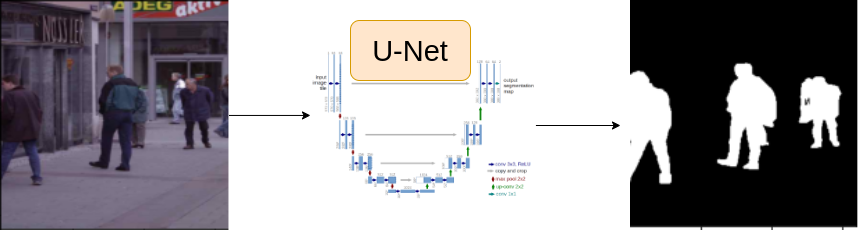

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import helper
import kagglehub
from torch.utils.data import Dataset, DataLoader
import json
import glob
import os



In [2]:
# !pip install segmentation-models-pytorch
# !pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python
# !pip install gdown==4.5.1

# Download Dataset

original author of the dataset :
https://github.com/VikramShenoy97/Human-Segmentation-Dataset


In [3]:

!git clone https://github.com/parth1620/Human-Segmentation-Dataset-master.git

Cloning into 'Human-Segmentation-Dataset-master'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (592/592), done.
remote: Compressing objects: 100% (591/591), done.
remote: Total 592 (delta 3), reused 588 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (592/592), 13.60 MiB | 15.29 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Dataset for Lane detection

In [4]:
#collapse-output
# import gdown

# url = 'https://drive.google.com/file/d/1KofHPeN85LyKxjFr3jXYM0YnFjEzGcir/view?usp=drive_link'
# output_path = '/content/tusimple_lane_dataset.csv'
# gdown.download(url, output_path, quiet=False,fuzzy=True)

In [5]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariannamomchyan","key":"40acab85b0fb1ed82261c4afbe22a204"}'}

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [7]:
!kaggle datasets list


ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           5630         81  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          12491        222  1.0              
atharvasoundankar/global-music-streaming-trends-and-listener-insights  Global Music Streaming Trends & Listener Insights    95KB  2025-03-09 05:12:00           1051         24  1.0              
salahuddinahmedshuvo/ecom

In [8]:
!kaggle datasets download -d manideep1108/tusimple


Dataset URL: https://www.kaggle.com/datasets/manideep1108/tusimple
License(s): copyright-authors
100% 21.6G/21.6G [16:34<00:00, 23.9MB/s]
100% 21.6G/21.6G [16:34<00:00, 23.4MB/s]


In [9]:
# from google.colab import files
# files.upload()  # This will prompt you to upload zip dataset


In [10]:
!unzip /content/tusimple.zip -d /content/tusimple/


Streaming output truncated to the last 5000 lines.
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/115/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1150/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11520/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1155/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11580/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1160/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11640/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1165/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1170/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/11700/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_label/0313-2/1175/20.png  
  inflating: /content/tusimple/TUSimple/train_set/seg_l

Dataset for disaster segmentaition https://drive.google.com/drive/folders/1sZZMJkbqJNbHgebKvHzcXYZHJd6ss4tH

In [11]:
import os
os.listdir("/content/tusimple/")


['TUSimple', 'test_label_new.json']

In [12]:

# Load annotation file
json_path = "/content/tusimple/TUSimple/train_set/label_data_0313.json"

annotations = []

with open(json_path, 'r') as f:
  for line in f:
    annotations.append(json.loads(line))  # Load each line separately
    # print(f)

# List all images
image_paths = glob.glob("/content/tusimple/TUSimple/train_set/clips/*/*.jpg")

# Print an example annotation
print(annotations[5])  # Check how labels are stored

import pandas as pd
import json

# Path to TuSimple JSON annotation file
json_path = "/content/tusimple/TUSimple/train_set/label_data_0313.json"

# Read JSON file line by line and store it as a list
with open(json_path, 'r') as f:
    annotations = [json.loads(line) for line in f]  # Convert each line to dictionary

# Convert list of dictionaries into a Pandas DataFrame
df_lane = pd.DataFrame(annotations)

# Display first few rows
df_lane.head()

csv_output_path = "/content/tusimple_lane_dataset.csv"
df_lane.to_csv(csv_output_path, index=False)


{'lanes': [[-2, 534, 561, 576, 586, 590, 594, 597, 595, 592, 589, 586, 583, 580, 577, 574, 571, 567, 562, 557, 552, 547, 542, 537, 531, 526, 521, 516, 511, 506, 501, 496, 491, 486, 481, 476, 471, 466, 461, 456, 451, 446, 441, 436, 430, 425, 420, 415], [-2, 583, 619, 654, 685, 713, 740, 768, 796, 815, 833, 851, 870, 888, 906, 924, 943, 961, 979, 997, 1014, 1031, 1049, 1066, 1083, 1100, 1118, 1135, 1152, 1169, 1187, 1204, 1221, 1239, 1256, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, 478, 496, 500, 499, 485, 465, 444, 423, 402, 374, 343, 311, 279, 248, 216, 184, 153, 121, 90, 58, 26, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, -2, 683, 743, 797, 848, 899, 951, 1001, 1043, 1085, 1126, 1168, 1210, 1251, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]], 'h_samples': [240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360,

In [13]:
import os

# Define base path where images are stored
base_path = "/content/tusimple/TUSimple/train_set/"

# Add full image paths to DataFrame
df_lane["image_path"] = df_lane["raw_file"].apply(lambda x: os.path.join(base_path, x))

# Create corresponding mask paths (assuming we save masks in `masks/` directory)
df_lane["mask_path"] = df_lane["raw_file"].apply(lambda x: os.path.join(base_path, "masks", os.path.basename(x).replace(".jpg", ".png")))

# Display new DataFrame structure
df_lane[["image_path", "mask_path"]].head()


image_path  \
0  /content/tusimple/TUSimple/train_set/clips/031...   
1  /content/tusimple/TUSimple/train_set/clips/031...   
2  /content/tusimple/TUSimple/train_set/clips/031...   
3  /content/tusimple/TUSimple/train_set/clips/031...   
4  /content/tusimple/TUSimple/train_set/clips/031...   

                                           mask_path  
0  /content/tusimple/TUSimple/train_set/masks/20.png  
1  /content/tusimple/TUSimple/train_set/masks/20.png  
2  /content/tusimple/TUSimple/train_set/masks/20.png  
3  /content/tusimple/TUSimple/train_set/masks/20.png  
4  /content/tusimple/TUSimple/train_set/masks/20.png

In [14]:
def create_lane_mask(lanes, h_samples, image_shape):
    """
    Converts TuSimple lane annotations to a binary mask.

    Arguments:
    - lanes: List of lane x-coordinates (or '-2' for missing points).
    - h_samples: List of y-coordinates corresponding to lane points.
    - image_shape: Shape of the image (H, W, C).

    Returns:
    - mask: Binary lane mask (same height and width as image).
    """
    mask = np.zeros(image_shape[:2], dtype=np.uint8)  # Create blank mask

    # Loop over each lane
    for lane in lanes:
        points = [(x, y) for x, y in zip(lane, h_samples) if x != -2]  # Ignore missing points

        # Draw lane lines
        for i in range(1, len(points)):
            cv2.line(mask, points[i-1], points[i], color=255, thickness=5)  # White lanes

    return mask



/content/tusimple/TUSimple/train_set/clips/0313-1/9580/20.jpg


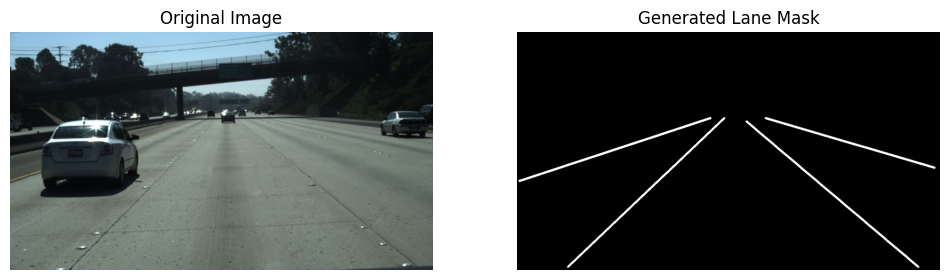

Image Shape: (720, 1280, 3)


In [15]:




def visualize_lane_annotation(index):
    """
    Displays an image and its corresponding lane mask from the TuSimple dataset (CSV version).

    Arguments:
    - index: Row index of `df` to visualize.
    """
    row = df_lane.iloc[index]  # Fetch row from DataFrame

    # Get image path
    image_path = row["image_path"]
    print(image_path)


    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create lane mask
    lane_mask = create_lane_mask(row["lanes"], row["h_samples"], image.shape)

    # Plot the image and mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(image)
    ax1.set_title("Original Image")
    ax1.axis("off")

    ax2.imshow(lane_mask, cmap="gray")
    ax2.set_title("Generated Lane Mask")
    ax2.axis("off")

    plt.show()
    print(f"Image Shape: {image.shape}")

# Visualize a sample
visualize_lane_annotation(41)


In [16]:
# Create a directory to save masks
mask_dir = "lane_masks"
os.makedirs(mask_dir, exist_ok=True)

# Iterate through all images
for index, row in tqdm(df_lane.iterrows(), total=len(df_lane), desc="Generating Lane Masks"):
    # Get image path
    image_path = row["image_path"]

    # Load the image to get its shape
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Could not load image at {image_path}, skipping.")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert lane strings to Python lists (if necessary)
    lanes = eval(str(row["lanes"])) if isinstance(row["lanes"], str) else row["lanes"]
    h_samples = eval(str(row["h_samples"])) if isinstance(row["h_samples"], str) else row["h_samples"]

    # Generate lane mask
    lane_mask = create_lane_mask(lanes, h_samples, image.shape)

    # Define mask save path
    mask_filename = os.path.join(mask_dir, f"mask_{index}.png")

    # Save mask
    cv2.imwrite(mask_filename, lane_mask)


Generating Lane Masks: 100%|██████████| 2858/2858 [00:25<00:00, 114.17it/s]


/content/tusimple/TUSimple/train_set/clips/0313-1/36000/20.jpg
lane_masks/mask_5.png
✅ Mask file exists: lane_masks/mask_5.png
/content/tusimple/TUSimple/train_set/clips/0313-1/36000/20.jpg


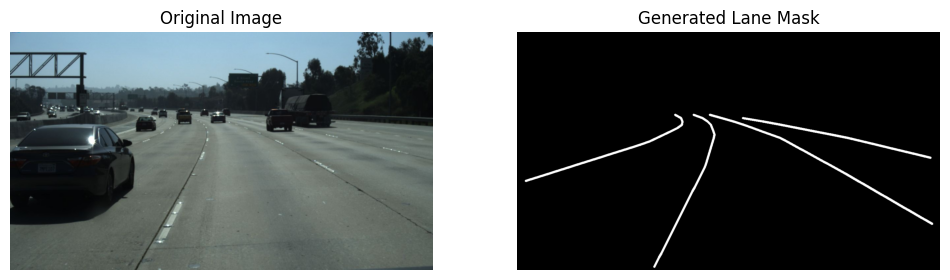

Image Shape: (720, 1280, 3)


In [17]:

import os

# Define base path where images are stored
base_path = "/content/tusimple/TUSimple/train_set/"

# Add full image paths to DataFrame
df_lane["image_path"] = df_lane["raw_file"].apply(lambda x: os.path.join(base_path, x))

df_lane = df_lane.reset_index(drop=True)


# Create corresponding mask paths (assuming we save masks in `masks/` directory)
df_lane["mask_path"] = df_lane.index.map(lambda idx: os.path.join(mask_dir, f"mask_{idx}.png"))

# Display new DataFrame structure

sample_index = 5  # Choose an index within range
print(df_lane.loc[sample_index, "image_path"])  # Should print a valid image path
print(df_lane.loc[sample_index, "mask_path"])  # Should print the correct mask path

import os

mask_path = os.path.join("lane_masks", "mask_5.png")  # Construct the mask path
if os.path.exists(mask_path):
    print(f" Mask file exists: {mask_path}")
else:
    print(f"Mask file is missing: {mask_path}")
visualize_lane_annotation(5)


[[[122 164 188]
  [122 164 188]
  [107 147 173]
  ...
  [ 40  52  52]
  [ 48  56  58]
  [ 48  57  56]]

 [[123 165 189]
  [124 166 190]
  [108 148 174]
  ...
  [ 36  47  49]
  [ 42  52  53]
  [ 43  53  52]]

 [[111 153 177]
  [116 158 182]
  [105 145 171]
  ...
  [ 40  51  55]
  [ 49  61  61]
  [ 52  64  64]]

 ...

 [[ 76  85  80]
  [ 76  85  80]
  [ 76  85  80]
  ...
  [ 47  58  62]
  [ 46  57  61]
  [ 46  57  61]]

 [[ 76  85  80]
  [ 76  85  80]
  [ 76  85  80]
  ...
  [ 47  58  60]
  [ 47  58  60]
  [ 47  58  60]]

 [[ 76  85  80]
  [ 76  85  80]
  [ 76  85  80]
  ...
  [ 47  58  60]
  [ 47  58  60]
  [ 48  59  61]]]


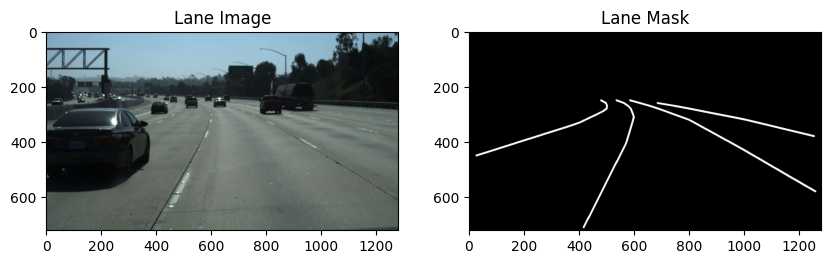

In [18]:

import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = df_lane.loc[sample_index, "image_path"]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the mask
mask_path = df_lane.loc[sample_index, "mask_path"]
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if mask is None:
    print(f"ERROR: Could not load mask at {mask_path}")
else:
    # Display image and mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Lane Image")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    print(image)
    plt.title("Lane Mask")

    plt.show()


The TuSimple dataset consists of 6,408 road images on US highways. The resolution of the image is 1280×720. The dataset is composed of 3,626 for training, 358 for validation, and 2,782 for testing called the TuSimple test set of which the images are under different weather conditions.

# Some Common Imports

In [19]:
import sys
sys.path.append('/content/Human-Segmentation-Dataset-master')

# Setup Configurations

In [20]:
csv_file = '/content/Human-Segmentation-Dataset-master/train.csv'
data_dir = '/content/'

device = 'cuda'

EPOCHS  =25
LR = 0.003
IMAGE_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

In [21]:
df = pd.read_csv(csv_file)
df.head()

masks  \
0  Human-Segmentation-Dataset-master/Ground_Truth...   
1  Human-Segmentation-Dataset-master/Ground_Truth...   
2  Human-Segmentation-Dataset-master/Ground_Truth...   
3  Human-Segmentation-Dataset-master/Ground_Truth...   
4  Human-Segmentation-Dataset-master/Ground_Truth...   

                                              images  
0  Human-Segmentation-Dataset-master/Training_Ima...  
1  Human-Segmentation-Dataset-master/Training_Ima...  
2  Human-Segmentation-Dataset-master/Training_Ima...  
3  Human-Segmentation-Dataset-master/Training_Ima...  
4  Human-Segmentation-Dataset-master/Training_Ima...

In [22]:
row = df.iloc[5]

image_path = row.images
mask_path = row.masks

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)/255.0
print(row)

masks     Human-Segmentation-Dataset-master/Ground_Truth...
images    Human-Segmentation-Dataset-master/Training_Ima...
Name: 5, dtype: object


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


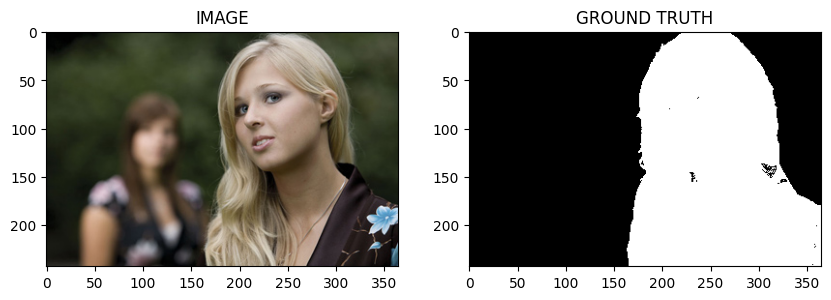

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('IMAGE')
ax1.imshow(image)
print(mask)
ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')

In [24]:
# train_df, valid_df = train_test_split(df, test_size = 0.2, random_state=42)

#  Mixing the datasets


In [25]:
def resize_image_and_mask(image, mask, target_size=(320, 320)):
    """
    Resizes an image and its corresponding mask to the target size.
    """
    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)  # NEAREST for segmentation

    return image_resized, mask_resized

# Example usage


#  Augmentation Functions

1.   List item
2.   List item



albumentation documentation : https://albumentations.ai/docs/

In [26]:
import albumentations as A

In [27]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# def get_train_augs():
#   return A.Compose([
#       A.Resize(IMAGE_SIZE, IMAGE_SIZE),
#       A.HorizontalFlip(p = 0.5),
#       A.VerticalFlip(p=0.5),
#   ],      is_check_shapes=False)

# def get_valid_augs():
#   return A.Compose([
#       A.Resize(IMAGE_SIZE, IMAGE_SIZE)

#       ],  is_check_shapes=False)

import torchvision.transforms as T

# Define transformations
image_transforms = T.Compose([
    T.ToPILImage(),  # Convert from NumPy to PIL
    T.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize to fixed dimensions
    T.ToTensor(),  # Convert to tensor (scales to [0,1])
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

mask_transforms = T.Compose([
    T.ToPILImage(),
    T.Resize((IMAGE_SIZE, IMAGE_SIZE), interpolation=T.InterpolationMode.NEAREST),  # Keep segmentation masks integer
    T.ToTensor()  # Convert to tensor
])


In [28]:
from torch.utils.data import Dataset

In [29]:
from sklearn.model_selection import train_test_split

# Reset index before splitting to avoid indexing errors
df_lane = df_lane.reset_index(drop=True)
df = df.reset_index(drop=True)


# Split Lane Dataset
lane_train, lane_valid = train_test_split(
    df_lane, test_size=0.2, random_state=42
)

# Split Pedestrian Dataset
ped_train, ped_valid = train_test_split(
    df, test_size=0.2, random_state=42
)

print(f"Lane Train: {len(lane_train)}, Lane Valid: {len(lane_valid)}")
print(f"Pedestrian Train: {len(ped_train)}, Pedestrian Valid: {len(ped_valid)}")


Lane Train: 2286, Lane Valid: 572
Pedestrian Train: 232, Pedestrian Valid: 58


In [30]:
import os

# Check first few entries in the dataframe
print(df_lane.head())

# Verify that all mask paths exist
missing_masks = [path for path in df_lane["mask_path"] if not os.path.exists(path)]
print(f"Missing Masks: {len(missing_masks)}")
if missing_masks:
    print("First few missing masks:", missing_masks[:5])


                                               lanes  \
0  [[-2, -2, -2, -2, 632, 625, 617, 609, 601, 594...   
1  [[-2, -2, -2, 658, 646, 635, 623, 612, 601, 58...   
2  [[-2, 570, 554, 538, 522, 505, 489, 473, 456, ...   
3  [[-2, -2, -2, -2, 555, 542, 530, 517, 505, 493...   
4  [[-2, -2, -2, 522, 525, 528, 531, 534, 537, 53...   

                                           h_samples  \
0  [240, 250, 260, 270, 280, 290, 300, 310, 320, ...   
1  [240, 250, 260, 270, 280, 290, 300, 310, 320, ...   
2  [240, 250, 260, 270, 280, 290, 300, 310, 320, ...   
3  [240, 250, 260, 270, 280, 290, 300, 310, 320, ...   
4  [240, 250, 260, 270, 280, 290, 300, 310, 320, ...   

                    raw_file  \
0   clips/0313-1/6040/20.jpg   
1   clips/0313-1/5320/20.jpg   
2  clips/0313-1/23700/20.jpg   
3  clips/0313-1/51660/20.jpg   
4  clips/0313-1/25680/20.jpg   

                                          image_path              mask_path  
0  /content/tusimple/TUSimple/train_set/clips/031...  l

In [31]:
import os

class SingleDataset(Dataset):
    def __init__(self, image_paths, mask_paths, target_size=(IMAGE_SIZE, IMAGE_SIZE)):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.target_size = target_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        # Load image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        #If the mask is None, print a warning and return a blank mask
        if mask is None:
            print(f"Warning: Could not load mask at {mask_path}, replacing with blank mask.")
            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

        # Resize
        image = cv2.resize(image, self.target_size, interpolation=cv2.INTER_LINEAR)
        mask = cv2.resize(mask, self.target_size, interpolation=cv2.INTER_NEAREST)

        # Convert to PyTorch tensor
        image = torch.tensor(image, dtype=torch.float).permute(2, 0, 1) / 255.0
        mask = torch.tensor(mask, dtype=torch.long)

        return image, mask


In [32]:
# Create individual datasets

lane_train_images = lane_train["image_path"].tolist()
lane_train_masks = lane_train["mask_path"].tolist()

pedestrian_train_images = ped_train['images'].tolist()
pedestrian_train_masks = ped_train['masks'].tolist()



train_lane_dataset = SingleDataset(lane_train_images, lane_train_masks)
train_pedestrian_dataset = SingleDataset(pedestrian_train_images, pedestrian_train_masks)


lane_valid_images = lane_valid['image_path'].tolist()
lane_valid_masks = lane_valid['mask_path'].tolist()
pedestrian_valid_images = ped_valid['images'].tolist()
pedestrian_valid_masks = ped_valid['masks'].tolist()





valid_lane_dataset = SingleDataset(lane_valid_images, lane_valid_masks)
valid_pedestrian_dataset = SingleDataset(pedestrian_valid_images, pedestrian_valid_masks)



In [33]:
# import random

# class MixedDataset(Dataset):
#     def __init__(self, lane_dataset, pedestrian_dataset):
#         self.lane_dataset = lane_dataset
#         self.pedestrian_dataset = pedestrian_dataset

#     def __len__(self):
#         return max(len(self.lane_dataset), len(self.pedestrian_dataset))  # Use the larger dataset size

#     def __getitem__(self, idx):
#         if random.random() < 0.5:  # 50% chance for lane dataset
#             return self.lane_dataset[idx % len(self.lane_dataset)]
#         else:  # 50% chance for pedestrian dataset
#             return self.pedestrian_dataset[idx % len(self.pedestrian_dataset)]



In [34]:
# Mixed train dataset
# train_dataset = MixedDataset(train_lane_dataset, train_pedestrian_dataset)

# # Mixed validation dataset
# valid_dataset = MixedDataset(valid_lane_dataset, valid_pedestrian_dataset)



In [35]:
class LanePedestrianDataset(Dataset):
    def __init__(self, lane_images, lane_masks, pedestrian_images, pedestrian_masks, target_size=(256, 384)):
        self.lane_images = lane_images
        self.lane_masks = lane_masks
        self.pedestrian_images = pedestrian_images
        self.pedestrian_masks = pedestrian_masks
        self.target_size = target_size

    def __len__(self):
        return max(len(self.lane_images), len(self.pedestrian_images))

    def __getitem__(self, idx):
        if random.random() < 0.5:  # 50% chance to load a lane image
            img_path = self.lane_images[idx % len(self.lane_images)]
            mask_path = self.lane_masks[idx % len(self.lane_masks)]
            class_label = 1  # Lane Class
        else:  # 50% chance to load a pedestrian image
            img_path = self.pedestrian_images[idx % len(self.pedestrian_images)]
            mask_path = self.pedestrian_masks[idx % len(self.pedestrian_masks)]
            class_label = 2  # Pedestrian Class

        # Load image and mask
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize
        image = cv2.resize(image, self.target_size, interpolation=cv2.INTER_LINEAR)
        mask = cv2.resize(mask, self.target_size, interpolation=cv2.INTER_NEAREST)

        # **Ensure masks are correctly labeled**
        mask = torch.tensor(mask, dtype=torch.long)
        mask[mask > 0] = class_label  # Convert all non-zero pixels to specific class

        # Convert image to tensor
        image = torch.tensor(image, dtype=torch.float).permute(2, 0, 1) / 255.0

        return image, mask


In [36]:
train_dataset = LanePedestrianDataset(
    lane_train_images, lane_train_masks, pedestrian_train_images, pedestrian_train_masks
)

valid_dataset = LanePedestrianDataset(
    lane_valid_images, lane_valid_masks, pedestrian_valid_images, pedestrian_valid_masks
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)


In [37]:
print(f"Size of Trainset : {len(train_dataset)}")
print(f"Size of Validset : {len(valid_dataset)}")

Size of Trainset : 2286
Size of Validset : 572


In [38]:

# idx = 32
# image, mask = trainset[idx]
# helper.show_image(image, mask)

In [39]:
from torch.utils.data import DataLoader
import random

In [40]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)
print(f"total no. of trainloader : {len(train_loader)}")
print(f"total no. of validloader : {len(valid_loader)}")

# Check batch shapes
for images, masks in train_loader:
    print(f"Train Batch: Image Shape: {images.shape}, Mask Shape: {masks.shape}")
    break

for images, masks in valid_loader:
    print(f"Valid Batch: Image Shape: {images.shape}, Mask Shape: {masks.shape}")
    break


total no. of trainloader : 286
total no. of validloader : 72
Train Batch: Image Shape: torch.Size([8, 3, 384, 256]), Mask Shape: torch.Size([8, 384, 256])
Valid Batch: Image Shape: torch.Size([8, 3, 384, 256]), Mask Shape: torch.Size([8, 384, 256])


In [41]:
print(f"total no. of trainloader : {len(train_loader)}")
print(f"total no. of validloader : {len(valid_loader)}")

total no. of trainloader : 286
total no. of validloader : 72




```
# This is formatted as code
```

#  Create Segmentation Model

segmentation_models_pytorch documentation : https://smp.readthedocs.io/en/latest/

In [42]:
from torch import nn
# import segmentation_models_pytorch as smp
# from segmentation_models_pytorch.losses import DiceLoss

In [43]:
# class SegmentationModel(nn.Module):

#   def __init__(self):
#     super(SegmentationModel, self).__init__()
#     self.arc = smp.Unet(
#         encoder_name = ENCODER,
#         encoder_weights = WEIGHTS,
#         in_chanels = 3,
#         classes = 2,   #multi class classifiction of the lanes and the people
#         activation = 'softmax'  #for the multiple classes
#     )


#   def forward(self, images, masks = None):
#     logits = self.arc(images)


#     if masks != None:
#       loss1 = DiceLoss(mode = 'binary')(logits, masks)
#       loss2 = nn.BCEWithLogitsLoss()(logits, masks)
#       return logits, loss1 + loss2

#     return logits


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from tqdm import tqdm

# Auto-detect GPU or fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# device = torch.device("cpu")


class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, features=[64, 128, 256, 512]):
        super(UNet, self).__init__()

        self.encoder = nn.ModuleList()
        self.decoder = nn.ModuleList()

        # 🔹 Down-sampling (encoder)
        for feature in features:
            self.encoder.append(self.conv_block(in_channels, feature))
            in_channels = feature  # Update input channels for the next layer

        # 🔹 Bottleneck
        self.bottleneck = self.conv_block(features[-1], features[-1] * 2)

        # 🔹 Up-sampling (decoder)
        for feature in reversed(features):
            self.decoder.append(
                nn.ConvTranspose2d(feature * 2, feature, kernel_size=2, stride=2)
            )
            self.decoder.append(self.conv_block(feature * 2, feature))

        # 🔹 Final output layer (multi-class output)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        skip_connections = []

        # Encoder
        for down in self.encoder:
            x = down(x)
            skip_connections.append(x)
            x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Bottleneck
        x = self.bottleneck(x)

        # Decoder
        skip_connections = skip_connections[::-1]  # Reverse skip connections
        for idx in range(0, len(self.decoder), 2):
            x = self.decoder[idx](x)
            skip_connection = skip_connections[idx // 2]

            # 🔹 Ensure size match in case of mismatched dimensions
            if x.shape != skip_connection.shape:
                x = F.interpolate(x, size=skip_connection.shape[2:], mode="bilinear", align_corners=False)

            x = torch.cat((skip_connection, x), dim=1)
            x = self.decoder[idx + 1](x)

        return self.final_conv(x)


# Improved Dice Loss (for Multi-Class Segmentation)
class DiceLoss(nn.Module):
    def __init__(self, num_classes=3):
        super(DiceLoss, self).__init__()
        self.num_classes = num_classes

    def forward(self, y_pred, y_true):
        smooth = 1e-6
        y_pred = F.softmax(y_pred, dim=1)  # Convert logits to probabilities
        y_true_one_hot = F.one_hot(y_true, num_classes=self.num_classes).permute(0, 3, 1, 2).float()

        intersection = (y_pred * y_true_one_hot).sum(dim=(2, 3))
        union = y_pred.sum(dim=(2, 3)) + y_true_one_hot.sum(dim=(2, 3))

        dice = (2. * intersection + smooth) / (union + smooth)
        return 1 - dice.mean()  # Take mean over all classes


# Combined Loss (CrossEntropy + Dice)
def combined_loss(y_pred, y_true):
    # print("this is the y_true from loss ",y_true)
    # print("this is the y_pred from loss ",y_pred)

    bce = nn.CrossEntropyLoss()(y_pred, y_true)  # Handles multi-class labels
    dice = DiceLoss(num_classes=y_pred.shape[1])(y_pred, y_true)
    return bce + dice

In [48]:


# Initialize Model for Multi-Class Output
model = UNet(in_channels=3, out_channels=3).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)

# Training Loop
best_valid_loss = float("inf")
EPOCHS = 20  #Set the number of epochs

# 1. Run on cpu (adjust the batch size to avoid ram crash)
# 2. check images and masks dimentions (for cross entropy loss)
# 3. I changed the device to "cpu"
# 4. comment line 120 (images, masks = images.to(device), masks.to(device)) see what's gonna happen

# CHECKPOINT_PATH = "/content/drive/My Drive/model_checkpoints/"  # Change path if needed
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0

    for images, masks in tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False):
        images, masks = images.to(device), masks.to(device)

        #Convert to Long dtype for CrossEntropyLoss
        masks = masks.long()

        #Debugging output: Check mask values (before passing to the model)
        unique_values = torch.unique(masks)
        print(f"Mask Unique Values: {unique_values}")  # Should be [0, 1, 2] ONLY!

        #Ensure masks only contain valid values
        if torch.any((masks < 0) | (masks > 2)):
            raise ValueError(f" Invalid mask value detected! Unique values: {unique_values}")

        optimizer.zero_grad()
        outputs = model(images)
        loss = combined_loss(outputs, masks)
        print(f"Loss at this epoch: {loss}")

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    #Validation Loop
    model.eval()
    valid_loss = 0

    with torch.no_grad():
        print("this is the valid loader")
        for images, masks in valid_loader:
            images, masks = images.to(device), masks.to(device)
            masks = masks.long()

            outputs = model(images)
            loss = combined_loss(outputs, masks)
            valid_loss += loss.item()

    train_loss /= len(train_loader)
    valid_loss /= len(valid_loader)
    # checkpoint_file = os.path.join(CHECKPOINT_PATH, f'/content/drive/My Drive/model_checkpoints/last_model{epoch}.pt')
    torch.save(model.state_dict(), f'/content/drive/My Drive/model_checkpoints/last_model{epoch}.pt')

    if valid_loss < best_valid_loss:
      # checkpoint_file = os.path.join(CHECKPOINT_PATH, f'/content/drive/My Drive/model_checkpoints/best_model{epoch}.pt')
      torch.save(model.state_dict(), f'/content/drive/My Drive/model_checkpoints/best_model{epoch}.pt')
      print("Saved Best Model!")
      best_valid_loss = valid_loss

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")


Training Epoch 1:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.8315259218215942


Training Epoch 1:   0%|          | 1/286 [00:00<02:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.7671818733215332


Training Epoch 1:   1%|          | 2/286 [00:00<01:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.732229232788086


Training Epoch 1:   1%|          | 3/286 [00:01<02:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.7272708415985107


Training Epoch 1:   1%|▏         | 4/286 [00:01<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.7340590953826904


Training Epoch 1:   2%|▏         | 5/286 [00:02<02:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6796584129333496


Training Epoch 1:   2%|▏         | 6/286 [00:02<02:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6163363456726074


Training Epoch 1:   2%|▏         | 7/286 [00:02<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5861728191375732


Training Epoch 1:   3%|▎         | 8/286 [00:03<01:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6098401546478271


Training Epoch 1:   3%|▎         | 9/286 [00:03<01:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6140611171722412


Training Epoch 1:   3%|▎         | 10/286 [00:04<01:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6921796798706055


Training Epoch 1:   4%|▍         | 11/286 [00:04<01:58,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.7012120485305786


Training Epoch 1:   4%|▍         | 12/286 [00:05<01:59,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.570214867591858


Training Epoch 1:   5%|▍         | 13/286 [00:05<01:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5548027753829956


Training Epoch 1:   5%|▍         | 14/286 [00:05<01:56,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6641440391540527


Training Epoch 1:   5%|▌         | 15/286 [00:06<01:56,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5721280574798584


Training Epoch 1:   6%|▌         | 16/286 [00:06<01:56,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6190693378448486


Training Epoch 1:   6%|▌         | 17/286 [00:07<01:56,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4723052978515625


Training Epoch 1:   6%|▋         | 18/286 [00:07<01:55,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5336406230926514


Training Epoch 1:   7%|▋         | 19/286 [00:08<01:54,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.6009933948516846


Training Epoch 1:   7%|▋         | 20/286 [00:08<01:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4915156364440918


Training Epoch 1:   7%|▋         | 21/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5343295335769653


Training Epoch 1:   8%|▊         | 22/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 1.5976519584655762


Training Epoch 1:   8%|▊         | 23/286 [00:09<01:53,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4413352012634277


Training Epoch 1:   8%|▊         | 24/286 [00:10<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.580126404762268


Training Epoch 1:   9%|▊         | 25/286 [00:10<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4484350681304932


Training Epoch 1:   9%|▉         | 26/286 [00:11<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.40822434425354


Training Epoch 1:   9%|▉         | 27/286 [00:11<01:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5585827827453613


Training Epoch 1:  10%|▉         | 28/286 [00:11<01:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3494513034820557


Training Epoch 1:  10%|█         | 29/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3837077617645264


Training Epoch 1:  10%|█         | 30/286 [00:12<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3998475074768066


Training Epoch 1:  11%|█         | 31/286 [00:13<01:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3389452695846558


Training Epoch 1:  11%|█         | 32/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.461897850036621


Training Epoch 1:  12%|█▏        | 33/286 [00:14<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3331992626190186


Training Epoch 1:  12%|█▏        | 34/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3885446786880493


Training Epoch 1:  12%|█▏        | 35/286 [00:14<01:49,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4816932678222656


Training Epoch 1:  13%|█▎        | 36/286 [00:15<01:48,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3928847312927246


Training Epoch 1:  13%|█▎        | 37/286 [00:15<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3395354747772217


Training Epoch 1:  13%|█▎        | 38/286 [00:16<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4624667167663574


Training Epoch 1:  14%|█▎        | 39/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3028615713119507


Training Epoch 1:  14%|█▍        | 40/286 [00:17<01:46,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.366422176361084


Training Epoch 1:  14%|█▍        | 41/286 [00:17<01:45,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2883155345916748


Training Epoch 1:  15%|█▍        | 42/286 [00:17<01:44,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2897450923919678


Training Epoch 1:  15%|█▌        | 43/286 [00:18<01:44,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4119268655776978


Training Epoch 1:  15%|█▌        | 44/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.434805989265442


Training Epoch 1:  16%|█▌        | 45/286 [00:19<01:43,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2647745609283447


Training Epoch 1:  16%|█▌        | 46/286 [00:19<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4375691413879395


Training Epoch 1:  16%|█▋        | 47/286 [00:20<01:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2843750715255737


Training Epoch 1:  17%|█▋        | 48/286 [00:20<01:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3069415092468262


Training Epoch 1:  17%|█▋        | 49/286 [00:20<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2717926502227783


Training Epoch 1:  17%|█▋        | 50/286 [00:21<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.372990369796753


Training Epoch 1:  18%|█▊        | 51/286 [00:21<01:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5674371719360352


Training Epoch 1:  18%|█▊        | 52/286 [00:22<01:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2720255851745605


Training Epoch 1:  19%|█▊        | 53/286 [00:22<01:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3657312393188477


Training Epoch 1:  19%|█▉        | 54/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3925044536590576


Training Epoch 1:  19%|█▉        | 55/286 [00:23<01:39,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.4311405420303345


Training Epoch 1:  20%|█▉        | 56/286 [00:23<01:39,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3293790817260742


Training Epoch 1:  20%|█▉        | 57/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2190256118774414


Training Epoch 1:  20%|██        | 58/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3715206384658813


Training Epoch 1:  21%|██        | 59/286 [00:25<01:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2620376348495483


Training Epoch 1:  21%|██        | 60/286 [00:25<01:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.5032398700714111


Training Epoch 1:  21%|██▏       | 61/286 [00:26<01:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3458017110824585


Training Epoch 1:  22%|██▏       | 62/286 [00:26<01:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2517200708389282


Training Epoch 1:  22%|██▏       | 63/286 [00:26<01:35,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2059228420257568


Training Epoch 1:  22%|██▏       | 64/286 [00:27<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2146775722503662


Training Epoch 1:  23%|██▎       | 65/286 [00:27<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2417503595352173


Training Epoch 1:  23%|██▎       | 66/286 [00:28<01:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.228562593460083


Training Epoch 1:  23%|██▎       | 67/286 [00:28<01:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2225887775421143


Training Epoch 1:  24%|██▍       | 68/286 [00:29<01:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2195438146591187


Training Epoch 1:  24%|██▍       | 69/286 [00:29<01:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.281358003616333


Training Epoch 1:  24%|██▍       | 70/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.280285120010376


Training Epoch 1:  25%|██▍       | 71/286 [00:30<01:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.244823694229126


Training Epoch 1:  25%|██▌       | 72/286 [00:30<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2941398620605469


Training Epoch 1:  26%|██▌       | 73/286 [00:31<01:30,  2.35it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 1.4525152444839478


Training Epoch 1:  26%|██▌       | 74/286 [00:31<01:31,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3200817108154297


Training Epoch 1:  26%|██▌       | 75/286 [00:32<01:30,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2331228256225586


Training Epoch 1:  27%|██▋       | 76/286 [00:32<01:30,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1694618463516235


Training Epoch 1:  27%|██▋       | 77/286 [00:32<01:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.235823392868042


Training Epoch 1:  27%|██▋       | 78/286 [00:33<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.218205213546753


Training Epoch 1:  28%|██▊       | 79/286 [00:33<01:28,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3290512561798096


Training Epoch 1:  28%|██▊       | 80/286 [00:34<01:28,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3133134841918945


Training Epoch 1:  28%|██▊       | 81/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.294708013534546


Training Epoch 1:  29%|██▊       | 82/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2231090068817139


Training Epoch 1:  29%|██▉       | 83/286 [00:35<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1826012134552002


Training Epoch 1:  29%|██▉       | 84/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2558777332305908


Training Epoch 1:  30%|██▉       | 85/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.22147536277771


Training Epoch 1:  30%|███       | 86/286 [00:36<01:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1957707405090332


Training Epoch 1:  30%|███       | 87/286 [00:37<01:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1667258739471436


Training Epoch 1:  31%|███       | 88/286 [00:37<01:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1874405145645142


Training Epoch 1:  31%|███       | 89/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1702516078948975


Training Epoch 1:  31%|███▏      | 90/286 [00:38<01:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.133826494216919


Training Epoch 1:  32%|███▏      | 91/286 [00:38<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.30184006690979


Training Epoch 1:  32%|███▏      | 92/286 [00:39<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2799475193023682


Training Epoch 1:  33%|███▎      | 93/286 [00:39<01:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1517066955566406


Training Epoch 1:  33%|███▎      | 94/286 [00:40<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1972630023956299


Training Epoch 1:  33%|███▎      | 95/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.148263692855835


Training Epoch 1:  34%|███▎      | 96/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2448710203170776


Training Epoch 1:  34%|███▍      | 97/286 [00:41<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1147750616073608


Training Epoch 1:  34%|███▍      | 98/286 [00:41<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2777578830718994


Training Epoch 1:  35%|███▍      | 99/286 [00:42<01:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1719800233840942


Training Epoch 1:  35%|███▍      | 100/286 [00:42<01:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2151703834533691


Training Epoch 1:  35%|███▌      | 101/286 [00:42<01:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1855992078781128


Training Epoch 1:  36%|███▌      | 102/286 [00:43<01:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1338624954223633


Training Epoch 1:  36%|███▌      | 103/286 [00:43<01:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0893930196762085


Training Epoch 1:  36%|███▋      | 104/286 [00:44<01:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.259850025177002


Training Epoch 1:  37%|███▋      | 105/286 [00:44<01:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1148369312286377


Training Epoch 1:  37%|███▋      | 106/286 [00:45<01:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1335397958755493


Training Epoch 1:  37%|███▋      | 107/286 [00:45<01:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1759250164031982


Training Epoch 1:  38%|███▊      | 108/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.299407720565796


Training Epoch 1:  38%|███▊      | 109/286 [00:46<01:13,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.425858736038208


Training Epoch 1:  38%|███▊      | 110/286 [00:46<01:12,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1371501684188843


Training Epoch 1:  39%|███▉      | 111/286 [00:47<01:11,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1355825662612915


Training Epoch 1:  39%|███▉      | 112/286 [00:47<01:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1512575149536133


Training Epoch 1:  40%|███▉      | 113/286 [00:47<01:11,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1445097923278809


Training Epoch 1:  40%|███▉      | 114/286 [00:48<01:11,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1331589221954346


Training Epoch 1:  40%|████      | 115/286 [00:48<01:11,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0676453113555908


Training Epoch 1:  41%|████      | 116/286 [00:49<01:10,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1319913864135742


Training Epoch 1:  41%|████      | 117/286 [00:49<01:09,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.137892246246338


Training Epoch 1:  41%|████▏     | 118/286 [00:50<01:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.160705327987671


Training Epoch 1:  42%|████▏     | 119/286 [00:50<01:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.118889570236206


Training Epoch 1:  42%|████▏     | 120/286 [00:50<01:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1107560396194458


Training Epoch 1:  42%|████▏     | 121/286 [00:51<01:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1461410522460938


Training Epoch 1:  43%|████▎     | 122/286 [00:51<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0378413200378418


Training Epoch 1:  43%|████▎     | 123/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.083522915840149


Training Epoch 1:  43%|████▎     | 124/286 [00:52<01:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0968925952911377


Training Epoch 1:  44%|████▎     | 125/286 [00:52<01:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0612598657608032


Training Epoch 1:  44%|████▍     | 126/286 [00:53<01:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0735048055648804


Training Epoch 1:  44%|████▍     | 127/286 [00:53<01:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1606712341308594


Training Epoch 1:  45%|████▍     | 128/286 [00:54<01:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1434743404388428


Training Epoch 1:  45%|████▌     | 129/286 [00:54<01:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.134596586227417


Training Epoch 1:  45%|████▌     | 130/286 [00:55<01:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0728473663330078


Training Epoch 1:  46%|████▌     | 131/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.13245689868927


Training Epoch 1:  46%|████▌     | 132/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1638243198394775


Training Epoch 1:  47%|████▋     | 133/286 [00:56<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.080182433128357


Training Epoch 1:  47%|████▋     | 134/286 [00:56<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1654231548309326


Training Epoch 1:  47%|████▋     | 135/286 [00:57<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1652272939682007


Training Epoch 1:  48%|████▊     | 136/286 [00:57<01:03,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0384302139282227


Training Epoch 1:  48%|████▊     | 137/286 [00:58<01:03,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1220067739486694


Training Epoch 1:  48%|████▊     | 138/286 [00:58<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1494226455688477


Training Epoch 1:  49%|████▊     | 139/286 [00:58<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0646940469741821


Training Epoch 1:  49%|████▉     | 140/286 [00:59<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0678083896636963


Training Epoch 1:  49%|████▉     | 141/286 [00:59<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.181848168373108


Training Epoch 1:  50%|████▉     | 142/286 [01:00<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1197835206985474


Training Epoch 1:  50%|█████     | 143/286 [01:00<00:59,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1284703016281128


Training Epoch 1:  50%|█████     | 144/286 [01:01<00:59,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0617754459381104


Training Epoch 1:  51%|█████     | 145/286 [01:01<00:58,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0402477979660034


Training Epoch 1:  51%|█████     | 146/286 [01:01<00:57,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0854103565216064


Training Epoch 1:  51%|█████▏    | 147/286 [01:02<00:56,  2.45it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.134542465209961


Training Epoch 1:  52%|█████▏    | 148/286 [01:02<00:56,  2.45it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0594326257705688


Training Epoch 1:  52%|█████▏    | 149/286 [01:03<00:56,  2.45it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0898289680480957


Training Epoch 1:  52%|█████▏    | 150/286 [01:03<00:56,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1392427682876587


Training Epoch 1:  53%|█████▎    | 151/286 [01:03<00:55,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0359516143798828


Training Epoch 1:  53%|█████▎    | 152/286 [01:04<00:54,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.065343976020813


Training Epoch 1:  53%|█████▎    | 153/286 [01:04<00:54,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0800015926361084


Training Epoch 1:  54%|█████▍    | 154/286 [01:05<00:54,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1977908611297607


Training Epoch 1:  54%|█████▍    | 155/286 [01:05<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0373705625534058


Training Epoch 1:  55%|█████▍    | 156/286 [01:05<00:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1359111070632935


Training Epoch 1:  55%|█████▍    | 157/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0180695056915283


Training Epoch 1:  55%|█████▌    | 158/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0821956396102905


Training Epoch 1:  56%|█████▌    | 159/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0030261278152466


Training Epoch 1:  56%|█████▌    | 160/286 [01:07<00:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0047626495361328


Training Epoch 1:  56%|█████▋    | 161/286 [01:08<00:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.159058690071106


Training Epoch 1:  57%|█████▋    | 162/286 [01:08<00:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0997576713562012


Training Epoch 1:  57%|█████▋    | 163/286 [01:08<00:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0824187994003296


Training Epoch 1:  57%|█████▋    | 164/286 [01:09<00:50,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0377305746078491


Training Epoch 1:  58%|█████▊    | 165/286 [01:09<00:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0528289079666138


Training Epoch 1:  58%|█████▊    | 166/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0264778137207031


Training Epoch 1:  58%|█████▊    | 167/286 [01:10<00:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1106152534484863


Training Epoch 1:  59%|█████▊    | 168/286 [01:11<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0154576301574707


Training Epoch 1:  59%|█████▉    | 169/286 [01:11<00:50,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0051343441009521


Training Epoch 1:  59%|█████▉    | 170/286 [01:11<00:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0636640787124634


Training Epoch 1:  60%|█████▉    | 171/286 [01:12<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0884692668914795


Training Epoch 1:  60%|██████    | 172/286 [01:12<00:47,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0850766897201538


Training Epoch 1:  60%|██████    | 173/286 [01:13<00:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0405528545379639


Training Epoch 1:  61%|██████    | 174/286 [01:13<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1038870811462402


Training Epoch 1:  61%|██████    | 175/286 [01:14<00:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1020119190216064


Training Epoch 1:  62%|██████▏   | 176/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1947810649871826


Training Epoch 1:  62%|██████▏   | 177/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.113327980041504


Training Epoch 1:  62%|██████▏   | 178/286 [01:15<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1775093078613281


Training Epoch 1:  63%|██████▎   | 179/286 [01:15<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0036412477493286


Training Epoch 1:  63%|██████▎   | 180/286 [01:16<00:44,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.3336601257324219


Training Epoch 1:  63%|██████▎   | 181/286 [01:16<00:43,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0973820686340332


Training Epoch 1:  64%|██████▎   | 182/286 [01:16<00:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.049099326133728


Training Epoch 1:  64%|██████▍   | 183/286 [01:17<00:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0419623851776123


Training Epoch 1:  64%|██████▍   | 184/286 [01:17<00:42,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0345020294189453


Training Epoch 1:  65%|██████▍   | 185/286 [01:18<00:41,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0212607383728027


Training Epoch 1:  65%|██████▌   | 186/286 [01:18<00:41,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0674333572387695


Training Epoch 1:  65%|██████▌   | 187/286 [01:18<00:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9557719230651855


Training Epoch 1:  66%|██████▌   | 188/286 [01:19<00:40,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0651508569717407


Training Epoch 1:  66%|██████▌   | 189/286 [01:19<00:40,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0201537609100342


Training Epoch 1:  66%|██████▋   | 190/286 [01:20<00:39,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.203634262084961


Training Epoch 1:  67%|██████▋   | 191/286 [01:20<00:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9964696168899536


Training Epoch 1:  67%|██████▋   | 192/286 [01:21<00:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9784412384033203


Training Epoch 1:  67%|██████▋   | 193/286 [01:21<00:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1294535398483276


Training Epoch 1:  68%|██████▊   | 194/286 [01:21<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1246482133865356


Training Epoch 1:  68%|██████▊   | 195/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2236460447311401


Training Epoch 1:  69%|██████▊   | 196/286 [01:22<00:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0491565465927124


Training Epoch 1:  69%|██████▉   | 197/286 [01:23<00:36,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0984923839569092


Training Epoch 1:  69%|██████▉   | 198/286 [01:23<00:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.069794774055481


Training Epoch 1:  70%|██████▉   | 199/286 [01:24<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0566043853759766


Training Epoch 1:  70%|██████▉   | 200/286 [01:24<00:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.114136815071106


Training Epoch 1:  70%|███████   | 201/286 [01:24<00:35,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0352318286895752


Training Epoch 1:  71%|███████   | 202/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0158970355987549


Training Epoch 1:  71%|███████   | 203/286 [01:25<00:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0773314237594604


Training Epoch 1:  71%|███████▏  | 204/286 [01:26<00:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0638521909713745


Training Epoch 1:  72%|███████▏  | 205/286 [01:26<00:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9808167219161987


Training Epoch 1:  72%|███████▏  | 206/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9605700969696045


Training Epoch 1:  72%|███████▏  | 207/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0584410429000854


Training Epoch 1:  73%|███████▎  | 208/286 [01:27<00:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0244922637939453


Training Epoch 1:  73%|███████▎  | 209/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9640419483184814


Training Epoch 1:  73%|███████▎  | 210/286 [01:28<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.035305142402649


Training Epoch 1:  74%|███████▍  | 211/286 [01:29<00:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0081572532653809


Training Epoch 1:  74%|███████▍  | 212/286 [01:29<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0190346240997314


Training Epoch 1:  74%|███████▍  | 213/286 [01:29<00:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0191354751586914


Training Epoch 1:  75%|███████▍  | 214/286 [01:30<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9868121147155762


Training Epoch 1:  75%|███████▌  | 215/286 [01:30<00:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.005729079246521


Training Epoch 1:  76%|███████▌  | 216/286 [01:31<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1074764728546143


Training Epoch 1:  76%|███████▌  | 217/286 [01:31<00:28,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.041022539138794


Training Epoch 1:  76%|███████▌  | 218/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0965996980667114


Training Epoch 1:  77%|███████▋  | 219/286 [01:32<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1754364967346191


Training Epoch 1:  77%|███████▋  | 220/286 [01:32<00:27,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0415353775024414


Training Epoch 1:  77%|███████▋  | 221/286 [01:33<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1134557723999023


Training Epoch 1:  78%|███████▊  | 222/286 [01:33<00:26,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0611059665679932


Training Epoch 1:  78%|███████▊  | 223/286 [01:34<00:26,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0332340002059937


Training Epoch 1:  78%|███████▊  | 224/286 [01:34<00:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9575558304786682


Training Epoch 1:  79%|███████▊  | 225/286 [01:34<00:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9749923944473267


Training Epoch 1:  79%|███████▉  | 226/286 [01:35<00:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9452629685401917


Training Epoch 1:  79%|███████▉  | 227/286 [01:35<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0760583877563477


Training Epoch 1:  80%|███████▉  | 228/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0473695993423462


Training Epoch 1:  80%|████████  | 229/286 [01:36<00:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9340153932571411


Training Epoch 1:  80%|████████  | 230/286 [01:37<00:23,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0116854906082153


Training Epoch 1:  81%|████████  | 231/286 [01:37<00:22,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0740071535110474


Training Epoch 1:  81%|████████  | 232/286 [01:37<00:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9656417369842529


Training Epoch 1:  81%|████████▏ | 233/286 [01:38<00:21,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.000031590461731


Training Epoch 1:  82%|████████▏ | 234/286 [01:38<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 1.373474359512329


Training Epoch 1:  82%|████████▏ | 235/286 [01:39<00:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9996318817138672


Training Epoch 1:  83%|████████▎ | 236/286 [01:39<00:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9355876445770264


Training Epoch 1:  83%|████████▎ | 237/286 [01:39<00:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0647212266921997


Training Epoch 1:  83%|████████▎ | 238/286 [01:40<00:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0164880752563477


Training Epoch 1:  84%|████████▎ | 239/286 [01:40<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9311938285827637


Training Epoch 1:  84%|████████▍ | 240/286 [01:41<00:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9521825313568115


Training Epoch 1:  84%|████████▍ | 241/286 [01:41<00:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9474196434020996


Training Epoch 1:  85%|████████▍ | 242/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.976502537727356


Training Epoch 1:  85%|████████▍ | 243/286 [01:42<00:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0961936712265015


Training Epoch 1:  85%|████████▌ | 244/286 [01:42<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9124184846878052


Training Epoch 1:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9585303068161011


Training Epoch 1:  86%|████████▌ | 246/286 [01:43<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1498466730117798


Training Epoch 1:  86%|████████▋ | 247/286 [01:44<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9327176809310913


Training Epoch 1:  87%|████████▋ | 248/286 [01:44<00:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9379076957702637


Training Epoch 1:  87%|████████▋ | 249/286 [01:45<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9926289319992065


Training Epoch 1:  87%|████████▋ | 250/286 [01:45<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.942615270614624


Training Epoch 1:  88%|████████▊ | 251/286 [01:45<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9499664902687073


Training Epoch 1:  88%|████████▊ | 252/286 [01:46<00:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.001661777496338


Training Epoch 1:  88%|████████▊ | 253/286 [01:46<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1268820762634277


Training Epoch 1:  89%|████████▉ | 254/286 [01:47<00:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9828935861587524


Training Epoch 1:  89%|████████▉ | 255/286 [01:47<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0192584991455078


Training Epoch 1:  90%|████████▉ | 256/286 [01:47<00:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0807995796203613


Training Epoch 1:  90%|████████▉ | 257/286 [01:48<00:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1831774711608887


Training Epoch 1:  90%|█████████ | 258/286 [01:48<00:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0512676239013672


Training Epoch 1:  91%|█████████ | 259/286 [01:49<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9146479368209839


Training Epoch 1:  91%|█████████ | 260/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1466670036315918


Training Epoch 1:  91%|█████████▏| 261/286 [01:50<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9955095052719116


Training Epoch 1:  92%|█████████▏| 262/286 [01:50<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9120524525642395


Training Epoch 1:  92%|█████████▏| 263/286 [01:50<00:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9837861061096191


Training Epoch 1:  92%|█████████▏| 264/286 [01:51<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9393000602722168


Training Epoch 1:  93%|█████████▎| 265/286 [01:51<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9870306253433228


Training Epoch 1:  93%|█████████▎| 266/286 [01:52<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.096665859222412


Training Epoch 1:  93%|█████████▎| 267/286 [01:52<00:07,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0040950775146484


Training Epoch 1:  94%|█████████▎| 268/286 [01:53<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1585392951965332


Training Epoch 1:  94%|█████████▍| 269/286 [01:53<00:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0144741535186768


Training Epoch 1:  94%|█████████▍| 270/286 [01:53<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9425851106643677


Training Epoch 1:  95%|█████████▍| 271/286 [01:54<00:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0448622703552246


Training Epoch 1:  95%|█████████▌| 272/286 [01:54<00:05,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8979486227035522


Training Epoch 1:  95%|█████████▌| 273/286 [01:55<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0384478569030762


Training Epoch 1:  96%|█████████▌| 274/286 [01:55<00:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9886919260025024


Training Epoch 1:  96%|█████████▌| 275/286 [01:55<00:04,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9623938798904419


Training Epoch 1:  97%|█████████▋| 276/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.000516653060913


Training Epoch 1:  97%|█████████▋| 277/286 [01:56<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0230753421783447


Training Epoch 1:  97%|█████████▋| 278/286 [01:57<00:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.132990837097168


Training Epoch 1:  98%|█████████▊| 279/286 [01:57<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0256727933883667


Training Epoch 1:  98%|█████████▊| 280/286 [01:58<00:02,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.2624876499176025


Training Epoch 1:  98%|█████████▊| 281/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.998711109161377


Training Epoch 1:  99%|█████████▊| 282/286 [01:58<00:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9589306116104126


Training Epoch 1:  99%|█████████▉| 283/286 [01:59<00:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.160161018371582


Training Epoch 1:  99%|█████████▉| 284/286 [01:59<00:00,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9687843322753906


Training Epoch 1: 100%|█████████▉| 285/286 [02:00<00:00,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8951921463012695


this is the valid loader
Saved Best Model!
Epoch 1/20 - Train Loss: 1.1774, Valid Loss: 0.9409


Training Epoch 2:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9513269662857056


Training Epoch 2:   0%|          | 1/286 [00:00<02:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.952200174331665


Training Epoch 2:   1%|          | 2/286 [00:00<01:57,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.97324138879776


Training Epoch 2:   1%|          | 3/286 [00:01<01:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9361461997032166


Training Epoch 2:   1%|▏         | 4/286 [00:01<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9882336854934692


Training Epoch 2:   2%|▏         | 5/286 [00:02<01:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9274771213531494


Training Epoch 2:   2%|▏         | 6/286 [00:02<01:56,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9384474158287048


Training Epoch 2:   2%|▏         | 7/286 [00:02<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8680893182754517


Training Epoch 2:   3%|▎         | 8/286 [00:03<01:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9520882368087769


Training Epoch 2:   3%|▎         | 9/286 [00:03<01:55,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9039275646209717


Training Epoch 2:   3%|▎         | 10/286 [00:04<01:55,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.216733455657959


Training Epoch 2:   4%|▍         | 11/286 [00:04<01:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9561102390289307


Training Epoch 2:   4%|▍         | 12/286 [00:05<01:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9690343737602234


Training Epoch 2:   5%|▍         | 13/286 [00:05<01:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.966227650642395


Training Epoch 2:   5%|▍         | 14/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9456595182418823


Training Epoch 2:   5%|▌         | 15/286 [00:06<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9408695697784424


Training Epoch 2:   6%|▌         | 16/286 [00:06<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0497558116912842


Training Epoch 2:   6%|▌         | 17/286 [00:07<01:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1551545858383179


Training Epoch 2:   6%|▋         | 18/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9612478017807007


Training Epoch 2:   7%|▋         | 19/286 [00:08<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9815953969955444


Training Epoch 2:   7%|▋         | 20/286 [00:08<01:50,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9648294448852539


Training Epoch 2:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9487166404724121


Training Epoch 2:   8%|▊         | 22/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9824492931365967


Training Epoch 2:   8%|▊         | 23/286 [00:09<01:52,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.1155978441238403


Training Epoch 2:   8%|▊         | 24/286 [00:10<01:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0262099504470825


Training Epoch 2:   9%|▊         | 25/286 [00:10<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8863444328308105


Training Epoch 2:   9%|▉         | 26/286 [00:10<01:49,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9162170886993408


Training Epoch 2:   9%|▉         | 27/286 [00:11<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9195482730865479


Training Epoch 2:  10%|▉         | 28/286 [00:11<01:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9052106142044067


Training Epoch 2:  10%|█         | 29/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9479606747627258


Training Epoch 2:  10%|█         | 30/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9520959258079529


Training Epoch 2:  11%|█         | 31/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.899999737739563


Training Epoch 2:  11%|█         | 32/286 [00:13<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8824143409729004


Training Epoch 2:  12%|█▏        | 33/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.963648796081543


Training Epoch 2:  12%|█▏        | 34/286 [00:14<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0578386783599854


Training Epoch 2:  12%|█▏        | 35/286 [00:14<01:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8724839687347412


Training Epoch 2:  13%|█▎        | 36/286 [00:15<01:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9202878475189209


Training Epoch 2:  13%|█▎        | 37/286 [00:15<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9155628681182861


Training Epoch 2:  13%|█▎        | 38/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9345569610595703


Training Epoch 2:  14%|█▎        | 39/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9278244972229004


Training Epoch 2:  14%|█▍        | 40/286 [00:16<01:45,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9070688486099243


Training Epoch 2:  14%|█▍        | 41/286 [00:17<01:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.998552680015564


Training Epoch 2:  15%|█▍        | 42/286 [00:17<01:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8832305669784546


Training Epoch 2:  15%|█▌        | 43/286 [00:18<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9569898843765259


Training Epoch 2:  15%|█▌        | 44/286 [00:18<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.924092173576355


Training Epoch 2:  16%|█▌        | 45/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9191842675209045


Training Epoch 2:  16%|█▌        | 46/286 [00:19<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8893333673477173


Training Epoch 2:  16%|█▋        | 47/286 [00:19<01:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8714017868041992


Training Epoch 2:  17%|█▋        | 48/286 [00:20<01:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9534965753555298


Training Epoch 2:  17%|█▋        | 49/286 [00:20<01:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8364630341529846


Training Epoch 2:  17%|█▋        | 50/286 [00:21<01:37,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8900774717330933


Training Epoch 2:  18%|█▊        | 51/286 [00:21<01:37,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9277355670928955


Training Epoch 2:  18%|█▊        | 52/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8936241865158081


Training Epoch 2:  19%|█▊        | 53/286 [00:22<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9177558422088623


Training Epoch 2:  19%|█▉        | 54/286 [00:22<01:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0378559827804565


Training Epoch 2:  19%|█▉        | 55/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8014757633209229


Training Epoch 2:  20%|█▉        | 56/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8334581255912781


Training Epoch 2:  20%|█▉        | 57/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8032526969909668


Training Epoch 2:  20%|██        | 58/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0256668329238892


Training Epoch 2:  21%|██        | 59/286 [00:24<01:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8719345927238464


Training Epoch 2:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9832683801651001


Training Epoch 2:  21%|██▏       | 61/286 [00:25<01:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9423524141311646


Training Epoch 2:  22%|██▏       | 62/286 [00:26<01:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9209864139556885


Training Epoch 2:  22%|██▏       | 63/286 [00:26<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8812673091888428


Training Epoch 2:  22%|██▏       | 64/286 [00:27<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8570413589477539


Training Epoch 2:  23%|██▎       | 65/286 [00:27<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.801175594329834


Training Epoch 2:  23%|██▎       | 66/286 [00:27<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0248992443084717


Training Epoch 2:  23%|██▎       | 67/286 [00:28<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9187589287757874


Training Epoch 2:  24%|██▍       | 68/286 [00:28<01:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0020248889923096


Training Epoch 2:  24%|██▍       | 69/286 [00:29<01:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9665014743804932


Training Epoch 2:  24%|██▍       | 70/286 [00:29<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0982409715652466


Training Epoch 2:  25%|██▍       | 71/286 [00:30<01:32,  2.33it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.9400097131729126


Training Epoch 2:  25%|██▌       | 72/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.942192018032074


Training Epoch 2:  26%|██▌       | 73/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8689439296722412


Training Epoch 2:  26%|██▌       | 74/286 [00:31<01:28,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8462618589401245


Training Epoch 2:  26%|██▌       | 75/286 [00:31<01:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8941794037818909


Training Epoch 2:  27%|██▋       | 76/286 [00:32<01:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9002853631973267


Training Epoch 2:  27%|██▋       | 77/286 [00:32<01:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9020634889602661


Training Epoch 2:  27%|██▋       | 78/286 [00:32<01:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8931519985198975


Training Epoch 2:  28%|██▊       | 79/286 [00:33<01:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8732013702392578


Training Epoch 2:  28%|██▊       | 80/286 [00:33<01:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8836280107498169


Training Epoch 2:  28%|██▊       | 81/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8903418183326721


Training Epoch 2:  29%|██▊       | 82/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9032635688781738


Training Epoch 2:  29%|██▉       | 83/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9663459062576294


Training Epoch 2:  29%|██▉       | 84/286 [00:35<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8503350019454956


Training Epoch 2:  30%|██▉       | 85/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9680285453796387


Training Epoch 2:  30%|███       | 86/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9705027341842651


Training Epoch 2:  30%|███       | 87/286 [00:36<01:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.86497962474823


Training Epoch 2:  31%|███       | 88/286 [00:37<01:22,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0029809474945068


Training Epoch 2:  31%|███       | 89/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0850391387939453


Training Epoch 2:  31%|███▏      | 90/286 [00:38<01:24,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9027482271194458


Training Epoch 2:  32%|███▏      | 91/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8946808576583862


Training Epoch 2:  32%|███▏      | 92/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8767366409301758


Training Epoch 2:  33%|███▎      | 93/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.863514244556427


Training Epoch 2:  33%|███▎      | 94/286 [00:39<01:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.903223991394043


Training Epoch 2:  33%|███▎      | 95/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9368506669998169


Training Epoch 2:  34%|███▎      | 96/286 [00:40<01:18,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0816370248794556


Training Epoch 2:  34%|███▍      | 97/286 [00:40<01:18,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.842411994934082


Training Epoch 2:  34%|███▍      | 98/286 [00:41<01:18,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9161174297332764


Training Epoch 2:  35%|███▍      | 99/286 [00:41<01:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9314552545547485


Training Epoch 2:  35%|███▍      | 100/286 [00:42<01:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9131240844726562


Training Epoch 2:  35%|███▌      | 101/286 [00:42<01:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8944730758666992


Training Epoch 2:  36%|███▌      | 102/286 [00:43<01:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8738887310028076


Training Epoch 2:  36%|███▌      | 103/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8305724263191223


Training Epoch 2:  36%|███▋      | 104/286 [00:43<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 1.0008769035339355


Training Epoch 2:  37%|███▋      | 105/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8468868136405945


Training Epoch 2:  37%|███▋      | 106/286 [00:44<01:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9481379985809326


Training Epoch 2:  37%|███▋      | 107/286 [00:45<01:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9384927749633789


Training Epoch 2:  38%|███▊      | 108/286 [00:45<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8555420637130737


Training Epoch 2:  38%|███▊      | 109/286 [00:45<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9888968467712402


Training Epoch 2:  38%|███▊      | 110/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9010225534439087


Training Epoch 2:  39%|███▉      | 111/286 [00:46<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8946141004562378


Training Epoch 2:  39%|███▉      | 112/286 [00:47<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8472395539283752


Training Epoch 2:  40%|███▉      | 113/286 [00:47<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8748794794082642


Training Epoch 2:  40%|███▉      | 114/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8982878923416138


Training Epoch 2:  40%|████      | 115/286 [00:48<01:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8729605078697205


Training Epoch 2:  41%|████      | 116/286 [00:48<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9010896682739258


Training Epoch 2:  41%|████      | 117/286 [00:49<01:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8269948363304138


Training Epoch 2:  41%|████▏     | 118/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8867257833480835


Training Epoch 2:  42%|████▏     | 119/286 [00:50<01:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9340493679046631


Training Epoch 2:  42%|████▏     | 120/286 [00:50<01:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8829555511474609


Training Epoch 2:  42%|████▏     | 121/286 [00:51<01:10,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8894532918930054


Training Epoch 2:  43%|████▎     | 122/286 [00:51<01:10,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7909417152404785


Training Epoch 2:  43%|████▎     | 123/286 [00:51<01:10,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8132352232933044


Training Epoch 2:  43%|████▎     | 124/286 [00:52<01:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.915898323059082


Training Epoch 2:  44%|████▎     | 125/286 [00:52<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9237215518951416


Training Epoch 2:  44%|████▍     | 126/286 [00:53<01:08,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9323389530181885


Training Epoch 2:  44%|████▍     | 127/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8597029447555542


Training Epoch 2:  45%|████▍     | 128/286 [00:54<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8674951791763306


Training Epoch 2:  45%|████▌     | 129/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8771922588348389


Training Epoch 2:  45%|████▌     | 130/286 [00:54<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9444470405578613


Training Epoch 2:  46%|████▌     | 131/286 [00:55<01:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8529675006866455


Training Epoch 2:  46%|████▌     | 132/286 [00:55<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8260576128959656


Training Epoch 2:  47%|████▋     | 133/286 [00:56<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7872048020362854


Training Epoch 2:  47%|████▋     | 134/286 [00:56<01:03,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0705646276474


Training Epoch 2:  47%|████▋     | 135/286 [00:56<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8152582049369812


Training Epoch 2:  48%|████▊     | 136/286 [00:57<01:03,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8595205545425415


Training Epoch 2:  48%|████▊     | 137/286 [00:57<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8966497182846069


Training Epoch 2:  48%|████▊     | 138/286 [00:58<01:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9252021312713623


Training Epoch 2:  49%|████▊     | 139/286 [00:58<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8358911275863647


Training Epoch 2:  49%|████▉     | 140/286 [00:59<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.789487361907959


Training Epoch 2:  49%|████▉     | 141/286 [00:59<01:00,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.854590654373169


Training Epoch 2:  50%|████▉     | 142/286 [00:59<00:59,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8080533742904663


Training Epoch 2:  50%|█████     | 143/286 [01:00<00:59,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0470921993255615


Training Epoch 2:  50%|█████     | 144/286 [01:00<00:58,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8706427812576294


Training Epoch 2:  51%|█████     | 145/286 [01:01<00:58,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.936927080154419


Training Epoch 2:  51%|█████     | 146/286 [01:01<00:57,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8458839654922485


Training Epoch 2:  51%|█████▏    | 147/286 [01:01<00:56,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9034903049468994


Training Epoch 2:  52%|█████▏    | 148/286 [01:02<00:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.033204197883606


Training Epoch 2:  52%|█████▏    | 149/286 [01:02<00:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9094781875610352


Training Epoch 2:  52%|█████▏    | 150/286 [01:03<00:58,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9096539616584778


Training Epoch 2:  53%|█████▎    | 151/286 [01:03<00:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8024594187736511


Training Epoch 2:  53%|█████▎    | 152/286 [01:04<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8264816403388977


Training Epoch 2:  53%|█████▎    | 153/286 [01:04<00:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8950346112251282


Training Epoch 2:  54%|█████▍    | 154/286 [01:04<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8749629259109497


Training Epoch 2:  54%|█████▍    | 155/286 [01:05<00:54,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9280303120613098


Training Epoch 2:  55%|█████▍    | 156/286 [01:05<00:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9332027435302734


Training Epoch 2:  55%|█████▍    | 157/286 [01:06<00:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.887553334236145


Training Epoch 2:  55%|█████▌    | 158/286 [01:06<00:52,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7810768485069275


Training Epoch 2:  56%|█████▌    | 159/286 [01:07<00:52,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8221122026443481


Training Epoch 2:  56%|█████▌    | 160/286 [01:07<00:51,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8653955459594727


Training Epoch 2:  56%|█████▋    | 161/286 [01:07<00:51,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.891821026802063


Training Epoch 2:  57%|█████▋    | 162/286 [01:08<00:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7998743057250977


Training Epoch 2:  57%|█████▋    | 163/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9082589149475098


Training Epoch 2:  57%|█████▋    | 164/286 [01:09<00:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8785736560821533


Training Epoch 2:  58%|█████▊    | 165/286 [01:09<00:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7814306616783142


Training Epoch 2:  58%|█████▊    | 166/286 [01:09<00:50,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8556654453277588


Training Epoch 2:  58%|█████▊    | 167/286 [01:10<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7781542539596558


Training Epoch 2:  59%|█████▊    | 168/286 [01:10<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8561239242553711


Training Epoch 2:  59%|█████▉    | 169/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8350791931152344


Training Epoch 2:  59%|█████▉    | 170/286 [01:11<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8927375078201294


Training Epoch 2:  60%|█████▉    | 171/286 [01:12<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9517911672592163


Training Epoch 2:  60%|██████    | 172/286 [01:12<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.162621259689331


Training Epoch 2:  60%|██████    | 173/286 [01:12<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8646030426025391


Training Epoch 2:  61%|██████    | 174/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9295171499252319


Training Epoch 2:  61%|██████    | 175/286 [01:13<00:46,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8136132955551147


Training Epoch 2:  62%|██████▏   | 176/286 [01:14<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.080901861190796


Training Epoch 2:  62%|██████▏   | 177/286 [01:14<00:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8202289342880249


Training Epoch 2:  62%|██████▏   | 178/286 [01:15<00:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9453507661819458


Training Epoch 2:  63%|██████▎   | 179/286 [01:15<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.877926766872406


Training Epoch 2:  63%|██████▎   | 180/286 [01:15<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9038008451461792


Training Epoch 2:  63%|██████▎   | 181/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8619068264961243


Training Epoch 2:  64%|██████▎   | 182/286 [01:16<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8788318634033203


Training Epoch 2:  64%|██████▍   | 183/286 [01:17<00:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9895731210708618


Training Epoch 2:  64%|██████▍   | 184/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7459009885787964


Training Epoch 2:  65%|██████▍   | 185/286 [01:17<00:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8026138544082642


Training Epoch 2:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8839796781539917


Training Epoch 2:  65%|██████▌   | 187/286 [01:18<00:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8716080188751221


Training Epoch 2:  66%|██████▌   | 188/286 [01:19<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8892344236373901


Training Epoch 2:  66%|██████▌   | 189/286 [01:19<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8367249965667725


Training Epoch 2:  66%|██████▋   | 190/286 [01:20<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9792144298553467


Training Epoch 2:  67%|██████▋   | 191/286 [01:20<00:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.845374345779419


Training Epoch 2:  67%|██████▋   | 192/286 [01:20<00:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8261336088180542


Training Epoch 2:  67%|██████▋   | 193/286 [01:21<00:39,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9148792028427124


Training Epoch 2:  68%|██████▊   | 194/286 [01:21<00:39,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8911610841751099


Training Epoch 2:  68%|██████▊   | 195/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9210196733474731


Training Epoch 2:  69%|██████▊   | 196/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.844481348991394


Training Epoch 2:  69%|██████▉   | 197/286 [01:23<00:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8095952272415161


Training Epoch 2:  69%|██████▉   | 198/286 [01:23<00:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8455649018287659


Training Epoch 2:  70%|██████▉   | 199/286 [01:23<00:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.821442186832428


Training Epoch 2:  70%|██████▉   | 200/286 [01:24<00:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8971731662750244


Training Epoch 2:  70%|███████   | 201/286 [01:24<00:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0535145998001099


Training Epoch 2:  71%|███████   | 202/286 [01:25<00:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8868261575698853


Training Epoch 2:  71%|███████   | 203/286 [01:25<00:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9365679025650024


Training Epoch 2:  71%|███████▏  | 204/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8929343223571777


Training Epoch 2:  72%|███████▏  | 205/286 [01:26<00:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8671305179595947


Training Epoch 2:  72%|███████▏  | 206/286 [01:26<00:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8390585780143738


Training Epoch 2:  72%|███████▏  | 207/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7600981593132019


Training Epoch 2:  73%|███████▎  | 208/286 [01:27<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.007664442062378


Training Epoch 2:  73%|███████▎  | 209/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9664407968521118


Training Epoch 2:  73%|███████▎  | 210/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8560692071914673


Training Epoch 2:  74%|███████▍  | 211/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9591045379638672


Training Epoch 2:  74%|███████▍  | 212/286 [01:29<00:31,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8563863039016724


Training Epoch 2:  74%|███████▍  | 213/286 [01:29<00:31,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9160894155502319


Training Epoch 2:  75%|███████▍  | 214/286 [01:30<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8682988882064819


Training Epoch 2:  75%|███████▌  | 215/286 [01:30<00:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7943565845489502


Training Epoch 2:  76%|███████▌  | 216/286 [01:31<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7789039015769958


Training Epoch 2:  76%|███████▌  | 217/286 [01:31<00:28,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7925865054130554


Training Epoch 2:  76%|███████▌  | 218/286 [01:31<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8184573650360107


Training Epoch 2:  77%|███████▋  | 219/286 [01:32<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8558551073074341


Training Epoch 2:  77%|███████▋  | 220/286 [01:32<00:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0332800149917603


Training Epoch 2:  77%|███████▋  | 221/286 [01:33<00:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7666180729866028


Training Epoch 2:  78%|███████▊  | 222/286 [01:33<00:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9075366258621216


Training Epoch 2:  78%|███████▊  | 223/286 [01:34<00:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8554375171661377


Training Epoch 2:  78%|███████▊  | 224/286 [01:34<00:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9497878551483154


Training Epoch 2:  79%|███████▊  | 225/286 [01:34<00:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8084043264389038


Training Epoch 2:  79%|███████▉  | 226/286 [01:35<00:24,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8299815654754639


Training Epoch 2:  79%|███████▉  | 227/286 [01:35<00:24,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.870850682258606


Training Epoch 2:  80%|███████▉  | 228/286 [01:36<00:23,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7538260221481323


Training Epoch 2:  80%|████████  | 229/286 [01:36<00:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9574023485183716


Training Epoch 2:  80%|████████  | 230/286 [01:36<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8136065602302551


Training Epoch 2:  81%|████████  | 231/286 [01:37<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9363581538200378


Training Epoch 2:  81%|████████  | 232/286 [01:37<00:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.847396969795227


Training Epoch 2:  81%|████████▏ | 233/286 [01:38<00:22,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7877304553985596


Training Epoch 2:  82%|████████▏ | 234/286 [01:38<00:21,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8049379587173462


Training Epoch 2:  82%|████████▏ | 235/286 [01:39<00:21,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8679322004318237


Training Epoch 2:  83%|████████▎ | 236/286 [01:39<00:20,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9425420761108398


Training Epoch 2:  83%|████████▎ | 237/286 [01:39<00:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8297860622406006


Training Epoch 2:  83%|████████▎ | 238/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7949223518371582


Training Epoch 2:  84%|████████▎ | 239/286 [01:40<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8358031511306763


Training Epoch 2:  84%|████████▍ | 240/286 [01:41<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7841957211494446


Training Epoch 2:  84%|████████▍ | 241/286 [01:41<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8483219742774963


Training Epoch 2:  85%|████████▍ | 242/286 [01:41<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8260502815246582


Training Epoch 2:  85%|████████▍ | 243/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8476631045341492


Training Epoch 2:  85%|████████▌ | 244/286 [01:42<00:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.784466564655304


Training Epoch 2:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7994948625564575


Training Epoch 2:  86%|████████▌ | 246/286 [01:43<00:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9469401836395264


Training Epoch 2:  86%|████████▋ | 247/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7996551394462585


Training Epoch 2:  87%|████████▋ | 248/286 [01:44<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0194767713546753


Training Epoch 2:  87%|████████▋ | 249/286 [01:44<00:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8733265399932861


Training Epoch 2:  87%|████████▋ | 250/286 [01:45<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7388579845428467


Training Epoch 2:  88%|████████▊ | 251/286 [01:45<00:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8472050428390503


Training Epoch 2:  88%|████████▊ | 252/286 [01:46<00:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8191341161727905


Training Epoch 2:  88%|████████▊ | 253/286 [01:46<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8285917639732361


Training Epoch 2:  89%|████████▉ | 254/286 [01:47<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7987812161445618


Training Epoch 2:  89%|████████▉ | 255/286 [01:47<00:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8059017658233643


Training Epoch 2:  90%|████████▉ | 256/286 [01:47<00:12,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8733929991722107


Training Epoch 2:  90%|████████▉ | 257/286 [01:48<00:12,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.82387775182724


Training Epoch 2:  90%|█████████ | 258/286 [01:48<00:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8558067083358765


Training Epoch 2:  91%|█████████ | 259/286 [01:49<00:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8604456186294556


Training Epoch 2:  91%|█████████ | 260/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8769915103912354


Training Epoch 2:  91%|█████████▏| 261/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7459483742713928


Training Epoch 2:  92%|█████████▏| 262/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8153012990951538


Training Epoch 2:  92%|█████████▏| 263/286 [01:50<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8591929078102112


Training Epoch 2:  92%|█████████▏| 264/286 [01:51<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8266885876655579


Training Epoch 2:  93%|█████████▎| 265/286 [01:51<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8419270515441895


Training Epoch 2:  93%|█████████▎| 266/286 [01:52<00:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8480523228645325


Training Epoch 2:  93%|█████████▎| 267/286 [01:52<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9399056434631348


Training Epoch 2:  94%|█████████▎| 268/286 [01:52<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.831098735332489


Training Epoch 2:  94%|█████████▍| 269/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8206563591957092


Training Epoch 2:  94%|█████████▍| 270/286 [01:53<00:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8443012237548828


Training Epoch 2:  95%|█████████▍| 271/286 [01:54<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8885296583175659


Training Epoch 2:  95%|█████████▌| 272/286 [01:54<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8252992630004883


Training Epoch 2:  95%|█████████▌| 273/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9570077657699585


Training Epoch 2:  96%|█████████▌| 274/286 [01:55<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8625643253326416


Training Epoch 2:  96%|█████████▌| 275/286 [01:55<00:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8715382814407349


Training Epoch 2:  97%|█████████▋| 276/286 [01:56<00:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7981385588645935


Training Epoch 2:  97%|█████████▋| 277/286 [01:56<00:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8439600467681885


Training Epoch 2:  97%|█████████▋| 278/286 [01:57<00:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7916094064712524


Training Epoch 2:  98%|█████████▊| 279/286 [01:57<00:02,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7613542675971985


Training Epoch 2:  98%|█████████▊| 280/286 [01:57<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8304980993270874


Training Epoch 2:  98%|█████████▊| 281/286 [01:58<00:02,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7523422837257385


Training Epoch 2:  99%|█████████▊| 282/286 [01:58<00:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7517842054367065


Training Epoch 2:  99%|█████████▉| 283/286 [01:59<00:01,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8475342988967896


Training Epoch 2:  99%|█████████▉| 284/286 [01:59<00:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8990870714187622


Training Epoch 2: 100%|█████████▉| 285/286 [02:00<00:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8020656704902649


this is the valid loader
Saved Best Model!
Epoch 2/20 - Train Loss: 0.8924, Valid Loss: 0.8307


Training Epoch 3:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8444926738739014


Training Epoch 3:   0%|          | 1/286 [00:00<02:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.78008633852005


Training Epoch 3:   1%|          | 2/286 [00:00<02:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8044450283050537


Training Epoch 3:   1%|          | 3/286 [00:01<02:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8777252435684204


Training Epoch 3:   1%|▏         | 4/286 [00:01<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7851358652114868


Training Epoch 3:   2%|▏         | 5/286 [00:02<01:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8007104396820068


Training Epoch 3:   2%|▏         | 6/286 [00:02<01:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8009260892868042


Training Epoch 3:   2%|▏         | 7/286 [00:02<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8419771194458008


Training Epoch 3:   3%|▎         | 8/286 [00:03<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8126477003097534


Training Epoch 3:   3%|▎         | 9/286 [00:03<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9098372459411621


Training Epoch 3:   3%|▎         | 10/286 [00:04<01:55,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8189707398414612


Training Epoch 3:   4%|▍         | 11/286 [00:04<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8253048658370972


Training Epoch 3:   4%|▍         | 12/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9599666595458984


Training Epoch 3:   5%|▍         | 13/286 [00:05<01:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7948893904685974


Training Epoch 3:   5%|▍         | 14/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7850074172019958


Training Epoch 3:   5%|▌         | 15/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8368054628372192


Training Epoch 3:   6%|▌         | 16/286 [00:06<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8346359729766846


Training Epoch 3:   6%|▌         | 17/286 [00:07<01:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8348567485809326


Training Epoch 3:   6%|▋         | 18/286 [00:07<01:54,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8081120252609253


Training Epoch 3:   7%|▋         | 19/286 [00:08<01:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8998553156852722


Training Epoch 3:   7%|▋         | 20/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8301377296447754


Training Epoch 3:   7%|▋         | 21/286 [00:08<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8886391520500183


Training Epoch 3:   8%|▊         | 22/286 [00:09<01:53,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.885969340801239


Training Epoch 3:   8%|▊         | 23/286 [00:09<01:52,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7507391571998596


Training Epoch 3:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8123852014541626


Training Epoch 3:   9%|▊         | 25/286 [00:10<01:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7878480553627014


Training Epoch 3:   9%|▉         | 26/286 [00:10<01:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8522887229919434


Training Epoch 3:   9%|▉         | 27/286 [00:11<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8390581011772156


Training Epoch 3:  10%|▉         | 28/286 [00:11<01:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9069150686264038


Training Epoch 3:  10%|█         | 29/286 [00:12<01:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7403400540351868


Training Epoch 3:  10%|█         | 30/286 [00:12<01:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7563402652740479


Training Epoch 3:  11%|█         | 31/286 [00:13<01:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7715111374855042


Training Epoch 3:  11%|█         | 32/286 [00:13<01:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7949777841567993


Training Epoch 3:  12%|█▏        | 33/286 [00:13<01:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8726524710655212


Training Epoch 3:  12%|█▏        | 34/286 [00:14<01:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7838376760482788


Training Epoch 3:  12%|█▏        | 35/286 [00:14<01:44,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8187508583068848


Training Epoch 3:  13%|█▎        | 36/286 [00:15<01:44,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7821044325828552


Training Epoch 3:  13%|█▎        | 37/286 [00:15<01:42,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7918799519538879


Training Epoch 3:  13%|█▎        | 38/286 [00:16<01:42,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7254372835159302


Training Epoch 3:  14%|█▎        | 39/286 [00:16<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8631935119628906


Training Epoch 3:  14%|█▍        | 40/286 [00:16<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0146116018295288


Training Epoch 3:  14%|█▍        | 41/286 [00:17<01:43,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8583190441131592


Training Epoch 3:  15%|█▍        | 42/286 [00:17<01:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9671827554702759


Training Epoch 3:  15%|█▌        | 43/286 [00:18<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 1.2497282028198242


Training Epoch 3:  15%|█▌        | 44/286 [00:18<01:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9465986490249634


Training Epoch 3:  16%|█▌        | 45/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8154278993606567


Training Epoch 3:  16%|█▌        | 46/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8090502023696899


Training Epoch 3:  16%|█▋        | 47/286 [00:19<01:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7416993975639343


Training Epoch 3:  17%|█▋        | 48/286 [00:20<01:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8243171572685242


Training Epoch 3:  17%|█▋        | 49/286 [00:20<01:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9016991853713989


Training Epoch 3:  17%|█▋        | 50/286 [00:21<01:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7488657832145691


Training Epoch 3:  18%|█▊        | 51/286 [00:21<01:42,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7859633564949036


Training Epoch 3:  18%|█▊        | 52/286 [00:21<01:40,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7756929993629456


Training Epoch 3:  19%|█▊        | 53/286 [00:22<01:40,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.794857382774353


Training Epoch 3:  19%|█▉        | 54/286 [00:22<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7410569787025452


Training Epoch 3:  19%|█▉        | 55/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7920843958854675


Training Epoch 3:  20%|█▉        | 56/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7183412909507751


Training Epoch 3:  20%|█▉        | 57/286 [00:24<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8819859027862549


Training Epoch 3:  20%|██        | 58/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7586991190910339


Training Epoch 3:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8832347393035889


Training Epoch 3:  21%|██        | 60/286 [00:25<01:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8907649517059326


Training Epoch 3:  21%|██▏       | 61/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8078931570053101


Training Epoch 3:  22%|██▏       | 62/286 [00:26<01:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7503076195716858


Training Epoch 3:  22%|██▏       | 63/286 [00:26<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8436915874481201


Training Epoch 3:  22%|██▏       | 64/286 [00:27<01:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7963243722915649


Training Epoch 3:  23%|██▎       | 65/286 [00:27<01:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9220516681671143


Training Epoch 3:  23%|██▎       | 66/286 [00:27<01:31,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9197641611099243


Training Epoch 3:  23%|██▎       | 67/286 [00:28<01:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7678206562995911


Training Epoch 3:  24%|██▍       | 68/286 [00:28<01:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8309144973754883


Training Epoch 3:  24%|██▍       | 69/286 [00:29<01:29,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8043165802955627


Training Epoch 3:  24%|██▍       | 70/286 [00:29<01:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8474588394165039


Training Epoch 3:  25%|██▍       | 71/286 [00:29<01:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.852454423904419


Training Epoch 3:  25%|██▌       | 72/286 [00:30<01:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8258751034736633


Training Epoch 3:  26%|██▌       | 73/286 [00:30<01:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7380064725875854


Training Epoch 3:  26%|██▌       | 74/286 [00:31<01:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7809292078018188


Training Epoch 3:  26%|██▌       | 75/286 [00:31<01:28,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9237492084503174


Training Epoch 3:  27%|██▋       | 76/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7759560942649841


Training Epoch 3:  27%|██▋       | 77/286 [00:32<01:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7799116969108582


Training Epoch 3:  27%|██▋       | 78/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7727813720703125


Training Epoch 3:  28%|██▊       | 79/286 [00:33<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7301461696624756


Training Epoch 3:  28%|██▊       | 80/286 [00:33<01:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8179363012313843


Training Epoch 3:  28%|██▊       | 81/286 [00:34<01:24,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7907928824424744


Training Epoch 3:  29%|██▊       | 82/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8193839192390442


Training Epoch 3:  29%|██▉       | 83/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8149906992912292


Training Epoch 3:  29%|██▉       | 84/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7997903823852539


Training Epoch 3:  30%|██▉       | 85/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.875626802444458


Training Epoch 3:  30%|███       | 86/286 [00:36<01:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9409005641937256


Training Epoch 3:  30%|███       | 87/286 [00:36<01:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8256860375404358


Training Epoch 3:  31%|███       | 88/286 [00:37<01:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7352262139320374


Training Epoch 3:  31%|███       | 89/286 [00:37<01:22,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7010108232498169


Training Epoch 3:  31%|███▏      | 90/286 [00:37<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7890573143959045


Training Epoch 3:  32%|███▏      | 91/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7964275479316711


Training Epoch 3:  32%|███▏      | 92/286 [00:38<01:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.94176185131073


Training Epoch 3:  33%|███▎      | 93/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7744406461715698


Training Epoch 3:  33%|███▎      | 94/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7807812690734863


Training Epoch 3:  33%|███▎      | 95/286 [00:40<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7251228094100952


Training Epoch 3:  34%|███▎      | 96/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7663735747337341


Training Epoch 3:  34%|███▍      | 97/286 [00:40<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6862155199050903


Training Epoch 3:  34%|███▍      | 98/286 [00:41<01:18,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8183702230453491


Training Epoch 3:  35%|███▍      | 99/286 [00:41<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7668044567108154


Training Epoch 3:  35%|███▍      | 100/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7829954028129578


Training Epoch 3:  35%|███▌      | 101/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7233453392982483


Training Epoch 3:  36%|███▌      | 102/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7697361707687378


Training Epoch 3:  36%|███▌      | 103/286 [00:43<01:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7551358938217163


Training Epoch 3:  36%|███▋      | 104/286 [00:43<01:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9130536317825317


Training Epoch 3:  37%|███▋      | 105/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7792943120002747


Training Epoch 3:  37%|███▋      | 106/286 [00:44<01:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7413088083267212


Training Epoch 3:  37%|███▋      | 107/286 [00:45<01:14,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.821894645690918


Training Epoch 3:  38%|███▊      | 108/286 [00:45<01:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7987238168716431


Training Epoch 3:  38%|███▊      | 109/286 [00:45<01:13,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8562074899673462


Training Epoch 3:  38%|███▊      | 110/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7800087332725525


Training Epoch 3:  39%|███▉      | 111/286 [00:46<01:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6996004581451416


Training Epoch 3:  39%|███▉      | 112/286 [00:47<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7776883840560913


Training Epoch 3:  40%|███▉      | 113/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7750849723815918


Training Epoch 3:  40%|███▉      | 114/286 [00:48<01:13,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6917835474014282


Training Epoch 3:  40%|████      | 115/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7871569991111755


Training Epoch 3:  41%|████      | 116/286 [00:48<01:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8011299967765808


Training Epoch 3:  41%|████      | 117/286 [00:49<01:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8419535756111145


Training Epoch 3:  41%|████▏     | 118/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7653669714927673


Training Epoch 3:  42%|████▏     | 119/286 [00:50<01:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7593064308166504


Training Epoch 3:  42%|████▏     | 120/286 [00:50<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7748083472251892


Training Epoch 3:  42%|████▏     | 121/286 [00:51<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7325734496116638


Training Epoch 3:  43%|████▎     | 122/286 [00:51<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.770470142364502


Training Epoch 3:  43%|████▎     | 123/286 [00:51<01:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8099218010902405


Training Epoch 3:  43%|████▎     | 124/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7252312302589417


Training Epoch 3:  44%|████▎     | 125/286 [00:52<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7478519082069397


Training Epoch 3:  44%|████▍     | 126/286 [00:53<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8433254957199097


Training Epoch 3:  44%|████▍     | 127/286 [00:53<01:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7291347980499268


Training Epoch 3:  45%|████▍     | 128/286 [00:54<01:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8135149478912354


Training Epoch 3:  45%|████▌     | 129/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9020606875419617


Training Epoch 3:  45%|████▌     | 130/286 [00:54<01:06,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.872160792350769


Training Epoch 3:  46%|████▌     | 131/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7764140367507935


Training Epoch 3:  46%|████▌     | 132/286 [00:55<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7209988236427307


Training Epoch 3:  47%|████▋     | 133/286 [00:56<01:03,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7808066606521606


Training Epoch 3:  47%|████▋     | 134/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8249369263648987


Training Epoch 3:  47%|████▋     | 135/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6777907609939575


Training Epoch 3:  48%|████▊     | 136/286 [00:57<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8075709939002991


Training Epoch 3:  48%|████▊     | 137/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8091636896133423


Training Epoch 3:  48%|████▊     | 138/286 [00:58<01:01,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7020203471183777


Training Epoch 3:  49%|████▊     | 139/286 [00:58<01:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0104014873504639


Training Epoch 3:  49%|████▉     | 140/286 [00:59<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.723728358745575


Training Epoch 3:  49%|████▉     | 141/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7086496353149414


Training Epoch 3:  50%|████▉     | 142/286 [00:59<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7973862886428833


Training Epoch 3:  50%|█████     | 143/286 [01:00<01:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7914495468139648


Training Epoch 3:  50%|█████     | 144/286 [01:00<01:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8035891652107239


Training Epoch 3:  51%|█████     | 145/286 [01:01<01:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8470370769500732


Training Epoch 3:  51%|█████     | 146/286 [01:01<00:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.720517098903656


Training Epoch 3:  51%|█████▏    | 147/286 [01:02<00:59,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7404313087463379


Training Epoch 3:  52%|█████▏    | 148/286 [01:02<00:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9504565000534058


Training Epoch 3:  52%|█████▏    | 149/286 [01:02<00:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7893457412719727


Training Epoch 3:  52%|█████▏    | 150/286 [01:03<00:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.762028694152832


Training Epoch 3:  53%|█████▎    | 151/286 [01:03<00:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8566479086875916


Training Epoch 3:  53%|█████▎    | 152/286 [01:04<00:57,  2.32it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.8734012842178345


Training Epoch 3:  53%|█████▎    | 153/286 [01:04<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8129273653030396


Training Epoch 3:  54%|█████▍    | 154/286 [01:04<00:54,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7322171330451965


Training Epoch 3:  54%|█████▍    | 155/286 [01:05<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8139288425445557


Training Epoch 3:  55%|█████▍    | 156/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7860165238380432


Training Epoch 3:  55%|█████▍    | 157/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8205984830856323


Training Epoch 3:  55%|█████▌    | 158/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7506623864173889


Training Epoch 3:  56%|█████▌    | 159/286 [01:07<00:52,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8136416673660278


Training Epoch 3:  56%|█████▌    | 160/286 [01:07<00:52,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7913654446601868


Training Epoch 3:  56%|█████▋    | 161/286 [01:07<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7651121616363525


Training Epoch 3:  57%|█████▋    | 162/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7623917460441589


Training Epoch 3:  57%|█████▋    | 163/286 [01:08<00:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7232688665390015


Training Epoch 3:  57%|█████▋    | 164/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6798132061958313


Training Epoch 3:  58%|█████▊    | 165/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.718207597732544


Training Epoch 3:  58%|█████▊    | 166/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8888726234436035


Training Epoch 3:  58%|█████▊    | 167/286 [01:10<00:50,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8665896654129028


Training Epoch 3:  59%|█████▊    | 168/286 [01:10<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7821056246757507


Training Epoch 3:  59%|█████▉    | 169/286 [01:11<00:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.754625678062439


Training Epoch 3:  59%|█████▉    | 170/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7745376229286194


Training Epoch 3:  60%|█████▉    | 171/286 [01:12<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7960515022277832


Training Epoch 3:  60%|██████    | 172/286 [01:12<00:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8118894100189209


Training Epoch 3:  60%|██████    | 173/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7590249180793762


Training Epoch 3:  61%|██████    | 174/286 [01:13<00:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.77628093957901


Training Epoch 3:  61%|██████    | 175/286 [01:13<00:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6495633721351624


Training Epoch 3:  62%|██████▏   | 176/286 [01:14<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7336943745613098


Training Epoch 3:  62%|██████▏   | 177/286 [01:14<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7422495484352112


Training Epoch 3:  62%|██████▏   | 178/286 [01:15<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.781426727771759


Training Epoch 3:  63%|██████▎   | 179/286 [01:15<00:44,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7713539004325867


Training Epoch 3:  63%|██████▎   | 180/286 [01:15<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7940678596496582


Training Epoch 3:  63%|██████▎   | 181/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7759212255477905


Training Epoch 3:  64%|██████▎   | 182/286 [01:16<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8446090221405029


Training Epoch 3:  64%|██████▍   | 183/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7452137470245361


Training Epoch 3:  64%|██████▍   | 184/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6931843757629395


Training Epoch 3:  65%|██████▍   | 185/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7208157777786255


Training Epoch 3:  65%|██████▌   | 186/286 [01:18<00:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7792383432388306


Training Epoch 3:  65%|██████▌   | 187/286 [01:18<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7391235828399658


Training Epoch 3:  66%|██████▌   | 188/286 [01:19<00:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7097440361976624


Training Epoch 3:  66%|██████▌   | 189/286 [01:19<00:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7763993144035339


Training Epoch 3:  66%|██████▋   | 190/286 [01:20<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7856463193893433


Training Epoch 3:  67%|██████▋   | 191/286 [01:20<00:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8048416376113892


Training Epoch 3:  67%|██████▋   | 192/286 [01:20<00:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7842528820037842


Training Epoch 3:  67%|██████▋   | 193/286 [01:21<00:38,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7628018856048584


Training Epoch 3:  68%|██████▊   | 194/286 [01:21<00:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7947549819946289


Training Epoch 3:  68%|██████▊   | 195/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7535980939865112


Training Epoch 3:  69%|██████▊   | 196/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8108342289924622


Training Epoch 3:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7767341136932373


Training Epoch 3:  69%|██████▉   | 198/286 [01:23<00:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7515889406204224


Training Epoch 3:  70%|██████▉   | 199/286 [01:23<00:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7637469172477722


Training Epoch 3:  70%|██████▉   | 200/286 [01:24<00:35,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7584881782531738


Training Epoch 3:  70%|███████   | 201/286 [01:24<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7073690891265869


Training Epoch 3:  71%|███████   | 202/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8260536789894104


Training Epoch 3:  71%|███████   | 203/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7466045618057251


Training Epoch 3:  71%|███████▏  | 204/286 [01:26<00:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7484822869300842


Training Epoch 3:  72%|███████▏  | 205/286 [01:26<00:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7059205770492554


Training Epoch 3:  72%|███████▏  | 206/286 [01:26<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7453562617301941


Training Epoch 3:  72%|███████▏  | 207/286 [01:27<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6888754963874817


Training Epoch 3:  73%|███████▎  | 208/286 [01:27<00:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8120654821395874


Training Epoch 3:  73%|███████▎  | 209/286 [01:28<00:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6968631744384766


Training Epoch 3:  73%|███████▎  | 210/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8002312779426575


Training Epoch 3:  74%|███████▍  | 211/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7179545760154724


Training Epoch 3:  74%|███████▍  | 212/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7366625070571899


Training Epoch 3:  74%|███████▍  | 213/286 [01:29<00:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7741921544075012


Training Epoch 3:  75%|███████▍  | 214/286 [01:30<00:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6835421323776245


Training Epoch 3:  75%|███████▌  | 215/286 [01:30<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8013418912887573


Training Epoch 3:  76%|███████▌  | 216/286 [01:31<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7050161361694336


Training Epoch 3:  76%|███████▌  | 217/286 [01:31<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6825429797172546


Training Epoch 3:  76%|███████▌  | 218/286 [01:31<00:28,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8170509338378906


Training Epoch 3:  77%|███████▋  | 219/286 [01:32<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6794359087944031


Training Epoch 3:  77%|███████▋  | 220/286 [01:32<00:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7171884775161743


Training Epoch 3:  77%|███████▋  | 221/286 [01:33<00:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7282700538635254


Training Epoch 3:  78%|███████▊  | 222/286 [01:33<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7840257287025452


Training Epoch 3:  78%|███████▊  | 223/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7445061206817627


Training Epoch 3:  78%|███████▊  | 224/286 [01:34<00:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7868638634681702


Training Epoch 3:  79%|███████▊  | 225/286 [01:34<00:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8562958240509033


Training Epoch 3:  79%|███████▉  | 226/286 [01:35<00:25,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8437499403953552


Training Epoch 3:  79%|███████▉  | 227/286 [01:35<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8632735013961792


Training Epoch 3:  80%|███████▉  | 228/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.750590443611145


Training Epoch 3:  80%|████████  | 229/286 [01:36<00:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6646117568016052


Training Epoch 3:  80%|████████  | 230/286 [01:37<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.87669837474823


Training Epoch 3:  81%|████████  | 231/286 [01:37<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7030813097953796


Training Epoch 3:  81%|████████  | 232/286 [01:37<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8024687170982361


Training Epoch 3:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6518864631652832


Training Epoch 3:  82%|████████▏ | 234/286 [01:38<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7153664827346802


Training Epoch 3:  82%|████████▏ | 235/286 [01:39<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.739700436592102


Training Epoch 3:  83%|████████▎ | 236/286 [01:39<00:20,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9237831830978394


Training Epoch 3:  83%|████████▎ | 237/286 [01:39<00:20,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7746091485023499


Training Epoch 3:  83%|████████▎ | 238/286 [01:40<00:19,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6996858716011047


Training Epoch 3:  84%|████████▎ | 239/286 [01:40<00:19,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7169111371040344


Training Epoch 3:  84%|████████▍ | 240/286 [01:41<00:19,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9001824855804443


Training Epoch 3:  84%|████████▍ | 241/286 [01:41<00:18,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6829367280006409


Training Epoch 3:  85%|████████▍ | 242/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7443791031837463


Training Epoch 3:  85%|████████▍ | 243/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7076577544212341


Training Epoch 3:  85%|████████▌ | 244/286 [01:42<00:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7382315397262573


Training Epoch 3:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7453927993774414


Training Epoch 3:  86%|████████▌ | 246/286 [01:43<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6732402443885803


Training Epoch 3:  86%|████████▋ | 247/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7819699645042419


Training Epoch 3:  87%|████████▋ | 248/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6686176657676697


Training Epoch 3:  87%|████████▋ | 249/286 [01:45<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6554872393608093


Training Epoch 3:  87%|████████▋ | 250/286 [01:45<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.745604395866394


Training Epoch 3:  88%|████████▊ | 251/286 [01:45<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7208799123764038


Training Epoch 3:  88%|████████▊ | 252/286 [01:46<00:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9695819616317749


Training Epoch 3:  88%|████████▊ | 253/286 [01:46<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7137660980224609


Training Epoch 3:  89%|████████▉ | 254/286 [01:47<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7003446817398071


Training Epoch 3:  89%|████████▉ | 255/286 [01:47<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7247309684753418


Training Epoch 3:  90%|████████▉ | 256/286 [01:47<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.784400463104248


Training Epoch 3:  90%|████████▉ | 257/286 [01:48<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7280890941619873


Training Epoch 3:  90%|█████████ | 258/286 [01:48<00:11,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0395276546478271


Training Epoch 3:  91%|█████████ | 259/286 [01:49<00:11,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7326286435127258


Training Epoch 3:  91%|█████████ | 260/286 [01:49<00:10,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7789669036865234


Training Epoch 3:  91%|█████████▏| 261/286 [01:50<00:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 1.0219597816467285


Training Epoch 3:  92%|█████████▏| 262/286 [01:50<00:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7028816938400269


Training Epoch 3:  92%|█████████▏| 263/286 [01:50<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7395227551460266


Training Epoch 3:  92%|█████████▏| 264/286 [01:51<00:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7678881287574768


Training Epoch 3:  93%|█████████▎| 265/286 [01:51<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.819434642791748


Training Epoch 3:  93%|█████████▎| 266/286 [01:52<00:08,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7873445153236389


Training Epoch 3:  93%|█████████▎| 267/286 [01:52<00:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8415616750717163


Training Epoch 3:  94%|█████████▎| 268/286 [01:52<00:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7363476753234863


Training Epoch 3:  94%|█████████▍| 269/286 [01:53<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7454224228858948


Training Epoch 3:  94%|█████████▍| 270/286 [01:53<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.696550190448761


Training Epoch 3:  95%|█████████▍| 271/286 [01:54<00:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7780307531356812


Training Epoch 3:  95%|█████████▌| 272/286 [01:54<00:05,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6752214431762695


Training Epoch 3:  95%|█████████▌| 273/286 [01:55<00:05,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7756941914558411


Training Epoch 3:  96%|█████████▌| 274/286 [01:55<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6885380148887634


Training Epoch 3:  96%|█████████▌| 275/286 [01:55<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7637326121330261


Training Epoch 3:  97%|█████████▋| 276/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8552218079566956


Training Epoch 3:  97%|█████████▋| 277/286 [01:56<00:03,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7625847458839417


Training Epoch 3:  97%|█████████▋| 278/286 [01:57<00:03,  2.33it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 1.1324470043182373


Training Epoch 3:  98%|█████████▊| 279/286 [01:57<00:03,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7212537527084351


Training Epoch 3:  98%|█████████▊| 280/286 [01:58<00:02,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7191439867019653


Training Epoch 3:  98%|█████████▊| 281/286 [01:58<00:02,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.688926100730896


Training Epoch 3:  99%|█████████▊| 282/286 [01:58<00:01,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6592686176300049


Training Epoch 3:  99%|█████████▉| 283/286 [01:59<00:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7488504648208618


Training Epoch 3:  99%|█████████▉| 284/286 [01:59<00:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6727508306503296


Training Epoch 3: 100%|█████████▉| 285/286 [02:00<00:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7242377400398254


this is the valid loader
Saved Best Model!
Epoch 3/20 - Train Loss: 0.7889, Valid Loss: 0.7658


Training Epoch 4:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7100191712379456


Training Epoch 4:   0%|          | 1/286 [00:00<01:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7265414595603943


Training Epoch 4:   1%|          | 2/286 [00:00<02:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.780184805393219


Training Epoch 4:   1%|          | 3/286 [00:01<01:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7796213626861572


Training Epoch 4:   1%|▏         | 4/286 [00:01<01:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7906266450881958


Training Epoch 4:   2%|▏         | 5/286 [00:02<01:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7585763931274414


Training Epoch 4:   2%|▏         | 6/286 [00:02<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7487386465072632


Training Epoch 4:   2%|▏         | 7/286 [00:02<01:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7058836221694946


Training Epoch 4:   3%|▎         | 8/286 [00:03<01:55,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7723206877708435


Training Epoch 4:   3%|▎         | 9/286 [00:03<01:55,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6847596168518066


Training Epoch 4:   3%|▎         | 10/286 [00:04<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7315980792045593


Training Epoch 4:   4%|▍         | 11/286 [00:04<01:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7331419587135315


Training Epoch 4:   4%|▍         | 12/286 [00:05<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.729682445526123


Training Epoch 4:   5%|▍         | 13/286 [00:05<01:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6979766488075256


Training Epoch 4:   5%|▍         | 14/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6366541385650635


Training Epoch 4:   5%|▌         | 15/286 [00:06<01:53,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6869559288024902


Training Epoch 4:   6%|▌         | 16/286 [00:06<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7131426334381104


Training Epoch 4:   6%|▌         | 17/286 [00:07<01:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.660165548324585


Training Epoch 4:   6%|▋         | 18/286 [00:07<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7525803446769714


Training Epoch 4:   7%|▋         | 19/286 [00:07<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7296679615974426


Training Epoch 4:   7%|▋         | 20/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8838855028152466


Training Epoch 4:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7667108178138733


Training Epoch 4:   8%|▊         | 22/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7270011901855469


Training Epoch 4:   8%|▊         | 23/286 [00:09<01:48,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8250543475151062


Training Epoch 4:   8%|▊         | 24/286 [00:10<01:48,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7373701333999634


Training Epoch 4:   9%|▊         | 25/286 [00:10<01:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7653660774230957


Training Epoch 4:   9%|▉         | 26/286 [00:10<01:47,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6039642691612244


Training Epoch 4:   9%|▉         | 27/286 [00:11<01:46,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.703993022441864


Training Epoch 4:  10%|▉         | 28/286 [00:11<01:47,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7075271606445312


Training Epoch 4:  10%|█         | 29/286 [00:12<01:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7071065902709961


Training Epoch 4:  10%|█         | 30/286 [00:12<01:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.669575035572052


Training Epoch 4:  11%|█         | 31/286 [00:13<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8512012362480164


Training Epoch 4:  11%|█         | 32/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7049064636230469


Training Epoch 4:  12%|█▏        | 33/286 [00:13<01:48,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7312500476837158


Training Epoch 4:  12%|█▏        | 34/286 [00:14<01:49,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6859549283981323


Training Epoch 4:  12%|█▏        | 35/286 [00:14<01:49,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6380481123924255


Training Epoch 4:  13%|█▎        | 36/286 [00:15<01:47,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8144493699073792


Training Epoch 4:  13%|█▎        | 37/286 [00:15<01:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7848266363143921


Training Epoch 4:  13%|█▎        | 38/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.835451602935791


Training Epoch 4:  14%|█▎        | 39/286 [00:16<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6912309527397156


Training Epoch 4:  14%|█▍        | 40/286 [00:16<01:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6952303051948547


Training Epoch 4:  14%|█▍        | 41/286 [00:17<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6736461520195007


Training Epoch 4:  15%|█▍        | 42/286 [00:17<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8298434019088745


Training Epoch 4:  15%|█▌        | 43/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7153502702713013


Training Epoch 4:  15%|█▌        | 44/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7208586931228638


Training Epoch 4:  16%|█▌        | 45/286 [00:18<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7955561876296997


Training Epoch 4:  16%|█▌        | 46/286 [00:19<01:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6697845458984375


Training Epoch 4:  16%|█▋        | 47/286 [00:19<01:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.721548855304718


Training Epoch 4:  17%|█▋        | 48/286 [00:20<01:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9013292789459229


Training Epoch 4:  17%|█▋        | 49/286 [00:20<01:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6550194621086121


Training Epoch 4:  17%|█▋        | 50/286 [00:21<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6817418336868286


Training Epoch 4:  18%|█▊        | 51/286 [00:21<01:40,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8507784605026245


Training Epoch 4:  18%|█▊        | 52/286 [00:21<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6685400605201721


Training Epoch 4:  19%|█▊        | 53/286 [00:22<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.751120924949646


Training Epoch 4:  19%|█▉        | 54/286 [00:22<01:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6933653950691223


Training Epoch 4:  19%|█▉        | 55/286 [00:23<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9542361497879028


Training Epoch 4:  20%|█▉        | 56/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.767839789390564


Training Epoch 4:  20%|█▉        | 57/286 [00:24<01:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6815839409828186


Training Epoch 4:  20%|██        | 58/286 [00:24<01:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8129684925079346


Training Epoch 4:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6598561406135559


Training Epoch 4:  21%|██        | 60/286 [00:25<01:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6656259894371033


Training Epoch 4:  21%|██▏       | 61/286 [00:25<01:33,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6801949143409729


Training Epoch 4:  22%|██▏       | 62/286 [00:26<01:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6449775099754333


Training Epoch 4:  22%|██▏       | 63/286 [00:26<01:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7535879611968994


Training Epoch 4:  22%|██▏       | 64/286 [00:26<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7673677802085876


Training Epoch 4:  23%|██▎       | 65/286 [00:27<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.911469578742981


Training Epoch 4:  23%|██▎       | 66/286 [00:27<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6703811287879944


Training Epoch 4:  23%|██▎       | 67/286 [00:28<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7206761837005615


Training Epoch 4:  24%|██▍       | 68/286 [00:28<01:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.664593517780304


Training Epoch 4:  24%|██▍       | 69/286 [00:29<01:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6591395139694214


Training Epoch 4:  24%|██▍       | 70/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7157323360443115


Training Epoch 4:  25%|██▍       | 71/286 [00:29<01:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7332707047462463


Training Epoch 4:  25%|██▌       | 72/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6595860123634338


Training Epoch 4:  26%|██▌       | 73/286 [00:30<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7053914666175842


Training Epoch 4:  26%|██▌       | 74/286 [00:31<01:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7225329875946045


Training Epoch 4:  26%|██▌       | 75/286 [00:31<01:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6602563261985779


Training Epoch 4:  27%|██▋       | 76/286 [00:32<01:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6470844745635986


Training Epoch 4:  27%|██▋       | 77/286 [00:32<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6627178192138672


Training Epoch 4:  27%|██▋       | 78/286 [00:32<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6705025434494019


Training Epoch 4:  28%|██▊       | 79/286 [00:33<01:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6190522909164429


Training Epoch 4:  28%|██▊       | 80/286 [00:33<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6783317923545837


Training Epoch 4:  28%|██▊       | 81/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7314305901527405


Training Epoch 4:  29%|██▊       | 82/286 [00:34<01:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6677124500274658


Training Epoch 4:  29%|██▉       | 83/286 [00:35<01:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6647069454193115


Training Epoch 4:  29%|██▉       | 84/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7170354723930359


Training Epoch 4:  30%|██▉       | 85/286 [00:35<01:25,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6780972480773926


Training Epoch 4:  30%|███       | 86/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6752855181694031


Training Epoch 4:  30%|███       | 87/286 [00:36<01:25,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6763648390769958


Training Epoch 4:  31%|███       | 88/286 [00:37<01:24,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8122198581695557


Training Epoch 4:  31%|███       | 89/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.702875554561615


Training Epoch 4:  31%|███▏      | 90/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6791764497756958


Training Epoch 4:  32%|███▏      | 91/286 [00:38<01:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8097326159477234


Training Epoch 4:  32%|███▏      | 92/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7174785733222961


Training Epoch 4:  33%|███▎      | 93/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7313761711120605


Training Epoch 4:  33%|███▎      | 94/286 [00:39<01:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6583468914031982


Training Epoch 4:  33%|███▎      | 95/286 [00:40<01:19,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6779282093048096


Training Epoch 4:  34%|███▎      | 96/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7773410677909851


Training Epoch 4:  34%|███▍      | 97/286 [00:40<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6442278027534485


Training Epoch 4:  34%|███▍      | 98/286 [00:41<01:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8466724157333374


Training Epoch 4:  35%|███▍      | 99/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6551138162612915


Training Epoch 4:  35%|███▍      | 100/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.642311692237854


Training Epoch 4:  35%|███▌      | 101/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7657631635665894


Training Epoch 4:  36%|███▌      | 102/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6502199769020081


Training Epoch 4:  36%|███▌      | 103/286 [00:43<01:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7028006315231323


Training Epoch 4:  36%|███▋      | 104/286 [00:43<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7751220464706421


Training Epoch 4:  37%|███▋      | 105/286 [00:44<01:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6742206811904907


Training Epoch 4:  37%|███▋      | 106/286 [00:44<01:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7081502079963684


Training Epoch 4:  37%|███▋      | 107/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6919954419136047


Training Epoch 4:  38%|███▊      | 108/286 [00:45<01:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6989206671714783


Training Epoch 4:  38%|███▊      | 109/286 [00:46<01:16,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7340663075447083


Training Epoch 4:  38%|███▊      | 110/286 [00:46<01:15,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6812198162078857


Training Epoch 4:  39%|███▉      | 111/286 [00:46<01:14,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.721688449382782


Training Epoch 4:  39%|███▉      | 112/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7443169355392456


Training Epoch 4:  40%|███▉      | 113/286 [00:47<01:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6898469924926758


Training Epoch 4:  40%|███▉      | 114/286 [00:48<01:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6763876080513


Training Epoch 4:  40%|████      | 115/286 [00:48<01:11,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6933994889259338


Training Epoch 4:  41%|████      | 116/286 [00:48<01:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6654293537139893


Training Epoch 4:  41%|████      | 117/286 [00:49<01:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7619872689247131


Training Epoch 4:  41%|████▏     | 118/286 [00:49<01:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8328986763954163


Training Epoch 4:  42%|████▏     | 119/286 [00:50<01:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6851107478141785


Training Epoch 4:  42%|████▏     | 120/286 [00:50<01:08,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7851943373680115


Training Epoch 4:  42%|████▏     | 121/286 [00:51<01:08,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7226455807685852


Training Epoch 4:  43%|████▎     | 122/286 [00:51<01:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6887971758842468


Training Epoch 4:  43%|████▎     | 123/286 [00:51<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6898331046104431


Training Epoch 4:  43%|████▎     | 124/286 [00:52<01:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6457650065422058


Training Epoch 4:  44%|████▎     | 125/286 [00:52<01:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6797475814819336


Training Epoch 4:  44%|████▍     | 126/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6948451995849609


Training Epoch 4:  44%|████▍     | 127/286 [00:53<01:08,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7202553153038025


Training Epoch 4:  45%|████▍     | 128/286 [00:54<01:08,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6863123774528503


Training Epoch 4:  45%|████▌     | 129/286 [00:54<01:08,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6051068305969238


Training Epoch 4:  45%|████▌     | 130/286 [00:54<01:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6381921768188477


Training Epoch 4:  46%|████▌     | 131/286 [00:55<01:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6582484245300293


Training Epoch 4:  46%|████▌     | 132/286 [00:55<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7901744842529297


Training Epoch 4:  47%|████▋     | 133/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.727474570274353


Training Epoch 4:  47%|████▋     | 134/286 [00:56<01:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6274628639221191


Training Epoch 4:  47%|████▋     | 135/286 [00:57<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8101567029953003


Training Epoch 4:  48%|████▊     | 136/286 [00:57<01:04,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6303502321243286


Training Epoch 4:  48%|████▊     | 137/286 [00:57<01:03,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.615433931350708


Training Epoch 4:  48%|████▊     | 138/286 [00:58<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6127116680145264


Training Epoch 4:  49%|████▊     | 139/286 [00:58<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6695840954780579


Training Epoch 4:  49%|████▉     | 140/286 [00:59<01:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6989997029304504


Training Epoch 4:  49%|████▉     | 141/286 [00:59<01:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8365002870559692


Training Epoch 4:  50%|████▉     | 142/286 [00:59<01:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.600040078163147


Training Epoch 4:  50%|█████     | 143/286 [01:00<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.653298556804657


Training Epoch 4:  50%|█████     | 144/286 [01:00<00:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6570161581039429


Training Epoch 4:  51%|█████     | 145/286 [01:01<00:58,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7243566513061523


Training Epoch 4:  51%|█████     | 146/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7466168999671936


Training Epoch 4:  51%|█████▏    | 147/286 [01:02<00:57,  2.40it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 1.1655278205871582


Training Epoch 4:  52%|█████▏    | 148/286 [01:02<00:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6838763952255249


Training Epoch 4:  52%|█████▏    | 149/286 [01:02<00:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6383753418922424


Training Epoch 4:  52%|█████▏    | 150/286 [01:03<00:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6763825416564941


Training Epoch 4:  53%|█████▎    | 151/286 [01:03<00:58,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6973309516906738


Training Epoch 4:  53%|█████▎    | 152/286 [01:04<00:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6298168301582336


Training Epoch 4:  53%|█████▎    | 153/286 [01:04<00:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6789996027946472


Training Epoch 4:  54%|█████▍    | 154/286 [01:05<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6524784564971924


Training Epoch 4:  54%|█████▍    | 155/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6758095622062683


Training Epoch 4:  55%|█████▍    | 156/286 [01:05<00:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7410776615142822


Training Epoch 4:  55%|█████▍    | 157/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7083961963653564


Training Epoch 4:  55%|█████▌    | 158/286 [01:06<00:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6505956053733826


Training Epoch 4:  56%|█████▌    | 159/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8059678077697754


Training Epoch 4:  56%|█████▌    | 160/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5856180787086487


Training Epoch 4:  56%|█████▋    | 161/286 [01:07<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7638131976127625


Training Epoch 4:  57%|█████▋    | 162/286 [01:08<00:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6757597923278809


Training Epoch 4:  57%|█████▋    | 163/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6807780861854553


Training Epoch 4:  57%|█████▋    | 164/286 [01:09<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6091798543930054


Training Epoch 4:  58%|█████▊    | 165/286 [01:09<00:50,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7094078660011292


Training Epoch 4:  58%|█████▊    | 166/286 [01:10<00:50,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.826483964920044


Training Epoch 4:  58%|█████▊    | 167/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7348296642303467


Training Epoch 4:  59%|█████▊    | 168/286 [01:10<00:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6506862640380859


Training Epoch 4:  59%|█████▉    | 169/286 [01:11<00:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7824203372001648


Training Epoch 4:  59%|█████▉    | 170/286 [01:11<00:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6115063428878784


Training Epoch 4:  60%|█████▉    | 171/286 [01:12<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7622619271278381


Training Epoch 4:  60%|██████    | 172/286 [01:12<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7034222483634949


Training Epoch 4:  60%|██████    | 173/286 [01:13<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6530842781066895


Training Epoch 4:  61%|██████    | 174/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7208459377288818


Training Epoch 4:  61%|██████    | 175/286 [01:13<00:46,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7765283584594727


Training Epoch 4:  62%|██████▏   | 176/286 [01:14<00:45,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6736451387405396


Training Epoch 4:  62%|██████▏   | 177/286 [01:14<00:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6238167881965637


Training Epoch 4:  62%|██████▏   | 178/286 [01:15<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8322153687477112


Training Epoch 4:  63%|██████▎   | 179/286 [01:15<00:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7187002897262573


Training Epoch 4:  63%|██████▎   | 180/286 [01:15<00:45,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7287300825119019


Training Epoch 4:  63%|██████▎   | 181/286 [01:16<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6992034316062927


Training Epoch 4:  64%|██████▎   | 182/286 [01:16<00:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6945262551307678


Training Epoch 4:  64%|██████▍   | 183/286 [01:17<00:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6914924383163452


Training Epoch 4:  64%|██████▍   | 184/286 [01:17<00:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7506680488586426


Training Epoch 4:  65%|██████▍   | 185/286 [01:18<00:43,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8143259286880493


Training Epoch 4:  65%|██████▌   | 186/286 [01:18<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6685787439346313


Training Epoch 4:  65%|██████▌   | 187/286 [01:18<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7007889747619629


Training Epoch 4:  66%|██████▌   | 188/286 [01:19<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6925504803657532


Training Epoch 4:  66%|██████▌   | 189/286 [01:19<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6402117609977722


Training Epoch 4:  66%|██████▋   | 190/286 [01:20<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.764121413230896


Training Epoch 4:  67%|██████▋   | 191/286 [01:20<00:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6616493463516235


Training Epoch 4:  67%|██████▋   | 192/286 [01:21<00:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6242165565490723


Training Epoch 4:  67%|██████▋   | 193/286 [01:21<00:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7517348527908325


Training Epoch 4:  68%|██████▊   | 194/286 [01:21<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6490249633789062


Training Epoch 4:  68%|██████▊   | 195/286 [01:22<00:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6475725769996643


Training Epoch 4:  69%|██████▊   | 196/286 [01:22<00:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6302817463874817


Training Epoch 4:  69%|██████▉   | 197/286 [01:23<00:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7246893048286438


Training Epoch 4:  69%|██████▉   | 198/286 [01:23<00:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6449640989303589


Training Epoch 4:  70%|██████▉   | 199/286 [01:23<00:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.678581953048706


Training Epoch 4:  70%|██████▉   | 200/286 [01:24<00:35,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6336154341697693


Training Epoch 4:  70%|███████   | 201/286 [01:24<00:34,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7121028900146484


Training Epoch 4:  71%|███████   | 202/286 [01:25<00:35,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6860808730125427


Training Epoch 4:  71%|███████   | 203/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6825165748596191


Training Epoch 4:  71%|███████▏  | 204/286 [01:26<00:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6977097988128662


Training Epoch 4:  72%|███████▏  | 205/286 [01:26<00:33,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6437799334526062


Training Epoch 4:  72%|███████▏  | 206/286 [01:26<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6750091910362244


Training Epoch 4:  72%|███████▏  | 207/286 [01:27<00:32,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.640204668045044


Training Epoch 4:  73%|███████▎  | 208/286 [01:27<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6223189830780029


Training Epoch 4:  73%|███████▎  | 209/286 [01:28<00:31,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7015475630760193


Training Epoch 4:  73%|███████▎  | 210/286 [01:28<00:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6578265428543091


Training Epoch 4:  74%|███████▍  | 211/286 [01:29<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7063825726509094


Training Epoch 4:  74%|███████▍  | 212/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8114266395568848


Training Epoch 4:  74%|███████▍  | 213/286 [01:29<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6290046572685242


Training Epoch 4:  75%|███████▍  | 214/286 [01:30<00:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6693341135978699


Training Epoch 4:  75%|███████▌  | 215/286 [01:30<00:30,  2.33it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.9947912096977234


Training Epoch 4:  76%|███████▌  | 216/286 [01:31<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7067058682441711


Training Epoch 4:  76%|███████▌  | 217/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7696200013160706


Training Epoch 4:  76%|███████▌  | 218/286 [01:31<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7032933831214905


Training Epoch 4:  77%|███████▋  | 219/286 [01:32<00:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7157055139541626


Training Epoch 4:  77%|███████▋  | 220/286 [01:32<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6730902791023254


Training Epoch 4:  77%|███████▋  | 221/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.658479630947113


Training Epoch 4:  78%|███████▊  | 222/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7257028818130493


Training Epoch 4:  78%|███████▊  | 223/286 [01:34<00:27,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6460288166999817


Training Epoch 4:  78%|███████▊  | 224/286 [01:34<00:26,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.683676540851593


Training Epoch 4:  79%|███████▊  | 225/286 [01:34<00:26,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.627412736415863


Training Epoch 4:  79%|███████▉  | 226/286 [01:35<00:25,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6902875900268555


Training Epoch 4:  79%|███████▉  | 227/286 [01:35<00:25,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.718188464641571


Training Epoch 4:  80%|███████▉  | 228/286 [01:36<00:24,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8012240529060364


Training Epoch 4:  80%|████████  | 229/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8175400495529175


Training Epoch 4:  80%|████████  | 230/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7245333194732666


Training Epoch 4:  81%|████████  | 231/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7058851718902588


Training Epoch 4:  81%|████████  | 232/286 [01:37<00:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7160261869430542


Training Epoch 4:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.666145920753479


Training Epoch 4:  82%|████████▏ | 234/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6629875302314758


Training Epoch 4:  82%|████████▏ | 235/286 [01:39<00:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.731548547744751


Training Epoch 4:  83%|████████▎ | 236/286 [01:39<00:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7070276737213135


Training Epoch 4:  83%|████████▎ | 237/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9341006278991699


Training Epoch 4:  83%|████████▎ | 238/286 [01:40<00:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6686104536056519


Training Epoch 4:  84%|████████▎ | 239/286 [01:40<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6652820706367493


Training Epoch 4:  84%|████████▍ | 240/286 [01:41<00:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7444415092468262


Training Epoch 4:  84%|████████▍ | 241/286 [01:41<00:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6603834629058838


Training Epoch 4:  85%|████████▍ | 242/286 [01:42<00:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.579480767250061


Training Epoch 4:  85%|████████▍ | 243/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7819921970367432


Training Epoch 4:  85%|████████▌ | 244/286 [01:43<00:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6417199373245239


Training Epoch 4:  86%|████████▌ | 245/286 [01:43<00:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6555535197257996


Training Epoch 4:  86%|████████▌ | 246/286 [01:43<00:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6329554319381714


Training Epoch 4:  86%|████████▋ | 247/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6978448033332825


Training Epoch 4:  87%|████████▋ | 248/286 [01:44<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7511008977890015


Training Epoch 4:  87%|████████▋ | 249/286 [01:45<00:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6784493327140808


Training Epoch 4:  87%|████████▋ | 250/286 [01:45<00:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6359826922416687


Training Epoch 4:  88%|████████▊ | 251/286 [01:45<00:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7630921006202698


Training Epoch 4:  88%|████████▊ | 252/286 [01:46<00:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6456053853034973


Training Epoch 4:  88%|████████▊ | 253/286 [01:46<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6578818559646606


Training Epoch 4:  89%|████████▉ | 254/286 [01:47<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7328807711601257


Training Epoch 4:  89%|████████▉ | 255/286 [01:47<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5952914357185364


Training Epoch 4:  90%|████████▉ | 256/286 [01:48<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6469600200653076


Training Epoch 4:  90%|████████▉ | 257/286 [01:48<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.724461555480957


Training Epoch 4:  90%|█████████ | 258/286 [01:48<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6201385855674744


Training Epoch 4:  91%|█████████ | 259/286 [01:49<00:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6494134068489075


Training Epoch 4:  91%|█████████ | 260/286 [01:49<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6873032450675964


Training Epoch 4:  91%|█████████▏| 261/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5977238416671753


Training Epoch 4:  92%|█████████▏| 262/286 [01:50<00:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6617208123207092


Training Epoch 4:  92%|█████████▏| 263/286 [01:51<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6347624659538269


Training Epoch 4:  92%|█████████▏| 264/286 [01:51<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5985187292098999


Training Epoch 4:  93%|█████████▎| 265/286 [01:51<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.58757084608078


Training Epoch 4:  93%|█████████▎| 266/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8550946116447449


Training Epoch 4:  93%|█████████▎| 267/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7714353799819946


Training Epoch 4:  94%|█████████▎| 268/286 [01:53<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6796143054962158


Training Epoch 4:  94%|█████████▍| 269/286 [01:53<00:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6167762875556946


Training Epoch 4:  94%|█████████▍| 270/286 [01:54<00:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5905991196632385


Training Epoch 4:  95%|█████████▍| 271/286 [01:54<00:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6460906863212585


Training Epoch 4:  95%|█████████▌| 272/286 [01:54<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6240872740745544


Training Epoch 4:  95%|█████████▌| 273/286 [01:55<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6226227283477783


Training Epoch 4:  96%|█████████▌| 274/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6554486751556396


Training Epoch 4:  96%|█████████▌| 275/286 [01:56<00:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6545109748840332


Training Epoch 4:  97%|█████████▋| 276/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6492981910705566


Training Epoch 4:  97%|█████████▋| 277/286 [01:56<00:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6345959305763245


Training Epoch 4:  97%|█████████▋| 278/286 [01:57<00:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6469349265098572


Training Epoch 4:  98%|█████████▊| 279/286 [01:57<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6251285672187805


Training Epoch 4:  98%|█████████▊| 280/286 [01:58<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6559785008430481


Training Epoch 4:  98%|█████████▊| 281/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6253517270088196


Training Epoch 4:  99%|█████████▊| 282/286 [01:59<00:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6192588806152344


Training Epoch 4:  99%|█████████▉| 283/286 [01:59<00:01,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6531094312667847


Training Epoch 4:  99%|█████████▉| 284/286 [01:59<00:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6360979080200195


Training Epoch 4: 100%|█████████▉| 285/286 [02:00<00:00,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6767104864120483


this is the valid loader
Saved Best Model!
Epoch 4/20 - Train Loss: 0.7037, Valid Loss: 0.6972


Training Epoch 5:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5966086983680725


Training Epoch 5:   0%|          | 1/286 [00:00<01:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8910341262817383


Training Epoch 5:   1%|          | 2/286 [00:00<02:02,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.913243293762207


Training Epoch 5:   1%|          | 3/286 [00:01<02:03,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7320516705513


Training Epoch 5:   1%|▏         | 4/286 [00:01<02:01,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6068593263626099


Training Epoch 5:   2%|▏         | 5/286 [00:02<02:00,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6688452959060669


Training Epoch 5:   2%|▏         | 6/286 [00:02<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6134070158004761


Training Epoch 5:   2%|▏         | 7/286 [00:02<01:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5652557611465454


Training Epoch 5:   3%|▎         | 8/286 [00:03<01:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6803197860717773


Training Epoch 5:   3%|▎         | 9/286 [00:03<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6256912350654602


Training Epoch 5:   3%|▎         | 10/286 [00:04<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7365464568138123


Training Epoch 5:   4%|▍         | 11/286 [00:04<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6287134885787964


Training Epoch 5:   4%|▍         | 12/286 [00:05<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5604784488677979


Training Epoch 5:   5%|▍         | 13/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7907411456108093


Training Epoch 5:   5%|▍         | 14/286 [00:05<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6386799216270447


Training Epoch 5:   5%|▌         | 15/286 [00:06<01:52,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7427482604980469


Training Epoch 5:   6%|▌         | 16/286 [00:06<01:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6170896291732788


Training Epoch 5:   6%|▌         | 17/286 [00:07<01:52,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6261869072914124


Training Epoch 5:   6%|▋         | 18/286 [00:07<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6439274549484253


Training Epoch 5:   7%|▋         | 19/286 [00:08<01:50,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6429010629653931


Training Epoch 5:   7%|▋         | 20/286 [00:08<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6789875626564026


Training Epoch 5:   7%|▋         | 21/286 [00:08<01:49,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6755828261375427


Training Epoch 5:   8%|▊         | 22/286 [00:09<01:49,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6518462300300598


Training Epoch 5:   8%|▊         | 23/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.8435327410697937


Training Epoch 5:   8%|▊         | 24/286 [00:10<01:48,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6370958089828491


Training Epoch 5:   9%|▊         | 25/286 [00:10<01:48,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6536976099014282


Training Epoch 5:   9%|▉         | 26/286 [00:10<01:47,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6454191207885742


Training Epoch 5:   9%|▉         | 27/286 [00:11<01:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6652267575263977


Training Epoch 5:  10%|▉         | 28/286 [00:11<01:46,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7521597743034363


Training Epoch 5:  10%|█         | 29/286 [00:12<01:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6488783359527588


Training Epoch 5:  10%|█         | 30/286 [00:12<01:46,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6242542862892151


Training Epoch 5:  11%|█         | 31/286 [00:13<01:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6801491379737854


Training Epoch 5:  11%|█         | 32/286 [00:13<01:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6841084957122803


Training Epoch 5:  12%|█▏        | 33/286 [00:13<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.608953595161438


Training Epoch 5:  12%|█▏        | 34/286 [00:14<01:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6471599340438843


Training Epoch 5:  12%|█▏        | 35/286 [00:14<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6831298470497131


Training Epoch 5:  13%|█▎        | 36/286 [00:15<01:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6492388248443604


Training Epoch 5:  13%|█▎        | 37/286 [00:15<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6439493894577026


Training Epoch 5:  13%|█▎        | 38/286 [00:15<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6827360987663269


Training Epoch 5:  14%|█▎        | 39/286 [00:16<01:43,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.60201495885849


Training Epoch 5:  14%|█▍        | 40/286 [00:16<01:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6517897844314575


Training Epoch 5:  14%|█▍        | 41/286 [00:17<01:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5720910429954529


Training Epoch 5:  15%|█▍        | 42/286 [00:17<01:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6632829308509827


Training Epoch 5:  15%|█▌        | 43/286 [00:18<01:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6349656581878662


Training Epoch 5:  15%|█▌        | 44/286 [00:18<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6553361415863037


Training Epoch 5:  16%|█▌        | 45/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7057454586029053


Training Epoch 5:  16%|█▌        | 46/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5952911972999573


Training Epoch 5:  16%|█▋        | 47/286 [00:19<01:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6282116174697876


Training Epoch 5:  17%|█▋        | 48/286 [00:20<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6902576088905334


Training Epoch 5:  17%|█▋        | 49/286 [00:20<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6180286407470703


Training Epoch 5:  17%|█▋        | 50/286 [00:21<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6376242637634277


Training Epoch 5:  18%|█▊        | 51/286 [00:21<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6039989590644836


Training Epoch 5:  18%|█▊        | 52/286 [00:21<01:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5971351861953735


Training Epoch 5:  19%|█▊        | 53/286 [00:22<01:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6928485035896301


Training Epoch 5:  19%|█▉        | 54/286 [00:22<01:39,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6188885569572449


Training Epoch 5:  19%|█▉        | 55/286 [00:23<01:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6967923045158386


Training Epoch 5:  20%|█▉        | 56/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6333647966384888


Training Epoch 5:  20%|█▉        | 57/286 [00:24<01:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7812827825546265


Training Epoch 5:  20%|██        | 58/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6212401390075684


Training Epoch 5:  21%|██        | 59/286 [00:24<01:34,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6297817826271057


Training Epoch 5:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6350449323654175


Training Epoch 5:  21%|██▏       | 61/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5803423523902893


Training Epoch 5:  22%|██▏       | 62/286 [00:26<01:33,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6471801400184631


Training Epoch 5:  22%|██▏       | 63/286 [00:26<01:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6925959587097168


Training Epoch 5:  22%|██▏       | 64/286 [00:26<01:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.661603569984436


Training Epoch 5:  23%|██▎       | 65/286 [00:27<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6244797706604004


Training Epoch 5:  23%|██▎       | 66/286 [00:27<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6143277883529663


Training Epoch 5:  23%|██▎       | 67/286 [00:28<01:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6616287231445312


Training Epoch 5:  24%|██▍       | 68/286 [00:28<01:30,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6494047045707703


Training Epoch 5:  24%|██▍       | 69/286 [00:29<01:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6127371191978455


Training Epoch 5:  24%|██▍       | 70/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.556824266910553


Training Epoch 5:  25%|██▍       | 71/286 [00:29<01:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6154544949531555


Training Epoch 5:  25%|██▌       | 72/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5777072906494141


Training Epoch 5:  26%|██▌       | 73/286 [00:30<01:28,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6812818050384521


Training Epoch 5:  26%|██▌       | 74/286 [00:31<01:27,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6378094553947449


Training Epoch 5:  26%|██▌       | 75/286 [00:31<01:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5755007266998291


Training Epoch 5:  27%|██▋       | 76/286 [00:31<01:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6490039825439453


Training Epoch 5:  27%|██▋       | 77/286 [00:32<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7107492685317993


Training Epoch 5:  27%|██▋       | 78/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6506088376045227


Training Epoch 5:  28%|██▊       | 79/286 [00:33<01:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6268006563186646


Training Epoch 5:  28%|██▊       | 80/286 [00:33<01:27,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6069357395172119


Training Epoch 5:  28%|██▊       | 81/286 [00:34<01:27,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6049264669418335


Training Epoch 5:  29%|██▊       | 82/286 [00:34<01:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6017965078353882


Training Epoch 5:  29%|██▉       | 83/286 [00:34<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6005268096923828


Training Epoch 5:  29%|██▉       | 84/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6333449482917786


Training Epoch 5:  30%|██▉       | 85/286 [00:35<01:26,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6122823357582092


Training Epoch 5:  30%|███       | 86/286 [00:36<01:25,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7424029111862183


Training Epoch 5:  30%|███       | 87/286 [00:36<01:25,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6616646647453308


Training Epoch 5:  31%|███       | 88/286 [00:37<01:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7554931044578552


Training Epoch 5:  31%|███       | 89/286 [00:37<01:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5540346503257751


Training Epoch 5:  31%|███▏      | 90/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6593051552772522


Training Epoch 5:  32%|███▏      | 91/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6803969144821167


Training Epoch 5:  32%|███▏      | 92/286 [00:38<01:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6295346021652222


Training Epoch 5:  33%|███▎      | 93/286 [00:39<01:19,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5924680829048157


Training Epoch 5:  33%|███▎      | 94/286 [00:39<01:19,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6720212697982788


Training Epoch 5:  33%|███▎      | 95/286 [00:40<01:19,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7656257152557373


Training Epoch 5:  34%|███▎      | 96/286 [00:40<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7741795182228088


Training Epoch 5:  34%|███▍      | 97/286 [00:40<01:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6737464666366577


Training Epoch 5:  34%|███▍      | 98/286 [00:41<01:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5839737057685852


Training Epoch 5:  35%|███▍      | 99/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6720842719078064


Training Epoch 5:  35%|███▍      | 100/286 [00:42<01:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7527790069580078


Training Epoch 5:  35%|███▌      | 101/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6105693578720093


Training Epoch 5:  36%|███▌      | 102/286 [00:42<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.633823573589325


Training Epoch 5:  36%|███▌      | 103/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5938623547554016


Training Epoch 5:  36%|███▋      | 104/286 [00:43<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6356966495513916


Training Epoch 5:  37%|███▋      | 105/286 [00:44<01:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6402715444564819


Training Epoch 5:  37%|███▋      | 106/286 [00:44<01:14,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7052560448646545


Training Epoch 5:  37%|███▋      | 107/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6346429586410522


Training Epoch 5:  38%|███▊      | 108/286 [00:45<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6811679005622864


Training Epoch 5:  38%|███▊      | 109/286 [00:45<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6503440737724304


Training Epoch 5:  38%|███▊      | 110/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5922206044197083


Training Epoch 5:  39%|███▉      | 111/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6856046915054321


Training Epoch 5:  39%|███▉      | 112/286 [00:47<01:14,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6802189350128174


Training Epoch 5:  40%|███▉      | 113/286 [00:47<01:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6166919469833374


Training Epoch 5:  40%|███▉      | 114/286 [00:48<01:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6880240440368652


Training Epoch 5:  40%|████      | 115/286 [00:48<01:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.612721860408783


Training Epoch 5:  41%|████      | 116/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6499001979827881


Training Epoch 5:  41%|████      | 117/286 [00:49<01:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6155279278755188


Training Epoch 5:  41%|████▏     | 118/286 [00:49<01:12,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6718586087226868


Training Epoch 5:  42%|████▏     | 119/286 [00:50<01:11,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5702239871025085


Training Epoch 5:  42%|████▏     | 120/286 [00:50<01:10,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6288285255432129


Training Epoch 5:  42%|████▏     | 121/286 [00:51<01:11,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6590154767036438


Training Epoch 5:  43%|████▎     | 122/286 [00:51<01:10,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5854137539863586


Training Epoch 5:  43%|████▎     | 123/286 [00:51<01:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.646658718585968


Training Epoch 5:  43%|████▎     | 124/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6739398241043091


Training Epoch 5:  44%|████▎     | 125/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7293933033943176


Training Epoch 5:  44%|████▍     | 126/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6549067497253418


Training Epoch 5:  44%|████▍     | 127/286 [00:53<01:08,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6945463418960571


Training Epoch 5:  45%|████▍     | 128/286 [00:54<01:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6118963360786438


Training Epoch 5:  45%|████▌     | 129/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6315295696258545


Training Epoch 5:  45%|████▌     | 130/286 [00:54<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6308824419975281


Training Epoch 5:  46%|████▌     | 131/286 [00:55<01:06,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7208043336868286


Training Epoch 5:  46%|████▌     | 132/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6538323760032654


Training Epoch 5:  47%|████▋     | 133/286 [00:56<01:03,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6505597233772278


Training Epoch 5:  47%|████▋     | 134/286 [00:56<01:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6479010581970215


Training Epoch 5:  47%|████▋     | 135/286 [00:56<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.610381007194519


Training Epoch 5:  48%|████▊     | 136/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6403966546058655


Training Epoch 5:  48%|████▊     | 137/286 [00:57<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6390641927719116


Training Epoch 5:  48%|████▊     | 138/286 [00:58<01:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6184283494949341


Training Epoch 5:  49%|████▊     | 139/286 [00:58<01:02,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6650387644767761


Training Epoch 5:  49%|████▉     | 140/286 [00:59<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7108377814292908


Training Epoch 5:  49%|████▉     | 141/286 [00:59<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.664605975151062


Training Epoch 5:  50%|████▉     | 142/286 [00:59<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6866819858551025


Training Epoch 5:  50%|█████     | 143/286 [01:00<01:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6361738443374634


Training Epoch 5:  50%|█████     | 144/286 [01:00<00:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6299569606781006


Training Epoch 5:  51%|█████     | 145/286 [01:01<00:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5993648171424866


Training Epoch 5:  51%|█████     | 146/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6205353140830994


Training Epoch 5:  51%|█████▏    | 147/286 [01:02<00:59,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7706237435340881


Training Epoch 5:  52%|█████▏    | 148/286 [01:02<00:58,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7716412544250488


Training Epoch 5:  52%|█████▏    | 149/286 [01:02<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7482766509056091


Training Epoch 5:  52%|█████▏    | 150/286 [01:03<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.9158774614334106


Training Epoch 5:  53%|█████▎    | 151/286 [01:03<00:55,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6090342402458191


Training Epoch 5:  53%|█████▎    | 152/286 [01:04<00:55,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7018408179283142


Training Epoch 5:  53%|█████▎    | 153/286 [01:04<00:55,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.672156810760498


Training Epoch 5:  54%|█████▍    | 154/286 [01:04<00:54,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6559088826179504


Training Epoch 5:  54%|█████▍    | 155/286 [01:05<00:53,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6385765671730042


Training Epoch 5:  55%|█████▍    | 156/286 [01:05<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6287739276885986


Training Epoch 5:  55%|█████▍    | 157/286 [01:06<00:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6450802683830261


Training Epoch 5:  55%|█████▌    | 158/286 [01:06<00:53,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.702303409576416


Training Epoch 5:  56%|█████▌    | 159/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6909494996070862


Training Epoch 5:  56%|█████▌    | 160/286 [01:07<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8087316751480103


Training Epoch 5:  56%|█████▋    | 161/286 [01:07<00:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6167216300964355


Training Epoch 5:  57%|█████▋    | 162/286 [01:08<00:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.606873631477356


Training Epoch 5:  57%|█████▋    | 163/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6416000723838806


Training Epoch 5:  57%|█████▋    | 164/286 [01:09<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6397356986999512


Training Epoch 5:  58%|█████▊    | 165/286 [01:09<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6598617434501648


Training Epoch 5:  58%|█████▊    | 166/286 [01:09<00:49,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6461013555526733


Training Epoch 5:  58%|█████▊    | 167/286 [01:10<00:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8107559680938721


Training Epoch 5:  59%|█████▊    | 168/286 [01:10<00:49,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.676144003868103


Training Epoch 5:  59%|█████▉    | 169/286 [01:11<00:48,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6046062707901001


Training Epoch 5:  59%|█████▉    | 170/286 [01:11<00:47,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7120779752731323


Training Epoch 5:  60%|█████▉    | 171/286 [01:12<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6020487546920776


Training Epoch 5:  60%|██████    | 172/286 [01:12<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6264762878417969


Training Epoch 5:  60%|██████    | 173/286 [01:12<00:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6006360054016113


Training Epoch 5:  61%|██████    | 174/286 [01:13<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6665917038917542


Training Epoch 5:  61%|██████    | 175/286 [01:13<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6237550973892212


Training Epoch 5:  62%|██████▏   | 176/286 [01:14<00:45,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7299624681472778


Training Epoch 5:  62%|██████▏   | 177/286 [01:14<00:44,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6116694808006287


Training Epoch 5:  62%|██████▏   | 178/286 [01:14<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6077978610992432


Training Epoch 5:  63%|██████▎   | 179/286 [01:15<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6614368557929993


Training Epoch 5:  63%|██████▎   | 180/286 [01:15<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6437377333641052


Training Epoch 5:  63%|██████▎   | 181/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7028941512107849


Training Epoch 5:  64%|██████▎   | 182/286 [01:16<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.586747944355011


Training Epoch 5:  64%|██████▍   | 183/286 [01:17<00:42,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6595415472984314


Training Epoch 5:  64%|██████▍   | 184/286 [01:17<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6130245923995972


Training Epoch 5:  65%|██████▍   | 185/286 [01:17<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.702422022819519


Training Epoch 5:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6436963081359863


Training Epoch 5:  65%|██████▌   | 187/286 [01:18<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6073884963989258


Training Epoch 5:  66%|██████▌   | 188/286 [01:19<00:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7593382596969604


Training Epoch 5:  66%|██████▌   | 189/286 [01:19<00:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6761834621429443


Training Epoch 5:  66%|██████▋   | 190/286 [01:20<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6560665369033813


Training Epoch 5:  67%|██████▋   | 191/286 [01:20<00:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6237208247184753


Training Epoch 5:  67%|██████▋   | 192/286 [01:20<00:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5859180092811584


Training Epoch 5:  67%|██████▋   | 193/286 [01:21<00:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6683374643325806


Training Epoch 5:  68%|██████▊   | 194/286 [01:21<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5989000797271729


Training Epoch 5:  68%|██████▊   | 195/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6766098141670227


Training Epoch 5:  69%|██████▊   | 196/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6827839612960815


Training Epoch 5:  69%|██████▉   | 197/286 [01:22<00:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6313782334327698


Training Epoch 5:  69%|██████▉   | 198/286 [01:23<00:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6958614587783813


Training Epoch 5:  70%|██████▉   | 199/286 [01:23<00:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6227039098739624


Training Epoch 5:  70%|██████▉   | 200/286 [01:24<00:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5921826958656311


Training Epoch 5:  70%|███████   | 201/286 [01:24<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6199609041213989


Training Epoch 5:  71%|███████   | 202/286 [01:25<00:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6139692068099976


Training Epoch 5:  71%|███████   | 203/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6807312369346619


Training Epoch 5:  71%|███████▏  | 204/286 [01:25<00:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6841592788696289


Training Epoch 5:  72%|███████▏  | 205/286 [01:26<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6406508684158325


Training Epoch 5:  72%|███████▏  | 206/286 [01:26<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6516878604888916


Training Epoch 5:  72%|███████▏  | 207/286 [01:27<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6191816329956055


Training Epoch 5:  73%|███████▎  | 208/286 [01:27<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6275248527526855


Training Epoch 5:  73%|███████▎  | 209/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6513081192970276


Training Epoch 5:  73%|███████▎  | 210/286 [01:28<00:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6327148079872131


Training Epoch 5:  74%|███████▍  | 211/286 [01:28<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.654308021068573


Training Epoch 5:  74%|███████▍  | 212/286 [01:29<00:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5900940895080566


Training Epoch 5:  74%|███████▍  | 213/286 [01:29<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6323266625404358


Training Epoch 5:  75%|███████▍  | 214/286 [01:30<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7282124757766724


Training Epoch 5:  75%|███████▌  | 215/286 [01:30<00:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6058334708213806


Training Epoch 5:  76%|███████▌  | 216/286 [01:30<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5793721675872803


Training Epoch 5:  76%|███████▌  | 217/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7404356598854065


Training Epoch 5:  76%|███████▌  | 218/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6448876857757568


Training Epoch 5:  77%|███████▋  | 219/286 [01:32<00:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8307702541351318


Training Epoch 5:  77%|███████▋  | 220/286 [01:32<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6207355260848999


Training Epoch 5:  77%|███████▋  | 221/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6235955953598022


Training Epoch 5:  78%|███████▊  | 222/286 [01:33<00:27,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6001979112625122


Training Epoch 5:  78%|███████▊  | 223/286 [01:33<00:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6049846410751343


Training Epoch 5:  78%|███████▊  | 224/286 [01:34<00:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7056552767753601


Training Epoch 5:  79%|███████▊  | 225/286 [01:34<00:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6734397411346436


Training Epoch 5:  79%|███████▉  | 226/286 [01:35<00:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6159715056419373


Training Epoch 5:  79%|███████▉  | 227/286 [01:35<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.651103138923645


Training Epoch 5:  80%|███████▉  | 228/286 [01:35<00:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6055651307106018


Training Epoch 5:  80%|████████  | 229/286 [01:36<00:23,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7083984017372131


Training Epoch 5:  80%|████████  | 230/286 [01:36<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5876573920249939


Training Epoch 5:  81%|████████  | 231/286 [01:37<00:22,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6352394819259644


Training Epoch 5:  81%|████████  | 232/286 [01:37<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6811869740486145


Training Epoch 5:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6614535450935364


Training Epoch 5:  82%|████████▏ | 234/286 [01:38<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7154541611671448


Training Epoch 5:  82%|████████▏ | 235/286 [01:38<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5843242406845093


Training Epoch 5:  83%|████████▎ | 236/286 [01:39<00:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6712887287139893


Training Epoch 5:  83%|████████▎ | 237/286 [01:39<00:20,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5966363549232483


Training Epoch 5:  83%|████████▎ | 238/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.652734100818634


Training Epoch 5:  84%|████████▎ | 239/286 [01:40<00:20,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6444815993309021


Training Epoch 5:  84%|████████▍ | 240/286 [01:41<00:19,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6233437061309814


Training Epoch 5:  84%|████████▍ | 241/286 [01:41<00:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7343538999557495


Training Epoch 5:  85%|████████▍ | 242/286 [01:41<00:18,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.672386646270752


Training Epoch 5:  85%|████████▍ | 243/286 [01:42<00:18,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.650670051574707


Training Epoch 5:  85%|████████▌ | 244/286 [01:42<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5737065076828003


Training Epoch 5:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6280372738838196


Training Epoch 5:  86%|████████▌ | 246/286 [01:43<00:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6956704258918762


Training Epoch 5:  86%|████████▋ | 247/286 [01:44<00:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6309665441513062


Training Epoch 5:  87%|████████▋ | 248/286 [01:44<00:15,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.664138674736023


Training Epoch 5:  87%|████████▋ | 249/286 [01:44<00:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6391633152961731


Training Epoch 5:  87%|████████▋ | 250/286 [01:45<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8082530498504639


Training Epoch 5:  88%|████████▊ | 251/286 [01:45<00:14,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7033010721206665


Training Epoch 5:  88%|████████▊ | 252/286 [01:46<00:14,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.619671642780304


Training Epoch 5:  88%|████████▊ | 253/286 [01:46<00:13,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7096179723739624


Training Epoch 5:  89%|████████▉ | 254/286 [01:46<00:13,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6021631360054016


Training Epoch 5:  89%|████████▉ | 255/286 [01:47<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5958203673362732


Training Epoch 5:  90%|████████▉ | 256/286 [01:47<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6072381138801575


Training Epoch 5:  90%|████████▉ | 257/286 [01:48<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7506817579269409


Training Epoch 5:  90%|█████████ | 258/286 [01:48<00:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5817470550537109


Training Epoch 5:  91%|█████████ | 259/286 [01:49<00:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7433255910873413


Training Epoch 5:  91%|█████████ | 260/286 [01:49<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5992662906646729


Training Epoch 5:  91%|█████████▏| 261/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6740158796310425


Training Epoch 5:  92%|█████████▏| 262/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.616776704788208


Training Epoch 5:  92%|█████████▏| 263/286 [01:50<00:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9221689701080322


Training Epoch 5:  92%|█████████▏| 264/286 [01:51<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5510324239730835


Training Epoch 5:  93%|█████████▎| 265/286 [01:51<00:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6000536680221558


Training Epoch 5:  93%|█████████▎| 266/286 [01:52<00:08,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7794559001922607


Training Epoch 5:  93%|█████████▎| 267/286 [01:52<00:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6172803044319153


Training Epoch 5:  94%|█████████▎| 268/286 [01:52<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8833210468292236


Training Epoch 5:  94%|█████████▍| 269/286 [01:53<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5958939790725708


Training Epoch 5:  94%|█████████▍| 270/286 [01:53<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6371135711669922


Training Epoch 5:  95%|█████████▍| 271/286 [01:54<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5961177349090576


Training Epoch 5:  95%|█████████▌| 272/286 [01:54<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6727783679962158


Training Epoch 5:  95%|█████████▌| 273/286 [01:54<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7489916682243347


Training Epoch 5:  96%|█████████▌| 274/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6300437450408936


Training Epoch 5:  96%|█████████▌| 275/286 [01:55<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.680467963218689


Training Epoch 5:  97%|█████████▋| 276/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5917420983314514


Training Epoch 5:  97%|█████████▋| 277/286 [01:56<00:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5952116250991821


Training Epoch 5:  97%|█████████▋| 278/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6176722645759583


Training Epoch 5:  98%|█████████▊| 279/286 [01:57<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7071238160133362


Training Epoch 5:  98%|█████████▊| 280/286 [01:57<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5993386507034302


Training Epoch 5:  98%|█████████▊| 281/286 [01:58<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6513881087303162


Training Epoch 5:  99%|█████████▊| 282/286 [01:58<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.601096510887146


Training Epoch 5:  99%|█████████▉| 283/286 [01:59<00:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6528383493423462


Training Epoch 5:  99%|█████████▉| 284/286 [01:59<00:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6315715312957764


Training Epoch 5: 100%|█████████▉| 285/286 [01:59<00:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.577833890914917


this is the valid loader
Saved Best Model!
Epoch 5/20 - Train Loss: 0.6555, Valid Loss: 0.6696


Training Epoch 6:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7004432678222656


Training Epoch 6:   0%|          | 1/286 [00:00<02:05,  2.28it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6006805896759033


Training Epoch 6:   1%|          | 2/286 [00:00<02:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6163449883460999


Training Epoch 6:   1%|          | 3/286 [00:01<02:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6042569875717163


Training Epoch 6:   1%|▏         | 4/286 [00:01<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5878658294677734


Training Epoch 6:   2%|▏         | 5/286 [00:02<02:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6172775030136108


Training Epoch 6:   2%|▏         | 6/286 [00:02<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7456352710723877


Training Epoch 6:   2%|▏         | 7/286 [00:02<01:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.591866672039032


Training Epoch 6:   3%|▎         | 8/286 [00:03<02:00,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5804879665374756


Training Epoch 6:   3%|▎         | 9/286 [00:03<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6094314455986023


Training Epoch 6:   3%|▎         | 10/286 [00:04<01:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6395111680030823


Training Epoch 6:   4%|▍         | 11/286 [00:04<01:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.571793794631958


Training Epoch 6:   4%|▍         | 12/286 [00:05<01:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6928099989891052


Training Epoch 6:   5%|▍         | 13/286 [00:05<01:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7644765377044678


Training Epoch 6:   5%|▍         | 14/286 [00:05<01:57,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5950019359588623


Training Epoch 6:   5%|▌         | 15/286 [00:06<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6261677742004395


Training Epoch 6:   6%|▌         | 16/286 [00:06<01:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6008139848709106


Training Epoch 6:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.75887131690979


Training Epoch 6:   6%|▋         | 18/286 [00:07<01:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5942014455795288


Training Epoch 6:   7%|▋         | 19/286 [00:08<01:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7272660732269287


Training Epoch 6:   7%|▋         | 20/286 [00:08<01:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6219850778579712


Training Epoch 6:   7%|▋         | 21/286 [00:08<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5781711339950562


Training Epoch 6:   8%|▊         | 22/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.637489378452301


Training Epoch 6:   8%|▊         | 23/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.598985493183136


Training Epoch 6:   8%|▊         | 24/286 [00:10<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5824703574180603


Training Epoch 6:   9%|▊         | 25/286 [00:10<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5774158835411072


Training Epoch 6:   9%|▉         | 26/286 [00:11<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.573347806930542


Training Epoch 6:   9%|▉         | 27/286 [00:11<01:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5675320029258728


Training Epoch 6:  10%|▉         | 28/286 [00:11<01:51,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6117911338806152


Training Epoch 6:  10%|█         | 29/286 [00:12<01:50,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6450196504592896


Training Epoch 6:  10%|█         | 30/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6864795088768005


Training Epoch 6:  11%|█         | 31/286 [00:13<01:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5630961060523987


Training Epoch 6:  11%|█         | 32/286 [00:13<01:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5949771404266357


Training Epoch 6:  12%|█▏        | 33/286 [00:14<01:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6660059094429016


Training Epoch 6:  12%|█▏        | 34/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6607599258422852


Training Epoch 6:  12%|█▏        | 35/286 [00:14<01:47,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6474231481552124


Training Epoch 6:  13%|█▎        | 36/286 [00:15<01:47,  2.33it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.5648784041404724


Training Epoch 6:  13%|█▎        | 37/286 [00:15<01:43,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6371069550514221


Training Epoch 6:  13%|█▎        | 38/286 [00:16<01:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5525859594345093


Training Epoch 6:  14%|█▎        | 39/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6189252138137817


Training Epoch 6:  14%|█▍        | 40/286 [00:16<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5705538392066956


Training Epoch 6:  14%|█▍        | 41/286 [00:17<01:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6585022211074829


Training Epoch 6:  15%|█▍        | 42/286 [00:17<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5972582697868347


Training Epoch 6:  15%|█▌        | 43/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5662462711334229


Training Epoch 6:  15%|█▌        | 44/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6097286939620972


Training Epoch 6:  16%|█▌        | 45/286 [00:19<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6071919202804565


Training Epoch 6:  16%|█▌        | 46/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.615403950214386


Training Epoch 6:  16%|█▋        | 47/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6208608746528625


Training Epoch 6:  17%|█▋        | 48/286 [00:20<01:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5555214285850525


Training Epoch 6:  17%|█▋        | 49/286 [00:20<01:37,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5859146118164062


Training Epoch 6:  17%|█▋        | 50/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5620494484901428


Training Epoch 6:  18%|█▊        | 51/286 [00:21<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.585624098777771


Training Epoch 6:  18%|█▊        | 52/286 [00:22<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.570256233215332


Training Epoch 6:  19%|█▊        | 53/286 [00:22<01:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5743185877799988


Training Epoch 6:  19%|█▉        | 54/286 [00:22<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6268529891967773


Training Epoch 6:  19%|█▉        | 55/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5776189565658569


Training Epoch 6:  20%|█▉        | 56/286 [00:23<01:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6598838567733765


Training Epoch 6:  20%|█▉        | 57/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5613038539886475


Training Epoch 6:  20%|██        | 58/286 [00:24<01:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6337273716926575


Training Epoch 6:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6341935396194458


Training Epoch 6:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5880603790283203


Training Epoch 6:  21%|██▏       | 61/286 [00:25<01:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5753766298294067


Training Epoch 6:  22%|██▏       | 62/286 [00:26<01:33,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6047321557998657


Training Epoch 6:  22%|██▏       | 63/286 [00:26<01:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5886114239692688


Training Epoch 6:  22%|██▏       | 64/286 [00:27<01:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7422598600387573


Training Epoch 6:  23%|██▎       | 65/286 [00:27<01:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6547520756721497


Training Epoch 6:  23%|██▎       | 66/286 [00:27<01:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.598147988319397


Training Epoch 6:  23%|██▎       | 67/286 [00:28<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5600239038467407


Training Epoch 6:  24%|██▍       | 68/286 [00:28<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6018243432044983


Training Epoch 6:  24%|██▍       | 69/286 [00:29<01:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5633316040039062


Training Epoch 6:  24%|██▍       | 70/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6242609620094299


Training Epoch 6:  25%|██▍       | 71/286 [00:30<01:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6351243257522583


Training Epoch 6:  25%|██▌       | 72/286 [00:30<01:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5836659669876099


Training Epoch 6:  26%|██▌       | 73/286 [00:30<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5653260946273804


Training Epoch 6:  26%|██▌       | 74/286 [00:31<01:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5660051703453064


Training Epoch 6:  26%|██▌       | 75/286 [00:31<01:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5772438049316406


Training Epoch 6:  27%|██▋       | 76/286 [00:32<01:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5928952097892761


Training Epoch 6:  27%|██▋       | 77/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6949549913406372


Training Epoch 6:  27%|██▋       | 78/286 [00:32<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5716593861579895


Training Epoch 6:  28%|██▊       | 79/286 [00:33<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5955859422683716


Training Epoch 6:  28%|██▊       | 80/286 [00:33<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5851998329162598


Training Epoch 6:  28%|██▊       | 81/286 [00:34<01:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5845174789428711


Training Epoch 6:  29%|██▊       | 82/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5655646920204163


Training Epoch 6:  29%|██▉       | 83/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5783265233039856


Training Epoch 6:  29%|██▉       | 84/286 [00:35<01:24,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6326220035552979


Training Epoch 6:  30%|██▉       | 85/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.585993230342865


Training Epoch 6:  30%|███       | 86/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5918524265289307


Training Epoch 6:  30%|███       | 87/286 [00:36<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5541465282440186


Training Epoch 6:  31%|███       | 88/286 [00:37<01:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6429296731948853


Training Epoch 6:  31%|███       | 89/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6451263427734375


Training Epoch 6:  31%|███▏      | 90/286 [00:38<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6324512362480164


Training Epoch 6:  32%|███▏      | 91/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6424986124038696


Training Epoch 6:  32%|███▏      | 92/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.590831458568573


Training Epoch 6:  33%|███▎      | 93/286 [00:39<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7936005592346191


Training Epoch 6:  33%|███▎      | 94/286 [00:39<01:18,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6190640926361084


Training Epoch 6:  33%|███▎      | 95/286 [00:40<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5648924112319946


Training Epoch 6:  34%|███▎      | 96/286 [00:40<01:19,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.644363522529602


Training Epoch 6:  34%|███▍      | 97/286 [00:40<01:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5652657151222229


Training Epoch 6:  34%|███▍      | 98/286 [00:41<01:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6029644012451172


Training Epoch 6:  35%|███▍      | 99/286 [00:41<01:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5993103981018066


Training Epoch 6:  35%|███▍      | 100/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5673253536224365


Training Epoch 6:  35%|███▌      | 101/286 [00:42<01:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5308748483657837


Training Epoch 6:  36%|███▌      | 102/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5529459714889526


Training Epoch 6:  36%|███▌      | 103/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5869531035423279


Training Epoch 6:  36%|███▋      | 104/286 [00:43<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6147341728210449


Training Epoch 6:  37%|███▋      | 105/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6360173225402832


Training Epoch 6:  37%|███▋      | 106/286 [00:44<01:16,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8527071475982666


Training Epoch 6:  37%|███▋      | 107/286 [00:45<01:16,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6561945676803589


Training Epoch 6:  38%|███▊      | 108/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6054461598396301


Training Epoch 6:  38%|███▊      | 109/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5787509679794312


Training Epoch 6:  38%|███▊      | 110/286 [00:46<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6464853286743164


Training Epoch 6:  39%|███▉      | 111/286 [00:46<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5622338652610779


Training Epoch 6:  39%|███▉      | 112/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5965220332145691


Training Epoch 6:  40%|███▉      | 113/286 [00:47<01:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5640612244606018


Training Epoch 6:  40%|███▉      | 114/286 [00:48<01:11,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6596930027008057


Training Epoch 6:  40%|████      | 115/286 [00:48<01:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5644616484642029


Training Epoch 6:  41%|████      | 116/286 [00:48<01:11,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5600351691246033


Training Epoch 6:  41%|████      | 117/286 [00:49<01:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7708926796913147


Training Epoch 6:  41%|████▏     | 118/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5622413158416748


Training Epoch 6:  42%|████▏     | 119/286 [00:50<01:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6004830002784729


Training Epoch 6:  42%|████▏     | 120/286 [00:50<01:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5953178405761719


Training Epoch 6:  42%|████▏     | 121/286 [00:51<01:10,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6035428047180176


Training Epoch 6:  43%|████▎     | 122/286 [00:51<01:10,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5997413992881775


Training Epoch 6:  43%|████▎     | 123/286 [00:51<01:09,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5478308200836182


Training Epoch 6:  43%|████▎     | 124/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6061125993728638


Training Epoch 6:  44%|████▎     | 125/286 [00:52<01:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6333041191101074


Training Epoch 6:  44%|████▍     | 126/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5517709851264954


Training Epoch 6:  44%|████▍     | 127/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7305618524551392


Training Epoch 6:  45%|████▍     | 128/286 [00:54<01:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5754266381263733


Training Epoch 6:  45%|████▌     | 129/286 [00:54<01:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6284418106079102


Training Epoch 6:  45%|████▌     | 130/286 [00:54<01:06,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6569651365280151


Training Epoch 6:  46%|████▌     | 131/286 [00:55<01:06,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5629363656044006


Training Epoch 6:  46%|████▌     | 132/286 [00:55<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6347032189369202


Training Epoch 6:  47%|████▋     | 133/286 [00:56<01:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5547561049461365


Training Epoch 6:  47%|████▋     | 134/286 [00:56<01:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.574402928352356


Training Epoch 6:  47%|████▋     | 135/286 [00:57<01:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5792325735092163


Training Epoch 6:  48%|████▊     | 136/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5475960969924927


Training Epoch 6:  48%|████▊     | 137/286 [00:57<01:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5617578029632568


Training Epoch 6:  48%|████▊     | 138/286 [00:58<01:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5978733897209167


Training Epoch 6:  49%|████▊     | 139/286 [00:58<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6479480862617493


Training Epoch 6:  49%|████▉     | 140/286 [00:59<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.579380452632904


Training Epoch 6:  49%|████▉     | 141/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6226846575737


Training Epoch 6:  50%|████▉     | 142/286 [01:00<01:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.530497670173645


Training Epoch 6:  50%|█████     | 143/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5975440144538879


Training Epoch 6:  50%|█████     | 144/286 [01:00<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5587799549102783


Training Epoch 6:  51%|█████     | 145/286 [01:01<00:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6057534217834473


Training Epoch 6:  51%|█████     | 146/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6196710467338562


Training Epoch 6:  51%|█████▏    | 147/286 [01:02<00:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5586567521095276


Training Epoch 6:  52%|█████▏    | 148/286 [01:02<00:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5734888315200806


Training Epoch 6:  52%|█████▏    | 149/286 [01:02<00:56,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5504483580589294


Training Epoch 6:  52%|█████▏    | 150/286 [01:03<00:56,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5554363131523132


Training Epoch 6:  53%|█████▎    | 151/286 [01:03<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5427477955818176


Training Epoch 6:  53%|█████▎    | 152/286 [01:04<00:55,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6264084577560425


Training Epoch 6:  53%|█████▎    | 153/286 [01:04<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6271396279335022


Training Epoch 6:  54%|█████▍    | 154/286 [01:05<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5852717757225037


Training Epoch 6:  54%|█████▍    | 155/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6230577230453491


Training Epoch 6:  55%|█████▍    | 156/286 [01:05<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6519541144371033


Training Epoch 6:  55%|█████▍    | 157/286 [01:06<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.592536985874176


Training Epoch 6:  55%|█████▌    | 158/286 [01:06<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5689311623573303


Training Epoch 6:  56%|█████▌    | 159/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.593650221824646


Training Epoch 6:  56%|█████▌    | 160/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.593072772026062


Training Epoch 6:  56%|█████▋    | 161/286 [01:08<00:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6376239061355591


Training Epoch 6:  57%|█████▋    | 162/286 [01:08<00:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5837889313697815


Training Epoch 6:  57%|█████▋    | 163/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5806471705436707


Training Epoch 6:  57%|█████▋    | 164/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.548610270023346


Training Epoch 6:  58%|█████▊    | 165/286 [01:09<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7551034688949585


Training Epoch 6:  58%|█████▊    | 166/286 [01:10<00:51,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.601402223110199


Training Epoch 6:  58%|█████▊    | 167/286 [01:10<00:51,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6293201446533203


Training Epoch 6:  59%|█████▊    | 168/286 [01:11<00:51,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5127205848693848


Training Epoch 6:  59%|█████▉    | 169/286 [01:11<00:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5610027313232422


Training Epoch 6:  59%|█████▉    | 170/286 [01:11<00:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.53749680519104


Training Epoch 6:  60%|█████▉    | 171/286 [01:12<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5899933576583862


Training Epoch 6:  60%|██████    | 172/286 [01:12<00:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6210897564888


Training Epoch 6:  60%|██████    | 173/286 [01:13<00:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5735790729522705


Training Epoch 6:  61%|██████    | 174/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5783008337020874


Training Epoch 6:  61%|██████    | 175/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6372897624969482


Training Epoch 6:  62%|██████▏   | 176/286 [01:14<00:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5984345078468323


Training Epoch 6:  62%|██████▏   | 177/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5544489622116089


Training Epoch 6:  62%|██████▏   | 178/286 [01:15<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6258939504623413


Training Epoch 6:  63%|██████▎   | 179/286 [01:15<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.614288330078125


Training Epoch 6:  63%|██████▎   | 180/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6489830613136292


Training Epoch 6:  63%|██████▎   | 181/286 [01:16<00:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6182284355163574


Training Epoch 6:  64%|██████▎   | 182/286 [01:16<00:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5415414571762085


Training Epoch 6:  64%|██████▍   | 183/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6051081418991089


Training Epoch 6:  64%|██████▍   | 184/286 [01:17<00:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6666191816329956


Training Epoch 6:  65%|██████▍   | 185/286 [01:18<00:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5958711504936218


Training Epoch 6:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5861780643463135


Training Epoch 6:  65%|██████▌   | 187/286 [01:19<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5397267937660217


Training Epoch 6:  66%|██████▌   | 188/286 [01:19<00:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5537406206130981


Training Epoch 6:  66%|██████▌   | 189/286 [01:19<00:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6207489371299744


Training Epoch 6:  66%|██████▋   | 190/286 [01:20<00:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5807318091392517


Training Epoch 6:  67%|██████▋   | 191/286 [01:20<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5440186262130737


Training Epoch 6:  67%|██████▋   | 192/286 [01:21<00:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5968201756477356


Training Epoch 6:  67%|██████▋   | 193/286 [01:21<00:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5680896043777466


Training Epoch 6:  68%|██████▊   | 194/286 [01:21<00:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5582523941993713


Training Epoch 6:  68%|██████▊   | 195/286 [01:22<00:37,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5109654068946838


Training Epoch 6:  69%|██████▊   | 196/286 [01:22<00:36,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6332793831825256


Training Epoch 6:  69%|██████▉   | 197/286 [01:23<00:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.620481014251709


Training Epoch 6:  69%|██████▉   | 198/286 [01:23<00:36,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103491544723511


Training Epoch 6:  70%|██████▉   | 199/286 [01:24<00:36,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.538419246673584


Training Epoch 6:  70%|██████▉   | 200/286 [01:24<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5611792206764221


Training Epoch 6:  70%|███████   | 201/286 [01:24<00:35,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6148422360420227


Training Epoch 6:  71%|███████   | 202/286 [01:25<00:34,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5601988434791565


Training Epoch 6:  71%|███████   | 203/286 [01:25<00:34,  2.39it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.6010103821754456


Training Epoch 6:  71%|███████▏  | 204/286 [01:26<00:33,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5703586339950562


Training Epoch 6:  72%|███████▏  | 205/286 [01:26<00:33,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6049542427062988


Training Epoch 6:  72%|███████▏  | 206/286 [01:26<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6196669936180115


Training Epoch 6:  72%|███████▏  | 207/286 [01:27<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5152766704559326


Training Epoch 6:  73%|███████▎  | 208/286 [01:27<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5433927178382874


Training Epoch 6:  73%|███████▎  | 209/286 [01:28<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5818959474563599


Training Epoch 6:  73%|███████▎  | 210/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5659850239753723


Training Epoch 6:  74%|███████▍  | 211/286 [01:29<00:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5400673151016235


Training Epoch 6:  74%|███████▍  | 212/286 [01:29<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5789555311203003


Training Epoch 6:  74%|███████▍  | 213/286 [01:29<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.9190554618835449


Training Epoch 6:  75%|███████▍  | 214/286 [01:30<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5770937204360962


Training Epoch 6:  75%|███████▌  | 215/286 [01:30<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6329526901245117


Training Epoch 6:  76%|███████▌  | 216/286 [01:31<00:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6291109323501587


Training Epoch 6:  76%|███████▌  | 217/286 [01:31<00:28,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6628599762916565


Training Epoch 6:  76%|███████▌  | 218/286 [01:31<00:28,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6008824706077576


Training Epoch 6:  77%|███████▋  | 219/286 [01:32<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5847541689872742


Training Epoch 6:  77%|███████▋  | 220/286 [01:32<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5792080760002136


Training Epoch 6:  77%|███████▋  | 221/286 [01:33<00:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5834020376205444


Training Epoch 6:  78%|███████▊  | 222/286 [01:33<00:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6016319394111633


Training Epoch 6:  78%|███████▊  | 223/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5936635732650757


Training Epoch 6:  78%|███████▊  | 224/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6079263687133789


Training Epoch 6:  79%|███████▊  | 225/286 [01:34<00:26,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.63249671459198


Training Epoch 6:  79%|███████▉  | 226/286 [01:35<00:25,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6047999262809753


Training Epoch 6:  79%|███████▉  | 227/286 [01:35<00:25,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5970574617385864


Training Epoch 6:  80%|███████▉  | 228/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.555053174495697


Training Epoch 6:  80%|████████  | 229/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6609654426574707


Training Epoch 6:  80%|████████  | 230/286 [01:37<00:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6864612698554993


Training Epoch 6:  81%|████████  | 231/286 [01:37<00:22,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6630327701568604


Training Epoch 6:  81%|████████  | 232/286 [01:37<00:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5459844470024109


Training Epoch 6:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5905053615570068


Training Epoch 6:  82%|████████▏ | 234/286 [01:38<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5778428316116333


Training Epoch 6:  82%|████████▏ | 235/286 [01:39<00:21,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5735510587692261


Training Epoch 6:  83%|████████▎ | 236/286 [01:39<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5703827142715454


Training Epoch 6:  83%|████████▎ | 237/286 [01:40<00:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5753392577171326


Training Epoch 6:  83%|████████▎ | 238/286 [01:40<00:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5526136755943298


Training Epoch 6:  84%|████████▎ | 239/286 [01:40<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6354478597640991


Training Epoch 6:  84%|████████▍ | 240/286 [01:41<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6073228120803833


Training Epoch 6:  84%|████████▍ | 241/286 [01:41<00:18,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5597212910652161


Training Epoch 6:  85%|████████▍ | 242/286 [01:42<00:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5406046509742737


Training Epoch 6:  85%|████████▍ | 243/286 [01:42<00:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6878407001495361


Training Epoch 6:  85%|████████▌ | 244/286 [01:42<00:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6214609742164612


Training Epoch 6:  86%|████████▌ | 245/286 [01:43<00:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5832375884056091


Training Epoch 6:  86%|████████▌ | 246/286 [01:43<00:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5710863471031189


Training Epoch 6:  86%|████████▋ | 247/286 [01:44<00:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6508637070655823


Training Epoch 6:  87%|████████▋ | 248/286 [01:44<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5964641571044922


Training Epoch 6:  87%|████████▋ | 249/286 [01:45<00:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5768157839775085


Training Epoch 6:  87%|████████▋ | 250/286 [01:45<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5738731622695923


Training Epoch 6:  88%|████████▊ | 251/286 [01:45<00:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7678321599960327


Training Epoch 6:  88%|████████▊ | 252/286 [01:46<00:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5866998434066772


Training Epoch 6:  88%|████████▊ | 253/286 [01:46<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6365014910697937


Training Epoch 6:  89%|████████▉ | 254/286 [01:47<00:13,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.566525936126709


Training Epoch 6:  89%|████████▉ | 255/286 [01:47<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5749499201774597


Training Epoch 6:  90%|████████▉ | 256/286 [01:47<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6262601613998413


Training Epoch 6:  90%|████████▉ | 257/286 [01:48<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5236114263534546


Training Epoch 6:  90%|█████████ | 258/286 [01:48<00:11,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6487522125244141


Training Epoch 6:  91%|█████████ | 259/286 [01:49<00:11,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5891364216804504


Training Epoch 6:  91%|█████████ | 260/286 [01:49<00:10,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6756863594055176


Training Epoch 6:  91%|█████████▏| 261/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5366047024726868


Training Epoch 6:  92%|█████████▏| 262/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6004427671432495


Training Epoch 6:  92%|█████████▏| 263/286 [01:50<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.561525821685791


Training Epoch 6:  92%|█████████▏| 264/286 [01:51<00:09,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5680741667747498


Training Epoch 6:  93%|█████████▎| 265/286 [01:51<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5716886520385742


Training Epoch 6:  93%|█████████▎| 266/286 [01:52<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6902880072593689


Training Epoch 6:  93%|█████████▎| 267/286 [01:52<00:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7346173524856567


Training Epoch 6:  94%|█████████▎| 268/286 [01:53<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5535134673118591


Training Epoch 6:  94%|█████████▍| 269/286 [01:53<00:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5967366695404053


Training Epoch 6:  94%|█████████▍| 270/286 [01:53<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5593061447143555


Training Epoch 6:  95%|█████████▍| 271/286 [01:54<00:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5594611167907715


Training Epoch 6:  95%|█████████▌| 272/286 [01:54<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6244574189186096


Training Epoch 6:  95%|█████████▌| 273/286 [01:55<00:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5887148976325989


Training Epoch 6:  96%|█████████▌| 274/286 [01:55<00:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5922598838806152


Training Epoch 6:  96%|█████████▌| 275/286 [01:55<00:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5991945266723633


Training Epoch 6:  97%|█████████▋| 276/286 [01:56<00:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.619279146194458


Training Epoch 6:  97%|█████████▋| 277/286 [01:56<00:03,  2.33it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.5149833559989929


Training Epoch 6:  97%|█████████▋| 278/286 [01:57<00:03,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5609345436096191


Training Epoch 6:  98%|█████████▊| 279/286 [01:57<00:02,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6206413507461548


Training Epoch 6:  98%|█████████▊| 280/286 [01:58<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.587570071220398


Training Epoch 6:  98%|█████████▊| 281/286 [01:58<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48784780502319336


Training Epoch 6:  99%|█████████▊| 282/286 [01:58<00:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6379802227020264


Training Epoch 6:  99%|█████████▉| 283/286 [01:59<00:01,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.57188880443573


Training Epoch 6:  99%|█████████▉| 284/286 [01:59<00:00,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6650509834289551


Training Epoch 6: 100%|█████████▉| 285/286 [02:00<00:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5496567487716675


this is the valid loader
Saved Best Model!
Epoch 6/20 - Train Loss: 0.6030, Valid Loss: 0.6415


Training Epoch 7:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5964238047599792


Training Epoch 7:   0%|          | 1/286 [00:00<01:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6066359877586365


Training Epoch 7:   1%|          | 2/286 [00:00<01:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5744092464447021


Training Epoch 7:   1%|          | 3/286 [00:01<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5080040693283081


Training Epoch 7:   1%|▏         | 4/286 [00:01<01:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5400148034095764


Training Epoch 7:   2%|▏         | 5/286 [00:02<01:56,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5239493250846863


Training Epoch 7:   2%|▏         | 6/286 [00:02<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5538731813430786


Training Epoch 7:   2%|▏         | 7/286 [00:02<01:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5238566994667053


Training Epoch 7:   3%|▎         | 8/286 [00:03<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5829012393951416


Training Epoch 7:   3%|▎         | 9/286 [00:03<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5644949078559875


Training Epoch 7:   3%|▎         | 10/286 [00:04<01:59,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6027742624282837


Training Epoch 7:   4%|▍         | 11/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5423558950424194


Training Epoch 7:   4%|▍         | 12/286 [00:05<01:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5942238569259644


Training Epoch 7:   5%|▍         | 13/286 [00:05<01:56,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5578662753105164


Training Epoch 7:   5%|▍         | 14/286 [00:05<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5296996831893921


Training Epoch 7:   5%|▌         | 15/286 [00:06<01:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6061640977859497


Training Epoch 7:   6%|▌         | 16/286 [00:06<01:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6389848589897156


Training Epoch 7:   6%|▌         | 17/286 [00:07<01:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6004891991615295


Training Epoch 7:   6%|▋         | 18/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5890520215034485


Training Epoch 7:   7%|▋         | 19/286 [00:08<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6126662492752075


Training Epoch 7:   7%|▋         | 20/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5856268405914307


Training Epoch 7:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5600117444992065


Training Epoch 7:   8%|▊         | 22/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6148903369903564


Training Epoch 7:   8%|▊         | 23/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6051316261291504


Training Epoch 7:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5697776079177856


Training Epoch 7:   9%|▊         | 25/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5876983404159546


Training Epoch 7:   9%|▉         | 26/286 [00:10<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.562260627746582


Training Epoch 7:   9%|▉         | 27/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7177949547767639


Training Epoch 7:  10%|▉         | 28/286 [00:11<01:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5697776675224304


Training Epoch 7:  10%|█         | 29/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5595511794090271


Training Epoch 7:  10%|█         | 30/286 [00:12<01:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5668125152587891


Training Epoch 7:  11%|█         | 31/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5508221983909607


Training Epoch 7:  11%|█         | 32/286 [00:13<01:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.589028000831604


Training Epoch 7:  12%|█▏        | 33/286 [00:13<01:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5883979797363281


Training Epoch 7:  12%|█▏        | 34/286 [00:14<01:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5563929677009583


Training Epoch 7:  12%|█▏        | 35/286 [00:14<01:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5697740912437439


Training Epoch 7:  13%|█▎        | 36/286 [00:15<01:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5773400068283081


Training Epoch 7:  13%|█▎        | 37/286 [00:15<01:44,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6192503571510315


Training Epoch 7:  13%|█▎        | 38/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5540104508399963


Training Epoch 7:  14%|█▎        | 39/286 [00:16<01:43,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5914057493209839


Training Epoch 7:  14%|█▍        | 40/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6180950403213501


Training Epoch 7:  14%|█▍        | 41/286 [00:17<01:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5816935300827026


Training Epoch 7:  15%|█▍        | 42/286 [00:17<01:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.535807192325592


Training Epoch 7:  15%|█▌        | 43/286 [00:18<01:41,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5457779765129089


Training Epoch 7:  15%|█▌        | 44/286 [00:18<01:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5656528472900391


Training Epoch 7:  16%|█▌        | 45/286 [00:18<01:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5797038078308105


Training Epoch 7:  16%|█▌        | 46/286 [00:19<01:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5293830633163452


Training Epoch 7:  16%|█▋        | 47/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6634714007377625


Training Epoch 7:  17%|█▋        | 48/286 [00:20<01:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5494230389595032


Training Epoch 7:  17%|█▋        | 49/286 [00:20<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6154919862747192


Training Epoch 7:  17%|█▋        | 50/286 [00:21<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.544461727142334


Training Epoch 7:  18%|█▊        | 51/286 [00:21<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5886770486831665


Training Epoch 7:  18%|█▊        | 52/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5731183290481567


Training Epoch 7:  19%|█▊        | 53/286 [00:22<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7060213088989258


Training Epoch 7:  19%|█▉        | 54/286 [00:22<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5589205622673035


Training Epoch 7:  19%|█▉        | 55/286 [00:23<01:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5620470643043518


Training Epoch 7:  20%|█▉        | 56/286 [00:23<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5354385375976562


Training Epoch 7:  20%|█▉        | 57/286 [00:24<01:35,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6186621189117432


Training Epoch 7:  20%|██        | 58/286 [00:24<01:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5366912484169006


Training Epoch 7:  21%|██        | 59/286 [00:24<01:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6101810932159424


Training Epoch 7:  21%|██        | 60/286 [00:25<01:32,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.665941596031189


Training Epoch 7:  21%|██▏       | 61/286 [00:25<01:31,  2.47it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5918533802032471


Training Epoch 7:  22%|██▏       | 62/286 [00:26<01:31,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5608669519424438


Training Epoch 7:  22%|██▏       | 63/286 [00:26<01:32,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5056811571121216


Training Epoch 7:  22%|██▏       | 64/286 [00:26<01:32,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5696656703948975


Training Epoch 7:  23%|██▎       | 65/286 [00:27<01:31,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6453356742858887


Training Epoch 7:  23%|██▎       | 66/286 [00:27<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5879126787185669


Training Epoch 7:  23%|██▎       | 67/286 [00:28<01:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6126066446304321


Training Epoch 7:  24%|██▍       | 68/286 [00:28<01:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5658402442932129


Training Epoch 7:  24%|██▍       | 69/286 [00:29<01:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5977994203567505


Training Epoch 7:  24%|██▍       | 70/286 [00:29<01:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5498807430267334


Training Epoch 7:  25%|██▍       | 71/286 [00:29<01:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5158205032348633


Training Epoch 7:  25%|██▌       | 72/286 [00:30<01:28,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6156630516052246


Training Epoch 7:  26%|██▌       | 73/286 [00:30<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6605083346366882


Training Epoch 7:  26%|██▌       | 74/286 [00:31<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5618323683738708


Training Epoch 7:  26%|██▌       | 75/286 [00:31<01:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5456570982933044


Training Epoch 7:  27%|██▋       | 76/286 [00:31<01:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5481091141700745


Training Epoch 7:  27%|██▋       | 77/286 [00:32<01:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5600034594535828


Training Epoch 7:  27%|██▋       | 78/286 [00:32<01:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5521581172943115


Training Epoch 7:  28%|██▊       | 79/286 [00:33<01:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6234097480773926


Training Epoch 7:  28%|██▊       | 80/286 [00:33<01:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5313724875450134


Training Epoch 7:  28%|██▊       | 81/286 [00:34<01:24,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5985404849052429


Training Epoch 7:  29%|██▊       | 82/286 [00:34<01:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5369890928268433


Training Epoch 7:  29%|██▉       | 83/286 [00:34<01:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5722066164016724


Training Epoch 7:  29%|██▉       | 84/286 [00:35<01:23,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5714101195335388


Training Epoch 7:  30%|██▉       | 85/286 [00:35<01:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.571794867515564


Training Epoch 7:  30%|███       | 86/286 [00:36<01:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5760341882705688


Training Epoch 7:  30%|███       | 87/286 [00:36<01:22,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6308940649032593


Training Epoch 7:  31%|███       | 88/286 [00:36<01:22,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5088604688644409


Training Epoch 7:  31%|███       | 89/286 [00:37<01:20,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5254933834075928


Training Epoch 7:  31%|███▏      | 90/286 [00:37<01:22,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6083574295043945


Training Epoch 7:  32%|███▏      | 91/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5856027007102966


Training Epoch 7:  32%|███▏      | 92/286 [00:38<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5231050252914429


Training Epoch 7:  33%|███▎      | 93/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5468117594718933


Training Epoch 7:  33%|███▎      | 94/286 [00:39<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5986588597297668


Training Epoch 7:  33%|███▎      | 95/286 [00:39<01:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5133391618728638


Training Epoch 7:  34%|███▎      | 96/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5177433490753174


Training Epoch 7:  34%|███▍      | 97/286 [00:40<01:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.8101245164871216


Training Epoch 7:  34%|███▍      | 98/286 [00:41<01:20,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5552408695220947


Training Epoch 7:  35%|███▍      | 99/286 [00:41<01:20,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5579947233200073


Training Epoch 7:  35%|███▍      | 100/286 [00:42<01:19,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6069942712783813


Training Epoch 7:  35%|███▌      | 101/286 [00:42<01:19,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6231967210769653


Training Epoch 7:  36%|███▌      | 102/286 [00:42<01:19,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5963319540023804


Training Epoch 7:  36%|███▌      | 103/286 [00:43<01:19,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5483934879302979


Training Epoch 7:  36%|███▋      | 104/286 [00:43<01:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5659465193748474


Training Epoch 7:  37%|███▋      | 105/286 [00:44<01:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.702255368232727


Training Epoch 7:  37%|███▋      | 106/286 [00:44<01:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5331360697746277


Training Epoch 7:  37%|███▋      | 107/286 [00:44<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5581457614898682


Training Epoch 7:  38%|███▊      | 108/286 [00:45<01:14,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5450844168663025


Training Epoch 7:  38%|███▊      | 109/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5382999777793884


Training Epoch 7:  38%|███▊      | 110/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5783820152282715


Training Epoch 7:  39%|███▉      | 111/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5612481832504272


Training Epoch 7:  39%|███▉      | 112/286 [00:47<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5291928648948669


Training Epoch 7:  40%|███▉      | 113/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5014761686325073


Training Epoch 7:  40%|███▉      | 114/286 [00:47<01:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5608984231948853


Training Epoch 7:  40%|████      | 115/286 [00:48<01:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5601692795753479


Training Epoch 7:  41%|████      | 116/286 [00:48<01:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5777961015701294


Training Epoch 7:  41%|████      | 117/286 [00:49<01:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5388372540473938


Training Epoch 7:  41%|████▏     | 118/286 [00:49<01:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6030160784721375


Training Epoch 7:  42%|████▏     | 119/286 [00:50<01:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5455540418624878


Training Epoch 7:  42%|████▏     | 120/286 [00:50<01:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5728448629379272


Training Epoch 7:  42%|████▏     | 121/286 [00:50<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6191390156745911


Training Epoch 7:  43%|████▎     | 122/286 [00:51<01:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6088953018188477


Training Epoch 7:  43%|████▎     | 123/286 [00:51<01:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5540192127227783


Training Epoch 7:  43%|████▎     | 124/286 [00:52<01:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5320850610733032


Training Epoch 7:  44%|████▎     | 125/286 [00:52<01:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5762119293212891


Training Epoch 7:  44%|████▍     | 126/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6221095323562622


Training Epoch 7:  44%|████▍     | 127/286 [00:53<01:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5865307450294495


Training Epoch 7:  45%|████▍     | 128/286 [00:53<01:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6500576734542847


Training Epoch 7:  45%|████▌     | 129/286 [00:54<01:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5380257368087769


Training Epoch 7:  45%|████▌     | 130/286 [00:54<01:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5594652891159058


Training Epoch 7:  46%|████▌     | 131/286 [00:55<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5797653198242188


Training Epoch 7:  46%|████▌     | 132/286 [00:55<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6013324856758118


Training Epoch 7:  47%|████▋     | 133/286 [00:55<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5474485158920288


Training Epoch 7:  47%|████▋     | 134/286 [00:56<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5739164352416992


Training Epoch 7:  47%|████▋     | 135/286 [00:56<01:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5244823098182678


Training Epoch 7:  48%|████▊     | 136/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5425570011138916


Training Epoch 7:  48%|████▊     | 137/286 [00:57<01:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.602311909198761


Training Epoch 7:  48%|████▊     | 138/286 [00:58<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6535544395446777


Training Epoch 7:  49%|████▊     | 139/286 [00:58<01:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5012921094894409


Training Epoch 7:  49%|████▉     | 140/286 [00:58<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5032529234886169


Training Epoch 7:  49%|████▉     | 141/286 [00:59<01:00,  2.40it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.8952369689941406


Training Epoch 7:  50%|████▉     | 142/286 [00:59<01:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4752044081687927


Training Epoch 7:  50%|█████     | 143/286 [01:00<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6290578246116638


Training Epoch 7:  50%|█████     | 144/286 [01:00<01:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.552753210067749


Training Epoch 7:  51%|█████     | 145/286 [01:01<01:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5799536108970642


Training Epoch 7:  51%|█████     | 146/286 [01:01<00:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5978484749794006


Training Epoch 7:  51%|█████▏    | 147/286 [01:01<00:59,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6052836179733276


Training Epoch 7:  52%|█████▏    | 148/286 [01:02<00:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6077588796615601


Training Epoch 7:  52%|█████▏    | 149/286 [01:02<00:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.593442440032959


Training Epoch 7:  52%|█████▏    | 150/286 [01:03<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5465419888496399


Training Epoch 7:  53%|█████▎    | 151/286 [01:03<00:55,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5896227359771729


Training Epoch 7:  53%|█████▎    | 152/286 [01:03<00:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5530771017074585


Training Epoch 7:  53%|█████▎    | 153/286 [01:04<00:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6094035506248474


Training Epoch 7:  54%|█████▍    | 154/286 [01:04<00:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6066938042640686


Training Epoch 7:  54%|█████▍    | 155/286 [01:05<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5574754476547241


Training Epoch 7:  55%|█████▍    | 156/286 [01:05<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5839369297027588


Training Epoch 7:  55%|█████▍    | 157/286 [01:06<00:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5332201719284058


Training Epoch 7:  55%|█████▌    | 158/286 [01:06<00:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5982524156570435


Training Epoch 7:  56%|█████▌    | 159/286 [01:06<00:52,  2.41it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.8984546661376953


Training Epoch 7:  56%|█████▌    | 160/286 [01:07<00:53,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5746862888336182


Training Epoch 7:  56%|█████▋    | 161/286 [01:07<00:53,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5508056879043579


Training Epoch 7:  57%|█████▋    | 162/286 [01:08<00:53,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5940886735916138


Training Epoch 7:  57%|█████▋    | 163/286 [01:08<00:52,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5428565740585327


Training Epoch 7:  57%|█████▋    | 164/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5297306776046753


Training Epoch 7:  58%|█████▊    | 165/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6022830605506897


Training Epoch 7:  58%|█████▊    | 166/286 [01:09<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.581782341003418


Training Epoch 7:  58%|█████▊    | 167/286 [01:10<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.509294331073761


Training Epoch 7:  59%|█████▊    | 168/286 [01:10<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5504775047302246


Training Epoch 7:  59%|█████▉    | 169/286 [01:11<00:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5484573841094971


Training Epoch 7:  59%|█████▉    | 170/286 [01:11<00:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6342248916625977


Training Epoch 7:  60%|█████▉    | 171/286 [01:12<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5600496530532837


Training Epoch 7:  60%|██████    | 172/286 [01:12<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5702629089355469


Training Epoch 7:  60%|██████    | 173/286 [01:12<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5063992738723755


Training Epoch 7:  61%|██████    | 174/286 [01:13<00:46,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6268770694732666


Training Epoch 7:  61%|██████    | 175/286 [01:13<00:46,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5921671390533447


Training Epoch 7:  62%|██████▏   | 176/286 [01:14<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5189025402069092


Training Epoch 7:  62%|██████▏   | 177/286 [01:14<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7013840675354004


Training Epoch 7:  62%|██████▏   | 178/286 [01:14<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5418252348899841


Training Epoch 7:  63%|██████▎   | 179/286 [01:15<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6188262104988098


Training Epoch 7:  63%|██████▎   | 180/286 [01:15<00:44,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5202583074569702


Training Epoch 7:  63%|██████▎   | 181/286 [01:16<00:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7666197419166565


Training Epoch 7:  64%|██████▎   | 182/286 [01:16<00:43,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5482591390609741


Training Epoch 7:  64%|██████▍   | 183/286 [01:17<00:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5670104026794434


Training Epoch 7:  64%|██████▍   | 184/286 [01:17<00:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5928012132644653


Training Epoch 7:  65%|██████▍   | 185/286 [01:17<00:43,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5979602336883545


Training Epoch 7:  65%|██████▌   | 186/286 [01:18<00:43,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5680443644523621


Training Epoch 7:  65%|██████▌   | 187/286 [01:18<00:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5646198391914368


Training Epoch 7:  66%|██████▌   | 188/286 [01:19<00:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6450873017311096


Training Epoch 7:  66%|██████▌   | 189/286 [01:19<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.571459174156189


Training Epoch 7:  66%|██████▋   | 190/286 [01:20<00:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5728337168693542


Training Epoch 7:  67%|██████▋   | 191/286 [01:20<00:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5436932444572449


Training Epoch 7:  67%|██████▋   | 192/286 [01:20<00:39,  2.37it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.5450350642204285


Training Epoch 7:  67%|██████▋   | 193/286 [01:21<00:38,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6124987006187439


Training Epoch 7:  68%|██████▊   | 194/286 [01:21<00:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5642894506454468


Training Epoch 7:  68%|██████▊   | 195/286 [01:22<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6562620401382446


Training Epoch 7:  69%|██████▊   | 196/286 [01:22<00:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5418331623077393


Training Epoch 7:  69%|██████▉   | 197/286 [01:22<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5409511923789978


Training Epoch 7:  69%|██████▉   | 198/286 [01:23<00:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6018944978713989


Training Epoch 7:  70%|██████▉   | 199/286 [01:23<00:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5411105155944824


Training Epoch 7:  70%|██████▉   | 200/286 [01:24<00:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5663332343101501


Training Epoch 7:  70%|███████   | 201/286 [01:24<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5583199262619019


Training Epoch 7:  71%|███████   | 202/286 [01:25<00:35,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5620236396789551


Training Epoch 7:  71%|███████   | 203/286 [01:25<00:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5513587594032288


Training Epoch 7:  71%|███████▏  | 204/286 [01:25<00:34,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5213280916213989


Training Epoch 7:  72%|███████▏  | 205/286 [01:26<00:33,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5377259850502014


Training Epoch 7:  72%|███████▏  | 206/286 [01:26<00:33,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.535947322845459


Training Epoch 7:  72%|███████▏  | 207/286 [01:27<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6593406200408936


Training Epoch 7:  73%|███████▎  | 208/286 [01:27<00:32,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5102294087409973


Training Epoch 7:  73%|███████▎  | 209/286 [01:27<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5942413806915283


Training Epoch 7:  73%|███████▎  | 210/286 [01:28<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6011991500854492


Training Epoch 7:  74%|███████▍  | 211/286 [01:28<00:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5526819229125977


Training Epoch 7:  74%|███████▍  | 212/286 [01:29<00:30,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5722678899765015


Training Epoch 7:  74%|███████▍  | 213/286 [01:29<00:30,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6123012900352478


Training Epoch 7:  75%|███████▍  | 214/286 [01:30<00:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5610148906707764


Training Epoch 7:  75%|███████▌  | 215/286 [01:30<00:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.565296471118927


Training Epoch 7:  76%|███████▌  | 216/286 [01:30<00:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5885735154151917


Training Epoch 7:  76%|███████▌  | 217/286 [01:31<00:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5309199094772339


Training Epoch 7:  76%|███████▌  | 218/286 [01:31<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5716264247894287


Training Epoch 7:  77%|███████▋  | 219/286 [01:32<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5943321585655212


Training Epoch 7:  77%|███████▋  | 220/286 [01:32<00:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5351327061653137


Training Epoch 7:  77%|███████▋  | 221/286 [01:32<00:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5172580480575562


Training Epoch 7:  78%|███████▊  | 222/286 [01:33<00:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5872402191162109


Training Epoch 7:  78%|███████▊  | 223/286 [01:33<00:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5524081587791443


Training Epoch 7:  78%|███████▊  | 224/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5379213094711304


Training Epoch 7:  79%|███████▊  | 225/286 [01:34<00:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5276687145233154


Training Epoch 7:  79%|███████▉  | 226/286 [01:35<00:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5589256286621094


Training Epoch 7:  79%|███████▉  | 227/286 [01:35<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5499690771102905


Training Epoch 7:  80%|███████▉  | 228/286 [01:35<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5343679189682007


Training Epoch 7:  80%|████████  | 229/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5472596287727356


Training Epoch 7:  80%|████████  | 230/286 [01:36<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5748610496520996


Training Epoch 7:  81%|████████  | 231/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5578122138977051


Training Epoch 7:  81%|████████  | 232/286 [01:37<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5584840178489685


Training Epoch 7:  81%|████████▏ | 233/286 [01:38<00:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.62372225522995


Training Epoch 7:  82%|████████▏ | 234/286 [01:38<00:21,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.546137273311615


Training Epoch 7:  82%|████████▏ | 235/286 [01:38<00:21,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5351510047912598


Training Epoch 7:  83%|████████▎ | 236/286 [01:39<00:20,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5261316299438477


Training Epoch 7:  83%|████████▎ | 237/286 [01:39<00:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48931699991226196


Training Epoch 7:  83%|████████▎ | 238/286 [01:40<00:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5338147282600403


Training Epoch 7:  84%|████████▎ | 239/286 [01:40<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5298423767089844


Training Epoch 7:  84%|████████▍ | 240/286 [01:40<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5130853056907654


Training Epoch 7:  84%|████████▍ | 241/286 [01:41<00:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5518646240234375


Training Epoch 7:  85%|████████▍ | 242/286 [01:41<00:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5799881219863892


Training Epoch 7:  85%|████████▍ | 243/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5571732521057129


Training Epoch 7:  85%|████████▌ | 244/286 [01:42<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.561046838760376


Training Epoch 7:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5409759283065796


Training Epoch 7:  86%|████████▌ | 246/286 [01:43<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5411503911018372


Training Epoch 7:  86%|████████▋ | 247/286 [01:43<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.64142245054245


Training Epoch 7:  87%|████████▋ | 248/286 [01:44<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5515687465667725


Training Epoch 7:  87%|████████▋ | 249/286 [01:44<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5749516487121582


Training Epoch 7:  87%|████████▋ | 250/286 [01:45<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5384947061538696


Training Epoch 7:  88%|████████▊ | 251/286 [01:45<00:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7247689366340637


Training Epoch 7:  88%|████████▊ | 252/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5379491448402405


Training Epoch 7:  88%|████████▊ | 253/286 [01:46<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5048403143882751


Training Epoch 7:  89%|████████▉ | 254/286 [01:46<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5246642827987671


Training Epoch 7:  89%|████████▉ | 255/286 [01:47<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5872952938079834


Training Epoch 7:  90%|████████▉ | 256/286 [01:47<00:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4860202372074127


Training Epoch 7:  90%|████████▉ | 257/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6182815432548523


Training Epoch 7:  90%|█████████ | 258/286 [01:48<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5549207925796509


Training Epoch 7:  91%|█████████ | 259/286 [01:48<00:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5646942257881165


Training Epoch 7:  91%|█████████ | 260/286 [01:49<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5768463611602783


Training Epoch 7:  91%|█████████▏| 261/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5478268265724182


Training Epoch 7:  92%|█████████▏| 262/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5878427624702454


Training Epoch 7:  92%|█████████▏| 263/286 [01:50<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.515454113483429


Training Epoch 7:  92%|█████████▏| 264/286 [01:51<00:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5111044049263


Training Epoch 7:  93%|█████████▎| 265/286 [01:51<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5683421492576599


Training Epoch 7:  93%|█████████▎| 266/286 [01:51<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5163382887840271


Training Epoch 7:  93%|█████████▎| 267/286 [01:52<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5746194124221802


Training Epoch 7:  94%|█████████▎| 268/286 [01:52<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5407334566116333


Training Epoch 7:  94%|█████████▍| 269/286 [01:53<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5459567308425903


Training Epoch 7:  94%|█████████▍| 270/286 [01:53<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5450758337974548


Training Epoch 7:  95%|█████████▍| 271/286 [01:54<00:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5503324866294861


Training Epoch 7:  95%|█████████▌| 272/286 [01:54<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47671982645988464


Training Epoch 7:  95%|█████████▌| 273/286 [01:54<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.499813973903656


Training Epoch 7:  96%|█████████▌| 274/286 [01:55<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5372757315635681


Training Epoch 7:  96%|█████████▌| 275/286 [01:55<00:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5330438017845154


Training Epoch 7:  97%|█████████▋| 276/286 [01:56<00:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5854867696762085


Training Epoch 7:  97%|█████████▋| 277/286 [01:56<00:03,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46985748410224915


Training Epoch 7:  97%|█████████▋| 278/286 [01:56<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5492477416992188


Training Epoch 7:  98%|█████████▊| 279/286 [01:57<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.58443683385849


Training Epoch 7:  98%|█████████▊| 280/286 [01:57<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5072414875030518


Training Epoch 7:  98%|█████████▊| 281/286 [01:58<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5672637820243835


Training Epoch 7:  99%|█████████▊| 282/286 [01:58<00:01,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5198889374732971


Training Epoch 7:  99%|█████████▉| 283/286 [01:59<00:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5649725198745728


Training Epoch 7:  99%|█████████▉| 284/286 [01:59<00:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5187889337539673


Training Epoch 7: 100%|█████████▉| 285/286 [01:59<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5333244800567627


this is the valid loader
Saved Best Model!
Epoch 7/20 - Train Loss: 0.5718, Valid Loss: 0.6405


Training Epoch 8:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4891882538795471


Training Epoch 8:   0%|          | 1/286 [00:00<01:56,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4961665868759155


Training Epoch 8:   1%|          | 2/286 [00:00<01:57,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5278250575065613


Training Epoch 8:   1%|          | 3/286 [00:01<01:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49088531732559204


Training Epoch 8:   1%|▏         | 4/286 [00:01<01:56,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5221239924430847


Training Epoch 8:   2%|▏         | 5/286 [00:02<01:56,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47949346899986267


Training Epoch 8:   2%|▏         | 6/286 [00:02<01:55,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103410482406616


Training Epoch 8:   2%|▏         | 7/286 [00:02<01:53,  2.46it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5432385206222534


Training Epoch 8:   3%|▎         | 8/286 [00:03<01:54,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.559297502040863


Training Epoch 8:   3%|▎         | 9/286 [00:03<01:54,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5002691745758057


Training Epoch 8:   3%|▎         | 10/286 [00:04<01:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5411986112594604


Training Epoch 8:   4%|▍         | 11/286 [00:04<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.563349187374115


Training Epoch 8:   4%|▍         | 12/286 [00:04<01:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5037170052528381


Training Epoch 8:   5%|▍         | 13/286 [00:05<01:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6306743025779724


Training Epoch 8:   5%|▍         | 14/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6246117353439331


Training Epoch 8:   5%|▌         | 15/286 [00:06<01:56,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5276915431022644


Training Epoch 8:   6%|▌         | 16/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49066293239593506


Training Epoch 8:   6%|▌         | 17/286 [00:07<01:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5424267649650574


Training Epoch 8:   6%|▋         | 18/286 [00:07<01:54,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4805262088775635


Training Epoch 8:   7%|▋         | 19/286 [00:07<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5179008841514587


Training Epoch 8:   7%|▋         | 20/286 [00:08<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5376427173614502


Training Epoch 8:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5737118124961853


Training Epoch 8:   8%|▊         | 22/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4938306212425232


Training Epoch 8:   8%|▊         | 23/286 [00:09<01:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5461656451225281


Training Epoch 8:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6081607937812805


Training Epoch 8:   9%|▊         | 25/286 [00:10<01:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5225504636764526


Training Epoch 8:   9%|▉         | 26/286 [00:10<01:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49933159351348877


Training Epoch 8:   9%|▉         | 27/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4956091344356537


Training Epoch 8:  10%|▉         | 28/286 [00:11<01:50,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5139265656471252


Training Epoch 8:  10%|█         | 29/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5226805210113525


Training Epoch 8:  10%|█         | 30/286 [00:12<01:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5772421360015869


Training Epoch 8:  11%|█         | 31/286 [00:13<01:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5762556791305542


Training Epoch 8:  11%|█         | 32/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.500917375087738


Training Epoch 8:  12%|█▏        | 33/286 [00:13<01:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5002555251121521


Training Epoch 8:  12%|█▏        | 34/286 [00:14<01:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4918619692325592


Training Epoch 8:  12%|█▏        | 35/286 [00:14<01:44,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5525592565536499


Training Epoch 8:  13%|█▎        | 36/286 [00:15<01:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.555065929889679


Training Epoch 8:  13%|█▎        | 37/286 [00:15<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5532488822937012


Training Epoch 8:  13%|█▎        | 38/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49664971232414246


Training Epoch 8:  14%|█▎        | 39/286 [00:16<01:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5283185243606567


Training Epoch 8:  14%|█▍        | 40/286 [00:16<01:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.516057014465332


Training Epoch 8:  14%|█▍        | 41/286 [00:17<01:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5291491746902466


Training Epoch 8:  15%|█▍        | 42/286 [00:17<01:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6009389758110046


Training Epoch 8:  15%|█▌        | 43/286 [00:18<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5150451064109802


Training Epoch 8:  15%|█▌        | 44/286 [00:18<01:40,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49100378155708313


Training Epoch 8:  16%|█▌        | 45/286 [00:18<01:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5289931297302246


Training Epoch 8:  16%|█▌        | 46/286 [00:19<01:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5263012647628784


Training Epoch 8:  16%|█▋        | 47/286 [00:19<01:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5648421049118042


Training Epoch 8:  17%|█▋        | 48/286 [00:20<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4989005923271179


Training Epoch 8:  17%|█▋        | 49/286 [00:20<01:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5452801585197449


Training Epoch 8:  17%|█▋        | 50/286 [00:21<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5542780756950378


Training Epoch 8:  18%|█▊        | 51/286 [00:21<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5300095081329346


Training Epoch 8:  18%|█▊        | 52/286 [00:21<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5497433543205261


Training Epoch 8:  19%|█▊        | 53/286 [00:22<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5288463234901428


Training Epoch 8:  19%|█▉        | 54/286 [00:22<01:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5342909097671509


Training Epoch 8:  19%|█▉        | 55/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.520462155342102


Training Epoch 8:  20%|█▉        | 56/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5049145817756653


Training Epoch 8:  20%|█▉        | 57/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5081133246421814


Training Epoch 8:  20%|██        | 58/286 [00:24<01:35,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5589355230331421


Training Epoch 8:  21%|██        | 59/286 [00:24<01:35,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49888676404953003


Training Epoch 8:  21%|██        | 60/286 [00:25<01:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5189385414123535


Training Epoch 8:  21%|██▏       | 61/286 [00:25<01:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5563309192657471


Training Epoch 8:  22%|██▏       | 62/286 [00:26<01:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5507768988609314


Training Epoch 8:  22%|██▏       | 63/286 [00:26<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5362212061882019


Training Epoch 8:  22%|██▏       | 64/286 [00:26<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5864349603652954


Training Epoch 8:  23%|██▎       | 65/286 [00:27<01:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4799785614013672


Training Epoch 8:  23%|██▎       | 66/286 [00:27<01:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5040895938873291


Training Epoch 8:  23%|██▎       | 67/286 [00:28<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5038694143295288


Training Epoch 8:  24%|██▍       | 68/286 [00:28<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48385611176490784


Training Epoch 8:  24%|██▍       | 69/286 [00:29<01:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.501027524471283


Training Epoch 8:  24%|██▍       | 70/286 [00:29<01:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.54363614320755


Training Epoch 8:  25%|██▍       | 71/286 [00:29<01:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5350682735443115


Training Epoch 8:  25%|██▌       | 72/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.547727108001709


Training Epoch 8:  26%|██▌       | 73/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5800734758377075


Training Epoch 8:  26%|██▌       | 74/286 [00:31<01:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.527302622795105


Training Epoch 8:  26%|██▌       | 75/286 [00:31<01:30,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5388728380203247


Training Epoch 8:  27%|██▋       | 76/286 [00:31<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6506255865097046


Training Epoch 8:  27%|██▋       | 77/286 [00:32<01:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5629258751869202


Training Epoch 8:  27%|██▋       | 78/286 [00:32<01:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5525389909744263


Training Epoch 8:  28%|██▊       | 79/286 [00:33<01:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.656101405620575


Training Epoch 8:  28%|██▊       | 80/286 [00:33<01:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5769586563110352


Training Epoch 8:  28%|██▊       | 81/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5674242973327637


Training Epoch 8:  29%|██▊       | 82/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49109122157096863


Training Epoch 8:  29%|██▉       | 83/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5426698327064514


Training Epoch 8:  29%|██▉       | 84/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5558174848556519


Training Epoch 8:  30%|██▉       | 85/286 [00:35<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5623512268066406


Training Epoch 8:  30%|███       | 86/286 [00:36<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.520578920841217


Training Epoch 8:  30%|███       | 87/286 [00:36<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.623458743095398


Training Epoch 8:  31%|███       | 88/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5423588752746582


Training Epoch 8:  31%|███       | 89/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5515682697296143


Training Epoch 8:  31%|███▏      | 90/286 [00:37<01:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5877201557159424


Training Epoch 8:  32%|███▏      | 91/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5160317420959473


Training Epoch 8:  32%|███▏      | 92/286 [00:38<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5150330066680908


Training Epoch 8:  33%|███▎      | 93/286 [00:39<01:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5622826814651489


Training Epoch 8:  33%|███▎      | 94/286 [00:39<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5052618384361267


Training Epoch 8:  33%|███▎      | 95/286 [00:39<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5533462166786194


Training Epoch 8:  34%|███▎      | 96/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4861264228820801


Training Epoch 8:  34%|███▍      | 97/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5766594409942627


Training Epoch 8:  34%|███▍      | 98/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5522772073745728


Training Epoch 8:  35%|███▍      | 99/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5274787545204163


Training Epoch 8:  35%|███▍      | 100/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5542751550674438


Training Epoch 8:  35%|███▌      | 101/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5364252328872681


Training Epoch 8:  36%|███▌      | 102/286 [00:42<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4980275332927704


Training Epoch 8:  36%|███▌      | 103/286 [00:43<01:16,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4993326961994171


Training Epoch 8:  36%|███▋      | 104/286 [00:43<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5445743203163147


Training Epoch 8:  37%|███▋      | 105/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49696090817451477


Training Epoch 8:  37%|███▋      | 106/286 [00:44<01:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5763217806816101


Training Epoch 8:  37%|███▋      | 107/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5670051574707031


Training Epoch 8:  38%|███▊      | 108/286 [00:45<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5079196691513062


Training Epoch 8:  38%|███▊      | 109/286 [00:45<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5654401183128357


Training Epoch 8:  38%|███▊      | 110/286 [00:46<01:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5412048697471619


Training Epoch 8:  39%|███▉      | 111/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5104845762252808


Training Epoch 8:  39%|███▉      | 112/286 [00:47<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49457886815071106


Training Epoch 8:  40%|███▉      | 113/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5782421231269836


Training Epoch 8:  40%|███▉      | 114/286 [00:48<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5008572340011597


Training Epoch 8:  40%|████      | 115/286 [00:48<01:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5524908304214478


Training Epoch 8:  41%|████      | 116/286 [00:48<01:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5164488554000854


Training Epoch 8:  41%|████      | 117/286 [00:49<01:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5091047883033752


Training Epoch 8:  41%|████▏     | 118/286 [00:49<01:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5325959324836731


Training Epoch 8:  42%|████▏     | 119/286 [00:50<01:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5390152335166931


Training Epoch 8:  42%|████▏     | 120/286 [00:50<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5735822916030884


Training Epoch 8:  42%|████▏     | 121/286 [00:50<01:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5234658718109131


Training Epoch 8:  43%|████▎     | 122/286 [00:51<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5341764092445374


Training Epoch 8:  43%|████▎     | 123/286 [00:51<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5480584502220154


Training Epoch 8:  43%|████▎     | 124/286 [00:52<01:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5360928773880005


Training Epoch 8:  44%|████▎     | 125/286 [00:52<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5608419179916382


Training Epoch 8:  44%|████▍     | 126/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5670408010482788


Training Epoch 8:  44%|████▍     | 127/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6085337400436401


Training Epoch 8:  45%|████▍     | 128/286 [00:53<01:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5106039047241211


Training Epoch 8:  45%|████▌     | 129/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47454380989074707


Training Epoch 8:  45%|████▌     | 130/286 [00:54<01:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5276466012001038


Training Epoch 8:  46%|████▌     | 131/286 [00:55<01:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5223682522773743


Training Epoch 8:  46%|████▌     | 132/286 [00:55<01:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5326049327850342


Training Epoch 8:  47%|████▋     | 133/286 [00:56<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5095760822296143


Training Epoch 8:  47%|████▋     | 134/286 [00:56<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.525844156742096


Training Epoch 8:  47%|████▋     | 135/286 [00:56<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5291447043418884


Training Epoch 8:  48%|████▊     | 136/286 [00:57<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4947110414505005


Training Epoch 8:  48%|████▊     | 137/286 [00:57<01:02,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4971039295196533


Training Epoch 8:  48%|████▊     | 138/286 [00:58<01:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5444933176040649


Training Epoch 8:  49%|████▊     | 139/286 [00:58<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5394256711006165


Training Epoch 8:  49%|████▉     | 140/286 [00:58<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4528064727783203


Training Epoch 8:  49%|████▉     | 141/286 [00:59<01:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.546780526638031


Training Epoch 8:  50%|████▉     | 142/286 [00:59<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5126187801361084


Training Epoch 8:  50%|█████     | 143/286 [01:00<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5121175050735474


Training Epoch 8:  50%|█████     | 144/286 [01:00<00:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46733200550079346


Training Epoch 8:  51%|█████     | 145/286 [01:01<00:58,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5235369205474854


Training Epoch 8:  51%|█████     | 146/286 [01:01<00:58,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5072102546691895


Training Epoch 8:  51%|█████▏    | 147/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5425230264663696


Training Epoch 8:  52%|█████▏    | 148/286 [01:02<00:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47026142477989197


Training Epoch 8:  52%|█████▏    | 149/286 [01:02<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4993147552013397


Training Epoch 8:  52%|█████▏    | 150/286 [01:03<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4752013683319092


Training Epoch 8:  53%|█████▎    | 151/286 [01:03<00:55,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49397629499435425


Training Epoch 8:  53%|█████▎    | 152/286 [01:03<00:55,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5310982465744019


Training Epoch 8:  53%|█████▎    | 153/286 [01:04<00:55,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5521411895751953


Training Epoch 8:  54%|█████▍    | 154/286 [01:04<00:54,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5010067224502563


Training Epoch 8:  54%|█████▍    | 155/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.552094042301178


Training Epoch 8:  55%|█████▍    | 156/286 [01:05<00:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5380998849868774


Training Epoch 8:  55%|█████▍    | 157/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5245072841644287


Training Epoch 8:  55%|█████▌    | 158/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5221432447433472


Training Epoch 8:  56%|█████▌    | 159/286 [01:06<00:54,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5296863913536072


Training Epoch 8:  56%|█████▌    | 160/286 [01:07<00:53,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.502893328666687


Training Epoch 8:  56%|█████▋    | 161/286 [01:07<00:53,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5110812187194824


Training Epoch 8:  57%|█████▋    | 162/286 [01:08<00:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6027157306671143


Training Epoch 8:  57%|█████▋    | 163/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4973708689212799


Training Epoch 8:  57%|█████▋    | 164/286 [01:09<00:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5472239851951599


Training Epoch 8:  58%|█████▊    | 165/286 [01:09<00:52,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5389837622642517


Training Epoch 8:  58%|█████▊    | 166/286 [01:09<00:51,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4986315071582794


Training Epoch 8:  58%|█████▊    | 167/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5098020434379578


Training Epoch 8:  59%|█████▊    | 168/286 [01:10<00:49,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5307980179786682


Training Epoch 8:  59%|█████▉    | 169/286 [01:11<00:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5216666460037231


Training Epoch 8:  59%|█████▉    | 170/286 [01:11<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5432000160217285


Training Epoch 8:  60%|█████▉    | 171/286 [01:12<00:48,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4682123363018036


Training Epoch 8:  60%|██████    | 172/286 [01:12<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5077053308486938


Training Epoch 8:  60%|██████    | 173/286 [01:12<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5520557165145874


Training Epoch 8:  61%|██████    | 174/286 [01:13<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5336943864822388


Training Epoch 8:  61%|██████    | 175/286 [01:13<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4837839603424072


Training Epoch 8:  62%|██████▏   | 176/286 [01:14<00:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48796558380126953


Training Epoch 8:  62%|██████▏   | 177/286 [01:14<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4902733564376831


Training Epoch 8:  62%|██████▏   | 178/286 [01:14<00:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5330357551574707


Training Epoch 8:  63%|██████▎   | 179/286 [01:15<00:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4721151292324066


Training Epoch 8:  63%|██████▎   | 180/286 [01:15<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5037894248962402


Training Epoch 8:  63%|██████▎   | 181/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4965200424194336


Training Epoch 8:  64%|██████▎   | 182/286 [01:16<00:43,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4836544692516327


Training Epoch 8:  64%|██████▍   | 183/286 [01:17<00:43,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5605687499046326


Training Epoch 8:  64%|██████▍   | 184/286 [01:17<00:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5351970791816711


Training Epoch 8:  65%|██████▍   | 185/286 [01:17<00:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.536693274974823


Training Epoch 8:  65%|██████▌   | 186/286 [01:18<00:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5348039865493774


Training Epoch 8:  65%|██████▌   | 187/286 [01:18<00:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5283610224723816


Training Epoch 8:  66%|██████▌   | 188/286 [01:19<00:42,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5306844711303711


Training Epoch 8:  66%|██████▌   | 189/286 [01:19<00:41,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4870830774307251


Training Epoch 8:  66%|██████▋   | 190/286 [01:20<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4868953227996826


Training Epoch 8:  67%|██████▋   | 191/286 [01:20<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5432329773902893


Training Epoch 8:  67%|██████▋   | 192/286 [01:20<00:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5197213888168335


Training Epoch 8:  67%|██████▋   | 193/286 [01:21<00:39,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4870671331882477


Training Epoch 8:  68%|██████▊   | 194/286 [01:21<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4659644365310669


Training Epoch 8:  68%|██████▊   | 195/286 [01:22<00:37,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5566826462745667


Training Epoch 8:  69%|██████▊   | 196/286 [01:22<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5434617400169373


Training Epoch 8:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5068989396095276


Training Epoch 8:  69%|██████▉   | 198/286 [01:23<00:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5633020401000977


Training Epoch 8:  70%|██████▉   | 199/286 [01:23<00:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5287691354751587


Training Epoch 8:  70%|██████▉   | 200/286 [01:24<00:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5367212295532227


Training Epoch 8:  70%|███████   | 201/286 [01:24<00:35,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4793669283390045


Training Epoch 8:  71%|███████   | 202/286 [01:25<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49347442388534546


Training Epoch 8:  71%|███████   | 203/286 [01:25<00:34,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.519905149936676


Training Epoch 8:  71%|███████▏  | 204/286 [01:25<00:34,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5072454810142517


Training Epoch 8:  72%|███████▏  | 205/286 [01:26<00:33,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5890436172485352


Training Epoch 8:  72%|███████▏  | 206/286 [01:26<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5088904500007629


Training Epoch 8:  72%|███████▏  | 207/286 [01:27<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.9444141387939453


Training Epoch 8:  73%|███████▎  | 208/286 [01:27<00:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5385051369667053


Training Epoch 8:  73%|███████▎  | 209/286 [01:28<00:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5236181616783142


Training Epoch 8:  73%|███████▎  | 210/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5142973065376282


Training Epoch 8:  74%|███████▍  | 211/286 [01:28<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5352032780647278


Training Epoch 8:  74%|███████▍  | 212/286 [01:29<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.556376039981842


Training Epoch 8:  74%|███████▍  | 213/286 [01:29<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6257868409156799


Training Epoch 8:  75%|███████▍  | 214/286 [01:30<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5546905994415283


Training Epoch 8:  75%|███████▌  | 215/286 [01:30<00:29,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5785664319992065


Training Epoch 8:  76%|███████▌  | 216/286 [01:30<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5014418363571167


Training Epoch 8:  76%|███████▌  | 217/286 [01:31<00:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.568859875202179


Training Epoch 8:  76%|███████▌  | 218/286 [01:31<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5180755257606506


Training Epoch 8:  77%|███████▋  | 219/286 [01:32<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5278018712997437


Training Epoch 8:  77%|███████▋  | 220/286 [01:32<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5098876357078552


Training Epoch 8:  77%|███████▋  | 221/286 [01:33<00:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.548572838306427


Training Epoch 8:  78%|███████▊  | 222/286 [01:33<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.743287980556488


Training Epoch 8:  78%|███████▊  | 223/286 [01:33<00:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5972189903259277


Training Epoch 8:  78%|███████▊  | 224/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6789272427558899


Training Epoch 8:  79%|███████▊  | 225/286 [01:34<00:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5644012689590454


Training Epoch 8:  79%|███████▉  | 226/286 [01:35<00:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5436042547225952


Training Epoch 8:  79%|███████▉  | 227/286 [01:35<00:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.604489803314209


Training Epoch 8:  80%|███████▉  | 228/286 [01:36<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5530160069465637


Training Epoch 8:  80%|████████  | 229/286 [01:36<00:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4822752773761749


Training Epoch 8:  80%|████████  | 230/286 [01:36<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5430700182914734


Training Epoch 8:  81%|████████  | 231/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5676838755607605


Training Epoch 8:  81%|████████  | 232/286 [01:37<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5419462323188782


Training Epoch 8:  81%|████████▏ | 233/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5744430422782898


Training Epoch 8:  82%|████████▏ | 234/286 [01:38<00:22,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5482264757156372


Training Epoch 8:  82%|████████▏ | 235/286 [01:39<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5430797934532166


Training Epoch 8:  83%|████████▎ | 236/286 [01:39<00:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5208140015602112


Training Epoch 8:  83%|████████▎ | 237/286 [01:39<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5791123509407043


Training Epoch 8:  83%|████████▎ | 238/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5383272171020508


Training Epoch 8:  84%|████████▎ | 239/286 [01:40<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5533135533332825


Training Epoch 8:  84%|████████▍ | 240/286 [01:41<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.521218478679657


Training Epoch 8:  84%|████████▍ | 241/286 [01:41<00:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5260560512542725


Training Epoch 8:  85%|████████▍ | 242/286 [01:41<00:18,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5080110430717468


Training Epoch 8:  85%|████████▍ | 243/286 [01:42<00:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5286266207695007


Training Epoch 8:  85%|████████▌ | 244/286 [01:42<00:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5492937564849854


Training Epoch 8:  86%|████████▌ | 245/286 [01:43<00:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5274258852005005


Training Epoch 8:  86%|████████▌ | 246/286 [01:43<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.532743513584137


Training Epoch 8:  86%|████████▋ | 247/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.570395827293396


Training Epoch 8:  87%|████████▋ | 248/286 [01:44<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5235799551010132


Training Epoch 8:  87%|████████▋ | 249/286 [01:44<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4994252622127533


Training Epoch 8:  87%|████████▋ | 250/286 [01:45<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49572527408599854


Training Epoch 8:  88%|████████▊ | 251/286 [01:45<00:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5262714624404907


Training Epoch 8:  88%|████████▊ | 252/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5608217120170593


Training Epoch 8:  88%|████████▊ | 253/286 [01:46<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5173377394676208


Training Epoch 8:  89%|████████▉ | 254/286 [01:47<00:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5109769105911255


Training Epoch 8:  89%|████████▉ | 255/286 [01:47<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5034882426261902


Training Epoch 8:  90%|████████▉ | 256/286 [01:47<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5355709791183472


Training Epoch 8:  90%|████████▉ | 257/286 [01:48<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.560590386390686


Training Epoch 8:  90%|█████████ | 258/286 [01:48<00:11,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4932912290096283


Training Epoch 8:  91%|█████████ | 259/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4812481701374054


Training Epoch 8:  91%|█████████ | 260/286 [01:49<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5356054902076721


Training Epoch 8:  91%|█████████▏| 261/286 [01:50<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4939079284667969


Training Epoch 8:  92%|█████████▏| 262/286 [01:50<00:09,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45140960812568665


Training Epoch 8:  92%|█████████▏| 263/286 [01:50<00:09,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5102008581161499


Training Epoch 8:  92%|█████████▏| 264/286 [01:51<00:09,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5608203411102295


Training Epoch 8:  93%|█████████▎| 265/286 [01:51<00:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5080224871635437


Training Epoch 8:  93%|█████████▎| 266/286 [01:52<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5588826537132263


Training Epoch 8:  93%|█████████▎| 267/286 [01:52<00:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5130326747894287


Training Epoch 8:  94%|█████████▎| 268/286 [01:52<00:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5943885445594788


Training Epoch 8:  94%|█████████▍| 269/286 [01:53<00:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5580677390098572


Training Epoch 8:  94%|█████████▍| 270/286 [01:53<00:06,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4663688540458679


Training Epoch 8:  95%|█████████▍| 271/286 [01:54<00:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5423136353492737


Training Epoch 8:  95%|█████████▌| 272/286 [01:54<00:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4898124635219574


Training Epoch 8:  95%|█████████▌| 273/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5365856289863586


Training Epoch 8:  96%|█████████▌| 274/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5537242889404297


Training Epoch 8:  96%|█████████▌| 275/286 [01:55<00:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49149397015571594


Training Epoch 8:  97%|█████████▋| 276/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5070726275444031


Training Epoch 8:  97%|█████████▋| 277/286 [01:56<00:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5566389560699463


Training Epoch 8:  97%|█████████▋| 278/286 [01:57<00:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5541051626205444


Training Epoch 8:  98%|█████████▊| 279/286 [01:57<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5567753314971924


Training Epoch 8:  98%|█████████▊| 280/286 [01:58<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5023137927055359


Training Epoch 8:  98%|█████████▊| 281/286 [01:58<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5101650357246399


Training Epoch 8:  99%|█████████▊| 282/286 [01:58<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5484403371810913


Training Epoch 8:  99%|█████████▉| 283/286 [01:59<00:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5573896169662476


Training Epoch 8:  99%|█████████▉| 284/286 [01:59<00:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.507625937461853


Training Epoch 8: 100%|█████████▉| 285/286 [02:00<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5146751403808594


this is the valid loader
Epoch 8/20 - Train Loss: 0.5332, Valid Loss: 0.6488


Training Epoch 9:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5363752841949463


Training Epoch 9:   0%|          | 1/286 [00:00<02:04,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5587877035140991


Training Epoch 9:   1%|          | 2/286 [00:00<02:02,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5094619393348694


Training Epoch 9:   1%|          | 3/286 [00:01<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5360267758369446


Training Epoch 9:   1%|▏         | 4/286 [00:01<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6048339605331421


Training Epoch 9:   2%|▏         | 5/286 [00:02<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5209873914718628


Training Epoch 9:   2%|▏         | 6/286 [00:02<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5220137238502502


Training Epoch 9:   2%|▏         | 7/286 [00:02<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6477179527282715


Training Epoch 9:   3%|▎         | 8/286 [00:03<01:58,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4984789490699768


Training Epoch 9:   3%|▎         | 9/286 [00:03<01:58,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5735172033309937


Training Epoch 9:   3%|▎         | 10/286 [00:04<01:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5234399437904358


Training Epoch 9:   4%|▍         | 11/286 [00:04<01:57,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5294708609580994


Training Epoch 9:   4%|▍         | 12/286 [00:05<01:57,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5332160592079163


Training Epoch 9:   5%|▍         | 13/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4867434799671173


Training Epoch 9:   5%|▍         | 14/286 [00:05<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5382012128829956


Training Epoch 9:   5%|▌         | 15/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.511621356010437


Training Epoch 9:   6%|▌         | 16/286 [00:06<01:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5233385562896729


Training Epoch 9:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5168766975402832


Training Epoch 9:   6%|▋         | 18/286 [00:07<01:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49623873829841614


Training Epoch 9:   7%|▋         | 19/286 [00:08<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5590890645980835


Training Epoch 9:   7%|▋         | 20/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5013624429702759


Training Epoch 9:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5247397422790527


Training Epoch 9:   8%|▊         | 22/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5133554935455322


Training Epoch 9:   8%|▊         | 23/286 [00:09<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46988722681999207


Training Epoch 9:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5513916611671448


Training Epoch 9:   9%|▊         | 25/286 [00:10<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5235276222229004


Training Epoch 9:   9%|▉         | 26/286 [00:11<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4733997583389282


Training Epoch 9:   9%|▉         | 27/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5177034735679626


Training Epoch 9:  10%|▉         | 28/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5019243955612183


Training Epoch 9:  10%|█         | 29/286 [00:12<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5337212085723877


Training Epoch 9:  10%|█         | 30/286 [00:12<01:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5041162967681885


Training Epoch 9:  11%|█         | 31/286 [00:13<01:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4818069636821747


Training Epoch 9:  11%|█         | 32/286 [00:13<01:45,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5559937953948975


Training Epoch 9:  12%|█▏        | 33/286 [00:13<01:45,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5757222771644592


Training Epoch 9:  12%|█▏        | 34/286 [00:14<01:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5627031326293945


Training Epoch 9:  12%|█▏        | 35/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5323657989501953


Training Epoch 9:  13%|█▎        | 36/286 [00:15<01:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5092671513557434


Training Epoch 9:  13%|█▎        | 37/286 [00:15<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.514620304107666


Training Epoch 9:  13%|█▎        | 38/286 [00:16<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5863999724388123


Training Epoch 9:  14%|█▎        | 39/286 [00:16<01:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5185691118240356


Training Epoch 9:  14%|█▍        | 40/286 [00:16<01:46,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4828943908214569


Training Epoch 9:  14%|█▍        | 41/286 [00:17<01:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4856609106063843


Training Epoch 9:  15%|█▍        | 42/286 [00:17<01:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4667692184448242


Training Epoch 9:  15%|█▌        | 43/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5666359663009644


Training Epoch 9:  15%|█▌        | 44/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.524703323841095


Training Epoch 9:  16%|█▌        | 45/286 [00:19<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46720072627067566


Training Epoch 9:  16%|█▌        | 46/286 [00:19<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5222367644309998


Training Epoch 9:  16%|█▋        | 47/286 [00:19<01:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6659753918647766


Training Epoch 9:  17%|█▋        | 48/286 [00:20<01:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47500380873680115


Training Epoch 9:  17%|█▋        | 49/286 [00:20<01:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5736154913902283


Training Epoch 9:  17%|█▋        | 50/286 [00:21<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45973676443099976


Training Epoch 9:  18%|█▊        | 51/286 [00:21<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5610897541046143


Training Epoch 9:  18%|█▊        | 52/286 [00:22<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4907201826572418


Training Epoch 9:  19%|█▊        | 53/286 [00:22<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5146641135215759


Training Epoch 9:  19%|█▉        | 54/286 [00:22<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5364158749580383


Training Epoch 9:  19%|█▉        | 55/286 [00:23<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5416306257247925


Training Epoch 9:  20%|█▉        | 56/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4766346216201782


Training Epoch 9:  20%|█▉        | 57/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5157020092010498


Training Epoch 9:  20%|██        | 58/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5093972682952881


Training Epoch 9:  21%|██        | 59/286 [00:25<01:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5350391864776611


Training Epoch 9:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.8082869052886963


Training Epoch 9:  21%|██▏       | 61/286 [00:25<01:36,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47993937134742737


Training Epoch 9:  22%|██▏       | 62/286 [00:26<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.531815767288208


Training Epoch 9:  22%|██▏       | 63/286 [00:26<01:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5259765982627869


Training Epoch 9:  22%|██▏       | 64/286 [00:27<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5350402593612671


Training Epoch 9:  23%|██▎       | 65/286 [00:27<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5065783858299255


Training Epoch 9:  23%|██▎       | 66/286 [00:27<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5846755504608154


Training Epoch 9:  23%|██▎       | 67/286 [00:28<01:34,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5886754393577576


Training Epoch 9:  24%|██▍       | 68/286 [00:28<01:34,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4986765682697296


Training Epoch 9:  24%|██▍       | 69/286 [00:29<01:33,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5308435559272766


Training Epoch 9:  24%|██▍       | 70/286 [00:29<01:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48331543803215027


Training Epoch 9:  25%|██▍       | 71/286 [00:30<01:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4997568726539612


Training Epoch 9:  25%|██▌       | 72/286 [00:30<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4624617099761963


Training Epoch 9:  26%|██▌       | 73/286 [00:30<01:28,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5112508535385132


Training Epoch 9:  26%|██▌       | 74/286 [00:31<01:27,  2.42it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.5042070746421814


Training Epoch 9:  26%|██▌       | 75/286 [00:31<01:26,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44625112414360046


Training Epoch 9:  27%|██▋       | 76/286 [00:32<01:26,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5400586128234863


Training Epoch 9:  27%|██▋       | 77/286 [00:32<01:26,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6577630639076233


Training Epoch 9:  27%|██▋       | 78/286 [00:33<01:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4859737455844879


Training Epoch 9:  28%|██▊       | 79/286 [00:33<01:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.514011561870575


Training Epoch 9:  28%|██▊       | 80/286 [00:33<01:25,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6103671789169312


Training Epoch 9:  28%|██▊       | 81/286 [00:34<01:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.602557897567749


Training Epoch 9:  29%|██▊       | 82/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4636988639831543


Training Epoch 9:  29%|██▉       | 83/286 [00:35<01:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4658401906490326


Training Epoch 9:  29%|██▉       | 84/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5448342561721802


Training Epoch 9:  30%|██▉       | 85/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5895212888717651


Training Epoch 9:  30%|███       | 86/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5624820590019226


Training Epoch 9:  30%|███       | 87/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5515360832214355


Training Epoch 9:  31%|███       | 88/286 [00:37<01:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6474964022636414


Training Epoch 9:  31%|███       | 89/286 [00:37<01:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5568504333496094


Training Epoch 9:  31%|███▏      | 90/286 [00:38<01:24,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5616029500961304


Training Epoch 9:  32%|███▏      | 91/286 [00:38<01:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5366708636283875


Training Epoch 9:  32%|███▏      | 92/286 [00:38<01:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5379254817962646


Training Epoch 9:  33%|███▎      | 93/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4924449324607849


Training Epoch 9:  33%|███▎      | 94/286 [00:39<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5364554524421692


Training Epoch 9:  33%|███▎      | 95/286 [00:40<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5108355283737183


Training Epoch 9:  34%|███▎      | 96/286 [00:40<01:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.585595965385437


Training Epoch 9:  34%|███▍      | 97/286 [00:41<01:21,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.501901388168335


Training Epoch 9:  34%|███▍      | 98/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5182963013648987


Training Epoch 9:  35%|███▍      | 99/286 [00:41<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5135602951049805


Training Epoch 9:  35%|███▍      | 100/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5263305902481079


Training Epoch 9:  35%|███▌      | 101/286 [00:42<01:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5246456265449524


Training Epoch 9:  36%|███▌      | 102/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5011961460113525


Training Epoch 9:  36%|███▌      | 103/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5113977193832397


Training Epoch 9:  36%|███▋      | 104/286 [00:44<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5555610656738281


Training Epoch 9:  37%|███▋      | 105/286 [00:44<01:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5398958921432495


Training Epoch 9:  37%|███▋      | 106/286 [00:44<01:17,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5249972343444824


Training Epoch 9:  37%|███▋      | 107/286 [00:45<01:17,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5012388229370117


Training Epoch 9:  38%|███▊      | 108/286 [00:45<01:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5417678952217102


Training Epoch 9:  38%|███▊      | 109/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5670170783996582


Training Epoch 9:  38%|███▊      | 110/286 [00:46<01:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103828310966492


Training Epoch 9:  39%|███▉      | 111/286 [00:47<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.50018709897995


Training Epoch 9:  39%|███▉      | 112/286 [00:47<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5111733675003052


Training Epoch 9:  40%|███▉      | 113/286 [00:47<01:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5270810127258301


Training Epoch 9:  40%|███▉      | 114/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48929986357688904


Training Epoch 9:  40%|████      | 115/286 [00:48<01:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4808971881866455


Training Epoch 9:  41%|████      | 116/286 [00:49<01:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4711872935295105


Training Epoch 9:  41%|████      | 117/286 [00:49<01:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4812626242637634


Training Epoch 9:  41%|████▏     | 118/286 [00:49<01:09,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48611220717430115


Training Epoch 9:  42%|████▏     | 119/286 [00:50<01:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5180248022079468


Training Epoch 9:  42%|████▏     | 120/286 [00:50<01:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.486858069896698


Training Epoch 9:  42%|████▏     | 121/286 [00:51<01:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5248866081237793


Training Epoch 9:  43%|████▎     | 122/286 [00:51<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49960771203041077


Training Epoch 9:  43%|████▎     | 123/286 [00:52<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5029884576797485


Training Epoch 9:  43%|████▎     | 124/286 [00:52<01:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.521800696849823


Training Epoch 9:  44%|████▎     | 125/286 [00:52<01:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5166705250740051


Training Epoch 9:  44%|████▍     | 126/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5627872943878174


Training Epoch 9:  44%|████▍     | 127/286 [00:53<01:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5273314118385315


Training Epoch 9:  45%|████▍     | 128/286 [00:54<01:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47285792231559753


Training Epoch 9:  45%|████▌     | 129/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5109809041023254


Training Epoch 9:  45%|████▌     | 130/286 [00:55<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45428571105003357


Training Epoch 9:  46%|████▌     | 131/286 [00:55<01:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5207152366638184


Training Epoch 9:  46%|████▌     | 132/286 [00:55<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46585923433303833


Training Epoch 9:  47%|████▋     | 133/286 [00:56<01:03,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5022904872894287


Training Epoch 9:  47%|████▋     | 134/286 [00:56<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49071383476257324


Training Epoch 9:  47%|████▋     | 135/286 [00:57<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5655333995819092


Training Epoch 9:  48%|████▊     | 136/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4478987455368042


Training Epoch 9:  48%|████▊     | 137/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5138136148452759


Training Epoch 9:  48%|████▊     | 138/286 [00:58<01:01,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4821019768714905


Training Epoch 9:  49%|████▊     | 139/286 [00:58<01:00,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4777820408344269


Training Epoch 9:  49%|████▉     | 140/286 [00:59<00:59,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5115424394607544


Training Epoch 9:  49%|████▉     | 141/286 [00:59<00:59,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4875499904155731


Training Epoch 9:  50%|████▉     | 142/286 [01:00<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5393102765083313


Training Epoch 9:  50%|█████     | 143/286 [01:00<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5154341459274292


Training Epoch 9:  50%|█████     | 144/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.510340690612793


Training Epoch 9:  51%|█████     | 145/286 [01:01<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5156402587890625


Training Epoch 9:  51%|█████     | 146/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5653289556503296


Training Epoch 9:  51%|█████▏    | 147/286 [01:02<00:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5397323369979858


Training Epoch 9:  52%|█████▏    | 148/286 [01:02<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5382921695709229


Training Epoch 9:  52%|█████▏    | 149/286 [01:02<00:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5236719846725464


Training Epoch 9:  52%|█████▏    | 150/286 [01:03<00:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5214617848396301


Training Epoch 9:  53%|█████▎    | 151/286 [01:03<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48539304733276367


Training Epoch 9:  53%|█████▎    | 152/286 [01:04<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.525854766368866


Training Epoch 9:  53%|█████▎    | 153/286 [01:04<00:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5074516534805298


Training Epoch 9:  54%|█████▍    | 154/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47724664211273193


Training Epoch 9:  54%|█████▍    | 155/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5143365859985352


Training Epoch 9:  55%|█████▍    | 156/286 [01:05<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49024802446365356


Training Epoch 9:  55%|█████▍    | 157/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5010802745819092


Training Epoch 9:  55%|█████▌    | 158/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.538604736328125


Training Epoch 9:  56%|█████▌    | 159/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4897534251213074


Training Epoch 9:  56%|█████▌    | 160/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48717889189720154


Training Epoch 9:  56%|█████▋    | 161/286 [01:08<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5173836350440979


Training Epoch 9:  57%|█████▋    | 162/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5958008170127869


Training Epoch 9:  57%|█████▋    | 163/286 [01:08<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5207769274711609


Training Epoch 9:  57%|█████▋    | 164/286 [01:09<00:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5324735045433044


Training Epoch 9:  58%|█████▊    | 165/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5328830480575562


Training Epoch 9:  58%|█████▊    | 166/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5519279837608337


Training Epoch 9:  58%|█████▊    | 167/286 [01:10<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5430266261100769


Training Epoch 9:  59%|█████▊    | 168/286 [01:11<00:50,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49587345123291016


Training Epoch 9:  59%|█████▉    | 169/286 [01:11<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.524196982383728


Training Epoch 9:  59%|█████▉    | 170/286 [01:11<00:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5235826969146729


Training Epoch 9:  60%|█████▉    | 171/286 [01:12<00:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5264249444007874


Training Epoch 9:  60%|██████    | 172/286 [01:12<00:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5053685307502747


Training Epoch 9:  60%|██████    | 173/286 [01:13<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.512302577495575


Training Epoch 9:  61%|██████    | 174/286 [01:13<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48326849937438965


Training Epoch 9:  61%|██████    | 175/286 [01:13<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5468267202377319


Training Epoch 9:  62%|██████▏   | 176/286 [01:14<00:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48386645317077637


Training Epoch 9:  62%|██████▏   | 177/286 [01:14<00:45,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4662463366985321


Training Epoch 9:  62%|██████▏   | 178/286 [01:15<00:44,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47919219732284546


Training Epoch 9:  63%|██████▎   | 179/286 [01:15<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49500179290771484


Training Epoch 9:  63%|██████▎   | 180/286 [01:16<00:44,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5363892316818237


Training Epoch 9:  63%|██████▎   | 181/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.548658549785614


Training Epoch 9:  64%|██████▎   | 182/286 [01:16<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5346355438232422


Training Epoch 9:  64%|██████▍   | 183/286 [01:17<00:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4701564908027649


Training Epoch 9:  64%|██████▍   | 184/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4789380133152008


Training Epoch 9:  65%|██████▍   | 185/286 [01:18<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.507352888584137


Training Epoch 9:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5359060168266296


Training Epoch 9:  65%|██████▌   | 187/286 [01:19<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4868237376213074


Training Epoch 9:  66%|██████▌   | 188/286 [01:19<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5147783756256104


Training Epoch 9:  66%|██████▌   | 189/286 [01:19<00:41,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5051009058952332


Training Epoch 9:  66%|██████▋   | 190/286 [01:20<00:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5642648935317993


Training Epoch 9:  67%|██████▋   | 191/286 [01:20<00:40,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5413331985473633


Training Epoch 9:  67%|██████▋   | 192/286 [01:21<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4723784923553467


Training Epoch 9:  67%|██████▋   | 193/286 [01:21<00:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4797367453575134


Training Epoch 9:  68%|██████▊   | 194/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5211277604103088


Training Epoch 9:  68%|██████▊   | 195/286 [01:22<00:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6287403106689453


Training Epoch 9:  69%|██████▊   | 196/286 [01:22<00:38,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.563520610332489


Training Epoch 9:  69%|██████▉   | 197/286 [01:23<00:38,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5263170003890991


Training Epoch 9:  69%|██████▉   | 198/286 [01:23<00:37,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5088076591491699


Training Epoch 9:  70%|██████▉   | 199/286 [01:24<00:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44210535287857056


Training Epoch 9:  70%|██████▉   | 200/286 [01:24<00:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5528280138969421


Training Epoch 9:  70%|███████   | 201/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5311654806137085


Training Epoch 9:  71%|███████   | 202/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5078952312469482


Training Epoch 9:  71%|███████   | 203/286 [01:25<00:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5184615850448608


Training Epoch 9:  71%|███████▏  | 204/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5487280488014221


Training Epoch 9:  72%|███████▏  | 205/286 [01:26<00:34,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4884527325630188


Training Epoch 9:  72%|███████▏  | 206/286 [01:27<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5120815634727478


Training Epoch 9:  72%|███████▏  | 207/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49445927143096924


Training Epoch 9:  73%|███████▎  | 208/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46451959013938904


Training Epoch 9:  73%|███████▎  | 209/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.57472825050354


Training Epoch 9:  73%|███████▎  | 210/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5360395908355713


Training Epoch 9:  74%|███████▍  | 211/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5193878412246704


Training Epoch 9:  74%|███████▍  | 212/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5315831899642944


Training Epoch 9:  74%|███████▍  | 213/286 [01:30<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48551324009895325


Training Epoch 9:  75%|███████▍  | 214/286 [01:30<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.504858672618866


Training Epoch 9:  75%|███████▌  | 215/286 [01:30<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4582313001155853


Training Epoch 9:  76%|███████▌  | 216/286 [01:31<00:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.514059841632843


Training Epoch 9:  76%|███████▌  | 217/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.531602144241333


Training Epoch 9:  76%|███████▌  | 218/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.470492422580719


Training Epoch 9:  77%|███████▋  | 219/286 [01:32<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4900408685207367


Training Epoch 9:  77%|███████▋  | 220/286 [01:33<00:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5201841592788696


Training Epoch 9:  77%|███████▋  | 221/286 [01:33<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4929225444793701


Training Epoch 9:  78%|███████▊  | 222/286 [01:33<00:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4865320920944214


Training Epoch 9:  78%|███████▊  | 223/286 [01:34<00:26,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46824055910110474


Training Epoch 9:  78%|███████▊  | 224/286 [01:34<00:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5057407021522522


Training Epoch 9:  79%|███████▊  | 225/286 [01:35<00:25,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45808231830596924


Training Epoch 9:  79%|███████▉  | 226/286 [01:35<00:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5428863763809204


Training Epoch 9:  79%|███████▉  | 227/286 [01:35<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5036181807518005


Training Epoch 9:  80%|███████▉  | 228/286 [01:36<00:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4838597774505615


Training Epoch 9:  80%|████████  | 229/286 [01:36<00:23,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.529842734336853


Training Epoch 9:  80%|████████  | 230/286 [01:37<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5060397982597351


Training Epoch 9:  81%|████████  | 231/286 [01:37<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4977160096168518


Training Epoch 9:  81%|████████  | 232/286 [01:38<00:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5220887660980225


Training Epoch 9:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5041036009788513


Training Epoch 9:  82%|████████▏ | 234/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.555523157119751


Training Epoch 9:  82%|████████▏ | 235/286 [01:39<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49504077434539795


Training Epoch 9:  83%|████████▎ | 236/286 [01:39<00:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5006639957427979


Training Epoch 9:  83%|████████▎ | 237/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5577513575553894


Training Epoch 9:  83%|████████▎ | 238/286 [01:40<00:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5002325177192688


Training Epoch 9:  84%|████████▎ | 239/286 [01:40<00:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48533496260643005


Training Epoch 9:  84%|████████▍ | 240/286 [01:41<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48213809728622437


Training Epoch 9:  84%|████████▍ | 241/286 [01:41<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4748140275478363


Training Epoch 9:  85%|████████▍ | 242/286 [01:42<00:18,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5591945052146912


Training Epoch 9:  85%|████████▍ | 243/286 [01:42<00:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5294196605682373


Training Epoch 9:  85%|████████▌ | 244/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5239756107330322


Training Epoch 9:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.9323354363441467


Training Epoch 9:  86%|████████▌ | 246/286 [01:43<00:17,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5481956601142883


Training Epoch 9:  86%|████████▋ | 247/286 [01:44<00:16,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5256056189537048


Training Epoch 9:  87%|████████▋ | 248/286 [01:44<00:16,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5134612917900085


Training Epoch 9:  87%|████████▋ | 249/286 [01:45<00:15,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5608055591583252


Training Epoch 9:  87%|████████▋ | 250/286 [01:45<00:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5261971354484558


Training Epoch 9:  88%|████████▊ | 251/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5410107374191284


Training Epoch 9:  88%|████████▊ | 252/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5320694446563721


Training Epoch 9:  88%|████████▊ | 253/286 [01:46<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5180816054344177


Training Epoch 9:  89%|████████▉ | 254/286 [01:47<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5728502869606018


Training Epoch 9:  89%|████████▉ | 255/286 [01:47<00:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5317257642745972


Training Epoch 9:  90%|████████▉ | 256/286 [01:48<00:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5459901690483093


Training Epoch 9:  90%|████████▉ | 257/286 [01:48<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48908376693725586


Training Epoch 9:  90%|█████████ | 258/286 [01:49<00:11,  2.39it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.7602618336677551


Training Epoch 9:  91%|█████████ | 259/286 [01:49<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103141069412231


Training Epoch 9:  91%|█████████ | 260/286 [01:49<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.476263165473938


Training Epoch 9:  91%|█████████▏| 261/286 [01:50<00:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5762783288955688


Training Epoch 9:  92%|█████████▏| 262/286 [01:50<00:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5519468784332275


Training Epoch 9:  92%|█████████▏| 263/286 [01:51<00:09,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5087152719497681


Training Epoch 9:  92%|█████████▏| 264/286 [01:51<00:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5530347228050232


Training Epoch 9:  93%|█████████▎| 265/286 [01:51<00:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5680394172668457


Training Epoch 9:  93%|█████████▎| 266/286 [01:52<00:08,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5023057460784912


Training Epoch 9:  93%|█████████▎| 267/286 [01:52<00:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5742204189300537


Training Epoch 9:  94%|█████████▎| 268/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5077708959579468


Training Epoch 9:  94%|█████████▍| 269/286 [01:53<00:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5158336758613586


Training Epoch 9:  94%|█████████▍| 270/286 [01:54<00:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5120559930801392


Training Epoch 9:  95%|█████████▍| 271/286 [01:54<00:06,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5535905361175537


Training Epoch 9:  95%|█████████▌| 272/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5544752478599548


Training Epoch 9:  95%|█████████▌| 273/286 [01:55<00:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5259045362472534


Training Epoch 9:  96%|█████████▌| 274/286 [01:55<00:05,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5084823369979858


Training Epoch 9:  96%|█████████▌| 275/286 [01:56<00:04,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47442296147346497


Training Epoch 9:  97%|█████████▋| 276/286 [01:56<00:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5643889904022217


Training Epoch 9:  97%|█████████▋| 277/286 [01:57<00:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5437847375869751


Training Epoch 9:  97%|█████████▋| 278/286 [01:57<00:03,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5660039186477661


Training Epoch 9:  98%|█████████▊| 279/286 [01:57<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5108957290649414


Training Epoch 9:  98%|█████████▊| 280/286 [01:58<00:02,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5883137583732605


Training Epoch 9:  98%|█████████▊| 281/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5664057731628418


Training Epoch 9:  99%|█████████▊| 282/286 [01:59<00:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5405054092407227


Training Epoch 9:  99%|█████████▉| 283/286 [01:59<00:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5405904054641724


Training Epoch 9:  99%|█████████▉| 284/286 [02:00<00:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.535987913608551


Training Epoch 9: 100%|█████████▉| 285/286 [02:00<00:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5115762948989868


this is the valid loader
Epoch 9/20 - Train Loss: 0.5241, Valid Loss: 0.7112


Training Epoch 10:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5478435754776001


Training Epoch 10:   0%|          | 1/286 [00:00<01:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49236229062080383


Training Epoch 10:   1%|          | 2/286 [00:00<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5161115527153015


Training Epoch 10:   1%|          | 3/286 [00:01<02:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5224794149398804


Training Epoch 10:   1%|▏         | 4/286 [00:01<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5350975394248962


Training Epoch 10:   2%|▏         | 5/286 [00:02<01:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5599256157875061


Training Epoch 10:   2%|▏         | 6/286 [00:02<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5396538376808167


Training Epoch 10:   2%|▏         | 7/286 [00:02<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6476380228996277


Training Epoch 10:   3%|▎         | 8/286 [00:03<01:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5491528511047363


Training Epoch 10:   3%|▎         | 9/286 [00:03<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5203493237495422


Training Epoch 10:   3%|▎         | 10/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5244176387786865


Training Epoch 10:   4%|▍         | 11/286 [00:04<01:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5304128527641296


Training Epoch 10:   4%|▍         | 12/286 [00:05<01:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4988483190536499


Training Epoch 10:   5%|▍         | 13/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5543040633201599


Training Epoch 10:   5%|▍         | 14/286 [00:05<01:57,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5123561024665833


Training Epoch 10:   5%|▌         | 15/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5201877355575562


Training Epoch 10:   6%|▌         | 16/286 [00:06<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5169971585273743


Training Epoch 10:   6%|▌         | 17/286 [00:07<01:54,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5220464468002319


Training Epoch 10:   6%|▋         | 18/286 [00:07<01:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5162323117256165


Training Epoch 10:   7%|▋         | 19/286 [00:08<01:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5092629194259644


Training Epoch 10:   7%|▋         | 20/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5062589645385742


Training Epoch 10:   7%|▋         | 21/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4755643606185913


Training Epoch 10:   8%|▊         | 22/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46462029218673706


Training Epoch 10:   8%|▊         | 23/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5394666790962219


Training Epoch 10:   8%|▊         | 24/286 [00:10<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5282108783721924


Training Epoch 10:   9%|▊         | 25/286 [00:10<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5093789100646973


Training Epoch 10:   9%|▉         | 26/286 [00:11<01:51,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5774398446083069


Training Epoch 10:   9%|▉         | 27/286 [00:11<01:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.527962327003479


Training Epoch 10:  10%|▉         | 28/286 [00:11<01:51,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4795316457748413


Training Epoch 10:  10%|█         | 29/286 [00:12<01:50,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5446069240570068


Training Epoch 10:  10%|█         | 30/286 [00:12<01:50,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.540902853012085


Training Epoch 10:  11%|█         | 31/286 [00:13<01:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5542161464691162


Training Epoch 10:  11%|█         | 32/286 [00:13<01:48,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5295529961585999


Training Epoch 10:  12%|█▏        | 33/286 [00:14<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4904806613922119


Training Epoch 10:  12%|█▏        | 34/286 [00:14<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5161802172660828


Training Epoch 10:  12%|█▏        | 35/286 [00:14<01:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5139535069465637


Training Epoch 10:  13%|█▎        | 36/286 [00:15<01:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6138869524002075


Training Epoch 10:  13%|█▎        | 37/286 [00:15<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5043692588806152


Training Epoch 10:  13%|█▎        | 38/286 [00:16<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5183470249176025


Training Epoch 10:  14%|█▎        | 39/286 [00:16<01:45,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.562944769859314


Training Epoch 10:  14%|█▍        | 40/286 [00:17<01:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.530798077583313


Training Epoch 10:  14%|█▍        | 41/286 [00:17<01:46,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5208693146705627


Training Epoch 10:  15%|█▍        | 42/286 [00:17<01:45,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4983479678630829


Training Epoch 10:  15%|█▌        | 43/286 [00:18<01:44,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48470357060432434


Training Epoch 10:  15%|█▌        | 44/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5170191526412964


Training Epoch 10:  16%|█▌        | 45/286 [00:19<01:44,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5198991894721985


Training Epoch 10:  16%|█▌        | 46/286 [00:19<01:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4903275966644287


Training Epoch 10:  16%|█▋        | 47/286 [00:19<01:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4859979748725891


Training Epoch 10:  17%|█▋        | 48/286 [00:20<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48508837819099426


Training Epoch 10:  17%|█▋        | 49/286 [00:20<01:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5285241007804871


Training Epoch 10:  17%|█▋        | 50/286 [00:21<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5296939611434937


Training Epoch 10:  18%|█▊        | 51/286 [00:21<01:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5991807579994202


Training Epoch 10:  18%|█▊        | 52/286 [00:22<01:40,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5310211777687073


Training Epoch 10:  19%|█▊        | 53/286 [00:22<01:40,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5114299058914185


Training Epoch 10:  19%|█▉        | 54/286 [00:22<01:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5055297613143921


Training Epoch 10:  19%|█▉        | 55/286 [00:23<01:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5265598297119141


Training Epoch 10:  20%|█▉        | 56/286 [00:23<01:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5147275328636169


Training Epoch 10:  20%|█▉        | 57/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5255340337753296


Training Epoch 10:  20%|██        | 58/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.7060366868972778


Training Epoch 10:  21%|██        | 59/286 [00:25<01:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5989297032356262


Training Epoch 10:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5152947902679443


Training Epoch 10:  21%|██▏       | 61/286 [00:25<01:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5143994688987732


Training Epoch 10:  22%|██▏       | 62/286 [00:26<01:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5182309746742249


Training Epoch 10:  22%|██▏       | 63/286 [00:26<01:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5186744928359985


Training Epoch 10:  22%|██▏       | 64/286 [00:27<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5818127989768982


Training Epoch 10:  23%|██▎       | 65/286 [00:27<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5326772332191467


Training Epoch 10:  23%|██▎       | 66/286 [00:28<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5663529634475708


Training Epoch 10:  23%|██▎       | 67/286 [00:28<01:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4999884068965912


Training Epoch 10:  24%|██▍       | 68/286 [00:28<01:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.497344046831131


Training Epoch 10:  24%|██▍       | 69/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5259734988212585


Training Epoch 10:  24%|██▍       | 70/286 [00:29<01:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4871009886264801


Training Epoch 10:  25%|██▍       | 71/286 [00:30<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5777641534805298


Training Epoch 10:  25%|██▌       | 72/286 [00:30<01:31,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5249561071395874


Training Epoch 10:  26%|██▌       | 73/286 [00:31<01:31,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5492836236953735


Training Epoch 10:  26%|██▌       | 74/286 [00:31<01:31,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4917732775211334


Training Epoch 10:  26%|██▌       | 75/286 [00:31<01:30,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5195631980895996


Training Epoch 10:  27%|██▋       | 76/286 [00:32<01:30,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4915451109409332


Training Epoch 10:  27%|██▋       | 77/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5272548794746399


Training Epoch 10:  27%|██▋       | 78/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5680592060089111


Training Epoch 10:  28%|██▊       | 79/286 [00:33<01:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4771314561367035


Training Epoch 10:  28%|██▊       | 80/286 [00:33<01:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5127015113830566


Training Epoch 10:  28%|██▊       | 81/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4625702500343323


Training Epoch 10:  29%|██▊       | 82/286 [00:34<01:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5168043971061707


Training Epoch 10:  29%|██▉       | 83/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5234860181808472


Training Epoch 10:  29%|██▉       | 84/286 [00:35<01:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5260107517242432


Training Epoch 10:  30%|██▉       | 85/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5206221342086792


Training Epoch 10:  30%|███       | 86/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5003448724746704


Training Epoch 10:  30%|███       | 87/286 [00:36<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4985528588294983


Training Epoch 10:  31%|███       | 88/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5006459951400757


Training Epoch 10:  31%|███       | 89/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4893350601196289


Training Epoch 10:  31%|███▏      | 90/286 [00:38<01:21,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5020050406455994


Training Epoch 10:  32%|███▏      | 91/286 [00:38<01:21,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49285346269607544


Training Epoch 10:  32%|███▏      | 92/286 [00:39<01:20,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.7386549711227417


Training Epoch 10:  33%|███▎      | 93/286 [00:39<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778272807598114


Training Epoch 10:  33%|███▎      | 94/286 [00:39<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5548421144485474


Training Epoch 10:  33%|███▎      | 95/286 [00:40<01:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5156591534614563


Training Epoch 10:  34%|███▎      | 96/286 [00:40<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6099846363067627


Training Epoch 10:  34%|███▍      | 97/286 [00:41<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5126904249191284


Training Epoch 10:  34%|███▍      | 98/286 [00:41<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48910221457481384


Training Epoch 10:  35%|███▍      | 99/286 [00:42<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49167677760124207


Training Epoch 10:  35%|███▍      | 100/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5437730550765991


Training Epoch 10:  35%|███▌      | 101/286 [00:42<01:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.515526533126831


Training Epoch 10:  36%|███▌      | 102/286 [00:43<01:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5132439136505127


Training Epoch 10:  36%|███▌      | 103/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5293329954147339


Training Epoch 10:  36%|███▋      | 104/286 [00:44<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5104725956916809


Training Epoch 10:  37%|███▋      | 105/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5347698926925659


Training Epoch 10:  37%|███▋      | 106/286 [00:44<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5654004812240601


Training Epoch 10:  37%|███▋      | 107/286 [00:45<01:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49656450748443604


Training Epoch 10:  38%|███▊      | 108/286 [00:45<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5436879992485046


Training Epoch 10:  38%|███▊      | 109/286 [00:46<01:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5050320029258728


Training Epoch 10:  38%|███▊      | 110/286 [00:46<01:15,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5093632340431213


Training Epoch 10:  39%|███▉      | 111/286 [00:47<01:15,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5507902503013611


Training Epoch 10:  39%|███▉      | 112/286 [00:47<01:15,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.535474956035614


Training Epoch 10:  40%|███▉      | 113/286 [00:47<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5081183314323425


Training Epoch 10:  40%|███▉      | 114/286 [00:48<01:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6057599782943726


Training Epoch 10:  40%|████      | 115/286 [00:48<01:11,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.507824718952179


Training Epoch 10:  41%|████      | 116/286 [00:49<01:10,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6006358861923218


Training Epoch 10:  41%|████      | 117/286 [00:49<01:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5624969601631165


Training Epoch 10:  41%|████▏     | 118/286 [00:50<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4797701835632324


Training Epoch 10:  42%|████▏     | 119/286 [00:50<01:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5110126733779907


Training Epoch 10:  42%|████▏     | 120/286 [00:50<01:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48892953991889954


Training Epoch 10:  42%|████▏     | 121/286 [00:51<01:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.521845281124115


Training Epoch 10:  43%|████▎     | 122/286 [00:51<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.566680908203125


Training Epoch 10:  43%|████▎     | 123/286 [00:52<01:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5420073866844177


Training Epoch 10:  43%|████▎     | 124/286 [00:52<01:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4610620439052582


Training Epoch 10:  44%|████▎     | 125/286 [00:53<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4807448983192444


Training Epoch 10:  44%|████▍     | 126/286 [00:53<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47826245427131653


Training Epoch 10:  44%|████▍     | 127/286 [00:53<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5510720014572144


Training Epoch 10:  45%|████▍     | 128/286 [00:54<01:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.466808944940567


Training Epoch 10:  45%|████▌     | 129/286 [00:54<01:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5123726725578308


Training Epoch 10:  45%|████▌     | 130/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4916870892047882


Training Epoch 10:  46%|████▌     | 131/286 [00:55<01:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5588730573654175


Training Epoch 10:  46%|████▌     | 132/286 [00:55<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5076855421066284


Training Epoch 10:  47%|████▋     | 133/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49803102016448975


Training Epoch 10:  47%|████▋     | 134/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5151387453079224


Training Epoch 10:  47%|████▋     | 135/286 [00:57<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5006105899810791


Training Epoch 10:  48%|████▊     | 136/286 [00:57<01:04,  2.33it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.8166900277137756


Training Epoch 10:  48%|████▊     | 137/286 [00:58<01:04,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.468919962644577


Training Epoch 10:  48%|████▊     | 138/286 [00:58<01:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5546765923500061


Training Epoch 10:  49%|████▊     | 139/286 [00:58<01:02,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5070813894271851


Training Epoch 10:  49%|████▉     | 140/286 [00:59<01:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.546209454536438


Training Epoch 10:  49%|████▉     | 141/286 [00:59<01:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47663676738739014


Training Epoch 10:  50%|████▉     | 142/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5215060114860535


Training Epoch 10:  50%|█████     | 143/286 [01:00<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5816744565963745


Training Epoch 10:  50%|█████     | 144/286 [01:01<00:59,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5053367614746094


Training Epoch 10:  51%|█████     | 145/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49662357568740845


Training Epoch 10:  51%|█████     | 146/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5411288738250732


Training Epoch 10:  51%|█████▏    | 147/286 [01:02<00:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5409948825836182


Training Epoch 10:  52%|█████▏    | 148/286 [01:02<00:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6429226398468018


Training Epoch 10:  52%|█████▏    | 149/286 [01:03<00:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5530718564987183


Training Epoch 10:  52%|█████▏    | 150/286 [01:03<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5371631383895874


Training Epoch 10:  53%|█████▎    | 151/286 [01:03<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5030722618103027


Training Epoch 10:  53%|█████▎    | 152/286 [01:04<00:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43969619274139404


Training Epoch 10:  53%|█████▎    | 153/286 [01:04<00:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5627400279045105


Training Epoch 10:  54%|█████▍    | 154/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5715500116348267


Training Epoch 10:  54%|█████▍    | 155/286 [01:05<00:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5427557826042175


Training Epoch 10:  55%|█████▍    | 156/286 [01:06<00:55,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49701038002967834


Training Epoch 10:  55%|█████▍    | 157/286 [01:06<00:55,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5197147727012634


Training Epoch 10:  55%|█████▌    | 158/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4938548803329468


Training Epoch 10:  56%|█████▌    | 159/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5107433795928955


Training Epoch 10:  56%|█████▌    | 160/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49736905097961426


Training Epoch 10:  56%|█████▋    | 161/286 [01:08<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47524282336235046


Training Epoch 10:  57%|█████▋    | 162/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5422653555870056


Training Epoch 10:  57%|█████▋    | 163/286 [01:09<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4977547228336334


Training Epoch 10:  57%|█████▋    | 164/286 [01:09<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.540287435054779


Training Epoch 10:  58%|█████▊    | 165/286 [01:09<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.526078999042511


Training Epoch 10:  58%|█████▊    | 166/286 [01:10<00:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47540658712387085


Training Epoch 10:  58%|█████▊    | 167/286 [01:10<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4897323250770569


Training Epoch 10:  59%|█████▊    | 168/286 [01:11<00:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5424752235412598


Training Epoch 10:  59%|█████▉    | 169/286 [01:11<00:48,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4968537986278534


Training Epoch 10:  59%|█████▉    | 170/286 [01:12<00:48,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4878963530063629


Training Epoch 10:  60%|█████▉    | 171/286 [01:12<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5123951435089111


Training Epoch 10:  60%|██████    | 172/286 [01:12<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5172439217567444


Training Epoch 10:  60%|██████    | 173/286 [01:13<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47551554441452026


Training Epoch 10:  61%|██████    | 174/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44432634115219116


Training Epoch 10:  61%|██████    | 175/286 [01:14<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4887639284133911


Training Epoch 10:  62%|██████▏   | 176/286 [01:14<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5233451724052429


Training Epoch 10:  62%|██████▏   | 177/286 [01:14<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5374635457992554


Training Epoch 10:  62%|██████▏   | 178/286 [01:15<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.513940691947937


Training Epoch 10:  63%|██████▎   | 179/286 [01:15<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5114874839782715


Training Epoch 10:  63%|██████▎   | 180/286 [01:16<00:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5162529349327087


Training Epoch 10:  63%|██████▎   | 181/286 [01:16<00:43,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.496463418006897


Training Epoch 10:  64%|██████▎   | 182/286 [01:17<00:43,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5515351891517639


Training Epoch 10:  64%|██████▍   | 183/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5088115334510803


Training Epoch 10:  64%|██████▍   | 184/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48340827226638794


Training Epoch 10:  65%|██████▍   | 185/286 [01:18<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5604553818702698


Training Epoch 10:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47523432970046997


Training Epoch 10:  65%|██████▌   | 187/286 [01:19<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5027729868888855


Training Epoch 10:  66%|██████▌   | 188/286 [01:19<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4566918909549713


Training Epoch 10:  66%|██████▌   | 189/286 [01:19<00:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5023727416992188


Training Epoch 10:  66%|██████▋   | 190/286 [01:20<00:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5607056021690369


Training Epoch 10:  67%|██████▋   | 191/286 [01:20<00:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5364720225334167


Training Epoch 10:  67%|██████▋   | 192/286 [01:21<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5189557671546936


Training Epoch 10:  67%|██████▋   | 193/286 [01:21<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47407180070877075


Training Epoch 10:  68%|██████▊   | 194/286 [01:22<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49201151728630066


Training Epoch 10:  68%|██████▊   | 195/286 [01:22<00:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46612948179244995


Training Epoch 10:  69%|██████▊   | 196/286 [01:22<00:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4568729102611542


Training Epoch 10:  69%|██████▉   | 197/286 [01:23<00:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.485950767993927


Training Epoch 10:  69%|██████▉   | 198/286 [01:23<00:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48786303400993347


Training Epoch 10:  70%|██████▉   | 199/286 [01:24<00:36,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4447104036808014


Training Epoch 10:  70%|██████▉   | 200/286 [01:24<00:35,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45670172572135925


Training Epoch 10:  70%|███████   | 201/286 [01:25<00:35,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49644023180007935


Training Epoch 10:  71%|███████   | 202/286 [01:25<00:34,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47806650400161743


Training Epoch 10:  71%|███████   | 203/286 [01:25<00:34,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49683329463005066


Training Epoch 10:  71%|███████▏  | 204/286 [01:26<00:34,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4867253005504608


Training Epoch 10:  72%|███████▏  | 205/286 [01:26<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5145551562309265


Training Epoch 10:  72%|███████▏  | 206/286 [01:27<00:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4909069240093231


Training Epoch 10:  72%|███████▏  | 207/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43554720282554626


Training Epoch 10:  73%|███████▎  | 208/286 [01:27<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4710064232349396


Training Epoch 10:  73%|███████▎  | 209/286 [01:28<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49357232451438904


Training Epoch 10:  73%|███████▎  | 210/286 [01:28<00:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.534464955329895


Training Epoch 10:  74%|███████▍  | 211/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5170242786407471


Training Epoch 10:  74%|███████▍  | 212/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5240455865859985


Training Epoch 10:  74%|███████▍  | 213/286 [01:30<00:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5489034652709961


Training Epoch 10:  75%|███████▍  | 214/286 [01:30<00:31,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4930236041545868


Training Epoch 10:  75%|███████▌  | 215/286 [01:30<00:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5386953353881836


Training Epoch 10:  76%|███████▌  | 216/286 [01:31<00:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47982484102249146


Training Epoch 10:  76%|███████▌  | 217/286 [01:31<00:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4822632074356079


Training Epoch 10:  76%|███████▌  | 218/286 [01:32<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.457356721162796


Training Epoch 10:  77%|███████▋  | 219/286 [01:32<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5319675207138062


Training Epoch 10:  77%|███████▋  | 220/286 [01:33<00:28,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5419520735740662


Training Epoch 10:  77%|███████▋  | 221/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5472169518470764


Training Epoch 10:  78%|███████▊  | 222/286 [01:33<00:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4536585509777069


Training Epoch 10:  78%|███████▊  | 223/286 [01:34<00:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4624585211277008


Training Epoch 10:  78%|███████▊  | 224/286 [01:34<00:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49348869919776917


Training Epoch 10:  79%|███████▊  | 225/286 [01:35<00:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5224648714065552


Training Epoch 10:  79%|███████▉  | 226/286 [01:35<00:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49269139766693115


Training Epoch 10:  79%|███████▉  | 227/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45920321345329285


Training Epoch 10:  80%|███████▉  | 228/286 [01:36<00:24,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4828587472438812


Training Epoch 10:  80%|████████  | 229/286 [01:36<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4966542720794678


Training Epoch 10:  80%|████████  | 230/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5157248973846436


Training Epoch 10:  81%|████████  | 231/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49832990765571594


Training Epoch 10:  81%|████████  | 232/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5015347003936768


Training Epoch 10:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5305525660514832


Training Epoch 10:  82%|████████▏ | 234/286 [01:38<00:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4973028302192688


Training Epoch 10:  82%|████████▏ | 235/286 [01:39<00:21,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.498550146818161


Training Epoch 10:  83%|████████▎ | 236/286 [01:39<00:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5787537097930908


Training Epoch 10:  83%|████████▎ | 237/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5020787119865417


Training Epoch 10:  83%|████████▎ | 238/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5403087139129639


Training Epoch 10:  84%|████████▎ | 239/286 [01:41<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5419004559516907


Training Epoch 10:  84%|████████▍ | 240/286 [01:41<00:19,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5693125128746033


Training Epoch 10:  84%|████████▍ | 241/286 [01:41<00:19,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5016497373580933


Training Epoch 10:  85%|████████▍ | 242/286 [01:42<00:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5489989519119263


Training Epoch 10:  85%|████████▍ | 243/286 [01:42<00:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5474514961242676


Training Epoch 10:  85%|████████▌ | 244/286 [01:43<00:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5252548456192017


Training Epoch 10:  86%|████████▌ | 245/286 [01:43<00:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5262258052825928


Training Epoch 10:  86%|████████▌ | 246/286 [01:44<00:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5144579410552979


Training Epoch 10:  86%|████████▋ | 247/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47812020778656006


Training Epoch 10:  87%|████████▋ | 248/286 [01:44<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5043738484382629


Training Epoch 10:  87%|████████▋ | 249/286 [01:45<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4879949986934662


Training Epoch 10:  87%|████████▋ | 250/286 [01:45<00:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46959060430526733


Training Epoch 10:  88%|████████▊ | 251/286 [01:46<00:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5272850394248962


Training Epoch 10:  88%|████████▊ | 252/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5050209760665894


Training Epoch 10:  88%|████████▊ | 253/286 [01:46<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5395812392234802


Training Epoch 10:  89%|████████▉ | 254/286 [01:47<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5633676648139954


Training Epoch 10:  89%|████████▉ | 255/286 [01:47<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5026578903198242


Training Epoch 10:  90%|████████▉ | 256/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4672469198703766


Training Epoch 10:  90%|████████▉ | 257/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4948512613773346


Training Epoch 10:  90%|█████████ | 258/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5441415905952454


Training Epoch 10:  91%|█████████ | 259/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4766552746295929


Training Epoch 10:  91%|█████████ | 260/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4827629327774048


Training Epoch 10:  91%|█████████▏| 261/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47353237867355347


Training Epoch 10:  92%|█████████▏| 262/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5026887059211731


Training Epoch 10:  92%|█████████▏| 263/286 [01:51<00:09,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5047821402549744


Training Epoch 10:  92%|█████████▏| 264/286 [01:51<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44983282685279846


Training Epoch 10:  93%|█████████▎| 265/286 [01:52<00:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5082869529724121


Training Epoch 10:  93%|█████████▎| 266/286 [01:52<00:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5341799259185791


Training Epoch 10:  93%|█████████▎| 267/286 [01:52<00:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49207139015197754


Training Epoch 10:  94%|█████████▎| 268/286 [01:53<00:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5147569179534912


Training Epoch 10:  94%|█████████▍| 269/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5014198422431946


Training Epoch 10:  94%|█████████▍| 270/286 [01:54<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5766127109527588


Training Epoch 10:  95%|█████████▍| 271/286 [01:54<00:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5149361491203308


Training Epoch 10:  95%|█████████▌| 272/286 [01:55<00:06,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4456203579902649


Training Epoch 10:  95%|█████████▌| 273/286 [01:55<00:05,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4976523220539093


Training Epoch 10:  96%|█████████▌| 274/286 [01:55<00:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48118939995765686


Training Epoch 10:  96%|█████████▌| 275/286 [01:56<00:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5598770976066589


Training Epoch 10:  97%|█████████▋| 276/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45052728056907654


Training Epoch 10:  97%|█████████▋| 277/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5004304647445679


Training Epoch 10:  97%|█████████▋| 278/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5835469365119934


Training Epoch 10:  98%|█████████▊| 279/286 [01:58<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4988805651664734


Training Epoch 10:  98%|█████████▊| 280/286 [01:58<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4772084653377533


Training Epoch 10:  98%|█████████▊| 281/286 [01:58<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47170573472976685


Training Epoch 10:  99%|█████████▊| 282/286 [01:59<00:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5183807015419006


Training Epoch 10:  99%|█████████▉| 283/286 [01:59<00:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4369913339614868


Training Epoch 10:  99%|█████████▉| 284/286 [02:00<00:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5007815361022949


Training Epoch 10: 100%|█████████▉| 285/286 [02:00<00:00,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4552072286605835


this is the valid loader
Saved Best Model!
Epoch 10/20 - Train Loss: 0.5166, Valid Loss: 0.6231


Training Epoch 11:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.479726105928421


Training Epoch 11:   0%|          | 1/286 [00:00<01:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46260693669319153


Training Epoch 11:   1%|          | 2/286 [00:00<01:56,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5320826172828674


Training Epoch 11:   1%|          | 3/286 [00:01<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5056474804878235


Training Epoch 11:   1%|▏         | 4/286 [00:01<01:57,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48947837948799133


Training Epoch 11:   2%|▏         | 5/286 [00:02<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5141860246658325


Training Epoch 11:   2%|▏         | 6/286 [00:02<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47340303659439087


Training Epoch 11:   2%|▏         | 7/286 [00:02<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5196332335472107


Training Epoch 11:   3%|▎         | 8/286 [00:03<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5365206003189087


Training Epoch 11:   3%|▎         | 9/286 [00:03<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5175278186798096


Training Epoch 11:   3%|▎         | 10/286 [00:04<01:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5562207102775574


Training Epoch 11:   4%|▍         | 11/286 [00:04<01:58,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48090827465057373


Training Epoch 11:   4%|▍         | 12/286 [00:05<01:58,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.452093243598938


Training Epoch 11:   5%|▍         | 13/286 [00:05<01:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47281262278556824


Training Epoch 11:   5%|▍         | 14/286 [00:05<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.629780113697052


Training Epoch 11:   5%|▌         | 15/286 [00:06<01:52,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4642758369445801


Training Epoch 11:   6%|▌         | 16/286 [00:06<01:51,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49283552169799805


Training Epoch 11:   6%|▌         | 17/286 [00:07<01:51,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49077752232551575


Training Epoch 11:   6%|▋         | 18/286 [00:07<01:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46423354744911194


Training Epoch 11:   7%|▋         | 19/286 [00:07<01:50,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49859756231307983


Training Epoch 11:   7%|▋         | 20/286 [00:08<01:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5131444334983826


Training Epoch 11:   7%|▋         | 21/286 [00:08<01:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5428946614265442


Training Epoch 11:   8%|▊         | 22/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5173250436782837


Training Epoch 11:   8%|▊         | 23/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4772920608520508


Training Epoch 11:   8%|▊         | 24/286 [00:10<01:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4628024399280548


Training Epoch 11:   9%|▊         | 25/286 [00:10<01:48,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5211786031723022


Training Epoch 11:   9%|▉         | 26/286 [00:10<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5426509976387024


Training Epoch 11:   9%|▉         | 27/286 [00:11<01:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47210466861724854


Training Epoch 11:  10%|▉         | 28/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5396302938461304


Training Epoch 11:  10%|█         | 29/286 [00:12<01:50,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5061815977096558


Training Epoch 11:  10%|█         | 30/286 [00:12<01:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5135082006454468


Training Epoch 11:  11%|█         | 31/286 [00:13<01:51,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5236647725105286


Training Epoch 11:  11%|█         | 32/286 [00:13<01:51,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4857632517814636


Training Epoch 11:  12%|█▏        | 33/286 [00:13<01:49,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5342388153076172


Training Epoch 11:  12%|█▏        | 34/286 [00:14<01:48,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4742778241634369


Training Epoch 11:  12%|█▏        | 35/286 [00:14<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5189256072044373


Training Epoch 11:  13%|█▎        | 36/286 [00:15<01:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5630542635917664


Training Epoch 11:  13%|█▎        | 37/286 [00:15<01:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5638854503631592


Training Epoch 11:  13%|█▎        | 38/286 [00:16<01:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4930524230003357


Training Epoch 11:  14%|█▎        | 39/286 [00:16<01:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4896427392959595


Training Epoch 11:  14%|█▍        | 40/286 [00:16<01:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5270072221755981


Training Epoch 11:  14%|█▍        | 41/286 [00:17<01:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5083401203155518


Training Epoch 11:  15%|█▍        | 42/286 [00:17<01:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47849327325820923


Training Epoch 11:  15%|█▌        | 43/286 [00:18<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4883391857147217


Training Epoch 11:  15%|█▌        | 44/286 [00:18<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5007230043411255


Training Epoch 11:  16%|█▌        | 45/286 [00:19<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5483502149581909


Training Epoch 11:  16%|█▌        | 46/286 [00:19<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4760388731956482


Training Epoch 11:  16%|█▋        | 47/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5507423877716064


Training Epoch 11:  17%|█▋        | 48/286 [00:20<01:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4873580038547516


Training Epoch 11:  17%|█▋        | 49/286 [00:20<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47490477561950684


Training Epoch 11:  17%|█▋        | 50/286 [00:21<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4968918263912201


Training Epoch 11:  18%|█▊        | 51/286 [00:21<01:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5326321125030518


Training Epoch 11:  18%|█▊        | 52/286 [00:22<01:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.543682873249054


Training Epoch 11:  19%|█▊        | 53/286 [00:22<01:39,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43830686807632446


Training Epoch 11:  19%|█▉        | 54/286 [00:22<01:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49192142486572266


Training Epoch 11:  19%|█▉        | 55/286 [00:23<01:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4870544373989105


Training Epoch 11:  20%|█▉        | 56/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4588012993335724


Training Epoch 11:  20%|█▉        | 57/286 [00:24<01:34,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5552895665168762


Training Epoch 11:  20%|██        | 58/286 [00:24<01:33,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4739108383655548


Training Epoch 11:  21%|██        | 59/286 [00:24<01:34,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.534159243106842


Training Epoch 11:  21%|██        | 60/286 [00:25<01:34,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47051525115966797


Training Epoch 11:  21%|██▏       | 61/286 [00:25<01:33,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49017447233200073


Training Epoch 11:  22%|██▏       | 62/286 [00:26<01:32,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5093441605567932


Training Epoch 11:  22%|██▏       | 63/286 [00:26<01:33,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5006257891654968


Training Epoch 11:  22%|██▏       | 64/286 [00:27<01:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5180824995040894


Training Epoch 11:  23%|██▎       | 65/286 [00:27<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5673471093177795


Training Epoch 11:  23%|██▎       | 66/286 [00:27<01:34,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4786756932735443


Training Epoch 11:  23%|██▎       | 67/286 [00:28<01:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5263799428939819


Training Epoch 11:  24%|██▍       | 68/286 [00:28<01:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48965299129486084


Training Epoch 11:  24%|██▍       | 69/286 [00:29<01:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.455911248922348


Training Epoch 11:  24%|██▍       | 70/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48806658387184143


Training Epoch 11:  25%|██▍       | 71/286 [00:30<01:31,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4776807427406311


Training Epoch 11:  25%|██▌       | 72/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4780259430408478


Training Epoch 11:  26%|██▌       | 73/286 [00:30<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4611961841583252


Training Epoch 11:  26%|██▌       | 74/286 [00:31<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49023500084877014


Training Epoch 11:  26%|██▌       | 75/286 [00:31<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49577489495277405


Training Epoch 11:  27%|██▋       | 76/286 [00:32<01:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.532756507396698


Training Epoch 11:  27%|██▋       | 77/286 [00:32<01:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5009222030639648


Training Epoch 11:  27%|██▋       | 78/286 [00:32<01:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46966874599456787


Training Epoch 11:  28%|██▊       | 79/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5036221742630005


Training Epoch 11:  28%|██▊       | 80/286 [00:33<01:27,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.510551929473877


Training Epoch 11:  28%|██▊       | 81/286 [00:34<01:27,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4858444631099701


Training Epoch 11:  29%|██▊       | 82/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45512622594833374


Training Epoch 11:  29%|██▉       | 83/286 [00:35<01:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46577000617980957


Training Epoch 11:  29%|██▉       | 84/286 [00:35<01:24,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45595234632492065


Training Epoch 11:  30%|██▉       | 85/286 [00:35<01:23,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48261383175849915


Training Epoch 11:  30%|███       | 86/286 [00:36<01:22,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46863722801208496


Training Epoch 11:  30%|███       | 87/286 [00:36<01:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4609568119049072


Training Epoch 11:  31%|███       | 88/286 [00:37<01:21,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.475960910320282


Training Epoch 11:  31%|███       | 89/286 [00:37<01:21,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44632506370544434


Training Epoch 11:  31%|███▏      | 90/286 [00:37<01:20,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4877275824546814


Training Epoch 11:  32%|███▏      | 91/286 [00:38<01:19,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47510620951652527


Training Epoch 11:  32%|███▏      | 92/286 [00:38<01:19,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4822617471218109


Training Epoch 11:  33%|███▎      | 93/286 [00:39<01:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4748322367668152


Training Epoch 11:  33%|███▎      | 94/286 [00:39<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42814090847969055


Training Epoch 11:  33%|███▎      | 95/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48769327998161316


Training Epoch 11:  34%|███▎      | 96/286 [00:40<01:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5577847957611084


Training Epoch 11:  34%|███▍      | 97/286 [00:40<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4400818645954132


Training Epoch 11:  34%|███▍      | 98/286 [00:41<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5308748483657837


Training Epoch 11:  35%|███▍      | 99/286 [00:41<01:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.545302152633667


Training Epoch 11:  35%|███▍      | 100/286 [00:42<01:20,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49489641189575195


Training Epoch 11:  35%|███▌      | 101/286 [00:42<01:19,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5105589032173157


Training Epoch 11:  36%|███▌      | 102/286 [00:43<01:19,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5048072338104248


Training Epoch 11:  36%|███▌      | 103/286 [00:43<01:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5285581946372986


Training Epoch 11:  36%|███▋      | 104/286 [00:43<01:18,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5209122896194458


Training Epoch 11:  37%|███▋      | 105/286 [00:44<01:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5381516814231873


Training Epoch 11:  37%|███▋      | 106/286 [00:44<01:17,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5002598166465759


Training Epoch 11:  37%|███▋      | 107/286 [00:45<01:16,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5231982469558716


Training Epoch 11:  38%|███▊      | 108/286 [00:45<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4769339859485626


Training Epoch 11:  38%|███▊      | 109/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48579663038253784


Training Epoch 11:  38%|███▊      | 110/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5119377374649048


Training Epoch 11:  39%|███▉      | 111/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778246581554413


Training Epoch 11:  39%|███▉      | 112/286 [00:47<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4936387538909912


Training Epoch 11:  40%|███▉      | 113/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4816109240055084


Training Epoch 11:  40%|███▉      | 114/286 [00:48<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49683910608291626


Training Epoch 11:  40%|████      | 115/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45655226707458496


Training Epoch 11:  41%|████      | 116/286 [00:49<01:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5055726766586304


Training Epoch 11:  41%|████      | 117/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5018921494483948


Training Epoch 11:  41%|████▏     | 118/286 [00:49<01:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45848068594932556


Training Epoch 11:  42%|████▏     | 119/286 [00:50<01:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4568023681640625


Training Epoch 11:  42%|████▏     | 120/286 [00:50<01:09,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5318753719329834


Training Epoch 11:  42%|████▏     | 121/286 [00:51<01:07,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4574461281299591


Training Epoch 11:  43%|████▎     | 122/286 [00:51<01:07,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4548192620277405


Training Epoch 11:  43%|████▎     | 123/286 [00:51<01:06,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49800559878349304


Training Epoch 11:  43%|████▎     | 124/286 [00:52<01:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47719642519950867


Training Epoch 11:  44%|████▎     | 125/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4661581516265869


Training Epoch 11:  44%|████▍     | 126/286 [00:53<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4933951199054718


Training Epoch 11:  44%|████▍     | 127/286 [00:53<01:08,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4303925335407257


Training Epoch 11:  45%|████▍     | 128/286 [00:54<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4690864384174347


Training Epoch 11:  45%|████▌     | 129/286 [00:54<01:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4290129840373993


Training Epoch 11:  45%|████▌     | 130/286 [00:54<01:04,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4531359076499939


Training Epoch 11:  46%|████▌     | 131/286 [00:55<01:03,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4517628252506256


Training Epoch 11:  46%|████▌     | 132/286 [00:55<01:02,  2.46it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49293142557144165


Training Epoch 11:  47%|████▋     | 133/286 [00:56<01:03,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41266170144081116


Training Epoch 11:  47%|████▋     | 134/286 [00:56<01:02,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44926705956459045


Training Epoch 11:  47%|████▋     | 135/286 [00:56<01:02,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.507871150970459


Training Epoch 11:  48%|████▊     | 136/286 [00:57<01:02,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4917559027671814


Training Epoch 11:  48%|████▊     | 137/286 [00:57<01:02,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45456522703170776


Training Epoch 11:  48%|████▊     | 138/286 [00:58<01:01,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4466303288936615


Training Epoch 11:  49%|████▊     | 139/286 [00:58<01:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48237159848213196


Training Epoch 11:  49%|████▉     | 140/286 [00:59<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4581964612007141


Training Epoch 11:  49%|████▉     | 141/286 [00:59<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4969502389431


Training Epoch 11:  50%|████▉     | 142/286 [00:59<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4594111442565918


Training Epoch 11:  50%|█████     | 143/286 [01:00<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4925587773323059


Training Epoch 11:  50%|█████     | 144/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45148536562919617


Training Epoch 11:  51%|█████     | 145/286 [01:01<00:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.513094425201416


Training Epoch 11:  51%|█████     | 146/286 [01:01<00:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5073675513267517


Training Epoch 11:  51%|█████▏    | 147/286 [01:02<00:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4402156174182892


Training Epoch 11:  52%|█████▏    | 148/286 [01:02<00:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4715612232685089


Training Epoch 11:  52%|█████▏    | 149/286 [01:02<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4328376054763794


Training Epoch 11:  52%|█████▏    | 150/286 [01:03<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4660722315311432


Training Epoch 11:  53%|█████▎    | 151/286 [01:03<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.6825491189956665


Training Epoch 11:  53%|█████▎    | 152/286 [01:04<00:57,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4546566903591156


Training Epoch 11:  53%|█████▎    | 153/286 [01:04<00:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44234389066696167


Training Epoch 11:  54%|█████▍    | 154/286 [01:04<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4859389364719391


Training Epoch 11:  54%|█████▍    | 155/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4661776125431061


Training Epoch 11:  55%|█████▍    | 156/286 [01:05<00:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4582115709781647


Training Epoch 11:  55%|█████▍    | 157/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5148264765739441


Training Epoch 11:  55%|█████▌    | 158/286 [01:06<00:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5527164340019226


Training Epoch 11:  56%|█████▌    | 159/286 [01:07<00:54,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778570830821991


Training Epoch 11:  56%|█████▌    | 160/286 [01:07<00:54,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43689000606536865


Training Epoch 11:  56%|█████▋    | 161/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5388491749763489


Training Epoch 11:  57%|█████▋    | 162/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5417770147323608


Training Epoch 11:  57%|█████▋    | 163/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5324734449386597


Training Epoch 11:  57%|█████▋    | 164/286 [01:09<00:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5081357359886169


Training Epoch 11:  58%|█████▊    | 165/286 [01:09<00:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4891088604927063


Training Epoch 11:  58%|█████▊    | 166/286 [01:10<00:51,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5286934971809387


Training Epoch 11:  58%|█████▊    | 167/286 [01:10<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5012782216072083


Training Epoch 11:  59%|█████▊    | 168/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.547173261642456


Training Epoch 11:  59%|█████▉    | 169/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5105396509170532


Training Epoch 11:  59%|█████▉    | 170/286 [01:11<00:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46344342827796936


Training Epoch 11:  60%|█████▉    | 171/286 [01:12<00:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.435456782579422


Training Epoch 11:  60%|██████    | 172/286 [01:12<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49312618374824524


Training Epoch 11:  60%|██████    | 173/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4807896316051483


Training Epoch 11:  61%|██████    | 174/286 [01:13<00:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4853985905647278


Training Epoch 11:  61%|██████    | 175/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45866382122039795


Training Epoch 11:  62%|██████▏   | 176/286 [01:14<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5057695508003235


Training Epoch 11:  62%|██████▏   | 177/286 [01:14<00:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47207799553871155


Training Epoch 11:  62%|██████▏   | 178/286 [01:15<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45394015312194824


Training Epoch 11:  63%|██████▎   | 179/286 [01:15<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4636458158493042


Training Epoch 11:  63%|██████▎   | 180/286 [01:15<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46057140827178955


Training Epoch 11:  63%|██████▎   | 181/286 [01:16<00:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4283445477485657


Training Epoch 11:  64%|██████▎   | 182/286 [01:16<00:43,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48121559619903564


Training Epoch 11:  64%|██████▍   | 183/286 [01:17<00:42,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4518972933292389


Training Epoch 11:  64%|██████▍   | 184/286 [01:17<00:42,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41787463426589966


Training Epoch 11:  65%|██████▍   | 185/286 [01:18<00:41,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4692729115486145


Training Epoch 11:  65%|██████▌   | 186/286 [01:18<00:41,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4776458740234375


Training Epoch 11:  65%|██████▌   | 187/286 [01:18<00:41,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4438553750514984


Training Epoch 11:  66%|██████▌   | 188/286 [01:19<00:40,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46625521779060364


Training Epoch 11:  66%|██████▌   | 189/286 [01:19<00:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5055966973304749


Training Epoch 11:  66%|██████▋   | 190/286 [01:20<00:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47629082202911377


Training Epoch 11:  67%|██████▋   | 191/286 [01:20<00:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48445430397987366


Training Epoch 11:  67%|██████▋   | 192/286 [01:20<00:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49854204058647156


Training Epoch 11:  67%|██████▋   | 193/286 [01:21<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4596993625164032


Training Epoch 11:  68%|██████▊   | 194/286 [01:21<00:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44903022050857544


Training Epoch 11:  68%|██████▊   | 195/286 [01:22<00:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46918603777885437


Training Epoch 11:  69%|██████▊   | 196/286 [01:22<00:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4770817458629608


Training Epoch 11:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45217984914779663


Training Epoch 11:  69%|██████▉   | 198/286 [01:23<00:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4827534556388855


Training Epoch 11:  70%|██████▉   | 199/286 [01:23<00:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5116031169891357


Training Epoch 11:  70%|██████▉   | 200/286 [01:24<00:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5074207186698914


Training Epoch 11:  70%|███████   | 201/286 [01:24<00:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4641907215118408


Training Epoch 11:  71%|███████   | 202/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4861028492450714


Training Epoch 11:  71%|███████   | 203/286 [01:25<00:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4568376839160919


Training Epoch 11:  71%|███████▏  | 204/286 [01:26<00:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4925268590450287


Training Epoch 11:  72%|███████▏  | 205/286 [01:26<00:33,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5567107200622559


Training Epoch 11:  72%|███████▏  | 206/286 [01:26<00:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46369606256484985


Training Epoch 11:  72%|███████▏  | 207/286 [01:27<00:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48693257570266724


Training Epoch 11:  73%|███████▎  | 208/286 [01:27<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5023762583732605


Training Epoch 11:  73%|███████▎  | 209/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5269747376441956


Training Epoch 11:  73%|███████▎  | 210/286 [01:28<00:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4981783926486969


Training Epoch 11:  74%|███████▍  | 211/286 [01:29<00:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5034279227256775


Training Epoch 11:  74%|███████▍  | 212/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45762497186660767


Training Epoch 11:  74%|███████▍  | 213/286 [01:29<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4713093638420105


Training Epoch 11:  75%|███████▍  | 214/286 [01:30<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47455552220344543


Training Epoch 11:  75%|███████▌  | 215/286 [01:30<00:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.549870491027832


Training Epoch 11:  76%|███████▌  | 216/286 [01:31<00:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5079390406608582


Training Epoch 11:  76%|███████▌  | 217/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47933489084243774


Training Epoch 11:  76%|███████▌  | 218/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44849762320518494


Training Epoch 11:  77%|███████▋  | 219/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4706189036369324


Training Epoch 11:  77%|███████▋  | 220/286 [01:32<00:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5363143086433411


Training Epoch 11:  77%|███████▋  | 221/286 [01:33<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4276123642921448


Training Epoch 11:  78%|███████▊  | 222/286 [01:33<00:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4705737233161926


Training Epoch 11:  78%|███████▊  | 223/286 [01:34<00:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4780117869377136


Training Epoch 11:  78%|███████▊  | 224/286 [01:34<00:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5172732472419739


Training Epoch 11:  79%|███████▊  | 225/286 [01:34<00:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5228753089904785


Training Epoch 11:  79%|███████▉  | 226/286 [01:35<00:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4740636646747589


Training Epoch 11:  79%|███████▉  | 227/286 [01:35<00:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4670478403568268


Training Epoch 11:  80%|███████▉  | 228/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4439466893672943


Training Epoch 11:  80%|████████  | 229/286 [01:36<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5410489439964294


Training Epoch 11:  80%|████████  | 230/286 [01:36<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4614337980747223


Training Epoch 11:  81%|████████  | 231/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4468807280063629


Training Epoch 11:  81%|████████  | 232/286 [01:37<00:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5288816690444946


Training Epoch 11:  81%|████████▏ | 233/286 [01:38<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.519366443157196


Training Epoch 11:  82%|████████▏ | 234/286 [01:38<00:22,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4943867027759552


Training Epoch 11:  82%|████████▏ | 235/286 [01:39<00:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4766184091567993


Training Epoch 11:  83%|████████▎ | 236/286 [01:39<00:21,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47422927618026733


Training Epoch 11:  83%|████████▎ | 237/286 [01:39<00:20,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44946181774139404


Training Epoch 11:  83%|████████▎ | 238/286 [01:40<00:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4662313163280487


Training Epoch 11:  84%|████████▎ | 239/286 [01:40<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4370363652706146


Training Epoch 11:  84%|████████▍ | 240/286 [01:41<00:19,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5113533139228821


Training Epoch 11:  84%|████████▍ | 241/286 [01:41<00:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4395976662635803


Training Epoch 11:  85%|████████▍ | 242/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5127453207969666


Training Epoch 11:  85%|████████▍ | 243/286 [01:42<00:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48781344294548035


Training Epoch 11:  85%|████████▌ | 244/286 [01:42<00:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5001226663589478


Training Epoch 11:  86%|████████▌ | 245/286 [01:43<00:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48788201808929443


Training Epoch 11:  86%|████████▌ | 246/286 [01:43<00:16,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47233694791793823


Training Epoch 11:  86%|████████▋ | 247/286 [01:44<00:16,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5440845489501953


Training Epoch 11:  87%|████████▋ | 248/286 [01:44<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49422651529312134


Training Epoch 11:  87%|████████▋ | 249/286 [01:45<00:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4988889694213867


Training Epoch 11:  87%|████████▋ | 250/286 [01:45<00:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4700206220149994


Training Epoch 11:  88%|████████▊ | 251/286 [01:45<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5014016032218933


Training Epoch 11:  88%|████████▊ | 252/286 [01:46<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4971282482147217


Training Epoch 11:  88%|████████▊ | 253/286 [01:46<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4326220452785492


Training Epoch 11:  89%|████████▉ | 254/286 [01:47<00:13,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5118935108184814


Training Epoch 11:  89%|████████▉ | 255/286 [01:47<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5151481032371521


Training Epoch 11:  90%|████████▉ | 256/286 [01:47<00:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.475053608417511


Training Epoch 11:  90%|████████▉ | 257/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46112942695617676


Training Epoch 11:  90%|█████████ | 258/286 [01:48<00:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44845178723335266


Training Epoch 11:  91%|█████████ | 259/286 [01:49<00:11,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49151650071144104


Training Epoch 11:  91%|█████████ | 260/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44959568977355957


Training Epoch 11:  91%|█████████▏| 261/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49128150939941406


Training Epoch 11:  92%|█████████▏| 262/286 [01:50<00:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48420172929763794


Training Epoch 11:  92%|█████████▏| 263/286 [01:50<00:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5195662975311279


Training Epoch 11:  92%|█████████▏| 264/286 [01:51<00:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49662473797798157


Training Epoch 11:  93%|█████████▎| 265/286 [01:51<00:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49885156750679016


Training Epoch 11:  93%|█████████▎| 266/286 [01:52<00:08,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4814758896827698


Training Epoch 11:  93%|█████████▎| 267/286 [01:52<00:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40990281105041504


Training Epoch 11:  94%|█████████▎| 268/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5473573207855225


Training Epoch 11:  94%|█████████▍| 269/286 [01:53<00:07,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49505260586738586


Training Epoch 11:  94%|█████████▍| 270/286 [01:53<00:06,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4434027671813965


Training Epoch 11:  95%|█████████▍| 271/286 [01:54<00:06,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4949774444103241


Training Epoch 11:  95%|█████████▌| 272/286 [01:54<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.468452125787735


Training Epoch 11:  95%|█████████▌| 273/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45647817850112915


Training Epoch 11:  96%|█████████▌| 274/286 [01:55<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47101885080337524


Training Epoch 11:  96%|█████████▌| 275/286 [01:55<00:04,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46110567450523376


Training Epoch 11:  97%|█████████▋| 276/286 [01:56<00:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4226197600364685


Training Epoch 11:  97%|█████████▋| 277/286 [01:56<00:03,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5172065496444702


Training Epoch 11:  97%|█████████▋| 278/286 [01:57<00:03,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49503809213638306


Training Epoch 11:  98%|█████████▊| 279/286 [01:57<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4795043170452118


Training Epoch 11:  98%|█████████▊| 280/286 [01:58<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46114230155944824


Training Epoch 11:  98%|█████████▊| 281/286 [01:58<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5180240273475647


Training Epoch 11:  99%|█████████▊| 282/286 [01:58<00:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4561091363430023


Training Epoch 11:  99%|█████████▉| 283/286 [01:59<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47824743390083313


Training Epoch 11:  99%|█████████▉| 284/286 [01:59<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4871007800102234


Training Epoch 11: 100%|█████████▉| 285/286 [02:00<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5201870203018188


this is the valid loader
Saved Best Model!
Epoch 11/20 - Train Loss: 0.4887, Valid Loss: 0.5933


Training Epoch 12:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5021879076957703


Training Epoch 12:   0%|          | 1/286 [00:00<02:03,  2.30it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.4144405424594879


Training Epoch 12:   1%|          | 2/286 [00:00<01:55,  2.46it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4659609794616699


Training Epoch 12:   1%|          | 3/286 [00:01<01:56,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4982137084007263


Training Epoch 12:   1%|▏         | 4/286 [00:01<01:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4798981547355652


Training Epoch 12:   2%|▏         | 5/286 [00:02<01:56,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4630793035030365


Training Epoch 12:   2%|▏         | 6/286 [00:02<01:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4921484589576721


Training Epoch 12:   2%|▏         | 7/286 [00:02<01:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4633863866329193


Training Epoch 12:   3%|▎         | 8/286 [00:03<01:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4887397289276123


Training Epoch 12:   3%|▎         | 9/286 [00:03<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4703587293624878


Training Epoch 12:   3%|▎         | 10/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5127931833267212


Training Epoch 12:   4%|▍         | 11/286 [00:04<01:57,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5113048553466797


Training Epoch 12:   4%|▍         | 12/286 [00:05<01:56,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5017116665840149


Training Epoch 12:   5%|▍         | 13/286 [00:05<01:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4730096161365509


Training Epoch 12:   5%|▍         | 14/286 [00:05<01:56,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47943055629730225


Training Epoch 12:   5%|▌         | 15/286 [00:06<01:56,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.516485869884491


Training Epoch 12:   6%|▌         | 16/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49022817611694336


Training Epoch 12:   6%|▌         | 17/286 [00:07<01:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4809444844722748


Training Epoch 12:   6%|▋         | 18/286 [00:07<01:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5012829899787903


Training Epoch 12:   7%|▋         | 19/286 [00:08<01:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5111314654350281


Training Epoch 12:   7%|▋         | 20/286 [00:08<01:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4962611794471741


Training Epoch 12:   7%|▋         | 21/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5126020908355713


Training Epoch 12:   8%|▊         | 22/286 [00:09<01:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5062432289123535


Training Epoch 12:   8%|▊         | 23/286 [00:09<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46893107891082764


Training Epoch 12:   8%|▊         | 24/286 [00:10<01:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4494756758213043


Training Epoch 12:   9%|▊         | 25/286 [00:10<01:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48858582973480225


Training Epoch 12:   9%|▉         | 26/286 [00:11<01:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49823054671287537


Training Epoch 12:   9%|▉         | 27/286 [00:11<01:51,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4962484836578369


Training Epoch 12:  10%|▉         | 28/286 [00:11<01:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45255792140960693


Training Epoch 12:  10%|█         | 29/286 [00:12<01:48,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4851362109184265


Training Epoch 12:  10%|█         | 30/286 [00:12<01:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46819868683815


Training Epoch 12:  11%|█         | 31/286 [00:13<01:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4446015954017639


Training Epoch 12:  11%|█         | 32/286 [00:13<01:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5045989155769348


Training Epoch 12:  12%|█▏        | 33/286 [00:13<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48143908381462097


Training Epoch 12:  12%|█▏        | 34/286 [00:14<01:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4610503911972046


Training Epoch 12:  12%|█▏        | 35/286 [00:14<01:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5007126927375793


Training Epoch 12:  13%|█▎        | 36/286 [00:15<01:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.504520833492279


Training Epoch 12:  13%|█▎        | 37/286 [00:15<01:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4869243800640106


Training Epoch 12:  13%|█▎        | 38/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5368991494178772


Training Epoch 12:  14%|█▎        | 39/286 [00:16<01:47,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.451121985912323


Training Epoch 12:  14%|█▍        | 40/286 [00:16<01:45,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5428609251976013


Training Epoch 12:  14%|█▍        | 41/286 [00:17<01:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44007259607315063


Training Epoch 12:  15%|█▍        | 42/286 [00:17<01:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48693910241127014


Training Epoch 12:  15%|█▌        | 43/286 [00:18<01:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49403661489486694


Training Epoch 12:  15%|█▌        | 44/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5017855763435364


Training Epoch 12:  16%|█▌        | 45/286 [00:19<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5255979299545288


Training Epoch 12:  16%|█▌        | 46/286 [00:19<01:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4856865406036377


Training Epoch 12:  16%|█▋        | 47/286 [00:19<01:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44277119636535645


Training Epoch 12:  17%|█▋        | 48/286 [00:20<01:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5058363676071167


Training Epoch 12:  17%|█▋        | 49/286 [00:20<01:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5187653303146362


Training Epoch 12:  17%|█▋        | 50/286 [00:21<01:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4738979637622833


Training Epoch 12:  18%|█▊        | 51/286 [00:21<01:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5196378827095032


Training Epoch 12:  18%|█▊        | 52/286 [00:22<01:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46213358640670776


Training Epoch 12:  19%|█▊        | 53/286 [00:22<01:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4962729215621948


Training Epoch 12:  19%|█▉        | 54/286 [00:22<01:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4279567301273346


Training Epoch 12:  19%|█▉        | 55/286 [00:23<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4524714946746826


Training Epoch 12:  20%|█▉        | 56/286 [00:23<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5107470154762268


Training Epoch 12:  20%|█▉        | 57/286 [00:24<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46322932839393616


Training Epoch 12:  20%|██        | 58/286 [00:24<01:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5226308703422546


Training Epoch 12:  21%|██        | 59/286 [00:25<01:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49440065026283264


Training Epoch 12:  21%|██        | 60/286 [00:25<01:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49673959612846375


Training Epoch 12:  21%|██▏       | 61/286 [00:25<01:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46148431301116943


Training Epoch 12:  22%|██▏       | 62/286 [00:26<01:34,  2.37it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.3896370828151703


Training Epoch 12:  22%|██▏       | 63/286 [00:26<01:32,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40219366550445557


Training Epoch 12:  22%|██▏       | 64/286 [00:27<01:30,  2.45it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48918020725250244


Training Epoch 12:  23%|██▎       | 65/286 [00:27<01:31,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4742683172225952


Training Epoch 12:  23%|██▎       | 66/286 [00:27<01:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5153259038925171


Training Epoch 12:  23%|██▎       | 67/286 [00:28<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4826169013977051


Training Epoch 12:  24%|██▍       | 68/286 [00:28<01:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4605642855167389


Training Epoch 12:  24%|██▍       | 69/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47390174865722656


Training Epoch 12:  24%|██▍       | 70/286 [00:29<01:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45700645446777344


Training Epoch 12:  25%|██▍       | 71/286 [00:30<01:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46399804949760437


Training Epoch 12:  25%|██▌       | 72/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5199913382530212


Training Epoch 12:  26%|██▌       | 73/286 [00:30<01:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46969348192214966


Training Epoch 12:  26%|██▌       | 74/286 [00:31<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47254642844200134


Training Epoch 12:  26%|██▌       | 75/286 [00:31<01:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5277305841445923


Training Epoch 12:  27%|██▋       | 76/286 [00:32<01:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4692994952201843


Training Epoch 12:  27%|██▋       | 77/286 [00:32<01:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5136154890060425


Training Epoch 12:  27%|██▋       | 78/286 [00:33<01:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48952144384384155


Training Epoch 12:  28%|██▊       | 79/286 [00:33<01:28,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4891817569732666


Training Epoch 12:  28%|██▊       | 80/286 [00:33<01:27,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47201770544052124


Training Epoch 12:  28%|██▊       | 81/286 [00:34<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4523472487926483


Training Epoch 12:  29%|██▊       | 82/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.490153044462204


Training Epoch 12:  29%|██▉       | 83/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44524943828582764


Training Epoch 12:  29%|██▉       | 84/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45225733518600464


Training Epoch 12:  30%|██▉       | 85/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45604974031448364


Training Epoch 12:  30%|███       | 86/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47439417243003845


Training Epoch 12:  30%|███       | 87/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4483690857887268


Training Epoch 12:  31%|███       | 88/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5199737548828125


Training Epoch 12:  31%|███       | 89/286 [00:37<01:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4939385652542114


Training Epoch 12:  31%|███▏      | 90/286 [00:38<01:24,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45547324419021606


Training Epoch 12:  32%|███▏      | 91/286 [00:38<01:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4742240905761719


Training Epoch 12:  32%|███▏      | 92/286 [00:39<01:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47019004821777344


Training Epoch 12:  33%|███▎      | 93/286 [00:39<01:22,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4369562566280365


Training Epoch 12:  33%|███▎      | 94/286 [00:39<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4308488965034485


Training Epoch 12:  33%|███▎      | 95/286 [00:40<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5000420808792114


Training Epoch 12:  34%|███▎      | 96/286 [00:40<01:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4222286641597748


Training Epoch 12:  34%|███▍      | 97/286 [00:41<01:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46453800797462463


Training Epoch 12:  34%|███▍      | 98/286 [00:41<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4886895418167114


Training Epoch 12:  35%|███▍      | 99/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4546315670013428


Training Epoch 12:  35%|███▍      | 100/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4405502378940582


Training Epoch 12:  35%|███▌      | 101/286 [00:42<01:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5060814023017883


Training Epoch 12:  36%|███▌      | 102/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48392045497894287


Training Epoch 12:  36%|███▌      | 103/286 [00:43<01:18,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4970991313457489


Training Epoch 12:  36%|███▋      | 104/286 [00:44<01:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4912935793399811


Training Epoch 12:  37%|███▋      | 105/286 [00:44<01:17,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.443523645401001


Training Epoch 12:  37%|███▋      | 106/286 [00:44<01:17,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42029961943626404


Training Epoch 12:  37%|███▋      | 107/286 [00:45<01:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45334240794181824


Training Epoch 12:  38%|███▊      | 108/286 [00:45<01:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5338807702064514


Training Epoch 12:  38%|███▊      | 109/286 [00:46<01:15,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4320685863494873


Training Epoch 12:  38%|███▊      | 110/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43050888180732727


Training Epoch 12:  39%|███▉      | 111/286 [00:47<01:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46679773926734924


Training Epoch 12:  39%|███▉      | 112/286 [00:47<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5581856369972229


Training Epoch 12:  40%|███▉      | 113/286 [00:47<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.441508412361145


Training Epoch 12:  40%|███▉      | 114/286 [00:48<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48087775707244873


Training Epoch 12:  40%|████      | 115/286 [00:48<01:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47211742401123047


Training Epoch 12:  41%|████      | 116/286 [00:49<01:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5048420429229736


Training Epoch 12:  41%|████      | 117/286 [00:49<01:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49841007590293884


Training Epoch 12:  41%|████▏     | 118/286 [00:50<01:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4454236626625061


Training Epoch 12:  42%|████▏     | 119/286 [00:50<01:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49829453229904175


Training Epoch 12:  42%|████▏     | 120/286 [00:50<01:10,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47453561425209045


Training Epoch 12:  42%|████▏     | 121/286 [00:51<01:11,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4719165861606598


Training Epoch 12:  43%|████▎     | 122/286 [00:51<01:10,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5370049476623535


Training Epoch 12:  43%|████▎     | 123/286 [00:52<01:10,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4939034581184387


Training Epoch 12:  43%|████▎     | 124/286 [00:52<01:09,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4683690369129181


Training Epoch 12:  44%|████▎     | 125/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47001487016677856


Training Epoch 12:  44%|████▍     | 126/286 [00:53<01:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5058468580245972


Training Epoch 12:  44%|████▍     | 127/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4636906385421753


Training Epoch 12:  45%|████▍     | 128/286 [00:54<01:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5224540829658508


Training Epoch 12:  45%|████▌     | 129/286 [00:54<01:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4372832179069519


Training Epoch 12:  45%|████▌     | 130/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47092387080192566


Training Epoch 12:  46%|████▌     | 131/286 [00:55<01:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4886127710342407


Training Epoch 12:  46%|████▌     | 132/286 [00:55<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5232079029083252


Training Epoch 12:  47%|████▋     | 133/286 [00:56<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4674747586250305


Training Epoch 12:  47%|████▋     | 134/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46297481656074524


Training Epoch 12:  47%|████▋     | 135/286 [00:57<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47261950373649597


Training Epoch 12:  48%|████▊     | 136/286 [00:57<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46859338879585266


Training Epoch 12:  48%|████▊     | 137/286 [00:58<01:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4565907120704651


Training Epoch 12:  48%|████▊     | 138/286 [00:58<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4511060416698456


Training Epoch 12:  49%|████▊     | 139/286 [00:58<01:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43149086833000183


Training Epoch 12:  49%|████▉     | 140/286 [00:59<01:00,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5447261929512024


Training Epoch 12:  49%|████▉     | 141/286 [00:59<01:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47194918990135193


Training Epoch 12:  50%|████▉     | 142/286 [01:00<01:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5253074169158936


Training Epoch 12:  50%|█████     | 143/286 [01:00<01:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4723038077354431


Training Epoch 12:  50%|█████     | 144/286 [01:01<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44984138011932373


Training Epoch 12:  51%|█████     | 145/286 [01:01<00:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46220535039901733


Training Epoch 12:  51%|█████     | 146/286 [01:01<00:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4945566654205322


Training Epoch 12:  51%|█████▏    | 147/286 [01:02<00:59,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4682806432247162


Training Epoch 12:  52%|█████▏    | 148/286 [01:02<00:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45861196517944336


Training Epoch 12:  52%|█████▏    | 149/286 [01:03<00:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48824846744537354


Training Epoch 12:  52%|█████▏    | 150/286 [01:03<00:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4399029314517975


Training Epoch 12:  53%|█████▎    | 151/286 [01:04<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48340243101119995


Training Epoch 12:  53%|█████▎    | 152/286 [01:04<00:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4675670266151428


Training Epoch 12:  53%|█████▎    | 153/286 [01:04<00:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.433064341545105


Training Epoch 12:  54%|█████▍    | 154/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4786452054977417


Training Epoch 12:  54%|█████▍    | 155/286 [01:05<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.461570680141449


Training Epoch 12:  55%|█████▍    | 156/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4797442555427551


Training Epoch 12:  55%|█████▍    | 157/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43635666370391846


Training Epoch 12:  55%|█████▌    | 158/286 [01:06<00:53,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4812512695789337


Training Epoch 12:  56%|█████▌    | 159/286 [01:07<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5128858685493469


Training Epoch 12:  56%|█████▌    | 160/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44502294063568115


Training Epoch 12:  56%|█████▋    | 161/286 [01:08<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45789727568626404


Training Epoch 12:  57%|█████▋    | 162/286 [01:08<00:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43709471821784973


Training Epoch 12:  57%|█████▋    | 163/286 [01:09<00:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4553593397140503


Training Epoch 12:  57%|█████▋    | 164/286 [01:09<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44955503940582275


Training Epoch 12:  58%|█████▊    | 165/286 [01:09<00:50,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4418624937534332


Training Epoch 12:  58%|█████▊    | 166/286 [01:10<00:49,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4618125259876251


Training Epoch 12:  58%|█████▊    | 167/286 [01:10<00:49,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45794591307640076


Training Epoch 12:  59%|█████▊    | 168/286 [01:11<00:49,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4638839662075043


Training Epoch 12:  59%|█████▉    | 169/286 [01:11<00:48,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.439919650554657


Training Epoch 12:  59%|█████▉    | 170/286 [01:11<00:47,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4660823941230774


Training Epoch 12:  60%|█████▉    | 171/286 [01:12<00:47,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5281407833099365


Training Epoch 12:  60%|██████    | 172/286 [01:12<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4664355218410492


Training Epoch 12:  60%|██████    | 173/286 [01:13<00:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5107690691947937


Training Epoch 12:  61%|██████    | 174/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4531554579734802


Training Epoch 12:  61%|██████    | 175/286 [01:14<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5179672241210938


Training Epoch 12:  62%|██████▏   | 176/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48818615078926086


Training Epoch 12:  62%|██████▏   | 177/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49256306886672974


Training Epoch 12:  62%|██████▏   | 178/286 [01:15<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4614059627056122


Training Epoch 12:  63%|██████▎   | 179/286 [01:15<00:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5202963352203369


Training Epoch 12:  63%|██████▎   | 180/286 [01:16<00:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44284650683403015


Training Epoch 12:  63%|██████▎   | 181/286 [01:16<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4734167754650116


Training Epoch 12:  64%|██████▎   | 182/286 [01:17<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4454139471054077


Training Epoch 12:  64%|██████▍   | 183/286 [01:17<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4194449782371521


Training Epoch 12:  64%|██████▍   | 184/286 [01:17<00:42,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49595174193382263


Training Epoch 12:  65%|██████▍   | 185/286 [01:18<00:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4718893766403198


Training Epoch 12:  65%|██████▌   | 186/286 [01:18<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4140506982803345


Training Epoch 12:  65%|██████▌   | 187/286 [01:19<00:40,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47631415724754333


Training Epoch 12:  66%|██████▌   | 188/286 [01:19<00:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46712949872016907


Training Epoch 12:  66%|██████▌   | 189/286 [01:19<00:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47925394773483276


Training Epoch 12:  66%|██████▋   | 190/286 [01:20<00:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47534069418907166


Training Epoch 12:  67%|██████▋   | 191/286 [01:20<00:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4536792039871216


Training Epoch 12:  67%|██████▋   | 192/286 [01:21<00:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42004072666168213


Training Epoch 12:  67%|██████▋   | 193/286 [01:21<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48449385166168213


Training Epoch 12:  68%|██████▊   | 194/286 [01:22<00:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48490431904792786


Training Epoch 12:  68%|██████▊   | 195/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.543368399143219


Training Epoch 12:  69%|██████▊   | 196/286 [01:22<00:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4756523668766022


Training Epoch 12:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4244113862514496


Training Epoch 12:  69%|██████▉   | 198/286 [01:23<00:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4815443754196167


Training Epoch 12:  70%|██████▉   | 199/286 [01:24<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4515698552131653


Training Epoch 12:  70%|██████▉   | 200/286 [01:24<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4788055419921875


Training Epoch 12:  70%|███████   | 201/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47777754068374634


Training Epoch 12:  71%|███████   | 202/286 [01:25<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4917169213294983


Training Epoch 12:  71%|███████   | 203/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.473926305770874


Training Epoch 12:  71%|███████▏  | 204/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4924221634864807


Training Epoch 12:  72%|███████▏  | 205/286 [01:26<00:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48714083433151245


Training Epoch 12:  72%|███████▏  | 206/286 [01:27<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48670148849487305


Training Epoch 12:  72%|███████▏  | 207/286 [01:27<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47304826974868774


Training Epoch 12:  73%|███████▎  | 208/286 [01:28<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4458358585834503


Training Epoch 12:  73%|███████▎  | 209/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.460990846157074


Training Epoch 12:  73%|███████▎  | 210/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.530836284160614


Training Epoch 12:  74%|███████▍  | 211/286 [01:29<00:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44593849778175354


Training Epoch 12:  74%|███████▍  | 212/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4867825210094452


Training Epoch 12:  74%|███████▍  | 213/286 [01:30<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.469325453042984


Training Epoch 12:  75%|███████▍  | 214/286 [01:30<00:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48889198899269104


Training Epoch 12:  75%|███████▌  | 215/286 [01:31<00:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44121411442756653


Training Epoch 12:  76%|███████▌  | 216/286 [01:31<00:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49024486541748047


Training Epoch 12:  76%|███████▌  | 217/286 [01:31<00:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48729652166366577


Training Epoch 12:  76%|███████▌  | 218/286 [01:32<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46766191720962524


Training Epoch 12:  77%|███████▋  | 219/286 [01:32<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43041110038757324


Training Epoch 12:  77%|███████▋  | 220/286 [01:33<00:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43236044049263


Training Epoch 12:  77%|███████▋  | 221/286 [01:33<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47930535674095154


Training Epoch 12:  78%|███████▊  | 222/286 [01:33<00:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47224751114845276


Training Epoch 12:  78%|███████▊  | 223/286 [01:34<00:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4688452184200287


Training Epoch 12:  78%|███████▊  | 224/286 [01:34<00:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4202500581741333


Training Epoch 12:  79%|███████▊  | 225/286 [01:35<00:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5166187882423401


Training Epoch 12:  79%|███████▉  | 226/286 [01:35<00:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47347262501716614


Training Epoch 12:  79%|███████▉  | 227/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5000885128974915


Training Epoch 12:  80%|███████▉  | 228/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5087055563926697


Training Epoch 12:  80%|████████  | 229/286 [01:36<00:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45932185649871826


Training Epoch 12:  80%|████████  | 230/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46430280804634094


Training Epoch 12:  81%|████████  | 231/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4679945707321167


Training Epoch 12:  81%|████████  | 232/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43653810024261475


Training Epoch 12:  81%|████████▏ | 233/286 [01:38<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4323248863220215


Training Epoch 12:  82%|████████▏ | 234/286 [01:39<00:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43709585070610046


Training Epoch 12:  82%|████████▏ | 235/286 [01:39<00:21,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47565242648124695


Training Epoch 12:  83%|████████▎ | 236/286 [01:39<00:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40857696533203125


Training Epoch 12:  83%|████████▎ | 237/286 [01:40<00:20,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5134752988815308


Training Epoch 12:  83%|████████▎ | 238/286 [01:40<00:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4912278652191162


Training Epoch 12:  84%|████████▎ | 239/286 [01:41<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5371232032775879


Training Epoch 12:  84%|████████▍ | 240/286 [01:41<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41054752469062805


Training Epoch 12:  84%|████████▍ | 241/286 [01:41<00:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4786737263202667


Training Epoch 12:  85%|████████▍ | 242/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5278984904289246


Training Epoch 12:  85%|████████▍ | 243/286 [01:42<00:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5111335515975952


Training Epoch 12:  85%|████████▌ | 244/286 [01:43<00:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4755370616912842


Training Epoch 12:  86%|████████▌ | 245/286 [01:43<00:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4776652455329895


Training Epoch 12:  86%|████████▌ | 246/286 [01:44<00:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46823129057884216


Training Epoch 12:  86%|████████▋ | 247/286 [01:44<00:16,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49212193489074707


Training Epoch 12:  87%|████████▋ | 248/286 [01:44<00:16,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4971969723701477


Training Epoch 12:  87%|████████▋ | 249/286 [01:45<00:15,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45383220911026


Training Epoch 12:  87%|████████▋ | 250/286 [01:45<00:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4168965220451355


Training Epoch 12:  88%|████████▊ | 251/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4108102023601532


Training Epoch 12:  88%|████████▊ | 252/286 [01:46<00:14,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5015823245048523


Training Epoch 12:  88%|████████▊ | 253/286 [01:47<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4585205614566803


Training Epoch 12:  89%|████████▉ | 254/286 [01:47<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5073348879814148


Training Epoch 12:  89%|████████▉ | 255/286 [01:47<00:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4552355408668518


Training Epoch 12:  90%|████████▉ | 256/286 [01:48<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4573780596256256


Training Epoch 12:  90%|████████▉ | 257/286 [01:48<00:12,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5022518634796143


Training Epoch 12:  90%|█████████ | 258/286 [01:49<00:11,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45827382802963257


Training Epoch 12:  91%|█████████ | 259/286 [01:49<00:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45071834325790405


Training Epoch 12:  91%|█████████ | 260/286 [01:50<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.458761602640152


Training Epoch 12:  91%|█████████▏| 261/286 [01:50<00:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45482614636421204


Training Epoch 12:  92%|█████████▏| 262/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5060252547264099


Training Epoch 12:  92%|█████████▏| 263/286 [01:51<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48876577615737915


Training Epoch 12:  92%|█████████▏| 264/286 [01:51<00:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41944420337677


Training Epoch 12:  93%|█████████▎| 265/286 [01:52<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47130006551742554


Training Epoch 12:  93%|█████████▎| 266/286 [01:52<00:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46151721477508545


Training Epoch 12:  93%|█████████▎| 267/286 [01:53<00:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4621102213859558


Training Epoch 12:  94%|█████████▎| 268/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42138218879699707


Training Epoch 12:  94%|█████████▍| 269/286 [01:53<00:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43810370564460754


Training Epoch 12:  94%|█████████▍| 270/286 [01:54<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43960505723953247


Training Epoch 12:  95%|█████████▍| 271/286 [01:54<00:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49170058965682983


Training Epoch 12:  95%|█████████▌| 272/286 [01:55<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49003446102142334


Training Epoch 12:  95%|█████████▌| 273/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4370853006839752


Training Epoch 12:  96%|█████████▌| 274/286 [01:55<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4330996572971344


Training Epoch 12:  96%|█████████▌| 275/286 [01:56<00:04,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49537205696105957


Training Epoch 12:  97%|█████████▋| 276/286 [01:56<00:04,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4863954186439514


Training Epoch 12:  97%|█████████▋| 277/286 [01:57<00:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4831826090812683


Training Epoch 12:  97%|█████████▋| 278/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5066510438919067


Training Epoch 12:  98%|█████████▊| 279/286 [01:58<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5006256699562073


Training Epoch 12:  98%|█████████▊| 280/286 [01:58<00:02,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4577745199203491


Training Epoch 12:  98%|█████████▊| 281/286 [01:58<00:02,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4591958224773407


Training Epoch 12:  99%|█████████▊| 282/286 [01:59<00:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4384763836860657


Training Epoch 12:  99%|█████████▉| 283/286 [01:59<00:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43843314051628113


Training Epoch 12:  99%|█████████▉| 284/286 [02:00<00:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5321274995803833


Training Epoch 12: 100%|█████████▉| 285/286 [02:00<00:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4612814486026764


this is the valid loader
Epoch 12/20 - Train Loss: 0.4744, Valid Loss: 0.6257


Training Epoch 13:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4847652018070221


Training Epoch 13:   0%|          | 1/286 [00:00<02:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4290670156478882


Training Epoch 13:   1%|          | 2/286 [00:00<01:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48036664724349976


Training Epoch 13:   1%|          | 3/286 [00:01<01:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47066962718963623


Training Epoch 13:   1%|▏         | 4/286 [00:01<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4971037209033966


Training Epoch 13:   2%|▏         | 5/286 [00:02<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46677297353744507


Training Epoch 13:   2%|▏         | 6/286 [00:02<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4558052718639374


Training Epoch 13:   2%|▏         | 7/286 [00:02<01:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4707529544830322


Training Epoch 13:   3%|▎         | 8/286 [00:03<01:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5364610552787781


Training Epoch 13:   3%|▎         | 9/286 [00:03<01:58,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4863102436065674


Training Epoch 13:   3%|▎         | 10/286 [00:04<01:59,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47194427251815796


Training Epoch 13:   4%|▍         | 11/286 [00:04<01:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45298129320144653


Training Epoch 13:   4%|▍         | 12/286 [00:05<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47669345140457153


Training Epoch 13:   5%|▍         | 13/286 [00:05<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4379280209541321


Training Epoch 13:   5%|▍         | 14/286 [00:05<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5382725596427917


Training Epoch 13:   5%|▌         | 15/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4473924934864044


Training Epoch 13:   6%|▌         | 16/286 [00:06<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5107523202896118


Training Epoch 13:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4551818370819092


Training Epoch 13:   6%|▋         | 18/286 [00:07<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46298152208328247


Training Epoch 13:   7%|▋         | 19/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4789387285709381


Training Epoch 13:   7%|▋         | 20/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44840821623802185


Training Epoch 13:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4581909477710724


Training Epoch 13:   8%|▊         | 22/286 [00:09<01:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45716267824172974


Training Epoch 13:   8%|▊         | 23/286 [00:09<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4650700092315674


Training Epoch 13:   8%|▊         | 24/286 [00:10<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4656861126422882


Training Epoch 13:   9%|▊         | 25/286 [00:10<01:49,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4611801505088806


Training Epoch 13:   9%|▉         | 26/286 [00:10<01:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4477802515029907


Training Epoch 13:   9%|▉         | 27/286 [00:11<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4223400056362152


Training Epoch 13:  10%|▉         | 28/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45607465505599976


Training Epoch 13:  10%|█         | 29/286 [00:12<01:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4310424327850342


Training Epoch 13:  10%|█         | 30/286 [00:12<01:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45493099093437195


Training Epoch 13:  11%|█         | 31/286 [00:13<01:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5056204795837402


Training Epoch 13:  11%|█         | 32/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4972011148929596


Training Epoch 13:  12%|█▏        | 33/286 [00:13<01:48,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4770568907260895


Training Epoch 13:  12%|█▏        | 34/286 [00:14<01:48,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5005692839622498


Training Epoch 13:  12%|█▏        | 35/286 [00:14<01:48,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49626991152763367


Training Epoch 13:  13%|█▎        | 36/286 [00:15<01:48,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4546681344509125


Training Epoch 13:  13%|█▎        | 37/286 [00:15<01:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5069424510002136


Training Epoch 13:  13%|█▎        | 38/286 [00:16<01:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4618082344532013


Training Epoch 13:  14%|█▎        | 39/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39207667112350464


Training Epoch 13:  14%|█▍        | 40/286 [00:16<01:42,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47857099771499634


Training Epoch 13:  14%|█▍        | 41/286 [00:17<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4675869941711426


Training Epoch 13:  15%|█▍        | 42/286 [00:17<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42213892936706543


Training Epoch 13:  15%|█▌        | 43/286 [00:18<01:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4688761532306671


Training Epoch 13:  15%|█▌        | 44/286 [00:18<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48051849007606506


Training Epoch 13:  16%|█▌        | 45/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47223609685897827


Training Epoch 13:  16%|█▌        | 46/286 [00:19<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4454958140850067


Training Epoch 13:  16%|█▋        | 47/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47111621499061584


Training Epoch 13:  17%|█▋        | 48/286 [00:20<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42355504631996155


Training Epoch 13:  17%|█▋        | 49/286 [00:20<01:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4415717124938965


Training Epoch 13:  17%|█▋        | 50/286 [00:21<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4670933485031128


Training Epoch 13:  18%|█▊        | 51/286 [00:21<01:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43813854455947876


Training Epoch 13:  18%|█▊        | 52/286 [00:22<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46555525064468384


Training Epoch 13:  19%|█▊        | 53/286 [00:22<01:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44499415159225464


Training Epoch 13:  19%|█▉        | 54/286 [00:22<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4528104364871979


Training Epoch 13:  19%|█▉        | 55/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4899570941925049


Training Epoch 13:  20%|█▉        | 56/286 [00:23<01:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48370662331581116


Training Epoch 13:  20%|█▉        | 57/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4423130750656128


Training Epoch 13:  20%|██        | 58/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.459602028131485


Training Epoch 13:  21%|██        | 59/286 [00:24<01:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5537136197090149


Training Epoch 13:  21%|██        | 60/286 [00:25<01:37,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4820394515991211


Training Epoch 13:  21%|██▏       | 61/286 [00:25<01:37,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5030837655067444


Training Epoch 13:  22%|██▏       | 62/286 [00:26<01:36,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4628865420818329


Training Epoch 13:  22%|██▏       | 63/286 [00:26<01:37,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42647722363471985


Training Epoch 13:  22%|██▏       | 64/286 [00:27<01:35,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.482750803232193


Training Epoch 13:  23%|██▎       | 65/286 [00:27<01:34,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5240800380706787


Training Epoch 13:  23%|██▎       | 66/286 [00:28<01:35,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48041561245918274


Training Epoch 13:  23%|██▎       | 67/286 [00:28<01:34,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5310123562812805


Training Epoch 13:  24%|██▍       | 68/286 [00:28<01:34,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5156246423721313


Training Epoch 13:  24%|██▍       | 69/286 [00:29<01:34,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48559707403182983


Training Epoch 13:  24%|██▍       | 70/286 [00:29<01:33,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3968285322189331


Training Epoch 13:  25%|██▍       | 71/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4932267963886261


Training Epoch 13:  25%|██▌       | 72/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41288357973098755


Training Epoch 13:  26%|██▌       | 73/286 [00:30<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5061836242675781


Training Epoch 13:  26%|██▌       | 74/286 [00:31<01:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45730409026145935


Training Epoch 13:  26%|██▌       | 75/286 [00:31<01:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4756254553794861


Training Epoch 13:  27%|██▋       | 76/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47725462913513184


Training Epoch 13:  27%|██▋       | 77/286 [00:32<01:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46420860290527344


Training Epoch 13:  27%|██▋       | 78/286 [00:33<01:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5095685720443726


Training Epoch 13:  28%|██▊       | 79/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5329206585884094


Training Epoch 13:  28%|██▊       | 80/286 [00:33<01:28,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44347405433654785


Training Epoch 13:  28%|██▊       | 81/286 [00:34<01:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49285373091697693


Training Epoch 13:  29%|██▊       | 82/286 [00:34<01:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4528106451034546


Training Epoch 13:  29%|██▉       | 83/286 [00:35<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41509056091308594


Training Epoch 13:  29%|██▉       | 84/286 [00:35<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5038936138153076


Training Epoch 13:  30%|██▉       | 85/286 [00:36<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4709794819355011


Training Epoch 13:  30%|███       | 86/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4513171911239624


Training Epoch 13:  30%|███       | 87/286 [00:36<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5060882568359375


Training Epoch 13:  31%|███       | 88/286 [00:37<01:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5206853747367859


Training Epoch 13:  31%|███       | 89/286 [00:37<01:24,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44265347719192505


Training Epoch 13:  31%|███▏      | 90/286 [00:38<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4660833477973938


Training Epoch 13:  32%|███▏      | 91/286 [00:38<01:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43697771430015564


Training Epoch 13:  32%|███▏      | 92/286 [00:39<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4365836977958679


Training Epoch 13:  33%|███▎      | 93/286 [00:39<01:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45015987753868103


Training Epoch 13:  33%|███▎      | 94/286 [00:39<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48435840010643005


Training Epoch 13:  33%|███▎      | 95/286 [00:40<01:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.446237176656723


Training Epoch 13:  34%|███▎      | 96/286 [00:40<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45053842663764954


Training Epoch 13:  34%|███▍      | 97/286 [00:41<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.433499276638031


Training Epoch 13:  34%|███▍      | 98/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4937761425971985


Training Epoch 13:  35%|███▍      | 99/286 [00:42<01:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44162166118621826


Training Epoch 13:  35%|███▍      | 100/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5035409331321716


Training Epoch 13:  35%|███▌      | 101/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48967480659484863


Training Epoch 13:  36%|███▌      | 102/286 [00:43<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44231417775154114


Training Epoch 13:  36%|███▌      | 103/286 [00:43<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46745550632476807


Training Epoch 13:  36%|███▋      | 104/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5122697353363037


Training Epoch 13:  37%|███▋      | 105/286 [00:44<01:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45844197273254395


Training Epoch 13:  37%|███▋      | 106/286 [00:44<01:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44296616315841675


Training Epoch 13:  37%|███▋      | 107/286 [00:45<01:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41940969228744507


Training Epoch 13:  38%|███▊      | 108/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4286315143108368


Training Epoch 13:  38%|███▊      | 109/286 [00:46<01:13,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48381659388542175


Training Epoch 13:  38%|███▊      | 110/286 [00:46<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40842169523239136


Training Epoch 13:  39%|███▉      | 111/286 [00:47<01:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45881322026252747


Training Epoch 13:  39%|███▉      | 112/286 [00:47<01:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4688645005226135


Training Epoch 13:  40%|███▉      | 113/286 [00:47<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45032384991645813


Training Epoch 13:  40%|███▉      | 114/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4610975682735443


Training Epoch 13:  40%|████      | 115/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41163143515586853


Training Epoch 13:  41%|████      | 116/286 [00:49<01:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5045167803764343


Training Epoch 13:  41%|████      | 117/286 [00:49<01:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4886557161808014


Training Epoch 13:  41%|████▏     | 118/286 [00:50<01:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45022130012512207


Training Epoch 13:  42%|████▏     | 119/286 [00:50<01:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43080538511276245


Training Epoch 13:  42%|████▏     | 120/286 [00:50<01:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4269726276397705


Training Epoch 13:  42%|████▏     | 121/286 [00:51<01:08,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49637824296951294


Training Epoch 13:  43%|████▎     | 122/286 [00:51<01:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.513767659664154


Training Epoch 13:  43%|████▎     | 123/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.436188280582428


Training Epoch 13:  43%|████▎     | 124/286 [00:52<01:07,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4717736840248108


Training Epoch 13:  44%|████▎     | 125/286 [00:52<01:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.434900164604187


Training Epoch 13:  44%|████▍     | 126/286 [00:53<01:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4728398025035858


Training Epoch 13:  44%|████▍     | 127/286 [00:53<01:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45759817957878113


Training Epoch 13:  45%|████▍     | 128/286 [00:54<01:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778788387775421


Training Epoch 13:  45%|████▌     | 129/286 [00:54<01:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.479859322309494


Training Epoch 13:  45%|████▌     | 130/286 [00:55<01:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4308054745197296


Training Epoch 13:  46%|████▌     | 131/286 [00:55<01:04,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5130214095115662


Training Epoch 13:  46%|████▌     | 132/286 [00:55<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.451037734746933


Training Epoch 13:  47%|████▋     | 133/286 [00:56<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45859894156455994


Training Epoch 13:  47%|████▋     | 134/286 [00:56<01:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5004260540008545


Training Epoch 13:  47%|████▋     | 135/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49574488401412964


Training Epoch 13:  48%|████▊     | 136/286 [00:57<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4614661931991577


Training Epoch 13:  48%|████▊     | 137/286 [00:58<01:03,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4599290192127228


Training Epoch 13:  48%|████▊     | 138/286 [00:58<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4598695933818817


Training Epoch 13:  49%|████▊     | 139/286 [00:58<01:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47835496068000793


Training Epoch 13:  49%|████▉     | 140/286 [00:59<01:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4330526888370514


Training Epoch 13:  49%|████▉     | 141/286 [00:59<01:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46247339248657227


Training Epoch 13:  50%|████▉     | 142/286 [01:00<01:00,  2.40it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.6564503908157349


Training Epoch 13:  50%|█████     | 143/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.452582985162735


Training Epoch 13:  50%|█████     | 144/286 [01:00<00:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49912717938423157


Training Epoch 13:  51%|█████     | 145/286 [01:01<00:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47169598937034607


Training Epoch 13:  51%|█████     | 146/286 [01:01<00:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4307912588119507


Training Epoch 13:  51%|█████▏    | 147/286 [01:02<00:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4346608817577362


Training Epoch 13:  52%|█████▏    | 148/286 [01:02<00:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4802885949611664


Training Epoch 13:  52%|█████▏    | 149/286 [01:03<00:56,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4944555163383484


Training Epoch 13:  52%|█████▏    | 150/286 [01:03<00:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4969795346260071


Training Epoch 13:  53%|█████▎    | 151/286 [01:03<00:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5297181010246277


Training Epoch 13:  53%|█████▎    | 152/286 [01:04<00:57,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4701317548751831


Training Epoch 13:  53%|█████▎    | 153/286 [01:04<00:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4951777458190918


Training Epoch 13:  54%|█████▍    | 154/286 [01:05<00:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48480331897735596


Training Epoch 13:  54%|█████▍    | 155/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4813286364078522


Training Epoch 13:  55%|█████▍    | 156/286 [01:06<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4526202082633972


Training Epoch 13:  55%|█████▍    | 157/286 [01:06<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4653080701828003


Training Epoch 13:  55%|█████▌    | 158/286 [01:06<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4781920909881592


Training Epoch 13:  56%|█████▌    | 159/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4435519874095917


Training Epoch 13:  56%|█████▌    | 160/286 [01:07<00:54,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5136252045631409


Training Epoch 13:  56%|█████▋    | 161/286 [01:08<00:54,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4928257465362549


Training Epoch 13:  57%|█████▋    | 162/286 [01:08<00:53,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4679940938949585


Training Epoch 13:  57%|█████▋    | 163/286 [01:08<00:52,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4731203019618988


Training Epoch 13:  57%|█████▋    | 164/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5192931890487671


Training Epoch 13:  58%|█████▊    | 165/286 [01:09<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44623440504074097


Training Epoch 13:  58%|█████▊    | 166/286 [01:10<00:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4819646179676056


Training Epoch 13:  58%|█████▊    | 167/286 [01:10<00:51,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46612876653671265


Training Epoch 13:  59%|█████▊    | 168/286 [01:11<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45882439613342285


Training Epoch 13:  59%|█████▉    | 169/286 [01:11<00:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5040105581283569


Training Epoch 13:  59%|█████▉    | 170/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44775307178497314


Training Epoch 13:  60%|█████▉    | 171/286 [01:12<00:48,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.529170572757721


Training Epoch 13:  60%|██████    | 172/286 [01:12<00:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45574915409088135


Training Epoch 13:  60%|██████    | 173/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4384155571460724


Training Epoch 13:  61%|██████    | 174/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46631860733032227


Training Epoch 13:  61%|██████    | 175/286 [01:14<00:46,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4820464551448822


Training Epoch 13:  62%|██████▏   | 176/286 [01:14<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.450149267911911


Training Epoch 13:  62%|██████▏   | 177/286 [01:14<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.464313268661499


Training Epoch 13:  62%|██████▏   | 178/286 [01:15<00:45,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4450123906135559


Training Epoch 13:  63%|██████▎   | 179/286 [01:15<00:44,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4920879304409027


Training Epoch 13:  63%|██████▎   | 180/286 [01:16<00:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4414779245853424


Training Epoch 13:  63%|██████▎   | 181/286 [01:16<00:44,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5250392556190491


Training Epoch 13:  64%|██████▎   | 182/286 [01:16<00:43,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41765937209129333


Training Epoch 13:  64%|██████▍   | 183/286 [01:17<00:42,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44250792264938354


Training Epoch 13:  64%|██████▍   | 184/286 [01:17<00:42,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4380384385585785


Training Epoch 13:  65%|██████▍   | 185/286 [01:18<00:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4470943212509155


Training Epoch 13:  65%|██████▌   | 186/286 [01:18<00:41,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4626947343349457


Training Epoch 13:  65%|██████▌   | 187/286 [01:19<00:41,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4903204143047333


Training Epoch 13:  66%|██████▌   | 188/286 [01:19<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4828430414199829


Training Epoch 13:  66%|██████▌   | 189/286 [01:19<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46982938051223755


Training Epoch 13:  66%|██████▋   | 190/286 [01:20<00:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.511106550693512


Training Epoch 13:  67%|██████▋   | 191/286 [01:20<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.508217990398407


Training Epoch 13:  67%|██████▋   | 192/286 [01:21<00:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4335468113422394


Training Epoch 13:  67%|██████▋   | 193/286 [01:21<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44936904311180115


Training Epoch 13:  68%|██████▊   | 194/286 [01:22<00:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4777967929840088


Training Epoch 13:  68%|██████▊   | 195/286 [01:22<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5008586049079895


Training Epoch 13:  69%|██████▊   | 196/286 [01:22<00:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4908880591392517


Training Epoch 13:  69%|██████▉   | 197/286 [01:23<00:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5270034670829773


Training Epoch 13:  69%|██████▉   | 198/286 [01:23<00:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42989981174468994


Training Epoch 13:  70%|██████▉   | 199/286 [01:24<00:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4790007770061493


Training Epoch 13:  70%|██████▉   | 200/286 [01:24<00:35,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46750563383102417


Training Epoch 13:  70%|███████   | 201/286 [01:24<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.546630859375


Training Epoch 13:  71%|███████   | 202/286 [01:25<00:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4880867004394531


Training Epoch 13:  71%|███████   | 203/286 [01:25<00:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48248711228370667


Training Epoch 13:  71%|███████▏  | 204/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41795510053634644


Training Epoch 13:  72%|███████▏  | 205/286 [01:26<00:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4349479675292969


Training Epoch 13:  72%|███████▏  | 206/286 [01:27<00:33,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4602462351322174


Training Epoch 13:  72%|███████▏  | 207/286 [01:27<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4831463694572449


Training Epoch 13:  73%|███████▎  | 208/286 [01:27<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.511717677116394


Training Epoch 13:  73%|███████▎  | 209/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4871901571750641


Training Epoch 13:  73%|███████▎  | 210/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4693002700805664


Training Epoch 13:  74%|███████▍  | 211/286 [01:29<00:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.540172815322876


Training Epoch 13:  74%|███████▍  | 212/286 [01:29<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47617265582084656


Training Epoch 13:  74%|███████▍  | 213/286 [01:29<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.478893518447876


Training Epoch 13:  75%|███████▍  | 214/286 [01:30<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5097097158432007


Training Epoch 13:  75%|███████▌  | 215/286 [01:30<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4693019688129425


Training Epoch 13:  76%|███████▌  | 216/286 [01:31<00:29,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4650859236717224


Training Epoch 13:  76%|███████▌  | 217/286 [01:31<00:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48273593187332153


Training Epoch 13:  76%|███████▌  | 218/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48384809494018555


Training Epoch 13:  77%|███████▋  | 219/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5286091566085815


Training Epoch 13:  77%|███████▋  | 220/286 [01:32<00:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5206983685493469


Training Epoch 13:  77%|███████▋  | 221/286 [01:33<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45040854811668396


Training Epoch 13:  78%|███████▊  | 222/286 [01:33<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4832935929298401


Training Epoch 13:  78%|███████▊  | 223/286 [01:34<00:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5281752943992615


Training Epoch 13:  78%|███████▊  | 224/286 [01:34<00:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44337713718414307


Training Epoch 13:  79%|███████▊  | 225/286 [01:35<00:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5006771683692932


Training Epoch 13:  79%|███████▉  | 226/286 [01:35<00:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46428877115249634


Training Epoch 13:  79%|███████▉  | 227/286 [01:35<00:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4997325837612152


Training Epoch 13:  80%|███████▉  | 228/286 [01:36<00:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5277599692344666


Training Epoch 13:  80%|████████  | 229/286 [01:36<00:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5078135132789612


Training Epoch 13:  80%|████████  | 230/286 [01:37<00:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5394521355628967


Training Epoch 13:  81%|████████  | 231/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5013008713722229


Training Epoch 13:  81%|████████  | 232/286 [01:37<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4780363142490387


Training Epoch 13:  81%|████████▏ | 233/286 [01:38<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5231661200523376


Training Epoch 13:  82%|████████▏ | 234/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5619329214096069


Training Epoch 13:  82%|████████▏ | 235/286 [01:39<00:21,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4992363452911377


Training Epoch 13:  83%|████████▎ | 236/286 [01:39<00:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47874313592910767


Training Epoch 13:  83%|████████▎ | 237/286 [01:40<00:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49147212505340576


Training Epoch 13:  83%|████████▎ | 238/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5324636101722717


Training Epoch 13:  84%|████████▎ | 239/286 [01:40<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5571576356887817


Training Epoch 13:  84%|████████▍ | 240/286 [01:41<00:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.583454966545105


Training Epoch 13:  84%|████████▍ | 241/286 [01:41<00:19,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4593668580055237


Training Epoch 13:  85%|████████▍ | 242/286 [01:42<00:18,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5018434524536133


Training Epoch 13:  85%|████████▍ | 243/286 [01:42<00:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5236223936080933


Training Epoch 13:  85%|████████▌ | 244/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46253305673599243


Training Epoch 13:  86%|████████▌ | 245/286 [01:43<00:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5659708380699158


Training Epoch 13:  86%|████████▌ | 246/286 [01:43<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4991225600242615


Training Epoch 13:  86%|████████▋ | 247/286 [01:44<00:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5137313604354858


Training Epoch 13:  87%|████████▋ | 248/286 [01:44<00:15,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4676688313484192


Training Epoch 13:  87%|████████▋ | 249/286 [01:45<00:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48777830600738525


Training Epoch 13:  87%|████████▋ | 250/286 [01:45<00:14,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5359387397766113


Training Epoch 13:  88%|████████▊ | 251/286 [01:46<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4930035173892975


Training Epoch 13:  88%|████████▊ | 252/286 [01:46<00:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4765959084033966


Training Epoch 13:  88%|████████▊ | 253/286 [01:46<00:13,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5178632736206055


Training Epoch 13:  89%|████████▉ | 254/286 [01:47<00:13,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49809473752975464


Training Epoch 13:  89%|████████▉ | 255/286 [01:47<00:12,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4483463168144226


Training Epoch 13:  90%|████████▉ | 256/286 [01:48<00:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5082617998123169


Training Epoch 13:  90%|████████▉ | 257/286 [01:48<00:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4850958287715912


Training Epoch 13:  90%|█████████ | 258/286 [01:48<00:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4977744221687317


Training Epoch 13:  91%|█████████ | 259/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5254208445549011


Training Epoch 13:  91%|█████████ | 260/286 [01:49<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4774467349052429


Training Epoch 13:  91%|█████████▏| 261/286 [01:50<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4869084656238556


Training Epoch 13:  92%|█████████▏| 262/286 [01:50<00:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5810616612434387


Training Epoch 13:  92%|█████████▏| 263/286 [01:51<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48179659247398376


Training Epoch 13:  92%|█████████▏| 264/286 [01:51<00:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.60230952501297


Training Epoch 13:  93%|█████████▎| 265/286 [01:51<00:09,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.537289023399353


Training Epoch 13:  93%|█████████▎| 266/286 [01:52<00:08,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47584453225135803


Training Epoch 13:  93%|█████████▎| 267/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6981539130210876


Training Epoch 13:  94%|█████████▎| 268/286 [01:53<00:07,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4740193486213684


Training Epoch 13:  94%|█████████▍| 269/286 [01:53<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4841987192630768


Training Epoch 13:  94%|█████████▍| 270/286 [01:54<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5519756078720093


Training Epoch 13:  95%|█████████▍| 271/286 [01:54<00:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5120894312858582


Training Epoch 13:  95%|█████████▌| 272/286 [01:54<00:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6096805930137634


Training Epoch 13:  95%|█████████▌| 273/286 [01:55<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48041361570358276


Training Epoch 13:  96%|█████████▌| 274/286 [01:55<00:04,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6089223027229309


Training Epoch 13:  96%|█████████▌| 275/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5145615339279175


Training Epoch 13:  97%|█████████▋| 276/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5489305853843689


Training Epoch 13:  97%|█████████▋| 277/286 [01:56<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45148763060569763


Training Epoch 13:  97%|█████████▋| 278/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5151189565658569


Training Epoch 13:  98%|█████████▊| 279/286 [01:57<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103773474693298


Training Epoch 13:  98%|█████████▊| 280/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5062493085861206


Training Epoch 13:  98%|█████████▊| 281/286 [01:58<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6287498474121094


Training Epoch 13:  99%|█████████▊| 282/286 [01:59<00:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5056299567222595


Training Epoch 13:  99%|█████████▉| 283/286 [01:59<00:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4923362135887146


Training Epoch 13:  99%|█████████▉| 284/286 [01:59<00:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5394384860992432


Training Epoch 13: 100%|█████████▉| 285/286 [02:00<00:00,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6099622249603271


this is the valid loader
Epoch 13/20 - Train Loss: 0.4815, Valid Loss: 0.6749


Training Epoch 14:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5482403635978699


Training Epoch 14:   0%|          | 1/286 [00:00<02:07,  2.23it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.556341290473938


Training Epoch 14:   1%|          | 2/286 [00:00<01:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6083012819290161


Training Epoch 14:   1%|          | 3/286 [00:01<02:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5062238574028015


Training Epoch 14:   1%|▏         | 4/286 [00:01<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5498569011688232


Training Epoch 14:   2%|▏         | 5/286 [00:02<01:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.524994969367981


Training Epoch 14:   2%|▏         | 6/286 [00:02<01:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4553552567958832


Training Epoch 14:   2%|▏         | 7/286 [00:02<01:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6683034300804138


Training Epoch 14:   3%|▎         | 8/286 [00:03<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4990205764770508


Training Epoch 14:   3%|▎         | 9/286 [00:03<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.525212287902832


Training Epoch 14:   3%|▎         | 10/286 [00:04<01:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5388449430465698


Training Epoch 14:   4%|▍         | 11/286 [00:04<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5823845267295837


Training Epoch 14:   4%|▍         | 12/286 [00:05<01:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5546550154685974


Training Epoch 14:   5%|▍         | 13/286 [00:05<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6124861240386963


Training Epoch 14:   5%|▍         | 14/286 [00:05<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4906652569770813


Training Epoch 14:   5%|▌         | 15/286 [00:06<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5043758153915405


Training Epoch 14:   6%|▌         | 16/286 [00:06<01:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5352058410644531


Training Epoch 14:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4768897294998169


Training Epoch 14:   6%|▋         | 18/286 [00:07<01:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5225315690040588


Training Epoch 14:   7%|▋         | 19/286 [00:08<01:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4976055920124054


Training Epoch 14:   7%|▋         | 20/286 [00:08<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47636911273002625


Training Epoch 14:   7%|▋         | 21/286 [00:08<01:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47416743636131287


Training Epoch 14:   8%|▊         | 22/286 [00:09<01:49,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5489105582237244


Training Epoch 14:   8%|▊         | 23/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6206860542297363


Training Epoch 14:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6178445816040039


Training Epoch 14:   9%|▊         | 25/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5261369943618774


Training Epoch 14:   9%|▉         | 26/286 [00:10<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5837051272392273


Training Epoch 14:   9%|▉         | 27/286 [00:11<01:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6318487524986267


Training Epoch 14:  10%|▉         | 28/286 [00:11<01:50,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47273755073547363


Training Epoch 14:  10%|█         | 29/286 [00:12<01:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5417280197143555


Training Epoch 14:  10%|█         | 30/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5311312079429626


Training Epoch 14:  11%|█         | 31/286 [00:13<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49341484904289246


Training Epoch 14:  11%|█         | 32/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5160002112388611


Training Epoch 14:  12%|█▏        | 33/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4961550831794739


Training Epoch 14:  12%|█▏        | 34/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5177304744720459


Training Epoch 14:  12%|█▏        | 35/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5506277084350586


Training Epoch 14:  13%|█▎        | 36/286 [00:15<01:47,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5097141861915588


Training Epoch 14:  13%|█▎        | 37/286 [00:15<01:47,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49121031165122986


Training Epoch 14:  13%|█▎        | 38/286 [00:16<01:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4711107909679413


Training Epoch 14:  14%|█▎        | 39/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4917597472667694


Training Epoch 14:  14%|█▍        | 40/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5227913856506348


Training Epoch 14:  14%|█▍        | 41/286 [00:17<01:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48078373074531555


Training Epoch 14:  15%|█▍        | 42/286 [00:17<01:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5163288116455078


Training Epoch 14:  15%|█▌        | 43/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5307917594909668


Training Epoch 14:  15%|█▌        | 44/286 [00:18<01:44,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4767589867115021


Training Epoch 14:  16%|█▌        | 45/286 [00:19<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4797809422016144


Training Epoch 14:  16%|█▌        | 46/286 [00:19<01:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.501814067363739


Training Epoch 14:  16%|█▋        | 47/286 [00:19<01:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5525814890861511


Training Epoch 14:  17%|█▋        | 48/286 [00:20<01:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47039756178855896


Training Epoch 14:  17%|█▋        | 49/286 [00:20<01:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45613592863082886


Training Epoch 14:  17%|█▋        | 50/286 [00:21<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4672490954399109


Training Epoch 14:  18%|█▊        | 51/286 [00:21<01:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4693300426006317


Training Epoch 14:  18%|█▊        | 52/286 [00:22<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4727441966533661


Training Epoch 14:  19%|█▊        | 53/286 [00:22<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44929754734039307


Training Epoch 14:  19%|█▉        | 54/286 [00:22<01:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6462315917015076


Training Epoch 14:  19%|█▉        | 55/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5275458693504333


Training Epoch 14:  20%|█▉        | 56/286 [00:23<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.442103773355484


Training Epoch 14:  20%|█▉        | 57/286 [00:24<01:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48300880193710327


Training Epoch 14:  20%|██        | 58/286 [00:24<01:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47762325406074524


Training Epoch 14:  21%|██        | 59/286 [00:24<01:35,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47814521193504333


Training Epoch 14:  21%|██        | 60/286 [00:25<01:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48334577679634094


Training Epoch 14:  21%|██▏       | 61/286 [00:25<01:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5002602338790894


Training Epoch 14:  22%|██▏       | 62/286 [00:26<01:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49939653277397156


Training Epoch 14:  22%|██▏       | 63/286 [00:26<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4905948340892792


Training Epoch 14:  22%|██▏       | 64/286 [00:27<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5078428387641907


Training Epoch 14:  23%|██▎       | 65/286 [00:27<01:35,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4706910252571106


Training Epoch 14:  23%|██▎       | 66/286 [00:27<01:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45953547954559326


Training Epoch 14:  23%|██▎       | 67/286 [00:28<01:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5269725918769836


Training Epoch 14:  24%|██▍       | 68/286 [00:28<01:33,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5033439993858337


Training Epoch 14:  24%|██▍       | 69/286 [00:29<01:33,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778757095336914


Training Epoch 14:  24%|██▍       | 70/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.477671355009079


Training Epoch 14:  25%|██▍       | 71/286 [00:30<01:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48264557123184204


Training Epoch 14:  25%|██▌       | 72/286 [00:30<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4480040371417999


Training Epoch 14:  26%|██▌       | 73/286 [00:30<01:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43730002641677856


Training Epoch 14:  26%|██▌       | 74/286 [00:31<01:27,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46376675367355347


Training Epoch 14:  26%|██▌       | 75/286 [00:31<01:27,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5341604948043823


Training Epoch 14:  27%|██▋       | 76/286 [00:32<01:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44926944375038147


Training Epoch 14:  27%|██▋       | 77/286 [00:32<01:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4617404043674469


Training Epoch 14:  27%|██▋       | 78/286 [00:32<01:25,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4732724130153656


Training Epoch 14:  28%|██▊       | 79/286 [00:33<01:25,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5479507446289062


Training Epoch 14:  28%|██▊       | 80/286 [00:33<01:25,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5084162950515747


Training Epoch 14:  28%|██▊       | 81/286 [00:34<01:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5154101252555847


Training Epoch 14:  29%|██▊       | 82/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49876633286476135


Training Epoch 14:  29%|██▉       | 83/286 [00:35<01:26,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49564844369888306


Training Epoch 14:  29%|██▉       | 84/286 [00:35<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5393791198730469


Training Epoch 14:  30%|██▉       | 85/286 [00:35<01:26,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49625688791275024


Training Epoch 14:  30%|███       | 86/286 [00:36<01:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5228602290153503


Training Epoch 14:  30%|███       | 87/286 [00:36<01:25,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47650647163391113


Training Epoch 14:  31%|███       | 88/286 [00:37<01:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5327699184417725


Training Epoch 14:  31%|███       | 89/286 [00:37<01:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46839985251426697


Training Epoch 14:  31%|███▏      | 90/286 [00:38<01:21,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5231983661651611


Training Epoch 14:  32%|███▏      | 91/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.7016252875328064


Training Epoch 14:  32%|███▏      | 92/286 [00:38<01:23,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4685184955596924


Training Epoch 14:  33%|███▎      | 93/286 [00:39<01:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4979354441165924


Training Epoch 14:  33%|███▎      | 94/286 [00:39<01:22,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5282993316650391


Training Epoch 14:  33%|███▎      | 95/286 [00:40<01:22,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5108283758163452


Training Epoch 14:  34%|███▎      | 96/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.632108211517334


Training Epoch 14:  34%|███▍      | 97/286 [00:41<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5256259441375732


Training Epoch 14:  34%|███▍      | 98/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4893777370452881


Training Epoch 14:  35%|███▍      | 99/286 [00:41<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5062007904052734


Training Epoch 14:  35%|███▍      | 100/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103074908256531


Training Epoch 14:  35%|███▌      | 101/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.516389787197113


Training Epoch 14:  36%|███▌      | 102/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5172732472419739


Training Epoch 14:  36%|███▌      | 103/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4844341576099396


Training Epoch 14:  36%|███▋      | 104/286 [00:44<01:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5047037601470947


Training Epoch 14:  37%|███▋      | 105/286 [00:44<01:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4860035479068756


Training Epoch 14:  37%|███▋      | 106/286 [00:44<01:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4489578604698181


Training Epoch 14:  37%|███▋      | 107/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.503919780254364


Training Epoch 14:  38%|███▊      | 108/286 [00:45<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45461612939834595


Training Epoch 14:  38%|███▊      | 109/286 [00:46<01:13,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4951361417770386


Training Epoch 14:  38%|███▊      | 110/286 [00:46<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41126054525375366


Training Epoch 14:  39%|███▉      | 111/286 [00:46<01:12,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5004952549934387


Training Epoch 14:  39%|███▉      | 112/286 [00:47<01:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5317084789276123


Training Epoch 14:  40%|███▉      | 113/286 [00:47<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5177436470985413


Training Epoch 14:  40%|███▉      | 114/286 [00:48<01:13,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5498328804969788


Training Epoch 14:  40%|████      | 115/286 [00:48<01:13,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5056334733963013


Training Epoch 14:  41%|████      | 116/286 [00:49<01:12,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5278076529502869


Training Epoch 14:  41%|████      | 117/286 [00:49<01:12,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5094860792160034


Training Epoch 14:  41%|████▏     | 118/286 [00:49<01:11,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4416894316673279


Training Epoch 14:  42%|████▏     | 119/286 [00:50<01:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44176554679870605


Training Epoch 14:  42%|████▏     | 120/286 [00:50<01:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47209522128105164


Training Epoch 14:  42%|████▏     | 121/286 [00:51<01:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5533928275108337


Training Epoch 14:  43%|████▎     | 122/286 [00:51<01:08,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.515950620174408


Training Epoch 14:  43%|████▎     | 123/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5090185403823853


Training Epoch 14:  43%|████▎     | 124/286 [00:52<01:07,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5084716081619263


Training Epoch 14:  44%|████▎     | 125/286 [00:52<01:06,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46310245990753174


Training Epoch 14:  44%|████▍     | 126/286 [00:53<01:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48024892807006836


Training Epoch 14:  44%|████▍     | 127/286 [00:53<01:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4628002941608429


Training Epoch 14:  45%|████▍     | 128/286 [00:54<01:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5083889961242676


Training Epoch 14:  45%|████▌     | 129/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4742729961872101


Training Epoch 14:  45%|████▌     | 130/286 [00:54<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5020129680633545


Training Epoch 14:  46%|████▌     | 131/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4881267547607422


Training Epoch 14:  46%|████▌     | 132/286 [00:55<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48156365752220154


Training Epoch 14:  47%|████▋     | 133/286 [00:56<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5158993601799011


Training Epoch 14:  47%|████▋     | 134/286 [00:56<01:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5496506690979004


Training Epoch 14:  47%|████▋     | 135/286 [00:57<01:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4865264296531677


Training Epoch 14:  48%|████▊     | 136/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46442151069641113


Training Epoch 14:  48%|████▊     | 137/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5057734251022339


Training Epoch 14:  48%|████▊     | 138/286 [00:58<01:03,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48350977897644043


Training Epoch 14:  49%|████▊     | 139/286 [00:58<01:02,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4656429588794708


Training Epoch 14:  49%|████▉     | 140/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47151124477386475


Training Epoch 14:  49%|████▉     | 141/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4629802107810974


Training Epoch 14:  50%|████▉     | 142/286 [01:00<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4471062123775482


Training Epoch 14:  50%|█████     | 143/286 [01:00<00:59,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4512633979320526


Training Epoch 14:  50%|█████     | 144/286 [01:00<00:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4952382743358612


Training Epoch 14:  51%|█████     | 145/286 [01:01<01:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.459500253200531


Training Epoch 14:  51%|█████     | 146/286 [01:01<00:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4616549611091614


Training Epoch 14:  51%|█████▏    | 147/286 [01:02<00:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47194716334342957


Training Epoch 14:  52%|█████▏    | 148/286 [01:02<00:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5255969166755676


Training Epoch 14:  52%|█████▏    | 149/286 [01:02<00:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4526744484901428


Training Epoch 14:  52%|█████▏    | 150/286 [01:03<00:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45805323123931885


Training Epoch 14:  53%|█████▎    | 151/286 [01:03<00:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4313899278640747


Training Epoch 14:  53%|█████▎    | 152/286 [01:04<00:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4584437906742096


Training Epoch 14:  53%|█████▎    | 153/286 [01:04<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48985350131988525


Training Epoch 14:  54%|█████▍    | 154/286 [01:05<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4660102128982544


Training Epoch 14:  54%|█████▍    | 155/286 [01:05<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5187293887138367


Training Epoch 14:  55%|█████▍    | 156/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43910732865333557


Training Epoch 14:  55%|█████▍    | 157/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48575958609580994


Training Epoch 14:  55%|█████▌    | 158/286 [01:06<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5252748727798462


Training Epoch 14:  56%|█████▌    | 159/286 [01:07<00:54,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4611184000968933


Training Epoch 14:  56%|█████▌    | 160/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4215792715549469


Training Epoch 14:  56%|█████▋    | 161/286 [01:08<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4578111469745636


Training Epoch 14:  57%|█████▋    | 162/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4366289973258972


Training Epoch 14:  57%|█████▋    | 163/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4566567540168762


Training Epoch 14:  57%|█████▋    | 164/286 [01:09<00:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45260947942733765


Training Epoch 14:  58%|█████▊    | 165/286 [01:09<00:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5191320180892944


Training Epoch 14:  58%|█████▊    | 166/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4500744640827179


Training Epoch 14:  58%|█████▊    | 167/286 [01:10<00:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45143747329711914


Training Epoch 14:  59%|█████▊    | 168/286 [01:10<00:49,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5134795904159546


Training Epoch 14:  59%|█████▉    | 169/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5216220617294312


Training Epoch 14:  59%|█████▉    | 170/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4498433470726013


Training Epoch 14:  60%|█████▉    | 171/286 [01:12<00:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46581539511680603


Training Epoch 14:  60%|██████    | 172/286 [01:12<00:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44774189591407776


Training Epoch 14:  60%|██████    | 173/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47239241003990173


Training Epoch 14:  61%|██████    | 174/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45716187357902527


Training Epoch 14:  61%|██████    | 175/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4415335953235626


Training Epoch 14:  62%|██████▏   | 176/286 [01:14<00:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5104438662528992


Training Epoch 14:  62%|██████▏   | 177/286 [01:14<00:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4890819191932678


Training Epoch 14:  62%|██████▏   | 178/286 [01:15<00:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4717467129230499


Training Epoch 14:  63%|██████▎   | 179/286 [01:15<00:46,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4501514136791229


Training Epoch 14:  63%|██████▎   | 180/286 [01:16<00:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4835372269153595


Training Epoch 14:  63%|██████▎   | 181/286 [01:16<00:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4168702960014343


Training Epoch 14:  64%|██████▎   | 182/286 [01:16<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44204357266426086


Training Epoch 14:  64%|██████▍   | 183/286 [01:17<00:44,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41650789976119995


Training Epoch 14:  64%|██████▍   | 184/286 [01:17<00:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47710028290748596


Training Epoch 14:  65%|██████▍   | 185/286 [01:18<00:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4911401867866516


Training Epoch 14:  65%|██████▌   | 186/286 [01:18<00:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49134618043899536


Training Epoch 14:  65%|██████▌   | 187/286 [01:19<00:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4324851632118225


Training Epoch 14:  66%|██████▌   | 188/286 [01:19<00:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48722147941589355


Training Epoch 14:  66%|██████▌   | 189/286 [01:19<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4417717158794403


Training Epoch 14:  66%|██████▋   | 190/286 [01:20<00:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42250919342041016


Training Epoch 14:  67%|██████▋   | 191/286 [01:20<00:39,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5310536623001099


Training Epoch 14:  67%|██████▋   | 192/286 [01:21<00:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47184520959854126


Training Epoch 14:  67%|██████▋   | 193/286 [01:21<00:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4951557517051697


Training Epoch 14:  68%|██████▊   | 194/286 [01:22<00:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44439825415611267


Training Epoch 14:  68%|██████▊   | 195/286 [01:22<00:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.485594779253006


Training Epoch 14:  69%|██████▊   | 196/286 [01:22<00:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.457634299993515


Training Epoch 14:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5117514133453369


Training Epoch 14:  69%|██████▉   | 198/286 [01:23<00:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4401572048664093


Training Epoch 14:  70%|██████▉   | 199/286 [01:24<00:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43234196305274963


Training Epoch 14:  70%|██████▉   | 200/286 [01:24<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5020338296890259


Training Epoch 14:  70%|███████   | 201/286 [01:24<00:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47824448347091675


Training Epoch 14:  71%|███████   | 202/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48211219906806946


Training Epoch 14:  71%|███████   | 203/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46902844309806824


Training Epoch 14:  71%|███████▏  | 204/286 [01:26<00:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4441116154193878


Training Epoch 14:  72%|███████▏  | 205/286 [01:26<00:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4988742470741272


Training Epoch 14:  72%|███████▏  | 206/286 [01:27<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4981248676776886


Training Epoch 14:  72%|███████▏  | 207/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.524282693862915


Training Epoch 14:  73%|███████▎  | 208/286 [01:27<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46575647592544556


Training Epoch 14:  73%|███████▎  | 209/286 [01:28<00:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4814223051071167


Training Epoch 14:  73%|███████▎  | 210/286 [01:28<00:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49062907695770264


Training Epoch 14:  74%|███████▍  | 211/286 [01:29<00:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4412865936756134


Training Epoch 14:  74%|███████▍  | 212/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5133547782897949


Training Epoch 14:  74%|███████▍  | 213/286 [01:30<00:31,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47636985778808594


Training Epoch 14:  75%|███████▍  | 214/286 [01:30<00:30,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5126301050186157


Training Epoch 14:  75%|███████▌  | 215/286 [01:30<00:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4351542592048645


Training Epoch 14:  76%|███████▌  | 216/286 [01:31<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6929612159729004


Training Epoch 14:  76%|███████▌  | 217/286 [01:31<00:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4279775023460388


Training Epoch 14:  76%|███████▌  | 218/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48016393184661865


Training Epoch 14:  77%|███████▋  | 219/286 [01:32<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4847720265388489


Training Epoch 14:  77%|███████▋  | 220/286 [01:33<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45422759652137756


Training Epoch 14:  77%|███████▋  | 221/286 [01:33<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5045672655105591


Training Epoch 14:  78%|███████▊  | 222/286 [01:33<00:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5129861831665039


Training Epoch 14:  78%|███████▊  | 223/286 [01:34<00:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6496431827545166


Training Epoch 14:  78%|███████▊  | 224/286 [01:34<00:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4696313738822937


Training Epoch 14:  79%|███████▊  | 225/286 [01:35<00:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5250412821769714


Training Epoch 14:  79%|███████▉  | 226/286 [01:35<00:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49026989936828613


Training Epoch 14:  79%|███████▉  | 227/286 [01:35<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5325610637664795


Training Epoch 14:  80%|███████▉  | 228/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5531805753707886


Training Epoch 14:  80%|████████  | 229/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49196237325668335


Training Epoch 14:  80%|████████  | 230/286 [01:37<00:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5690374970436096


Training Epoch 14:  81%|████████  | 231/286 [01:37<00:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48371168971061707


Training Epoch 14:  81%|████████  | 232/286 [01:38<00:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49413001537323


Training Epoch 14:  81%|████████▏ | 233/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5422909259796143


Training Epoch 14:  82%|████████▏ | 234/286 [01:38<00:22,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5064260959625244


Training Epoch 14:  82%|████████▏ | 235/286 [01:39<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47179073095321655


Training Epoch 14:  83%|████████▎ | 236/286 [01:39<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5039603114128113


Training Epoch 14:  83%|████████▎ | 237/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47478777170181274


Training Epoch 14:  83%|████████▎ | 238/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5323731899261475


Training Epoch 14:  84%|████████▎ | 239/286 [01:41<00:20,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48841360211372375


Training Epoch 14:  84%|████████▍ | 240/286 [01:41<00:19,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4486294984817505


Training Epoch 14:  84%|████████▍ | 241/286 [01:41<00:19,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4666133224964142


Training Epoch 14:  85%|████████▍ | 242/286 [01:42<00:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5043691396713257


Training Epoch 14:  85%|████████▍ | 243/286 [01:42<00:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4845294654369354


Training Epoch 14:  85%|████████▌ | 244/286 [01:43<00:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5128551125526428


Training Epoch 14:  86%|████████▌ | 245/286 [01:43<00:17,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45292994379997253


Training Epoch 14:  86%|████████▌ | 246/286 [01:44<00:17,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5233361124992371


Training Epoch 14:  86%|████████▋ | 247/286 [01:44<00:16,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44247740507125854


Training Epoch 14:  87%|████████▋ | 248/286 [01:44<00:16,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4283883571624756


Training Epoch 14:  87%|████████▋ | 249/286 [01:45<00:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4702088236808777


Training Epoch 14:  87%|████████▋ | 250/286 [01:45<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4589499831199646


Training Epoch 14:  88%|████████▊ | 251/286 [01:46<00:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.519111156463623


Training Epoch 14:  88%|████████▊ | 252/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47721534967422485


Training Epoch 14:  88%|████████▊ | 253/286 [01:47<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4609006941318512


Training Epoch 14:  89%|████████▉ | 254/286 [01:47<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4886447787284851


Training Epoch 14:  89%|████████▉ | 255/286 [01:47<00:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5061852335929871


Training Epoch 14:  90%|████████▉ | 256/286 [01:48<00:12,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5073854923248291


Training Epoch 14:  90%|████████▉ | 257/286 [01:48<00:12,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4728206694126129


Training Epoch 14:  90%|█████████ | 258/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4456001818180084


Training Epoch 14:  91%|█████████ | 259/286 [01:49<00:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45800289511680603


Training Epoch 14:  91%|█████████ | 260/286 [01:50<00:10,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4686736762523651


Training Epoch 14:  91%|█████████▏| 261/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4675459861755371


Training Epoch 14:  92%|█████████▏| 262/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49544060230255127


Training Epoch 14:  92%|█████████▏| 263/286 [01:51<00:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4809063673019409


Training Epoch 14:  92%|█████████▏| 264/286 [01:51<00:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5565125942230225


Training Epoch 14:  93%|█████████▎| 265/286 [01:52<00:09,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46005135774612427


Training Epoch 14:  93%|█████████▎| 266/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47204694151878357


Training Epoch 14:  93%|█████████▎| 267/286 [01:53<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.4550146460533142


Training Epoch 14:  94%|█████████▎| 268/286 [01:53<00:07,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46039140224456787


Training Epoch 14:  94%|█████████▍| 269/286 [01:53<00:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4585132598876953


Training Epoch 14:  94%|█████████▍| 270/286 [01:54<00:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45758751034736633


Training Epoch 14:  95%|█████████▍| 271/286 [01:54<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46646586060523987


Training Epoch 14:  95%|█████████▌| 272/286 [01:55<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.448274165391922


Training Epoch 14:  95%|█████████▌| 273/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.506041944026947


Training Epoch 14:  96%|█████████▌| 274/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44282078742980957


Training Epoch 14:  96%|█████████▌| 275/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4762840270996094


Training Epoch 14:  97%|█████████▋| 276/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4832122325897217


Training Epoch 14:  97%|█████████▋| 277/286 [01:57<00:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.531093180179596


Training Epoch 14:  97%|█████████▋| 278/286 [01:57<00:03,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4534221291542053


Training Epoch 14:  98%|█████████▊| 279/286 [01:58<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47865375876426697


Training Epoch 14:  98%|█████████▊| 280/286 [01:58<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46121808886528015


Training Epoch 14:  98%|█████████▊| 281/286 [01:58<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48439666628837585


Training Epoch 14:  99%|█████████▊| 282/286 [01:59<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4383278787136078


Training Epoch 14:  99%|█████████▉| 283/286 [01:59<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4088643193244934


Training Epoch 14:  99%|█████████▉| 284/286 [02:00<00:00,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46521228551864624


Training Epoch 14: 100%|█████████▉| 285/286 [02:00<00:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44333600997924805


this is the valid loader
Epoch 14/20 - Train Loss: 0.4928, Valid Loss: 0.5989


Training Epoch 15:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44679081439971924


Training Epoch 15:   0%|          | 1/286 [00:00<01:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4461439251899719


Training Epoch 15:   1%|          | 2/286 [00:00<01:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4579194486141205


Training Epoch 15:   1%|          | 3/286 [00:01<02:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4401700496673584


Training Epoch 15:   1%|▏         | 4/286 [00:01<01:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4743768870830536


Training Epoch 15:   2%|▏         | 5/286 [00:02<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44575098156929016


Training Epoch 15:   2%|▏         | 6/286 [00:02<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46861881017684937


Training Epoch 15:   2%|▏         | 7/286 [00:02<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43743354082107544


Training Epoch 15:   3%|▎         | 8/286 [00:03<01:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44660305976867676


Training Epoch 15:   3%|▎         | 9/286 [00:03<01:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4777524769306183


Training Epoch 15:   3%|▎         | 10/286 [00:04<01:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4702168107032776


Training Epoch 15:   4%|▍         | 11/286 [00:04<01:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45133867859840393


Training Epoch 15:   4%|▍         | 12/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4688596725463867


Training Epoch 15:   5%|▍         | 13/286 [00:05<01:56,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4379308521747589


Training Epoch 15:   5%|▍         | 14/286 [00:05<01:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47521182894706726


Training Epoch 15:   5%|▌         | 15/286 [00:06<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4674345850944519


Training Epoch 15:   6%|▌         | 16/286 [00:06<01:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4270194470882416


Training Epoch 15:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44508102536201477


Training Epoch 15:   6%|▋         | 18/286 [00:07<01:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4620371460914612


Training Epoch 15:   7%|▋         | 19/286 [00:08<01:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4125741124153137


Training Epoch 15:   7%|▋         | 20/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4381800591945648


Training Epoch 15:   7%|▋         | 21/286 [00:08<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4621145725250244


Training Epoch 15:   8%|▊         | 22/286 [00:09<01:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43895429372787476


Training Epoch 15:   8%|▊         | 23/286 [00:09<01:49,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4973098039627075


Training Epoch 15:   8%|▊         | 24/286 [00:10<01:49,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4826802611351013


Training Epoch 15:   9%|▊         | 25/286 [00:10<01:48,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4316253662109375


Training Epoch 15:   9%|▉         | 26/286 [00:10<01:48,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.479946494102478


Training Epoch 15:   9%|▉         | 27/286 [00:11<01:48,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4569680094718933


Training Epoch 15:  10%|▉         | 28/286 [00:11<01:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4626666307449341


Training Epoch 15:  10%|█         | 29/286 [00:12<01:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4931815266609192


Training Epoch 15:  10%|█         | 30/286 [00:12<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4938979148864746


Training Epoch 15:  11%|█         | 31/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4457564353942871


Training Epoch 15:  11%|█         | 32/286 [00:13<01:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4365193843841553


Training Epoch 15:  12%|█▏        | 33/286 [00:13<01:48,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778341054916382


Training Epoch 15:  12%|█▏        | 34/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48648300766944885


Training Epoch 15:  12%|█▏        | 35/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47514843940734863


Training Epoch 15:  13%|█▎        | 36/286 [00:15<01:47,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43278348445892334


Training Epoch 15:  13%|█▎        | 37/286 [00:15<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4753054678440094


Training Epoch 15:  13%|█▎        | 38/286 [00:16<01:45,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4906025528907776


Training Epoch 15:  14%|█▎        | 39/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45320364832878113


Training Epoch 15:  14%|█▍        | 40/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39699217677116394


Training Epoch 15:  14%|█▍        | 41/286 [00:17<01:42,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45274654030799866


Training Epoch 15:  15%|█▍        | 42/286 [00:17<01:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4904995262622833


Training Epoch 15:  15%|█▌        | 43/286 [00:18<01:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.461510568857193


Training Epoch 15:  15%|█▌        | 44/286 [00:18<01:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43295902013778687


Training Epoch 15:  16%|█▌        | 45/286 [00:18<01:39,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4652940630912781


Training Epoch 15:  16%|█▌        | 46/286 [00:19<01:39,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42164695262908936


Training Epoch 15:  16%|█▋        | 47/286 [00:19<01:39,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43470442295074463


Training Epoch 15:  17%|█▋        | 48/286 [00:20<01:38,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46830257773399353


Training Epoch 15:  17%|█▋        | 49/286 [00:20<01:39,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44285494089126587


Training Epoch 15:  17%|█▋        | 50/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42921286821365356


Training Epoch 15:  18%|█▊        | 51/286 [00:21<01:37,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4526829719543457


Training Epoch 15:  18%|█▊        | 52/286 [00:21<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4760710597038269


Training Epoch 15:  19%|█▊        | 53/286 [00:22<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4565686881542206


Training Epoch 15:  19%|█▉        | 54/286 [00:22<01:36,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4897487759590149


Training Epoch 15:  19%|█▉        | 55/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4158899784088135


Training Epoch 15:  20%|█▉        | 56/286 [00:23<01:35,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4925452172756195


Training Epoch 15:  20%|█▉        | 57/286 [00:24<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4574628174304962


Training Epoch 15:  20%|██        | 58/286 [00:24<01:34,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5212690234184265


Training Epoch 15:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4676412343978882


Training Epoch 15:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4547933340072632


Training Epoch 15:  21%|██▏       | 61/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46872690320014954


Training Epoch 15:  22%|██▏       | 62/286 [00:26<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5335003137588501


Training Epoch 15:  22%|██▏       | 63/286 [00:26<01:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39742404222488403


Training Epoch 15:  22%|██▏       | 64/286 [00:26<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42450812458992004


Training Epoch 15:  23%|██▎       | 65/286 [00:27<01:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.415473997592926


Training Epoch 15:  23%|██▎       | 66/286 [00:27<01:31,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4079377055168152


Training Epoch 15:  23%|██▎       | 67/286 [00:28<01:30,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4786228537559509


Training Epoch 15:  24%|██▍       | 68/286 [00:28<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4384593963623047


Training Epoch 15:  24%|██▍       | 69/286 [00:29<01:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.397533655166626


Training Epoch 15:  24%|██▍       | 70/286 [00:29<01:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5171001553535461


Training Epoch 15:  25%|██▍       | 71/286 [00:29<01:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4801025092601776


Training Epoch 15:  25%|██▌       | 72/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46040427684783936


Training Epoch 15:  26%|██▌       | 73/286 [00:30<01:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.449354350566864


Training Epoch 15:  26%|██▌       | 74/286 [00:31<01:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4535037577152252


Training Epoch 15:  26%|██▌       | 75/286 [00:31<01:29,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4438583552837372


Training Epoch 15:  27%|██▋       | 76/286 [00:32<01:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42795324325561523


Training Epoch 15:  27%|██▋       | 77/286 [00:32<01:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47741836309432983


Training Epoch 15:  27%|██▋       | 78/286 [00:32<01:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40848904848098755


Training Epoch 15:  28%|██▊       | 79/286 [00:33<01:26,  2.40it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.6825128197669983


Training Epoch 15:  28%|██▊       | 80/286 [00:33<01:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4053861200809479


Training Epoch 15:  28%|██▊       | 81/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4879986345767975


Training Epoch 15:  29%|██▊       | 82/286 [00:34<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4349530041217804


Training Epoch 15:  29%|██▉       | 83/286 [00:34<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48537132143974304


Training Epoch 15:  29%|██▉       | 84/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44183170795440674


Training Epoch 15:  30%|██▉       | 85/286 [00:35<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47681552171707153


Training Epoch 15:  30%|███       | 86/286 [00:36<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5103998184204102


Training Epoch 15:  30%|███       | 87/286 [00:36<01:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4483569264411926


Training Epoch 15:  31%|███       | 88/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5122765898704529


Training Epoch 15:  31%|███       | 89/286 [00:37<01:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5233007073402405


Training Epoch 15:  31%|███▏      | 90/286 [00:37<01:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4797126054763794


Training Epoch 15:  32%|███▏      | 91/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4662306010723114


Training Epoch 15:  32%|███▏      | 92/286 [00:38<01:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5435115098953247


Training Epoch 15:  33%|███▎      | 93/286 [00:39<01:23,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4412141442298889


Training Epoch 15:  33%|███▎      | 94/286 [00:39<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4435005784034729


Training Epoch 15:  33%|███▎      | 95/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4465845823287964


Training Epoch 15:  34%|███▎      | 96/286 [00:40<01:18,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46086689829826355


Training Epoch 15:  34%|███▍      | 97/286 [00:40<01:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4896811544895172


Training Epoch 15:  34%|███▍      | 98/286 [00:41<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4327225089073181


Training Epoch 15:  35%|███▍      | 99/286 [00:41<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45410436391830444


Training Epoch 15:  35%|███▍      | 100/286 [00:42<01:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43567004799842834


Training Epoch 15:  35%|███▌      | 101/286 [00:42<01:16,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4997844398021698


Training Epoch 15:  36%|███▌      | 102/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44314080476760864


Training Epoch 15:  36%|███▌      | 103/286 [00:43<01:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4599193334579468


Training Epoch 15:  36%|███▋      | 104/286 [00:43<01:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47614774107933044


Training Epoch 15:  37%|███▋      | 105/286 [00:44<01:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45457732677459717


Training Epoch 15:  37%|███▋      | 106/286 [00:44<01:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5204198956489563


Training Epoch 15:  37%|███▋      | 107/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.509617269039154


Training Epoch 15:  38%|███▊      | 108/286 [00:45<01:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4737932085990906


Training Epoch 15:  38%|███▊      | 109/286 [00:45<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44027620553970337


Training Epoch 15:  38%|███▊      | 110/286 [00:46<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46382376551628113


Training Epoch 15:  39%|███▉      | 111/286 [00:46<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49367231130599976


Training Epoch 15:  39%|███▉      | 112/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48783624172210693


Training Epoch 15:  40%|███▉      | 113/286 [00:47<01:15,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4176774322986603


Training Epoch 15:  40%|███▉      | 114/286 [00:48<01:14,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.484271377325058


Training Epoch 15:  40%|████      | 115/286 [00:48<01:13,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5062408447265625


Training Epoch 15:  41%|████      | 116/286 [00:48<01:13,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4758140444755554


Training Epoch 15:  41%|████      | 117/286 [00:49<01:12,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4347921907901764


Training Epoch 15:  41%|████▏     | 118/286 [00:49<01:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4576300382614136


Training Epoch 15:  42%|████▏     | 119/286 [00:50<01:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4420454204082489


Training Epoch 15:  42%|████▏     | 120/286 [00:50<01:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46906381845474243


Training Epoch 15:  42%|████▏     | 121/286 [00:51<01:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45638370513916016


Training Epoch 15:  43%|████▎     | 122/286 [00:51<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5295247435569763


Training Epoch 15:  43%|████▎     | 123/286 [00:51<01:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48324573040008545


Training Epoch 15:  43%|████▎     | 124/286 [00:52<01:09,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4859132468700409


Training Epoch 15:  44%|████▎     | 125/286 [00:52<01:09,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4895887076854706


Training Epoch 15:  44%|████▍     | 126/286 [00:53<01:09,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4254896342754364


Training Epoch 15:  44%|████▍     | 127/286 [00:53<01:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4695356488227844


Training Epoch 15:  45%|████▍     | 128/286 [00:54<01:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.452688068151474


Training Epoch 15:  45%|████▌     | 129/286 [00:54<01:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4386463761329651


Training Epoch 15:  45%|████▌     | 130/286 [00:54<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4590989053249359


Training Epoch 15:  46%|████▌     | 131/286 [00:55<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.516115128993988


Training Epoch 15:  46%|████▌     | 132/286 [00:55<01:05,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44778555631637573


Training Epoch 15:  47%|████▋     | 133/286 [00:56<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4734901785850525


Training Epoch 15:  47%|████▋     | 134/286 [00:56<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4758909046649933


Training Epoch 15:  47%|████▋     | 135/286 [00:57<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4644320011138916


Training Epoch 15:  48%|████▊     | 136/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4410701394081116


Training Epoch 15:  48%|████▊     | 137/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4150437116622925


Training Epoch 15:  48%|████▊     | 138/286 [00:58<01:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42652782797813416


Training Epoch 15:  49%|████▊     | 139/286 [00:58<01:01,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46913760900497437


Training Epoch 15:  49%|████▉     | 140/286 [00:59<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4357675313949585


Training Epoch 15:  49%|████▉     | 141/286 [00:59<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.457530677318573


Training Epoch 15:  50%|████▉     | 142/286 [00:59<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.3805961012840271


Training Epoch 15:  50%|█████     | 143/286 [01:00<00:59,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43403199315071106


Training Epoch 15:  50%|█████     | 144/286 [01:00<00:58,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4139218032360077


Training Epoch 15:  51%|█████     | 145/286 [01:01<00:57,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47788524627685547


Training Epoch 15:  51%|█████     | 146/286 [01:01<00:58,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4659770727157593


Training Epoch 15:  51%|█████▏    | 147/286 [01:02<00:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4431867003440857


Training Epoch 15:  52%|█████▏    | 148/286 [01:02<00:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4488179385662079


Training Epoch 15:  52%|█████▏    | 149/286 [01:02<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4151712656021118


Training Epoch 15:  52%|█████▏    | 150/286 [01:03<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45931941270828247


Training Epoch 15:  53%|█████▎    | 151/286 [01:03<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49948179721832275


Training Epoch 15:  53%|█████▎    | 152/286 [01:04<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4018077254295349


Training Epoch 15:  53%|█████▎    | 153/286 [01:04<00:55,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4802786707878113


Training Epoch 15:  54%|█████▍    | 154/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4174872636795044


Training Epoch 15:  54%|█████▍    | 155/286 [01:05<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5112671852111816


Training Epoch 15:  55%|█████▍    | 156/286 [01:05<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4943712055683136


Training Epoch 15:  55%|█████▍    | 157/286 [01:06<00:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4893365800380707


Training Epoch 15:  55%|█████▌    | 158/286 [01:06<00:54,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41594359278678894


Training Epoch 15:  56%|█████▌    | 159/286 [01:07<00:53,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47248977422714233


Training Epoch 15:  56%|█████▌    | 160/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4743724465370178


Training Epoch 15:  56%|█████▋    | 161/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45648765563964844


Training Epoch 15:  57%|█████▋    | 162/286 [01:08<00:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42979446053504944


Training Epoch 15:  57%|█████▋    | 163/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4615786075592041


Training Epoch 15:  57%|█████▋    | 164/286 [01:09<00:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5104432702064514


Training Epoch 15:  58%|█████▊    | 165/286 [01:09<00:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45362040400505066


Training Epoch 15:  58%|█████▊    | 166/286 [01:10<00:51,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4545850455760956


Training Epoch 15:  58%|█████▊    | 167/286 [01:10<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48293185234069824


Training Epoch 15:  59%|█████▊    | 168/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.472371369600296


Training Epoch 15:  59%|█████▉    | 169/286 [01:11<00:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45906391739845276


Training Epoch 15:  59%|█████▉    | 170/286 [01:11<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5047206878662109


Training Epoch 15:  60%|█████▉    | 171/286 [01:12<00:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4019894599914551


Training Epoch 15:  60%|██████    | 172/286 [01:12<00:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4208666682243347


Training Epoch 15:  60%|██████    | 173/286 [01:13<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45839086174964905


Training Epoch 15:  61%|██████    | 174/286 [01:13<00:46,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46059396862983704


Training Epoch 15:  61%|██████    | 175/286 [01:13<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44999170303344727


Training Epoch 15:  62%|██████▏   | 176/286 [01:14<00:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43019792437553406


Training Epoch 15:  62%|██████▏   | 177/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4869905710220337


Training Epoch 15:  62%|██████▏   | 178/286 [01:15<00:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45919355750083923


Training Epoch 15:  63%|██████▎   | 179/286 [01:15<00:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44981133937835693


Training Epoch 15:  63%|██████▎   | 180/286 [01:16<00:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44892409443855286


Training Epoch 15:  63%|██████▎   | 181/286 [01:16<00:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4670594036579132


Training Epoch 15:  64%|██████▎   | 182/286 [01:16<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49459487199783325


Training Epoch 15:  64%|██████▍   | 183/286 [01:17<00:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47319263219833374


Training Epoch 15:  64%|██████▍   | 184/286 [01:17<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4459775686264038


Training Epoch 15:  65%|██████▍   | 185/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4666379392147064


Training Epoch 15:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4246472120285034


Training Epoch 15:  65%|██████▌   | 187/286 [01:18<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4794847369194031


Training Epoch 15:  66%|██████▌   | 188/286 [01:19<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4907553791999817


Training Epoch 15:  66%|██████▌   | 189/286 [01:19<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4300086498260498


Training Epoch 15:  66%|██████▋   | 190/286 [01:20<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4683447480201721


Training Epoch 15:  67%|██████▋   | 191/286 [01:20<00:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.468096524477005


Training Epoch 15:  67%|██████▋   | 192/286 [01:21<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48015299439430237


Training Epoch 15:  67%|██████▋   | 193/286 [01:21<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4693126678466797


Training Epoch 15:  68%|██████▊   | 194/286 [01:21<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5244429707527161


Training Epoch 15:  68%|██████▊   | 195/286 [01:22<00:39,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44671258330345154


Training Epoch 15:  69%|██████▊   | 196/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43239620327949524


Training Epoch 15:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4678340554237366


Training Epoch 15:  69%|██████▉   | 198/286 [01:23<00:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5047903656959534


Training Epoch 15:  70%|██████▉   | 199/286 [01:24<00:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47394317388534546


Training Epoch 15:  70%|██████▉   | 200/286 [01:24<00:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4645998179912567


Training Epoch 15:  70%|███████   | 201/286 [01:24<00:35,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5071404576301575


Training Epoch 15:  71%|███████   | 202/286 [01:25<00:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43570417165756226


Training Epoch 15:  71%|███████   | 203/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4654499292373657


Training Epoch 15:  71%|███████▏  | 204/286 [01:26<00:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5076602101325989


Training Epoch 15:  72%|███████▏  | 205/286 [01:26<00:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4257400333881378


Training Epoch 15:  72%|███████▏  | 206/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4584803879261017


Training Epoch 15:  72%|███████▏  | 207/286 [01:27<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45118850469589233


Training Epoch 15:  73%|███████▎  | 208/286 [01:27<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40320834517478943


Training Epoch 15:  73%|███████▎  | 209/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42224743962287903


Training Epoch 15:  73%|███████▎  | 210/286 [01:28<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44399288296699524


Training Epoch 15:  74%|███████▍  | 211/286 [01:29<00:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4296891689300537


Training Epoch 15:  74%|███████▍  | 212/286 [01:29<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5010535717010498


Training Epoch 15:  74%|███████▍  | 213/286 [01:30<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5099502801895142


Training Epoch 15:  75%|███████▍  | 214/286 [01:30<00:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4631473124027252


Training Epoch 15:  75%|███████▌  | 215/286 [01:30<00:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44555380940437317


Training Epoch 15:  76%|███████▌  | 216/286 [01:31<00:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4249885380268097


Training Epoch 15:  76%|███████▌  | 217/286 [01:31<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49900946021080017


Training Epoch 15:  76%|███████▌  | 218/286 [01:32<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42092618346214294


Training Epoch 15:  77%|███████▋  | 219/286 [01:32<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48015981912612915


Training Epoch 15:  77%|███████▋  | 220/286 [01:32<00:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43998783826828003


Training Epoch 15:  77%|███████▋  | 221/286 [01:33<00:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43608811497688293


Training Epoch 15:  78%|███████▊  | 222/286 [01:33<00:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45555925369262695


Training Epoch 15:  78%|███████▊  | 223/286 [01:34<00:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.440438836812973


Training Epoch 15:  78%|███████▊  | 224/286 [01:34<00:25,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4000816345214844


Training Epoch 15:  79%|███████▊  | 225/286 [01:35<00:25,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43651044368743896


Training Epoch 15:  79%|███████▉  | 226/286 [01:35<00:24,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4138740301132202


Training Epoch 15:  79%|███████▉  | 227/286 [01:35<00:24,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4788181185722351


Training Epoch 15:  80%|███████▉  | 228/286 [01:36<00:24,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4765067398548126


Training Epoch 15:  80%|████████  | 229/286 [01:36<00:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4904438853263855


Training Epoch 15:  80%|████████  | 230/286 [01:37<00:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5011301040649414


Training Epoch 15:  81%|████████  | 231/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4682769179344177


Training Epoch 15:  81%|████████  | 232/286 [01:37<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.452063649892807


Training Epoch 15:  81%|████████▏ | 233/286 [01:38<00:22,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4026937484741211


Training Epoch 15:  82%|████████▏ | 234/286 [01:38<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4501897692680359


Training Epoch 15:  82%|████████▏ | 235/286 [01:39<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43420156836509705


Training Epoch 15:  83%|████████▎ | 236/286 [01:39<00:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4680801033973694


Training Epoch 15:  83%|████████▎ | 237/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4800145626068115


Training Epoch 15:  83%|████████▎ | 238/286 [01:40<00:20,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4681268334388733


Training Epoch 15:  84%|████████▎ | 239/286 [01:40<00:20,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4153957962989807


Training Epoch 15:  84%|████████▍ | 240/286 [01:41<00:19,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4343861937522888


Training Epoch 15:  84%|████████▍ | 241/286 [01:41<00:18,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4769366681575775


Training Epoch 15:  85%|████████▍ | 242/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4342620372772217


Training Epoch 15:  85%|████████▍ | 243/286 [01:42<00:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4410233795642853


Training Epoch 15:  85%|████████▌ | 244/286 [01:43<00:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4564576745033264


Training Epoch 15:  86%|████████▌ | 245/286 [01:43<00:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44990018010139465


Training Epoch 15:  86%|████████▌ | 246/286 [01:43<00:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.476791113615036


Training Epoch 15:  86%|████████▋ | 247/286 [01:44<00:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5247890949249268


Training Epoch 15:  87%|████████▋ | 248/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4151186943054199


Training Epoch 15:  87%|████████▋ | 249/286 [01:45<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49382707476615906


Training Epoch 15:  87%|████████▋ | 250/286 [01:45<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4799898564815521


Training Epoch 15:  88%|████████▊ | 251/286 [01:45<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5040677785873413


Training Epoch 15:  88%|████████▊ | 252/286 [01:46<00:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4526326060295105


Training Epoch 15:  88%|████████▊ | 253/286 [01:46<00:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4386708736419678


Training Epoch 15:  89%|████████▉ | 254/286 [01:47<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5313185453414917


Training Epoch 15:  89%|████████▉ | 255/286 [01:47<00:13,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44742390513420105


Training Epoch 15:  90%|████████▉ | 256/286 [01:48<00:12,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4703732132911682


Training Epoch 15:  90%|████████▉ | 257/286 [01:48<00:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4812762141227722


Training Epoch 15:  90%|█████████ | 258/286 [01:48<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45578914880752563


Training Epoch 15:  91%|█████████ | 259/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47860413789749146


Training Epoch 15:  91%|█████████ | 260/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4728303849697113


Training Epoch 15:  91%|█████████▏| 261/286 [01:50<00:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40794169902801514


Training Epoch 15:  92%|█████████▏| 262/286 [01:50<00:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45847591757774353


Training Epoch 15:  92%|█████████▏| 263/286 [01:51<00:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44748690724372864


Training Epoch 15:  92%|█████████▏| 264/286 [01:51<00:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47750166058540344


Training Epoch 15:  93%|█████████▎| 265/286 [01:51<00:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4712565243244171


Training Epoch 15:  93%|█████████▎| 266/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4518430233001709


Training Epoch 15:  93%|█████████▎| 267/286 [01:52<00:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3989994525909424


Training Epoch 15:  94%|█████████▎| 268/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4747774302959442


Training Epoch 15:  94%|█████████▍| 269/286 [01:53<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45859378576278687


Training Epoch 15:  94%|█████████▍| 270/286 [01:54<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43997544050216675


Training Epoch 15:  95%|█████████▍| 271/286 [01:54<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47585299611091614


Training Epoch 15:  95%|█████████▌| 272/286 [01:54<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42167070508003235


Training Epoch 15:  95%|█████████▌| 273/286 [01:55<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4310751259326935


Training Epoch 15:  96%|█████████▌| 274/286 [01:55<00:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4705634117126465


Training Epoch 15:  96%|█████████▌| 275/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5130348801612854


Training Epoch 15:  97%|█████████▋| 276/286 [01:56<00:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44750532507896423


Training Epoch 15:  97%|█████████▋| 277/286 [01:56<00:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45780619978904724


Training Epoch 15:  97%|█████████▋| 278/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4743681252002716


Training Epoch 15:  98%|█████████▊| 279/286 [01:57<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5093010663986206


Training Epoch 15:  98%|█████████▊| 280/286 [01:58<00:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46965304017066956


Training Epoch 15:  98%|█████████▊| 281/286 [01:58<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4395318031311035


Training Epoch 15:  99%|█████████▊| 282/286 [01:59<00:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4671505093574524


Training Epoch 15:  99%|█████████▉| 283/286 [01:59<00:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45530593395233154


Training Epoch 15:  99%|█████████▉| 284/286 [01:59<00:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49227678775787354


Training Epoch 15: 100%|█████████▉| 285/286 [02:00<00:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.412312388420105


this is the valid loader
Epoch 15/20 - Train Loss: 0.4606, Valid Loss: 0.5973


Training Epoch 16:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4728703796863556


Training Epoch 16:   0%|          | 1/286 [00:00<02:07,  2.24it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4771220088005066


Training Epoch 16:   1%|          | 2/286 [00:00<02:02,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4216519594192505


Training Epoch 16:   1%|          | 3/286 [00:01<02:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42442917823791504


Training Epoch 16:   1%|▏         | 4/286 [00:01<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4818127155303955


Training Epoch 16:   2%|▏         | 5/286 [00:02<02:01,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48183250427246094


Training Epoch 16:   2%|▏         | 6/286 [00:02<02:00,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.426186203956604


Training Epoch 16:   2%|▏         | 7/286 [00:02<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.483180433511734


Training Epoch 16:   3%|▎         | 8/286 [00:03<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47267472743988037


Training Epoch 16:   3%|▎         | 9/286 [00:03<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4108503758907318


Training Epoch 16:   3%|▎         | 10/286 [00:04<01:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4579678773880005


Training Epoch 16:   4%|▍         | 11/286 [00:04<01:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4403184652328491


Training Epoch 16:   4%|▍         | 12/286 [00:05<01:53,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46196967363357544


Training Epoch 16:   5%|▍         | 13/286 [00:05<01:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4364623427391052


Training Epoch 16:   5%|▍         | 14/286 [00:05<01:52,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.424092561006546


Training Epoch 16:   5%|▌         | 15/286 [00:06<01:51,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4612215459346771


Training Epoch 16:   6%|▌         | 16/286 [00:06<01:51,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4983881115913391


Training Epoch 16:   6%|▌         | 17/286 [00:07<01:54,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4007052779197693


Training Epoch 16:   6%|▋         | 18/286 [00:07<01:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45150259137153625


Training Epoch 16:   7%|▋         | 19/286 [00:08<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4355400502681732


Training Epoch 16:   7%|▋         | 20/286 [00:08<01:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4683946967124939


Training Epoch 16:   7%|▋         | 21/286 [00:08<01:50,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5315223336219788


Training Epoch 16:   8%|▊         | 22/286 [00:09<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4646407961845398


Training Epoch 16:   8%|▊         | 23/286 [00:09<01:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43464645743370056


Training Epoch 16:   8%|▊         | 24/286 [00:10<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4280570447444916


Training Epoch 16:   9%|▊         | 25/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4852834641933441


Training Epoch 16:   9%|▉         | 26/286 [00:10<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46519961953163147


Training Epoch 16:   9%|▉         | 27/286 [00:11<01:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4655663073062897


Training Epoch 16:  10%|▉         | 28/286 [00:11<01:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4178563952445984


Training Epoch 16:  10%|█         | 29/286 [00:12<01:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43024691939353943


Training Epoch 16:  10%|█         | 30/286 [00:12<01:46,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45626166462898254


Training Epoch 16:  11%|█         | 31/286 [00:13<01:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4769555926322937


Training Epoch 16:  11%|█         | 32/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4563259184360504


Training Epoch 16:  12%|█▏        | 33/286 [00:13<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44553419947624207


Training Epoch 16:  12%|█▏        | 34/286 [00:14<01:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5074779391288757


Training Epoch 16:  12%|█▏        | 35/286 [00:14<01:47,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5552423596382141


Training Epoch 16:  13%|█▎        | 36/286 [00:15<01:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4783923029899597


Training Epoch 16:  13%|█▎        | 37/286 [00:15<01:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43534934520721436


Training Epoch 16:  13%|█▎        | 38/286 [00:16<01:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4572980999946594


Training Epoch 16:  14%|█▎        | 39/286 [00:16<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48255324363708496


Training Epoch 16:  14%|█▍        | 40/286 [00:16<01:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4556529223918915


Training Epoch 16:  14%|█▍        | 41/286 [00:17<01:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4489944279193878


Training Epoch 16:  15%|█▍        | 42/286 [00:17<01:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46131300926208496


Training Epoch 16:  15%|█▌        | 43/286 [00:18<01:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4902486205101013


Training Epoch 16:  15%|█▌        | 44/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4345666468143463


Training Epoch 16:  16%|█▌        | 45/286 [00:18<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45696821808815


Training Epoch 16:  16%|█▌        | 46/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42258787155151367


Training Epoch 16:  16%|█▋        | 47/286 [00:19<01:40,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4641421437263489


Training Epoch 16:  17%|█▋        | 48/286 [00:20<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4584023356437683


Training Epoch 16:  17%|█▋        | 49/286 [00:20<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5021945238113403


Training Epoch 16:  17%|█▋        | 50/286 [00:21<01:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45858412981033325


Training Epoch 16:  18%|█▊        | 51/286 [00:21<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.536393404006958


Training Epoch 16:  18%|█▊        | 52/286 [00:21<01:40,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48450857400894165


Training Epoch 16:  19%|█▊        | 53/286 [00:22<01:39,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5707604289054871


Training Epoch 16:  19%|█▉        | 54/286 [00:22<01:39,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4349716603755951


Training Epoch 16:  19%|█▉        | 55/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46871113777160645


Training Epoch 16:  20%|█▉        | 56/286 [00:23<01:36,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4679599702358246


Training Epoch 16:  20%|█▉        | 57/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5124375820159912


Training Epoch 16:  20%|██        | 58/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4352862536907196


Training Epoch 16:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47717994451522827


Training Epoch 16:  21%|██        | 60/286 [00:25<01:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5099900364875793


Training Epoch 16:  21%|██▏       | 61/286 [00:25<01:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44067445397377014


Training Epoch 16:  22%|██▏       | 62/286 [00:26<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4647054076194763


Training Epoch 16:  22%|██▏       | 63/286 [00:26<01:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45116540789604187


Training Epoch 16:  22%|██▏       | 64/286 [00:27<01:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49156203866004944


Training Epoch 16:  23%|██▎       | 65/286 [00:27<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5084350109100342


Training Epoch 16:  23%|██▎       | 66/286 [00:27<01:34,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43586987257003784


Training Epoch 16:  23%|██▎       | 67/286 [00:28<01:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5026499032974243


Training Epoch 16:  24%|██▍       | 68/286 [00:28<01:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43613141775131226


Training Epoch 16:  24%|██▍       | 69/286 [00:29<01:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4585050046443939


Training Epoch 16:  24%|██▍       | 70/286 [00:29<01:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4621865451335907


Training Epoch 16:  25%|██▍       | 71/286 [00:30<01:32,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48314839601516724


Training Epoch 16:  25%|██▌       | 72/286 [00:30<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4650120735168457


Training Epoch 16:  26%|██▌       | 73/286 [00:30<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42692795395851135


Training Epoch 16:  26%|██▌       | 74/286 [00:31<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4979616105556488


Training Epoch 16:  26%|██▌       | 75/286 [00:31<01:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47214606404304504


Training Epoch 16:  27%|██▋       | 76/286 [00:32<01:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5127034187316895


Training Epoch 16:  27%|██▋       | 77/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43455076217651367


Training Epoch 16:  27%|██▋       | 78/286 [00:32<01:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48724162578582764


Training Epoch 16:  28%|██▊       | 79/286 [00:33<01:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4773361384868622


Training Epoch 16:  28%|██▊       | 80/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47071442008018494


Training Epoch 16:  28%|██▊       | 81/286 [00:34<01:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5085150003433228


Training Epoch 16:  29%|██▊       | 82/286 [00:34<01:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43281441926956177


Training Epoch 16:  29%|██▉       | 83/286 [00:35<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48079490661621094


Training Epoch 16:  29%|██▉       | 84/286 [00:35<01:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44976359605789185


Training Epoch 16:  30%|██▉       | 85/286 [00:35<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44047632813453674


Training Epoch 16:  30%|███       | 86/286 [00:36<01:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4550713896751404


Training Epoch 16:  30%|███       | 87/286 [00:36<01:22,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.476733535528183


Training Epoch 16:  31%|███       | 88/286 [00:37<01:22,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44015440344810486


Training Epoch 16:  31%|███       | 89/286 [00:37<01:22,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4970930516719818


Training Epoch 16:  31%|███▏      | 90/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44411513209342957


Training Epoch 16:  32%|███▏      | 91/286 [00:38<01:21,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41038990020751953


Training Epoch 16:  32%|███▏      | 92/286 [00:38<01:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4394034147262573


Training Epoch 16:  33%|███▎      | 93/286 [00:39<01:19,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4592590928077698


Training Epoch 16:  33%|███▎      | 94/286 [00:39<01:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48801395297050476


Training Epoch 16:  33%|███▎      | 95/286 [00:40<01:19,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48671624064445496


Training Epoch 16:  34%|███▎      | 96/286 [00:40<01:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48610609769821167


Training Epoch 16:  34%|███▍      | 97/286 [00:40<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4579707384109497


Training Epoch 16:  34%|███▍      | 98/286 [00:41<01:18,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4642595052719116


Training Epoch 16:  35%|███▍      | 99/286 [00:41<01:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4417329728603363


Training Epoch 16:  35%|███▍      | 100/286 [00:42<01:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47896215319633484


Training Epoch 16:  35%|███▌      | 101/286 [00:42<01:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4922330379486084


Training Epoch 16:  36%|███▌      | 102/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40475693345069885


Training Epoch 16:  36%|███▌      | 103/286 [00:43<01:15,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4919510781764984


Training Epoch 16:  36%|███▋      | 104/286 [00:43<01:15,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4757416546344757


Training Epoch 16:  37%|███▋      | 105/286 [00:44<01:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4784383773803711


Training Epoch 16:  37%|███▋      | 106/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4766409993171692


Training Epoch 16:  37%|███▋      | 107/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45183292031288147


Training Epoch 16:  38%|███▊      | 108/286 [00:45<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46656957268714905


Training Epoch 16:  38%|███▊      | 109/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4339578151702881


Training Epoch 16:  38%|███▊      | 110/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42560476064682007


Training Epoch 16:  39%|███▉      | 111/286 [00:46<01:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4418157637119293


Training Epoch 16:  39%|███▉      | 112/286 [00:47<01:12,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4744592010974884


Training Epoch 16:  40%|███▉      | 113/286 [00:47<01:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46603304147720337


Training Epoch 16:  40%|███▉      | 114/286 [00:48<01:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41344189643859863


Training Epoch 16:  40%|████      | 115/286 [00:48<01:10,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4743984043598175


Training Epoch 16:  41%|████      | 116/286 [00:48<01:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4913036525249481


Training Epoch 16:  41%|████      | 117/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.413992315530777


Training Epoch 16:  41%|████▏     | 118/286 [00:49<01:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45156049728393555


Training Epoch 16:  42%|████▏     | 119/286 [00:50<01:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47412753105163574


Training Epoch 16:  42%|████▏     | 120/286 [00:50<01:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48381495475769043


Training Epoch 16:  42%|████▏     | 121/286 [00:51<01:10,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4821532368659973


Training Epoch 16:  43%|████▎     | 122/286 [00:51<01:10,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4753878116607666


Training Epoch 16:  43%|████▎     | 123/286 [00:51<01:10,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4488741159439087


Training Epoch 16:  43%|████▎     | 124/286 [00:52<01:09,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43394774198532104


Training Epoch 16:  44%|████▎     | 125/286 [00:52<01:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46259674429893494


Training Epoch 16:  44%|████▍     | 126/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45257920026779175


Training Epoch 16:  44%|████▍     | 127/286 [00:53<01:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42932969331741333


Training Epoch 16:  45%|████▍     | 128/286 [00:54<01:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5053483843803406


Training Epoch 16:  45%|████▌     | 129/286 [00:54<01:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47734975814819336


Training Epoch 16:  45%|████▌     | 130/286 [00:54<01:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47085893154144287


Training Epoch 16:  46%|████▌     | 131/286 [00:55<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4746847450733185


Training Epoch 16:  46%|████▌     | 132/286 [00:55<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4890538156032562


Training Epoch 16:  47%|████▋     | 133/286 [00:56<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5079687237739563


Training Epoch 16:  47%|████▋     | 134/286 [00:56<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4234393835067749


Training Epoch 16:  47%|████▋     | 135/286 [00:57<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43817099928855896


Training Epoch 16:  48%|████▊     | 136/286 [00:57<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4717808663845062


Training Epoch 16:  48%|████▊     | 137/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4226472079753876


Training Epoch 16:  48%|████▊     | 138/286 [00:58<01:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4584183096885681


Training Epoch 16:  49%|████▊     | 139/286 [00:58<01:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4792924225330353


Training Epoch 16:  49%|████▉     | 140/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4399540424346924


Training Epoch 16:  49%|████▉     | 141/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4505594074726105


Training Epoch 16:  50%|████▉     | 142/286 [00:59<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44754549860954285


Training Epoch 16:  50%|█████     | 143/286 [01:00<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45031607151031494


Training Epoch 16:  50%|█████     | 144/286 [01:00<00:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44605275988578796


Training Epoch 16:  51%|█████     | 145/286 [01:01<00:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4774412512779236


Training Epoch 16:  51%|█████     | 146/286 [01:01<00:59,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4413989782333374


Training Epoch 16:  51%|█████▏    | 147/286 [01:02<00:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44789066910743713


Training Epoch 16:  52%|█████▏    | 148/286 [01:02<00:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46062344312667847


Training Epoch 16:  52%|█████▏    | 149/286 [01:02<00:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4824693202972412


Training Epoch 16:  52%|█████▏    | 150/286 [01:03<00:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42291417717933655


Training Epoch 16:  53%|█████▎    | 151/286 [01:03<00:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4277683198451996


Training Epoch 16:  53%|█████▎    | 152/286 [01:04<00:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5088154673576355


Training Epoch 16:  53%|█████▎    | 153/286 [01:04<00:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4596540331840515


Training Epoch 16:  54%|█████▍    | 154/286 [01:05<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44087696075439453


Training Epoch 16:  54%|█████▍    | 155/286 [01:05<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45116594433784485


Training Epoch 16:  55%|█████▍    | 156/286 [01:05<00:54,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4786970317363739


Training Epoch 16:  55%|█████▍    | 157/286 [01:06<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4756825864315033


Training Epoch 16:  55%|█████▌    | 158/286 [01:06<00:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4510195851325989


Training Epoch 16:  56%|█████▌    | 159/286 [01:07<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4410816729068756


Training Epoch 16:  56%|█████▌    | 160/286 [01:07<00:52,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4282876253128052


Training Epoch 16:  56%|█████▋    | 161/286 [01:07<00:51,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46023494005203247


Training Epoch 16:  57%|█████▋    | 162/286 [01:08<00:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40038204193115234


Training Epoch 16:  57%|█████▋    | 163/286 [01:08<00:51,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46912214159965515


Training Epoch 16:  57%|█████▋    | 164/286 [01:09<00:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44388246536254883


Training Epoch 16:  58%|█████▊    | 165/286 [01:09<00:50,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4239581227302551


Training Epoch 16:  58%|█████▊    | 166/286 [01:10<00:49,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4281310439109802


Training Epoch 16:  58%|█████▊    | 167/286 [01:10<00:49,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4407714009284973


Training Epoch 16:  59%|█████▊    | 168/286 [01:10<00:48,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4588054418563843


Training Epoch 16:  59%|█████▉    | 169/286 [01:11<00:48,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4508661925792694


Training Epoch 16:  59%|█████▉    | 170/286 [01:11<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4129408597946167


Training Epoch 16:  60%|█████▉    | 171/286 [01:12<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4453049302101135


Training Epoch 16:  60%|██████    | 172/286 [01:12<00:47,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4468452036380768


Training Epoch 16:  60%|██████    | 173/286 [01:12<00:47,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42989256978034973


Training Epoch 16:  61%|██████    | 174/286 [01:13<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47491970658302307


Training Epoch 16:  61%|██████    | 175/286 [01:13<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4492691159248352


Training Epoch 16:  62%|██████▏   | 176/286 [01:14<00:46,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4791409969329834


Training Epoch 16:  62%|██████▏   | 177/286 [01:14<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4425643980503082


Training Epoch 16:  62%|██████▏   | 178/286 [01:15<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41073453426361084


Training Epoch 16:  63%|██████▎   | 179/286 [01:15<00:45,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4679432213306427


Training Epoch 16:  63%|██████▎   | 180/286 [01:15<00:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46807661652565


Training Epoch 16:  63%|██████▎   | 181/286 [01:16<00:45,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45804426074028015


Training Epoch 16:  64%|██████▎   | 182/286 [01:16<00:44,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4839886724948883


Training Epoch 16:  64%|██████▍   | 183/286 [01:17<00:44,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46026480197906494


Training Epoch 16:  64%|██████▍   | 184/286 [01:17<00:43,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5191830992698669


Training Epoch 16:  65%|██████▍   | 185/286 [01:18<00:43,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40884149074554443


Training Epoch 16:  65%|██████▌   | 186/286 [01:18<00:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44005250930786133


Training Epoch 16:  65%|██████▌   | 187/286 [01:18<00:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.519132673740387


Training Epoch 16:  66%|██████▌   | 188/286 [01:19<00:42,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46080172061920166


Training Epoch 16:  66%|██████▌   | 189/286 [01:19<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4144696891307831


Training Epoch 16:  66%|██████▋   | 190/286 [01:20<00:39,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4457605481147766


Training Epoch 16:  67%|██████▋   | 191/286 [01:20<00:39,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47568148374557495


Training Epoch 16:  67%|██████▋   | 192/286 [01:20<00:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4563910961151123


Training Epoch 16:  67%|██████▋   | 193/286 [01:21<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4049975872039795


Training Epoch 16:  68%|██████▊   | 194/286 [01:21<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48294827342033386


Training Epoch 16:  68%|██████▊   | 195/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4438345432281494


Training Epoch 16:  69%|██████▊   | 196/286 [01:22<00:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42146146297454834


Training Epoch 16:  69%|██████▉   | 197/286 [01:23<00:37,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5127291679382324


Training Epoch 16:  69%|██████▉   | 198/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49277693033218384


Training Epoch 16:  70%|██████▉   | 199/286 [01:23<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5017889738082886


Training Epoch 16:  70%|██████▉   | 200/286 [01:24<00:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43828147649765015


Training Epoch 16:  70%|███████   | 201/286 [01:24<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.447095662355423


Training Epoch 16:  71%|███████   | 202/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4474043846130371


Training Epoch 16:  71%|███████   | 203/286 [01:25<00:34,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46252813935279846


Training Epoch 16:  71%|███████▏  | 204/286 [01:26<00:34,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4511201083660126


Training Epoch 16:  72%|███████▏  | 205/286 [01:26<00:33,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4528246223926544


Training Epoch 16:  72%|███████▏  | 206/286 [01:26<00:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4661484360694885


Training Epoch 16:  72%|███████▏  | 207/286 [01:27<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4494702219963074


Training Epoch 16:  73%|███████▎  | 208/286 [01:27<00:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40296080708503723


Training Epoch 16:  73%|███████▎  | 209/286 [01:28<00:32,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778534173965454


Training Epoch 16:  73%|███████▎  | 210/286 [01:28<00:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4353635311126709


Training Epoch 16:  74%|███████▍  | 211/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4508533179759979


Training Epoch 16:  74%|███████▍  | 212/286 [01:29<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45978549122810364


Training Epoch 16:  74%|███████▍  | 213/286 [01:29<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42145106196403503


Training Epoch 16:  75%|███████▍  | 214/286 [01:30<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46079620718955994


Training Epoch 16:  75%|███████▌  | 215/286 [01:30<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4394322633743286


Training Epoch 16:  76%|███████▌  | 216/286 [01:31<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46650099754333496


Training Epoch 16:  76%|███████▌  | 217/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4758431613445282


Training Epoch 16:  76%|███████▌  | 218/286 [01:31<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4517821967601776


Training Epoch 16:  77%|███████▋  | 219/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4391803443431854


Training Epoch 16:  77%|███████▋  | 220/286 [01:32<00:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4737541675567627


Training Epoch 16:  77%|███████▋  | 221/286 [01:33<00:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4548158645629883


Training Epoch 16:  78%|███████▊  | 222/286 [01:33<00:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.432664692401886


Training Epoch 16:  78%|███████▊  | 223/286 [01:34<00:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47533106803894043


Training Epoch 16:  78%|███████▊  | 224/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45397329330444336


Training Epoch 16:  79%|███████▊  | 225/286 [01:34<00:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40872108936309814


Training Epoch 16:  79%|███████▉  | 226/286 [01:35<00:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4868197441101074


Training Epoch 16:  79%|███████▉  | 227/286 [01:35<00:25,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4656236469745636


Training Epoch 16:  80%|███████▉  | 228/286 [01:36<00:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49907633662223816


Training Epoch 16:  80%|████████  | 229/286 [01:36<00:24,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49872300028800964


Training Epoch 16:  80%|████████  | 230/286 [01:37<00:24,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49798598885536194


Training Epoch 16:  81%|████████  | 231/286 [01:37<00:23,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4672616422176361


Training Epoch 16:  81%|████████  | 232/286 [01:37<00:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4452340602874756


Training Epoch 16:  81%|████████▏ | 233/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4041329026222229


Training Epoch 16:  82%|████████▏ | 234/286 [01:38<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4435318112373352


Training Epoch 16:  82%|████████▏ | 235/286 [01:39<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4829047620296478


Training Epoch 16:  83%|████████▎ | 236/286 [01:39<00:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4700031578540802


Training Epoch 16:  83%|████████▎ | 237/286 [01:39<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45011648535728455


Training Epoch 16:  83%|████████▎ | 238/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44794735312461853


Training Epoch 16:  84%|████████▎ | 239/286 [01:40<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4292071461677551


Training Epoch 16:  84%|████████▍ | 240/286 [01:41<00:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4860959053039551


Training Epoch 16:  84%|████████▍ | 241/286 [01:41<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.5545045733451843


Training Epoch 16:  85%|████████▍ | 242/286 [01:42<00:18,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4326898455619812


Training Epoch 16:  85%|████████▍ | 243/286 [01:42<00:18,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4197162687778473


Training Epoch 16:  85%|████████▌ | 244/286 [01:42<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43578842282295227


Training Epoch 16:  86%|████████▌ | 245/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4501804709434509


Training Epoch 16:  86%|████████▌ | 246/286 [01:43<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47636884450912476


Training Epoch 16:  86%|████████▋ | 247/286 [01:44<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4597119688987732


Training Epoch 16:  87%|████████▋ | 248/286 [01:44<00:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49177566170692444


Training Epoch 16:  87%|████████▋ | 249/286 [01:45<00:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4044625163078308


Training Epoch 16:  87%|████████▋ | 250/286 [01:45<00:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45455363392829895


Training Epoch 16:  88%|████████▊ | 251/286 [01:45<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4508849084377289


Training Epoch 16:  88%|████████▊ | 252/286 [01:46<00:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42652198672294617


Training Epoch 16:  88%|████████▊ | 253/286 [01:46<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45161160826683044


Training Epoch 16:  89%|████████▉ | 254/286 [01:47<00:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4275659918785095


Training Epoch 16:  89%|████████▉ | 255/286 [01:47<00:12,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45617422461509705


Training Epoch 16:  90%|████████▉ | 256/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45173805952072144


Training Epoch 16:  90%|████████▉ | 257/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4984079897403717


Training Epoch 16:  90%|█████████ | 258/286 [01:48<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3929626941680908


Training Epoch 16:  91%|█████████ | 259/286 [01:49<00:11,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3999711573123932


Training Epoch 16:  91%|█████████ | 260/286 [01:49<00:10,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4215752184391022


Training Epoch 16:  91%|█████████▏| 261/286 [01:50<00:10,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5001377463340759


Training Epoch 16:  92%|█████████▏| 262/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46963638067245483


Training Epoch 16:  92%|█████████▏| 263/286 [01:50<00:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5021371245384216


Training Epoch 16:  92%|█████████▏| 264/286 [01:51<00:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4536890983581543


Training Epoch 16:  93%|█████████▎| 265/286 [01:51<00:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5048781633377075


Training Epoch 16:  93%|█████████▎| 266/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5200783610343933


Training Epoch 16:  93%|█████████▎| 267/286 [01:52<00:08,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5036070346832275


Training Epoch 16:  94%|█████████▎| 268/286 [01:53<00:07,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4123228192329407


Training Epoch 16:  94%|█████████▍| 269/286 [01:53<00:07,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48593655228614807


Training Epoch 16:  94%|█████████▍| 270/286 [01:53<00:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4695240557193756


Training Epoch 16:  95%|█████████▍| 271/286 [01:54<00:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46541181206703186


Training Epoch 16:  95%|█████████▌| 272/286 [01:54<00:05,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.399441123008728


Training Epoch 16:  95%|█████████▌| 273/286 [01:55<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46717745065689087


Training Epoch 16:  96%|█████████▌| 274/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45384880900382996


Training Epoch 16:  96%|█████████▌| 275/286 [01:56<00:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4450888931751251


Training Epoch 16:  97%|█████████▋| 276/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4376770257949829


Training Epoch 16:  97%|█████████▋| 277/286 [01:56<00:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4300309121608734


Training Epoch 16:  97%|█████████▋| 278/286 [01:57<00:03,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4679255783557892


Training Epoch 16:  98%|█████████▊| 279/286 [01:57<00:02,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5066346526145935


Training Epoch 16:  98%|█████████▊| 280/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4492504298686981


Training Epoch 16:  98%|█████████▊| 281/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4443262815475464


Training Epoch 16:  99%|█████████▊| 282/286 [01:59<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5173323750495911


Training Epoch 16:  99%|█████████▉| 283/286 [01:59<00:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45432376861572266


Training Epoch 16:  99%|█████████▉| 284/286 [01:59<00:00,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4508402943611145


Training Epoch 16: 100%|█████████▉| 285/286 [02:00<00:00,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5192884802818298


this is the valid loader
Epoch 16/20 - Train Loss: 0.4598, Valid Loss: 0.6265


Training Epoch 17:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4269837737083435


Training Epoch 17:   0%|          | 1/286 [00:00<01:59,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43614253401756287


Training Epoch 17:   1%|          | 2/286 [00:00<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45714589953422546


Training Epoch 17:   1%|          | 3/286 [00:01<01:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4131835103034973


Training Epoch 17:   1%|▏         | 4/286 [00:01<01:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46770039200782776


Training Epoch 17:   2%|▏         | 5/286 [00:02<01:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4225679337978363


Training Epoch 17:   2%|▏         | 6/286 [00:02<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46971628069877625


Training Epoch 17:   2%|▏         | 7/286 [00:02<01:58,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45594409108161926


Training Epoch 17:   3%|▎         | 8/286 [00:03<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4109974205493927


Training Epoch 17:   3%|▎         | 9/286 [00:03<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45892953872680664


Training Epoch 17:   3%|▎         | 10/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46352827548980713


Training Epoch 17:   4%|▍         | 11/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4236207902431488


Training Epoch 17:   4%|▍         | 12/286 [00:05<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4684918224811554


Training Epoch 17:   5%|▍         | 13/286 [00:05<01:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42371809482574463


Training Epoch 17:   5%|▍         | 14/286 [00:05<01:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5109790563583374


Training Epoch 17:   5%|▌         | 15/286 [00:06<01:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.487676203250885


Training Epoch 17:   6%|▌         | 16/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4973401427268982


Training Epoch 17:   6%|▌         | 17/286 [00:07<01:55,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48313429951667786


Training Epoch 17:   6%|▋         | 18/286 [00:07<01:54,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45124852657318115


Training Epoch 17:   7%|▋         | 19/286 [00:08<01:53,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4381500482559204


Training Epoch 17:   7%|▋         | 20/286 [00:08<01:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.450756698846817


Training Epoch 17:   7%|▋         | 21/286 [00:08<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4517033100128174


Training Epoch 17:   8%|▊         | 22/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4791850447654724


Training Epoch 17:   8%|▊         | 23/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47299179434776306


Training Epoch 17:   8%|▊         | 24/286 [00:10<01:52,  2.33it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.561657190322876


Training Epoch 17:   9%|▊         | 25/286 [00:10<01:53,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4490984380245209


Training Epoch 17:   9%|▉         | 26/286 [00:11<01:52,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47922593355178833


Training Epoch 17:   9%|▉         | 27/286 [00:11<01:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4866981506347656


Training Epoch 17:  10%|▉         | 28/286 [00:11<01:51,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4876541793346405


Training Epoch 17:  10%|█         | 29/286 [00:12<01:51,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4746880531311035


Training Epoch 17:  10%|█         | 30/286 [00:12<01:50,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4542539417743683


Training Epoch 17:  11%|█         | 31/286 [00:13<01:49,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42480501532554626


Training Epoch 17:  11%|█         | 32/286 [00:13<01:48,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42353349924087524


Training Epoch 17:  12%|█▏        | 33/286 [00:14<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4348772168159485


Training Epoch 17:  12%|█▏        | 34/286 [00:14<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41493529081344604


Training Epoch 17:  12%|█▏        | 35/286 [00:14<01:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5020750761032104


Training Epoch 17:  13%|█▎        | 36/286 [00:15<01:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46459853649139404


Training Epoch 17:  13%|█▎        | 37/286 [00:15<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4047444760799408


Training Epoch 17:  13%|█▎        | 38/286 [00:16<01:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44470012187957764


Training Epoch 17:  14%|█▎        | 39/286 [00:16<01:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4799112379550934


Training Epoch 17:  14%|█▍        | 40/286 [00:17<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43041473627090454


Training Epoch 17:  14%|█▍        | 41/286 [00:17<01:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42716994881629944


Training Epoch 17:  15%|█▍        | 42/286 [00:17<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4042053818702698


Training Epoch 17:  15%|█▌        | 43/286 [00:18<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44535359740257263


Training Epoch 17:  15%|█▌        | 44/286 [00:18<01:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45796647667884827


Training Epoch 17:  16%|█▌        | 45/286 [00:19<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4441574215888977


Training Epoch 17:  16%|█▌        | 46/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4463304281234741


Training Epoch 17:  16%|█▋        | 47/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4095584452152252


Training Epoch 17:  17%|█▋        | 48/286 [00:20<01:38,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4481250047683716


Training Epoch 17:  17%|█▋        | 49/286 [00:20<01:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4396440386772156


Training Epoch 17:  17%|█▋        | 50/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4384419620037079


Training Epoch 17:  18%|█▊        | 51/286 [00:21<01:37,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4428326487541199


Training Epoch 17:  18%|█▊        | 52/286 [00:22<01:37,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4657035171985626


Training Epoch 17:  19%|█▊        | 53/286 [00:22<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4572899043560028


Training Epoch 17:  19%|█▉        | 54/286 [00:22<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4976787567138672


Training Epoch 17:  19%|█▉        | 55/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46795734763145447


Training Epoch 17:  20%|█▉        | 56/286 [00:23<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4548523724079132


Training Epoch 17:  20%|█▉        | 57/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4469341039657593


Training Epoch 17:  20%|██        | 58/286 [00:24<01:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5118327736854553


Training Epoch 17:  21%|██        | 59/286 [00:25<01:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4892267882823944


Training Epoch 17:  21%|██        | 60/286 [00:25<01:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5061213970184326


Training Epoch 17:  21%|██▏       | 61/286 [00:25<01:37,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4224347770214081


Training Epoch 17:  22%|██▏       | 62/286 [00:26<01:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.475445955991745


Training Epoch 17:  22%|██▏       | 63/286 [00:26<01:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47970297932624817


Training Epoch 17:  22%|██▏       | 64/286 [00:27<01:35,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4223276376724243


Training Epoch 17:  23%|██▎       | 65/286 [00:27<01:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4824957847595215


Training Epoch 17:  23%|██▎       | 66/286 [00:27<01:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4663538336753845


Training Epoch 17:  23%|██▎       | 67/286 [00:28<01:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.454277366399765


Training Epoch 17:  24%|██▍       | 68/286 [00:28<01:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4429367482662201


Training Epoch 17:  24%|██▍       | 69/286 [00:29<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4269661009311676


Training Epoch 17:  24%|██▍       | 70/286 [00:29<01:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42003166675567627


Training Epoch 17:  25%|██▍       | 71/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5071089267730713


Training Epoch 17:  25%|██▌       | 72/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43488481640815735


Training Epoch 17:  26%|██▌       | 73/286 [00:30<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4653303325176239


Training Epoch 17:  26%|██▌       | 74/286 [00:31<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3888433575630188


Training Epoch 17:  26%|██▌       | 75/286 [00:31<01:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47841933369636536


Training Epoch 17:  27%|██▋       | 76/286 [00:32<01:27,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5076175332069397


Training Epoch 17:  27%|██▋       | 77/286 [00:32<01:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42212945222854614


Training Epoch 17:  27%|██▋       | 78/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.513927161693573


Training Epoch 17:  28%|██▊       | 79/286 [00:33<01:28,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45577847957611084


Training Epoch 17:  28%|██▊       | 80/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4746856391429901


Training Epoch 17:  28%|██▊       | 81/286 [00:34<01:28,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47905978560447693


Training Epoch 17:  29%|██▊       | 82/286 [00:34<01:29,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4838434159755707


Training Epoch 17:  29%|██▉       | 83/286 [00:35<01:28,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4638230800628662


Training Epoch 17:  29%|██▉       | 84/286 [00:35<01:27,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42990174889564514


Training Epoch 17:  30%|██▉       | 85/286 [00:36<01:26,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4851612448692322


Training Epoch 17:  30%|███       | 86/286 [00:36<01:26,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5016154050827026


Training Epoch 17:  30%|███       | 87/286 [00:36<01:25,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4604673385620117


Training Epoch 17:  31%|███       | 88/286 [00:37<01:25,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4719775915145874


Training Epoch 17:  31%|███       | 89/286 [00:37<01:25,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44670233130455017


Training Epoch 17:  31%|███▏      | 90/286 [00:38<01:24,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4957025349140167


Training Epoch 17:  32%|███▏      | 91/286 [00:38<01:23,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47797322273254395


Training Epoch 17:  32%|███▏      | 92/286 [00:39<01:23,  2.31it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.5516988635063171


Training Epoch 17:  33%|███▎      | 93/286 [00:39<01:24,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47613728046417236


Training Epoch 17:  33%|███▎      | 94/286 [00:39<01:23,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45623326301574707


Training Epoch 17:  33%|███▎      | 95/286 [00:40<01:22,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4353490173816681


Training Epoch 17:  34%|███▎      | 96/286 [00:40<01:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4459105134010315


Training Epoch 17:  34%|███▍      | 97/286 [00:41<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4225296676158905


Training Epoch 17:  34%|███▍      | 98/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5175861120223999


Training Epoch 17:  35%|███▍      | 99/286 [00:42<01:20,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46099260449409485


Training Epoch 17:  35%|███▍      | 100/286 [00:42<01:19,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42469358444213867


Training Epoch 17:  35%|███▌      | 101/286 [00:42<01:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4781745970249176


Training Epoch 17:  36%|███▌      | 102/286 [00:43<01:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4138309359550476


Training Epoch 17:  36%|███▌      | 103/286 [00:43<01:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5200690627098083


Training Epoch 17:  36%|███▋      | 104/286 [00:44<01:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4295349419116974


Training Epoch 17:  37%|███▋      | 105/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4283466935157776


Training Epoch 17:  37%|███▋      | 106/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4471378028392792


Training Epoch 17:  37%|███▋      | 107/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49072808027267456


Training Epoch 17:  38%|███▊      | 108/286 [00:45<01:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.398980975151062


Training Epoch 17:  38%|███▊      | 109/286 [00:46<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.459026575088501


Training Epoch 17:  38%|███▊      | 110/286 [00:46<01:14,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4725087583065033


Training Epoch 17:  39%|███▉      | 111/286 [00:47<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41400831937789917


Training Epoch 17:  39%|███▉      | 112/286 [00:47<01:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4658016264438629


Training Epoch 17:  40%|███▉      | 113/286 [00:48<01:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48907989263534546


Training Epoch 17:  40%|███▉      | 114/286 [00:48<01:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4740530848503113


Training Epoch 17:  40%|████      | 115/286 [00:48<01:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.522992730140686


Training Epoch 17:  41%|████      | 116/286 [00:49<01:13,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43179985880851746


Training Epoch 17:  41%|████      | 117/286 [00:49<01:12,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43455734848976135


Training Epoch 17:  41%|████▏     | 118/286 [00:50<01:11,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49736908078193665


Training Epoch 17:  42%|████▏     | 119/286 [00:50<01:12,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.491100013256073


Training Epoch 17:  42%|████▏     | 120/286 [00:51<01:11,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.38433459401130676


Training Epoch 17:  42%|████▏     | 121/286 [00:51<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4179593324661255


Training Epoch 17:  43%|████▎     | 122/286 [00:51<01:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46978697180747986


Training Epoch 17:  43%|████▎     | 123/286 [00:52<01:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4438727796077728


Training Epoch 17:  43%|████▎     | 124/286 [00:52<01:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.448374480009079


Training Epoch 17:  44%|████▎     | 125/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4235209822654724


Training Epoch 17:  44%|████▍     | 126/286 [00:53<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48772215843200684


Training Epoch 17:  44%|████▍     | 127/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46317535638809204


Training Epoch 17:  45%|████▍     | 128/286 [00:54<01:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40218016505241394


Training Epoch 17:  45%|████▌     | 129/286 [00:54<01:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46171849966049194


Training Epoch 17:  45%|████▌     | 130/286 [00:55<01:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47385942935943604


Training Epoch 17:  46%|████▌     | 131/286 [00:55<01:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4353041350841522


Training Epoch 17:  46%|████▌     | 132/286 [00:56<01:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49064815044403076


Training Epoch 17:  47%|████▋     | 133/286 [00:56<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.423951655626297


Training Epoch 17:  47%|████▋     | 134/286 [00:56<01:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47163087129592896


Training Epoch 17:  47%|████▋     | 135/286 [00:57<01:04,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49829643964767456


Training Epoch 17:  48%|████▊     | 136/286 [00:57<01:04,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5060256123542786


Training Epoch 17:  48%|████▊     | 137/286 [00:58<01:04,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4700731337070465


Training Epoch 17:  48%|████▊     | 138/286 [00:58<01:03,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4930257499217987


Training Epoch 17:  49%|████▊     | 139/286 [00:59<01:03,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4746167063713074


Training Epoch 17:  49%|████▉     | 140/286 [00:59<01:03,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4305722713470459


Training Epoch 17:  49%|████▉     | 141/286 [00:59<01:01,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41153684258461


Training Epoch 17:  50%|████▉     | 142/286 [01:00<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47775429487228394


Training Epoch 17:  50%|█████     | 143/286 [01:00<01:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43398618698120117


Training Epoch 17:  50%|█████     | 144/286 [01:01<01:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47617819905281067


Training Epoch 17:  51%|█████     | 145/286 [01:01<01:00,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4957554340362549


Training Epoch 17:  51%|█████     | 146/286 [01:02<01:00,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4425649344921112


Training Epoch 17:  51%|█████▏    | 147/286 [01:02<00:59,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46095460653305054


Training Epoch 17:  52%|█████▏    | 148/286 [01:02<00:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45359155535697937


Training Epoch 17:  52%|█████▏    | 149/286 [01:03<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3952389061450958


Training Epoch 17:  52%|█████▏    | 150/286 [01:03<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43543773889541626


Training Epoch 17:  53%|█████▎    | 151/286 [01:04<00:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42931193113327026


Training Epoch 17:  53%|█████▎    | 152/286 [01:04<00:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43386006355285645


Training Epoch 17:  53%|█████▎    | 153/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4692519009113312


Training Epoch 17:  54%|█████▍    | 154/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40714147686958313


Training Epoch 17:  54%|█████▍    | 155/286 [01:05<00:54,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46824923157691956


Training Epoch 17:  55%|█████▍    | 156/286 [01:06<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46861058473587036


Training Epoch 17:  55%|█████▍    | 157/286 [01:06<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4936978816986084


Training Epoch 17:  55%|█████▌    | 158/286 [01:07<00:53,  2.38it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.3837309181690216


Training Epoch 17:  56%|█████▌    | 159/286 [01:07<00:52,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43617087602615356


Training Epoch 17:  56%|█████▌    | 160/286 [01:07<00:52,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4329615533351898


Training Epoch 17:  56%|█████▋    | 161/286 [01:08<00:52,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4805741310119629


Training Epoch 17:  57%|█████▋    | 162/286 [01:08<00:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4093203544616699


Training Epoch 17:  57%|█████▋    | 163/286 [01:09<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4459359645843506


Training Epoch 17:  57%|█████▋    | 164/286 [01:09<00:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48208287358283997


Training Epoch 17:  58%|█████▊    | 165/286 [01:10<00:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48306694626808167


Training Epoch 17:  58%|█████▊    | 166/286 [01:10<00:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.522042989730835


Training Epoch 17:  58%|█████▊    | 167/286 [01:10<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3970533609390259


Training Epoch 17:  59%|█████▊    | 168/286 [01:11<00:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4322851598262787


Training Epoch 17:  59%|█████▉    | 169/286 [01:11<00:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5158261060714722


Training Epoch 17:  59%|█████▉    | 170/286 [01:12<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.426066130399704


Training Epoch 17:  60%|█████▉    | 171/286 [01:12<00:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4378264546394348


Training Epoch 17:  60%|██████    | 172/286 [01:13<00:48,  2.34it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.5364038944244385


Training Epoch 17:  60%|██████    | 173/286 [01:13<00:49,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4893989861011505


Training Epoch 17:  61%|██████    | 174/286 [01:13<00:48,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4405808448791504


Training Epoch 17:  61%|██████    | 175/286 [01:14<00:47,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4874960482120514


Training Epoch 17:  62%|██████▏   | 176/286 [01:14<00:47,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4729676842689514


Training Epoch 17:  62%|██████▏   | 177/286 [01:15<00:46,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44507595896720886


Training Epoch 17:  62%|██████▏   | 178/286 [01:15<00:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44965845346450806


Training Epoch 17:  63%|██████▎   | 179/286 [01:16<00:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4562264382839203


Training Epoch 17:  63%|██████▎   | 180/286 [01:16<00:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4475117325782776


Training Epoch 17:  63%|██████▎   | 181/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47458818554878235


Training Epoch 17:  64%|██████▎   | 182/286 [01:17<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44908756017684937


Training Epoch 17:  64%|██████▍   | 183/286 [01:17<00:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48117244243621826


Training Epoch 17:  64%|██████▍   | 184/286 [01:18<00:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41658440232276917


Training Epoch 17:  65%|██████▍   | 185/286 [01:18<00:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44574037194252014


Training Epoch 17:  65%|██████▌   | 186/286 [01:19<00:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4954829216003418


Training Epoch 17:  65%|██████▌   | 187/286 [01:19<00:42,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42788073420524597


Training Epoch 17:  66%|██████▌   | 188/286 [01:19<00:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45426657795906067


Training Epoch 17:  66%|██████▌   | 189/286 [01:20<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4704711139202118


Training Epoch 17:  66%|██████▋   | 190/286 [01:20<00:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47978755831718445


Training Epoch 17:  67%|██████▋   | 191/286 [01:21<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4441301226615906


Training Epoch 17:  67%|██████▋   | 192/286 [01:21<00:39,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4747772812843323


Training Epoch 17:  67%|██████▋   | 193/286 [01:22<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40964311361312866


Training Epoch 17:  68%|██████▊   | 194/286 [01:22<00:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4493336081504822


Training Epoch 17:  68%|██████▊   | 195/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4643261432647705


Training Epoch 17:  69%|██████▊   | 196/286 [01:23<00:38,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42084646224975586


Training Epoch 17:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46899592876434326


Training Epoch 17:  69%|██████▉   | 198/286 [01:24<00:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4339255094528198


Training Epoch 17:  70%|██████▉   | 199/286 [01:24<00:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.38636311888694763


Training Epoch 17:  70%|██████▉   | 200/286 [01:24<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.453805536031723


Training Epoch 17:  70%|███████   | 201/286 [01:25<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46432003378868103


Training Epoch 17:  71%|███████   | 202/286 [01:25<00:35,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5212901830673218


Training Epoch 17:  71%|███████   | 203/286 [01:26<00:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4585128426551819


Training Epoch 17:  71%|███████▏  | 204/286 [01:26<00:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45536917448043823


Training Epoch 17:  72%|███████▏  | 205/286 [01:27<00:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4496956467628479


Training Epoch 17:  72%|███████▏  | 206/286 [01:27<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44674110412597656


Training Epoch 17:  72%|███████▏  | 207/286 [01:27<00:33,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46601542830467224


Training Epoch 17:  73%|███████▎  | 208/286 [01:28<00:33,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4864727258682251


Training Epoch 17:  73%|███████▎  | 209/286 [01:28<00:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41160067915916443


Training Epoch 17:  73%|███████▎  | 210/286 [01:29<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43112170696258545


Training Epoch 17:  74%|███████▍  | 211/286 [01:29<00:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42925894260406494


Training Epoch 17:  74%|███████▍  | 212/286 [01:30<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41417285799980164


Training Epoch 17:  74%|███████▍  | 213/286 [01:30<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43085384368896484


Training Epoch 17:  75%|███████▍  | 214/286 [01:30<00:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4763176739215851


Training Epoch 17:  75%|███████▌  | 215/286 [01:31<00:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4928347170352936


Training Epoch 17:  76%|███████▌  | 216/286 [01:31<00:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4890405535697937


Training Epoch 17:  76%|███████▌  | 217/286 [01:32<00:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44269704818725586


Training Epoch 17:  76%|███████▌  | 218/286 [01:32<00:29,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41590163111686707


Training Epoch 17:  77%|███████▋  | 219/286 [01:32<00:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48771750926971436


Training Epoch 17:  77%|███████▋  | 220/286 [01:33<00:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4557061195373535


Training Epoch 17:  77%|███████▋  | 221/286 [01:33<00:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.441936194896698


Training Epoch 17:  78%|███████▊  | 222/286 [01:34<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48205801844596863


Training Epoch 17:  78%|███████▊  | 223/286 [01:34<00:27,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4035326838493347


Training Epoch 17:  78%|███████▊  | 224/286 [01:35<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4582730531692505


Training Epoch 17:  79%|███████▊  | 225/286 [01:35<00:25,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43255674839019775


Training Epoch 17:  79%|███████▉  | 226/286 [01:35<00:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43333208560943604


Training Epoch 17:  79%|███████▉  | 227/286 [01:36<00:24,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4390902519226074


Training Epoch 17:  80%|███████▉  | 228/286 [01:36<00:24,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43856433033943176


Training Epoch 17:  80%|████████  | 229/286 [01:37<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4597031772136688


Training Epoch 17:  80%|████████  | 230/286 [01:37<00:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5002619624137878


Training Epoch 17:  81%|████████  | 231/286 [01:38<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5437335968017578


Training Epoch 17:  81%|████████  | 232/286 [01:38<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4286641776561737


Training Epoch 17:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4531710743904114


Training Epoch 17:  82%|████████▏ | 234/286 [01:39<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42605698108673096


Training Epoch 17:  82%|████████▏ | 235/286 [01:39<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41610148549079895


Training Epoch 17:  83%|████████▎ | 236/286 [01:40<00:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4597005248069763


Training Epoch 17:  83%|████████▎ | 237/286 [01:40<00:20,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4718393385410309


Training Epoch 17:  83%|████████▎ | 238/286 [01:41<00:20,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4912688136100769


Training Epoch 17:  84%|████████▎ | 239/286 [01:41<00:20,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46578294038772583


Training Epoch 17:  84%|████████▍ | 240/286 [01:41<00:19,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4533647298812866


Training Epoch 17:  84%|████████▍ | 241/286 [01:42<00:19,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4073500633239746


Training Epoch 17:  85%|████████▍ | 242/286 [01:42<00:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45815396308898926


Training Epoch 17:  85%|████████▍ | 243/286 [01:43<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45457810163497925


Training Epoch 17:  85%|████████▌ | 244/286 [01:43<00:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4572063088417053


Training Epoch 17:  86%|████████▌ | 245/286 [01:43<00:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45762065052986145


Training Epoch 17:  86%|████████▌ | 246/286 [01:44<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4388631582260132


Training Epoch 17:  86%|████████▋ | 247/286 [01:44<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46625858545303345


Training Epoch 17:  87%|████████▋ | 248/286 [01:45<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4603343605995178


Training Epoch 17:  87%|████████▋ | 249/286 [01:45<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4840107262134552


Training Epoch 17:  87%|████████▋ | 250/286 [01:46<00:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4743654727935791


Training Epoch 17:  88%|████████▊ | 251/286 [01:46<00:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4210447371006012


Training Epoch 17:  88%|████████▊ | 252/286 [01:46<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41864845156669617


Training Epoch 17:  88%|████████▊ | 253/286 [01:47<00:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.442641019821167


Training Epoch 17:  89%|████████▉ | 254/286 [01:47<00:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4671226441860199


Training Epoch 17:  89%|████████▉ | 255/286 [01:48<00:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4283825755119324


Training Epoch 17:  90%|████████▉ | 256/286 [01:48<00:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4462510645389557


Training Epoch 17:  90%|████████▉ | 257/286 [01:49<00:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4452759921550751


Training Epoch 17:  90%|█████████ | 258/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4359387159347534


Training Epoch 17:  91%|█████████ | 259/286 [01:49<00:11,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4730373024940491


Training Epoch 17:  91%|█████████ | 260/286 [01:50<00:10,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44163212180137634


Training Epoch 17:  91%|█████████▏| 261/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4305763244628906


Training Epoch 17:  92%|█████████▏| 262/286 [01:51<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4072548747062683


Training Epoch 17:  92%|█████████▏| 263/286 [01:51<00:09,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4194479286670685


Training Epoch 17:  92%|█████████▏| 264/286 [01:51<00:09,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49867358803749084


Training Epoch 17:  93%|█████████▎| 265/286 [01:52<00:08,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5012498497962952


Training Epoch 17:  93%|█████████▎| 266/286 [01:52<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46712633967399597


Training Epoch 17:  93%|█████████▎| 267/286 [01:53<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46628543734550476


Training Epoch 17:  94%|█████████▎| 268/286 [01:53<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5055586099624634


Training Epoch 17:  94%|█████████▍| 269/286 [01:54<00:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4845123291015625


Training Epoch 17:  94%|█████████▍| 270/286 [01:54<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.474274218082428


Training Epoch 17:  95%|█████████▍| 271/286 [01:54<00:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47619426250457764


Training Epoch 17:  95%|█████████▌| 272/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.451130747795105


Training Epoch 17:  95%|█████████▌| 273/286 [01:55<00:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43379533290863037


Training Epoch 17:  96%|█████████▌| 274/286 [01:56<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4303736984729767


Training Epoch 17:  96%|█████████▌| 275/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4590277671813965


Training Epoch 17:  97%|█████████▋| 276/286 [01:57<00:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48451730608940125


Training Epoch 17:  97%|█████████▋| 277/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43707507848739624


Training Epoch 17:  97%|█████████▋| 278/286 [01:57<00:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47342509031295776


Training Epoch 17:  98%|█████████▊| 279/286 [01:58<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47678494453430176


Training Epoch 17:  98%|█████████▊| 280/286 [01:58<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4215225577354431


Training Epoch 17:  98%|█████████▊| 281/286 [01:59<00:02,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47264939546585083


Training Epoch 17:  99%|█████████▊| 282/286 [01:59<00:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45039671659469604


Training Epoch 17:  99%|█████████▉| 283/286 [01:59<00:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4210595488548279


Training Epoch 17:  99%|█████████▉| 284/286 [02:00<00:00,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47328513860702515


Training Epoch 17: 100%|█████████▉| 285/286 [02:00<00:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49610987305641174


this is the valid loader
Epoch 17/20 - Train Loss: 0.4566, Valid Loss: 0.6466


Training Epoch 18:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42445307970046997


Training Epoch 18:   0%|          | 1/286 [00:00<02:02,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49428749084472656


Training Epoch 18:   1%|          | 2/286 [00:00<02:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.442954957485199


Training Epoch 18:   1%|          | 3/286 [00:01<02:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.500036358833313


Training Epoch 18:   1%|▏         | 4/286 [00:01<02:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44310981035232544


Training Epoch 18:   2%|▏         | 5/286 [00:02<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40962642431259155


Training Epoch 18:   2%|▏         | 6/286 [00:02<01:59,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42014220356941223


Training Epoch 18:   2%|▏         | 7/286 [00:02<01:57,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.450199156999588


Training Epoch 18:   3%|▎         | 8/286 [00:03<01:58,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5157885551452637


Training Epoch 18:   3%|▎         | 9/286 [00:03<01:58,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48224639892578125


Training Epoch 18:   3%|▎         | 10/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4433288872241974


Training Epoch 18:   4%|▍         | 11/286 [00:04<01:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4596875309944153


Training Epoch 18:   4%|▍         | 12/286 [00:05<01:56,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4295004904270172


Training Epoch 18:   5%|▍         | 13/286 [00:05<01:54,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41981932520866394


Training Epoch 18:   5%|▍         | 14/286 [00:05<01:53,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4924614429473877


Training Epoch 18:   5%|▌         | 15/286 [00:06<01:53,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41585129499435425


Training Epoch 18:   6%|▌         | 16/286 [00:06<01:52,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4806920886039734


Training Epoch 18:   6%|▌         | 17/286 [00:07<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.38986533880233765


Training Epoch 18:   6%|▋         | 18/286 [00:07<01:50,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5057307481765747


Training Epoch 18:   7%|▋         | 19/286 [00:08<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4283404052257538


Training Epoch 18:   7%|▋         | 20/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4476957619190216


Training Epoch 18:   7%|▋         | 21/286 [00:08<01:51,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4721797704696655


Training Epoch 18:   8%|▊         | 22/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46943971514701843


Training Epoch 18:   8%|▊         | 23/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42846840620040894


Training Epoch 18:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44296854734420776


Training Epoch 18:   9%|▊         | 25/286 [00:10<01:49,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43005678057670593


Training Epoch 18:   9%|▉         | 26/286 [00:10<01:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44590187072753906


Training Epoch 18:   9%|▉         | 27/286 [00:11<01:48,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4616374671459198


Training Epoch 18:  10%|▉         | 28/286 [00:11<01:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5175850987434387


Training Epoch 18:  10%|█         | 29/286 [00:12<01:51,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4620000123977661


Training Epoch 18:  10%|█         | 30/286 [00:12<01:49,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41985929012298584


Training Epoch 18:  11%|█         | 31/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4466434717178345


Training Epoch 18:  11%|█         | 32/286 [00:13<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45006489753723145


Training Epoch 18:  12%|█▏        | 33/286 [00:13<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4710771143436432


Training Epoch 18:  12%|█▏        | 34/286 [00:14<01:47,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4088095426559448


Training Epoch 18:  12%|█▏        | 35/286 [00:14<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4365493655204773


Training Epoch 18:  13%|█▎        | 36/286 [00:15<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4735523760318756


Training Epoch 18:  13%|█▎        | 37/286 [00:15<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4778641164302826


Training Epoch 18:  13%|█▎        | 38/286 [00:16<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4813212752342224


Training Epoch 18:  14%|█▎        | 39/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4412824511528015


Training Epoch 18:  14%|█▍        | 40/286 [00:16<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39835667610168457


Training Epoch 18:  14%|█▍        | 41/286 [00:17<01:42,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45000791549682617


Training Epoch 18:  15%|█▍        | 42/286 [00:17<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48941394686698914


Training Epoch 18:  15%|█▌        | 43/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5095389485359192


Training Epoch 18:  15%|█▌        | 44/286 [00:18<01:43,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4448963701725006


Training Epoch 18:  16%|█▌        | 45/286 [00:19<01:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4612266719341278


Training Epoch 18:  16%|█▌        | 46/286 [00:19<01:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.475849449634552


Training Epoch 18:  16%|█▋        | 47/286 [00:19<01:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40881597995758057


Training Epoch 18:  17%|█▋        | 48/286 [00:20<01:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4218517243862152


Training Epoch 18:  17%|█▋        | 49/286 [00:20<01:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4477473497390747


Training Epoch 18:  17%|█▋        | 50/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4331321120262146


Training Epoch 18:  18%|█▊        | 51/286 [00:21<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3985068202018738


Training Epoch 18:  18%|█▊        | 52/286 [00:21<01:37,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4616003930568695


Training Epoch 18:  19%|█▊        | 53/286 [00:22<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4191921055316925


Training Epoch 18:  19%|█▉        | 54/286 [00:22<01:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4956129789352417


Training Epoch 18:  19%|█▉        | 55/286 [00:23<01:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5268599987030029


Training Epoch 18:  20%|█▉        | 56/286 [00:23<01:39,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43994462490081787


Training Epoch 18:  20%|█▉        | 57/286 [00:24<01:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4347792863845825


Training Epoch 18:  20%|██        | 58/286 [00:24<01:37,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42376288771629333


Training Epoch 18:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42559072375297546


Training Epoch 18:  21%|██        | 60/286 [00:25<01:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48441460728645325


Training Epoch 18:  21%|██▏       | 61/286 [00:25<01:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47202208638191223


Training Epoch 18:  22%|██▏       | 62/286 [00:26<01:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4419688880443573


Training Epoch 18:  22%|██▏       | 63/286 [00:26<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.478077232837677


Training Epoch 18:  22%|██▏       | 64/286 [00:27<01:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4812793433666229


Training Epoch 18:  23%|██▎       | 65/286 [00:27<01:34,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4394546151161194


Training Epoch 18:  23%|██▎       | 66/286 [00:27<01:35,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4116986095905304


Training Epoch 18:  23%|██▎       | 67/286 [00:28<01:34,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39572179317474365


Training Epoch 18:  24%|██▍       | 68/286 [00:28<01:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4322454333305359


Training Epoch 18:  24%|██▍       | 69/286 [00:29<01:30,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5316075086593628


Training Epoch 18:  24%|██▍       | 70/286 [00:29<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44693464040756226


Training Epoch 18:  25%|██▍       | 71/286 [00:30<01:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45400470495224


Training Epoch 18:  25%|██▌       | 72/286 [00:30<01:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4621621370315552


Training Epoch 18:  26%|██▌       | 73/286 [00:30<01:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.486420601606369


Training Epoch 18:  26%|██▌       | 74/286 [00:31<01:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47634249925613403


Training Epoch 18:  26%|██▌       | 75/286 [00:31<01:30,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43138933181762695


Training Epoch 18:  27%|██▋       | 76/286 [00:32<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4512558579444885


Training Epoch 18:  27%|██▋       | 77/286 [00:32<01:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4815930724143982


Training Epoch 18:  27%|██▋       | 78/286 [00:33<01:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4835040271282196


Training Epoch 18:  28%|██▊       | 79/286 [00:33<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41391533613204956


Training Epoch 18:  28%|██▊       | 80/286 [00:33<01:26,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42099621891975403


Training Epoch 18:  28%|██▊       | 81/286 [00:34<01:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4214536249637604


Training Epoch 18:  29%|██▊       | 82/286 [00:34<01:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5049065947532654


Training Epoch 18:  29%|██▉       | 83/286 [00:35<01:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40237563848495483


Training Epoch 18:  29%|██▉       | 84/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4953669309616089


Training Epoch 18:  30%|██▉       | 85/286 [00:36<01:25,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4177733361721039


Training Epoch 18:  30%|███       | 86/286 [00:36<01:23,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4594497084617615


Training Epoch 18:  30%|███       | 87/286 [00:36<01:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4369420111179352


Training Epoch 18:  31%|███       | 88/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4924812316894531


Training Epoch 18:  31%|███       | 89/286 [00:37<01:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.487035870552063


Training Epoch 18:  31%|███▏      | 90/286 [00:38<01:24,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.38555431365966797


Training Epoch 18:  32%|███▏      | 91/286 [00:38<01:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4505569040775299


Training Epoch 18:  32%|███▏      | 92/286 [00:38<01:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4256422221660614


Training Epoch 18:  33%|███▎      | 93/286 [00:39<01:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4300357401371002


Training Epoch 18:  33%|███▎      | 94/286 [00:39<01:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4485006630420685


Training Epoch 18:  33%|███▎      | 95/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4795742928981781


Training Epoch 18:  34%|███▎      | 96/286 [00:40<01:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42971137166023254


Training Epoch 18:  34%|███▍      | 97/286 [00:41<01:19,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5020009279251099


Training Epoch 18:  34%|███▍      | 98/286 [00:41<01:20,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40535980463027954


Training Epoch 18:  35%|███▍      | 99/286 [00:41<01:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40236103534698486


Training Epoch 18:  35%|███▍      | 100/286 [00:42<01:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4404096305370331


Training Epoch 18:  35%|███▌      | 101/286 [00:42<01:16,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4373282194137573


Training Epoch 18:  36%|███▌      | 102/286 [00:43<01:17,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45511382818222046


Training Epoch 18:  36%|███▌      | 103/286 [00:43<01:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4330792725086212


Training Epoch 18:  36%|███▋      | 104/286 [00:43<01:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43696677684783936


Training Epoch 18:  37%|███▋      | 105/286 [00:44<01:15,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5203946828842163


Training Epoch 18:  37%|███▋      | 106/286 [00:44<01:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.462226927280426


Training Epoch 18:  37%|███▋      | 107/286 [00:45<01:16,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4074041247367859


Training Epoch 18:  38%|███▊      | 108/286 [00:45<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4360247850418091


Training Epoch 18:  38%|███▊      | 109/286 [00:46<01:14,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45250648260116577


Training Epoch 18:  38%|███▊      | 110/286 [00:46<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4992729723453522


Training Epoch 18:  39%|███▉      | 111/286 [00:47<01:16,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46995842456817627


Training Epoch 18:  39%|███▉      | 112/286 [00:47<01:15,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4159082770347595


Training Epoch 18:  40%|███▉      | 113/286 [00:47<01:14,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45909348130226135


Training Epoch 18:  40%|███▉      | 114/286 [00:48<01:13,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4467374384403229


Training Epoch 18:  40%|████      | 115/286 [00:48<01:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4556945562362671


Training Epoch 18:  41%|████      | 116/286 [00:49<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4499768912792206


Training Epoch 18:  41%|████      | 117/286 [00:49<01:11,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5066089630126953


Training Epoch 18:  41%|████▏     | 118/286 [00:49<01:11,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.38829585909843445


Training Epoch 18:  42%|████▏     | 119/286 [00:50<01:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45064777135849


Training Epoch 18:  42%|████▏     | 120/286 [00:50<01:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4092041254043579


Training Epoch 18:  42%|████▏     | 121/286 [00:51<01:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40550515055656433


Training Epoch 18:  43%|████▎     | 122/286 [00:51<01:07,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.421108603477478


Training Epoch 18:  43%|████▎     | 123/286 [00:52<01:07,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4399726688861847


Training Epoch 18:  43%|████▎     | 124/286 [00:52<01:07,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5023860335350037


Training Epoch 18:  44%|████▎     | 125/286 [00:52<01:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5023095011711121


Training Epoch 18:  44%|████▍     | 126/286 [00:53<01:08,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4781407117843628


Training Epoch 18:  44%|████▍     | 127/286 [00:53<01:08,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4690072536468506


Training Epoch 18:  45%|████▍     | 128/286 [00:54<01:08,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4325038194656372


Training Epoch 18:  45%|████▌     | 129/286 [00:54<01:07,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4692578911781311


Training Epoch 18:  45%|████▌     | 130/286 [00:55<01:06,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4199069142341614


Training Epoch 18:  46%|████▌     | 131/286 [00:55<01:05,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4918919801712036


Training Epoch 18:  46%|████▌     | 132/286 [00:55<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4691830277442932


Training Epoch 18:  47%|████▋     | 133/286 [00:56<01:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.448600709438324


Training Epoch 18:  47%|████▋     | 134/286 [00:56<01:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4093538820743561


Training Epoch 18:  47%|████▋     | 135/286 [00:57<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3794764280319214


Training Epoch 18:  48%|████▊     | 136/286 [00:57<01:02,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46926045417785645


Training Epoch 18:  48%|████▊     | 137/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4498623311519623


Training Epoch 18:  48%|████▊     | 138/286 [00:58<01:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4625074565410614


Training Epoch 18:  49%|████▊     | 139/286 [00:58<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48432818055152893


Training Epoch 18:  49%|████▉     | 140/286 [00:59<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4359157383441925


Training Epoch 18:  49%|████▉     | 141/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4643755257129669


Training Epoch 18:  50%|████▉     | 142/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4792863726615906


Training Epoch 18:  50%|█████     | 143/286 [01:00<01:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3995516002178192


Training Epoch 18:  50%|█████     | 144/286 [01:00<01:00,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4286704659461975


Training Epoch 18:  51%|█████     | 145/286 [01:01<00:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3949422240257263


Training Epoch 18:  51%|█████     | 146/286 [01:01<00:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4257228374481201


Training Epoch 18:  51%|█████▏    | 147/286 [01:02<00:57,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4478801190853119


Training Epoch 18:  52%|█████▏    | 148/286 [01:02<00:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.405087947845459


Training Epoch 18:  52%|█████▏    | 149/286 [01:03<00:56,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4452965259552002


Training Epoch 18:  52%|█████▏    | 150/286 [01:03<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41973045468330383


Training Epoch 18:  53%|█████▎    | 151/286 [01:03<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46632909774780273


Training Epoch 18:  53%|█████▎    | 152/286 [01:04<00:56,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4232045114040375


Training Epoch 18:  53%|█████▎    | 153/286 [01:04<00:55,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42748409509658813


Training Epoch 18:  54%|█████▍    | 154/286 [01:05<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4221152067184448


Training Epoch 18:  54%|█████▍    | 155/286 [01:05<00:54,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42760732769966125


Training Epoch 18:  55%|█████▍    | 156/286 [01:05<00:54,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4033690392971039


Training Epoch 18:  55%|█████▍    | 157/286 [01:06<00:53,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4535086452960968


Training Epoch 18:  55%|█████▌    | 158/286 [01:06<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4651309549808502


Training Epoch 18:  56%|█████▌    | 159/286 [01:07<00:53,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47588205337524414


Training Epoch 18:  56%|█████▌    | 160/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5024200081825256


Training Epoch 18:  56%|█████▋    | 161/286 [01:08<00:54,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44848525524139404


Training Epoch 18:  57%|█████▋    | 162/286 [01:08<00:53,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5048388242721558


Training Epoch 18:  57%|█████▋    | 163/286 [01:08<00:53,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43692347407341003


Training Epoch 18:  57%|█████▋    | 164/286 [01:09<00:52,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5278875231742859


Training Epoch 18:  58%|█████▊    | 165/286 [01:09<00:51,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41949111223220825


Training Epoch 18:  58%|█████▊    | 166/286 [01:10<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4619735777378082


Training Epoch 18:  58%|█████▊    | 167/286 [01:10<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.452649861574173


Training Epoch 18:  59%|█████▊    | 168/286 [01:11<00:50,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40624430775642395


Training Epoch 18:  59%|█████▉    | 169/286 [01:11<00:48,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4150739312171936


Training Epoch 18:  59%|█████▉    | 170/286 [01:11<00:48,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4259423613548279


Training Epoch 18:  60%|█████▉    | 171/286 [01:12<00:47,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40789151191711426


Training Epoch 18:  60%|██████    | 172/286 [01:12<00:47,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47798675298690796


Training Epoch 18:  60%|██████    | 173/286 [01:13<00:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4390288293361664


Training Epoch 18:  61%|██████    | 174/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4375876188278198


Training Epoch 18:  61%|██████    | 175/286 [01:14<00:46,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.474616676568985


Training Epoch 18:  62%|██████▏   | 176/286 [01:14<00:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4265678822994232


Training Epoch 18:  62%|██████▏   | 177/286 [01:14<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4465807378292084


Training Epoch 18:  62%|██████▏   | 178/286 [01:15<00:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44639354944229126


Training Epoch 18:  63%|██████▎   | 179/286 [01:15<00:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45535916090011597


Training Epoch 18:  63%|██████▎   | 180/286 [01:16<00:44,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48679739236831665


Training Epoch 18:  63%|██████▎   | 181/286 [01:16<00:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40579506754875183


Training Epoch 18:  64%|██████▎   | 182/286 [01:16<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42008426785469055


Training Epoch 18:  64%|██████▍   | 183/286 [01:17<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4410295784473419


Training Epoch 18:  64%|██████▍   | 184/286 [01:17<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.567184329032898


Training Epoch 18:  65%|██████▍   | 185/286 [01:18<00:43,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4332273304462433


Training Epoch 18:  65%|██████▌   | 186/286 [01:18<00:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5334024429321289


Training Epoch 18:  65%|██████▌   | 187/286 [01:19<00:42,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43621376156806946


Training Epoch 18:  66%|██████▌   | 188/286 [01:19<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4525320827960968


Training Epoch 18:  66%|██████▌   | 189/286 [01:19<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.403374582529068


Training Epoch 18:  66%|██████▋   | 190/286 [01:20<00:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5277165770530701


Training Epoch 18:  67%|██████▋   | 191/286 [01:20<00:40,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4275451898574829


Training Epoch 18:  67%|██████▋   | 192/286 [01:21<00:40,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48429834842681885


Training Epoch 18:  67%|██████▋   | 193/286 [01:21<00:39,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4440177381038666


Training Epoch 18:  68%|██████▊   | 194/286 [01:22<00:39,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43852391839027405


Training Epoch 18:  68%|██████▊   | 195/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5136210322380066


Training Epoch 18:  69%|██████▊   | 196/286 [01:22<00:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45473793148994446


Training Epoch 18:  69%|██████▉   | 197/286 [01:23<00:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43731263279914856


Training Epoch 18:  69%|██████▉   | 198/286 [01:23<00:36,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4844985902309418


Training Epoch 18:  70%|██████▉   | 199/286 [01:24<00:36,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43554040789604187


Training Epoch 18:  70%|██████▉   | 200/286 [01:24<00:35,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4960797131061554


Training Epoch 18:  70%|███████   | 201/286 [01:25<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46210259199142456


Training Epoch 18:  71%|███████   | 202/286 [01:25<00:35,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48248210549354553


Training Epoch 18:  71%|███████   | 203/286 [01:25<00:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4388725459575653


Training Epoch 18:  71%|███████▏  | 204/286 [01:26<00:34,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46460211277008057


Training Epoch 18:  72%|███████▏  | 205/286 [01:26<00:34,  2.34it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.4928751289844513


Training Epoch 18:  72%|███████▏  | 206/286 [01:27<00:33,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.447792112827301


Training Epoch 18:  72%|███████▏  | 207/286 [01:27<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5546481609344482


Training Epoch 18:  73%|███████▎  | 208/286 [01:28<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4710102677345276


Training Epoch 18:  73%|███████▎  | 209/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5223385095596313


Training Epoch 18:  73%|███████▎  | 210/286 [01:28<00:32,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4794020652770996


Training Epoch 18:  74%|███████▍  | 211/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4566041827201843


Training Epoch 18:  74%|███████▍  | 212/286 [01:29<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.541571319103241


Training Epoch 18:  74%|███████▍  | 213/286 [01:30<00:30,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46887874603271484


Training Epoch 18:  75%|███████▍  | 214/286 [01:30<00:29,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4840085506439209


Training Epoch 18:  75%|███████▌  | 215/286 [01:30<00:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47179585695266724


Training Epoch 18:  76%|███████▌  | 216/286 [01:31<00:29,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4427095353603363


Training Epoch 18:  76%|███████▌  | 217/286 [01:31<00:28,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46911516785621643


Training Epoch 18:  76%|███████▌  | 218/286 [01:32<00:27,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5115341544151306


Training Epoch 18:  77%|███████▋  | 219/286 [01:32<00:27,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4681667685508728


Training Epoch 18:  77%|███████▋  | 220/286 [01:32<00:27,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5593113899230957


Training Epoch 18:  77%|███████▋  | 221/286 [01:33<00:27,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.6085412502288818


Training Epoch 18:  78%|███████▊  | 222/286 [01:33<00:26,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5201472043991089


Training Epoch 18:  78%|███████▊  | 223/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4857310652732849


Training Epoch 18:  78%|███████▊  | 224/286 [01:34<00:26,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4500328302383423


Training Epoch 18:  79%|███████▊  | 225/286 [01:35<00:25,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45321452617645264


Training Epoch 18:  79%|███████▉  | 226/286 [01:35<00:24,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4414011836051941


Training Epoch 18:  79%|███████▉  | 227/286 [01:35<00:24,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4322984516620636


Training Epoch 18:  80%|███████▉  | 228/286 [01:36<00:23,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4820939004421234


Training Epoch 18:  80%|████████  | 229/286 [01:36<00:23,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5216127634048462


Training Epoch 18:  80%|████████  | 230/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5186941623687744


Training Epoch 18:  81%|████████  | 231/286 [01:37<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46404168009757996


Training Epoch 18:  81%|████████  | 232/286 [01:38<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4492761194705963


Training Epoch 18:  81%|████████▏ | 233/286 [01:38<00:22,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5649646520614624


Training Epoch 18:  82%|████████▏ | 234/286 [01:38<00:22,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4479423761367798


Training Epoch 18:  82%|████████▏ | 235/286 [01:39<00:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.510042667388916


Training Epoch 18:  83%|████████▎ | 236/286 [01:39<00:21,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4821006655693054


Training Epoch 18:  83%|████████▎ | 237/286 [01:40<00:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4565681517124176


Training Epoch 18:  83%|████████▎ | 238/286 [01:40<00:20,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4637656807899475


Training Epoch 18:  84%|████████▎ | 239/286 [01:41<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46932414174079895


Training Epoch 18:  84%|████████▍ | 240/286 [01:41<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5308533906936646


Training Epoch 18:  84%|████████▍ | 241/286 [01:41<00:19,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5009817481040955


Training Epoch 18:  85%|████████▍ | 242/286 [01:42<00:18,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4316966235637665


Training Epoch 18:  85%|████████▍ | 243/286 [01:42<00:18,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49805936217308044


Training Epoch 18:  85%|████████▌ | 244/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45671072602272034


Training Epoch 18:  86%|████████▌ | 245/286 [01:43<00:17,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5711539387702942


Training Epoch 18:  86%|████████▌ | 246/286 [01:43<00:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44798707962036133


Training Epoch 18:  86%|████████▋ | 247/286 [01:44<00:16,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4628264605998993


Training Epoch 18:  87%|████████▋ | 248/286 [01:44<00:16,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46845707297325134


Training Epoch 18:  87%|████████▋ | 249/286 [01:45<00:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4900749921798706


Training Epoch 18:  87%|████████▋ | 250/286 [01:45<00:15,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4922618269920349


Training Epoch 18:  88%|████████▊ | 251/286 [01:46<00:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4846830666065216


Training Epoch 18:  88%|████████▊ | 252/286 [01:46<00:14,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.457694947719574


Training Epoch 18:  88%|████████▊ | 253/286 [01:46<00:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4724530577659607


Training Epoch 18:  89%|████████▉ | 254/286 [01:47<00:13,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4504739046096802


Training Epoch 18:  89%|████████▉ | 255/286 [01:47<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45549213886260986


Training Epoch 18:  90%|████████▉ | 256/286 [01:48<00:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47206297516822815


Training Epoch 18:  90%|████████▉ | 257/286 [01:48<00:12,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4730341136455536


Training Epoch 18:  90%|█████████ | 258/286 [01:49<00:12,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43513569235801697


Training Epoch 18:  91%|█████████ | 259/286 [01:49<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47713008522987366


Training Epoch 18:  91%|█████████ | 260/286 [01:49<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47708678245544434


Training Epoch 18:  91%|█████████▏| 261/286 [01:50<00:10,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40208443999290466


Training Epoch 18:  92%|█████████▏| 262/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4811848998069763


Training Epoch 18:  92%|█████████▏| 263/286 [01:51<00:09,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4368254244327545


Training Epoch 18:  92%|█████████▏| 264/286 [01:51<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48470115661621094


Training Epoch 18:  93%|█████████▎| 265/286 [01:52<00:08,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47531965374946594


Training Epoch 18:  93%|█████████▎| 266/286 [01:52<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5115410685539246


Training Epoch 18:  93%|█████████▎| 267/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4652160704135895


Training Epoch 18:  94%|█████████▎| 268/286 [01:53<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47625428438186646


Training Epoch 18:  94%|█████████▍| 269/286 [01:53<00:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46489208936691284


Training Epoch 18:  94%|█████████▍| 270/286 [01:54<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49201667308807373


Training Epoch 18:  95%|█████████▍| 271/286 [01:54<00:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47884100675582886


Training Epoch 18:  95%|█████████▌| 272/286 [01:55<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44128286838531494


Training Epoch 18:  95%|█████████▌| 273/286 [01:55<00:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4173024296760559


Training Epoch 18:  96%|█████████▌| 274/286 [01:55<00:04,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5272425413131714


Training Epoch 18:  96%|█████████▌| 275/286 [01:56<00:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45906972885131836


Training Epoch 18:  97%|█████████▋| 276/286 [01:56<00:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4432556629180908


Training Epoch 18:  97%|█████████▋| 277/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.6019640564918518


Training Epoch 18:  97%|█████████▋| 278/286 [01:57<00:03,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4557141959667206


Training Epoch 18:  98%|█████████▊| 279/286 [01:57<00:02,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47164368629455566


Training Epoch 18:  98%|█████████▊| 280/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47074756026268005


Training Epoch 18:  98%|█████████▊| 281/286 [01:58<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45085567235946655


Training Epoch 18:  99%|█████████▊| 282/286 [01:59<00:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4619690775871277


Training Epoch 18:  99%|█████████▉| 283/286 [01:59<00:01,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4534591734409332


Training Epoch 18:  99%|█████████▉| 284/286 [02:00<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47482335567474365


Training Epoch 18: 100%|█████████▉| 285/286 [02:00<00:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49231666326522827


this is the valid loader
Epoch 18/20 - Train Loss: 0.4593, Valid Loss: 0.6656


Training Epoch 19:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49402451515197754


Training Epoch 19:   0%|          | 1/286 [00:00<02:06,  2.24it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40609803795814514


Training Epoch 19:   1%|          | 2/286 [00:00<01:58,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4440240263938904


Training Epoch 19:   1%|          | 3/286 [00:01<01:57,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4661557078361511


Training Epoch 19:   1%|▏         | 4/286 [00:01<01:57,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5070450901985168


Training Epoch 19:   2%|▏         | 5/286 [00:02<01:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4991784691810608


Training Epoch 19:   2%|▏         | 6/286 [00:02<01:57,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46025487780570984


Training Epoch 19:   2%|▏         | 7/286 [00:02<01:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5282025337219238


Training Epoch 19:   3%|▎         | 8/286 [00:03<01:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45980939269065857


Training Epoch 19:   3%|▎         | 9/286 [00:03<01:58,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49185675382614136


Training Epoch 19:   3%|▎         | 10/286 [00:04<01:57,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46268898248672485


Training Epoch 19:   4%|▍         | 11/286 [00:04<01:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44822731614112854


Training Epoch 19:   4%|▍         | 12/286 [00:05<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47244828939437866


Training Epoch 19:   5%|▍         | 13/286 [00:05<01:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4799566864967346


Training Epoch 19:   5%|▍         | 14/286 [00:05<01:56,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47102662920951843


Training Epoch 19:   5%|▌         | 15/286 [00:06<01:56,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48688098788261414


Training Epoch 19:   6%|▌         | 16/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46149295568466187


Training Epoch 19:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4710550010204315


Training Epoch 19:   6%|▋         | 18/286 [00:07<01:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4858739674091339


Training Epoch 19:   7%|▋         | 19/286 [00:08<01:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.492281973361969


Training Epoch 19:   7%|▋         | 20/286 [00:08<01:52,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.452195405960083


Training Epoch 19:   7%|▋         | 21/286 [00:08<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4774933159351349


Training Epoch 19:   8%|▊         | 22/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48312604427337646


Training Epoch 19:   8%|▊         | 23/286 [00:09<01:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4609789252281189


Training Epoch 19:   8%|▊         | 24/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.504784882068634


Training Epoch 19:   9%|▊         | 25/286 [00:10<01:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48350054025650024


Training Epoch 19:   9%|▉         | 26/286 [00:10<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46396490931510925


Training Epoch 19:   9%|▉         | 27/286 [00:11<01:50,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4500007927417755


Training Epoch 19:  10%|▉         | 28/286 [00:11<01:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44285818934440613


Training Epoch 19:  10%|█         | 29/286 [00:12<01:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5200511813163757


Training Epoch 19:  10%|█         | 30/286 [00:12<01:50,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4665645658969879


Training Epoch 19:  11%|█         | 31/286 [00:13<01:50,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4306581914424896


Training Epoch 19:  11%|█         | 32/286 [00:13<01:47,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4359598159790039


Training Epoch 19:  12%|█▏        | 33/286 [00:13<01:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4758780300617218


Training Epoch 19:  12%|█▏        | 34/286 [00:14<01:47,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4527919590473175


Training Epoch 19:  12%|█▏        | 35/286 [00:14<01:48,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47830772399902344


Training Epoch 19:  13%|█▎        | 36/286 [00:15<01:47,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5216808915138245


Training Epoch 19:  13%|█▎        | 37/286 [00:15<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4670978784561157


Training Epoch 19:  13%|█▎        | 38/286 [00:16<01:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4642634689807892


Training Epoch 19:  14%|█▎        | 39/286 [00:16<01:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44197022914886475


Training Epoch 19:  14%|█▍        | 40/286 [00:16<01:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4504505395889282


Training Epoch 19:  14%|█▍        | 41/286 [00:17<01:43,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49845558404922485


Training Epoch 19:  15%|█▍        | 42/286 [00:17<01:44,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4598897695541382


Training Epoch 19:  15%|█▌        | 43/286 [00:18<01:43,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4684130549430847


Training Epoch 19:  15%|█▌        | 44/286 [00:18<01:42,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5043586492538452


Training Epoch 19:  16%|█▌        | 45/286 [00:19<01:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4801628291606903


Training Epoch 19:  16%|█▌        | 46/286 [00:19<01:43,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46902161836624146


Training Epoch 19:  16%|█▋        | 47/286 [00:19<01:42,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4435429573059082


Training Epoch 19:  17%|█▋        | 48/286 [00:20<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43888890743255615


Training Epoch 19:  17%|█▋        | 49/286 [00:20<01:39,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4491770267486572


Training Epoch 19:  17%|█▋        | 50/286 [00:21<01:39,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43297556042671204


Training Epoch 19:  18%|█▊        | 51/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48362216353416443


Training Epoch 19:  18%|█▊        | 52/286 [00:22<01:37,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.503852903842926


Training Epoch 19:  19%|█▊        | 53/286 [00:22<01:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5082179307937622


Training Epoch 19:  19%|█▉        | 54/286 [00:22<01:38,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44384223222732544


Training Epoch 19:  19%|█▉        | 55/286 [00:23<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4751206934452057


Training Epoch 19:  20%|█▉        | 56/286 [00:23<01:37,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4882262647151947


Training Epoch 19:  20%|█▉        | 57/286 [00:24<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5109355449676514


Training Epoch 19:  20%|██        | 58/286 [00:24<01:36,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4417431950569153


Training Epoch 19:  21%|██        | 59/286 [00:25<01:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.463772714138031


Training Epoch 19:  21%|██        | 60/286 [00:25<01:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47270306944847107


Training Epoch 19:  21%|██▏       | 61/286 [00:25<01:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47259095311164856


Training Epoch 19:  22%|██▏       | 62/286 [00:26<01:35,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4853755533695221


Training Epoch 19:  22%|██▏       | 63/286 [00:26<01:34,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45494359731674194


Training Epoch 19:  22%|██▏       | 64/286 [00:27<01:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5005545616149902


Training Epoch 19:  23%|██▎       | 65/286 [00:27<01:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5304405093193054


Training Epoch 19:  23%|██▎       | 66/286 [00:27<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46522462368011475


Training Epoch 19:  23%|██▎       | 67/286 [00:28<01:32,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4887350797653198


Training Epoch 19:  24%|██▍       | 68/286 [00:28<01:31,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.481600821018219


Training Epoch 19:  24%|██▍       | 69/286 [00:29<01:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4201068580150604


Training Epoch 19:  24%|██▍       | 70/286 [00:29<01:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4273732006549835


Training Epoch 19:  25%|██▍       | 71/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4121492803096771


Training Epoch 19:  25%|██▌       | 72/286 [00:30<01:28,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4811168909072876


Training Epoch 19:  26%|██▌       | 73/286 [00:30<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44982481002807617


Training Epoch 19:  26%|██▌       | 74/286 [00:31<01:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4553975760936737


Training Epoch 19:  26%|██▌       | 75/286 [00:31<01:27,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4540354013442993


Training Epoch 19:  27%|██▋       | 76/286 [00:32<01:27,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48397296667099


Training Epoch 19:  27%|██▋       | 77/286 [00:32<01:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.514642059803009


Training Epoch 19:  27%|██▋       | 78/286 [00:32<01:26,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4341847896575928


Training Epoch 19:  28%|██▊       | 79/286 [00:33<01:26,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47527197003364563


Training Epoch 19:  28%|██▊       | 80/286 [00:33<01:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.480437308549881


Training Epoch 19:  28%|██▊       | 81/286 [00:34<01:27,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5063135623931885


Training Epoch 19:  29%|██▊       | 82/286 [00:34<01:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5199811458587646


Training Epoch 19:  29%|██▉       | 83/286 [00:35<01:27,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5374646186828613


Training Epoch 19:  29%|██▉       | 84/286 [00:35<01:27,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46118438243865967


Training Epoch 19:  30%|██▉       | 85/286 [00:35<01:25,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44908538460731506


Training Epoch 19:  30%|███       | 86/286 [00:36<01:24,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47372952103614807


Training Epoch 19:  30%|███       | 87/286 [00:36<01:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49811607599258423


Training Epoch 19:  31%|███       | 88/286 [00:37<01:24,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4943637251853943


Training Epoch 19:  31%|███       | 89/286 [00:37<01:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49679097533226013


Training Epoch 19:  31%|███▏      | 90/286 [00:38<01:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5256361961364746


Training Epoch 19:  32%|███▏      | 91/286 [00:38<01:23,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.472186416387558


Training Epoch 19:  32%|███▏      | 92/286 [00:38<01:22,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5439701080322266


Training Epoch 19:  33%|███▎      | 93/286 [00:39<01:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4329161047935486


Training Epoch 19:  33%|███▎      | 94/286 [00:39<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48270562291145325


Training Epoch 19:  33%|███▎      | 95/286 [00:40<01:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5256777405738831


Training Epoch 19:  34%|███▎      | 96/286 [00:40<01:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.495336651802063


Training Epoch 19:  34%|███▍      | 97/286 [00:41<01:21,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4534915089607239


Training Epoch 19:  34%|███▍      | 98/286 [00:41<01:20,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4389643371105194


Training Epoch 19:  35%|███▍      | 99/286 [00:41<01:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46031391620635986


Training Epoch 19:  35%|███▍      | 100/286 [00:42<01:18,  2.37it/s]

Mask Unique Values: tensor([0, 2], device='cuda:0')
Loss at this epoch: 0.412528932094574


Training Epoch 19:  35%|███▌      | 101/286 [00:42<01:15,  2.44it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.487808495759964


Training Epoch 19:  36%|███▌      | 102/286 [00:43<01:16,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4688473343849182


Training Epoch 19:  36%|███▌      | 103/286 [00:43<01:16,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47619593143463135


Training Epoch 19:  36%|███▋      | 104/286 [00:44<01:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42087140679359436


Training Epoch 19:  37%|███▋      | 105/286 [00:44<01:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46111151576042175


Training Epoch 19:  37%|███▋      | 106/286 [00:44<01:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45664283633232117


Training Epoch 19:  37%|███▋      | 107/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5091632008552551


Training Epoch 19:  38%|███▊      | 108/286 [00:45<01:15,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49071061611175537


Training Epoch 19:  38%|███▊      | 109/286 [00:46<01:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4644451141357422


Training Epoch 19:  38%|███▊      | 110/286 [00:46<01:14,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4261784851551056


Training Epoch 19:  39%|███▉      | 111/286 [00:46<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4511926770210266


Training Epoch 19:  39%|███▉      | 112/286 [00:47<01:13,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4449741840362549


Training Epoch 19:  40%|███▉      | 113/286 [00:47<01:12,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4057839512825012


Training Epoch 19:  40%|███▉      | 114/286 [00:48<01:10,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45874303579330444


Training Epoch 19:  40%|████      | 115/286 [00:48<01:11,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4256778359413147


Training Epoch 19:  41%|████      | 116/286 [00:49<01:10,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42488741874694824


Training Epoch 19:  41%|████      | 117/286 [00:49<01:09,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4094266891479492


Training Epoch 19:  41%|████▏     | 118/286 [00:49<01:09,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4787485897541046


Training Epoch 19:  42%|████▏     | 119/286 [00:50<01:09,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47825804352760315


Training Epoch 19:  42%|████▏     | 120/286 [00:50<01:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46097713708877563


Training Epoch 19:  42%|████▏     | 121/286 [00:51<01:09,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39317604899406433


Training Epoch 19:  43%|████▎     | 122/286 [00:51<01:07,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4768145978450775


Training Epoch 19:  43%|████▎     | 123/286 [00:51<01:07,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44999682903289795


Training Epoch 19:  43%|████▎     | 124/286 [00:52<01:06,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4831644296646118


Training Epoch 19:  44%|████▎     | 125/286 [00:52<01:07,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4187185764312744


Training Epoch 19:  44%|████▍     | 126/286 [00:53<01:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5512918829917908


Training Epoch 19:  44%|████▍     | 127/286 [00:53<01:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4358270764350891


Training Epoch 19:  45%|████▍     | 128/286 [00:54<01:06,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4632433354854584


Training Epoch 19:  45%|████▌     | 129/286 [00:54<01:06,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44683748483657837


Training Epoch 19:  45%|████▌     | 130/286 [00:54<01:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43555158376693726


Training Epoch 19:  46%|████▌     | 131/286 [00:55<01:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46160492300987244


Training Epoch 19:  46%|████▌     | 132/286 [00:55<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42465290427207947


Training Epoch 19:  47%|████▋     | 133/286 [00:56<01:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4922889471054077


Training Epoch 19:  47%|████▋     | 134/286 [00:56<01:04,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43284425139427185


Training Epoch 19:  47%|████▋     | 135/286 [00:56<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4515402019023895


Training Epoch 19:  48%|████▊     | 136/286 [00:57<01:03,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4298740327358246


Training Epoch 19:  48%|████▊     | 137/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48168373107910156


Training Epoch 19:  48%|████▊     | 138/286 [00:58<01:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44042596220970154


Training Epoch 19:  49%|████▊     | 139/286 [00:58<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4532445967197418


Training Epoch 19:  49%|████▉     | 140/286 [00:59<01:01,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4465540051460266


Training Epoch 19:  49%|████▉     | 141/286 [00:59<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46076104044914246


Training Epoch 19:  50%|████▉     | 142/286 [00:59<01:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49278509616851807


Training Epoch 19:  50%|█████     | 143/286 [01:00<01:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4214913547039032


Training Epoch 19:  50%|█████     | 144/286 [01:00<00:59,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5064547061920166


Training Epoch 19:  51%|█████     | 145/286 [01:01<01:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4570683538913727


Training Epoch 19:  51%|█████     | 146/286 [01:01<00:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49236583709716797


Training Epoch 19:  51%|█████▏    | 147/286 [01:02<00:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4514918327331543


Training Epoch 19:  52%|█████▏    | 148/286 [01:02<00:58,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43964019417762756


Training Epoch 19:  52%|█████▏    | 149/286 [01:02<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49192357063293457


Training Epoch 19:  52%|█████▏    | 150/286 [01:03<00:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47441768646240234


Training Epoch 19:  53%|█████▎    | 151/286 [01:03<00:57,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43562206625938416


Training Epoch 19:  53%|█████▎    | 152/286 [01:04<00:56,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41669830679893494


Training Epoch 19:  53%|█████▎    | 153/286 [01:04<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4469664394855499


Training Epoch 19:  54%|█████▍    | 154/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46037551760673523


Training Epoch 19:  54%|█████▍    | 155/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43842601776123047


Training Epoch 19:  55%|█████▍    | 156/286 [01:05<00:55,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4671800136566162


Training Epoch 19:  55%|█████▍    | 157/286 [01:06<00:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.447481244802475


Training Epoch 19:  55%|█████▌    | 158/286 [01:06<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4219745993614197


Training Epoch 19:  56%|█████▌    | 159/286 [01:07<00:53,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4535917043685913


Training Epoch 19:  56%|█████▌    | 160/286 [01:07<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4221872091293335


Training Epoch 19:  56%|█████▋    | 161/286 [01:07<00:52,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.414602130651474


Training Epoch 19:  57%|█████▋    | 162/286 [01:08<00:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4722290635108948


Training Epoch 19:  57%|█████▋    | 163/286 [01:08<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4707679748535156


Training Epoch 19:  57%|█████▋    | 164/286 [01:09<00:51,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41404974460601807


Training Epoch 19:  58%|█████▊    | 165/286 [01:09<00:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5051030516624451


Training Epoch 19:  58%|█████▊    | 166/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4432673752307892


Training Epoch 19:  58%|█████▊    | 167/286 [01:10<00:50,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4701521694660187


Training Epoch 19:  59%|█████▊    | 168/286 [01:10<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48400720953941345


Training Epoch 19:  59%|█████▉    | 169/286 [01:11<00:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5162193775177002


Training Epoch 19:  59%|█████▉    | 170/286 [01:11<00:50,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49586230516433716


Training Epoch 19:  60%|█████▉    | 171/286 [01:12<00:49,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3993246853351593


Training Epoch 19:  60%|██████    | 172/286 [01:12<00:48,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48192504048347473


Training Epoch 19:  60%|██████    | 173/286 [01:13<00:48,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47313836216926575


Training Epoch 19:  61%|██████    | 174/286 [01:13<00:48,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43400314450263977


Training Epoch 19:  61%|██████    | 175/286 [01:13<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4640900790691376


Training Epoch 19:  62%|██████▏   | 176/286 [01:14<00:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45218074321746826


Training Epoch 19:  62%|██████▏   | 177/286 [01:14<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44692668318748474


Training Epoch 19:  62%|██████▏   | 178/286 [01:15<00:45,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45726850628852844


Training Epoch 19:  63%|██████▎   | 179/286 [01:15<00:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4433649480342865


Training Epoch 19:  63%|██████▎   | 180/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4063169062137604


Training Epoch 19:  63%|██████▎   | 181/286 [01:16<00:43,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42029064893722534


Training Epoch 19:  64%|██████▎   | 182/286 [01:16<00:43,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4935697317123413


Training Epoch 19:  64%|██████▍   | 183/286 [01:17<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44108378887176514


Training Epoch 19:  64%|██████▍   | 184/286 [01:17<00:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4750950336456299


Training Epoch 19:  65%|██████▍   | 185/286 [01:18<00:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43046772480010986


Training Epoch 19:  65%|██████▌   | 186/286 [01:18<00:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4682771861553192


Training Epoch 19:  65%|██████▌   | 187/286 [01:18<00:41,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40678703784942627


Training Epoch 19:  66%|██████▌   | 188/286 [01:19<00:41,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42164579033851624


Training Epoch 19:  66%|██████▌   | 189/286 [01:19<00:40,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4017176330089569


Training Epoch 19:  66%|██████▋   | 190/286 [01:20<00:39,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40564948320388794


Training Epoch 19:  67%|██████▋   | 191/286 [01:20<00:39,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4319170117378235


Training Epoch 19:  67%|██████▋   | 192/286 [01:21<00:39,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43384307622909546


Training Epoch 19:  67%|██████▋   | 193/286 [01:21<00:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4208827018737793


Training Epoch 19:  68%|██████▊   | 194/286 [01:21<00:38,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45667189359664917


Training Epoch 19:  68%|██████▊   | 195/286 [01:22<00:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46997424960136414


Training Epoch 19:  69%|██████▊   | 196/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49909722805023193


Training Epoch 19:  69%|██████▉   | 197/286 [01:23<00:37,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4829733073711395


Training Epoch 19:  69%|██████▉   | 198/286 [01:23<00:37,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47343212366104126


Training Epoch 19:  70%|██████▉   | 199/286 [01:24<00:37,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4350335896015167


Training Epoch 19:  70%|██████▉   | 200/286 [01:24<00:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4722985327243805


Training Epoch 19:  70%|███████   | 201/286 [01:24<00:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4577677845954895


Training Epoch 19:  71%|███████   | 202/286 [01:25<00:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4817669093608856


Training Epoch 19:  71%|███████   | 203/286 [01:25<00:35,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4491569995880127


Training Epoch 19:  71%|███████▏  | 204/286 [01:26<00:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4929298460483551


Training Epoch 19:  72%|███████▏  | 205/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43246185779571533


Training Epoch 19:  72%|███████▏  | 206/286 [01:27<00:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40414923429489136


Training Epoch 19:  72%|███████▏  | 207/286 [01:27<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43644630908966064


Training Epoch 19:  73%|███████▎  | 208/286 [01:27<00:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4214197099208832


Training Epoch 19:  73%|███████▎  | 209/286 [01:28<00:31,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4727521538734436


Training Epoch 19:  73%|███████▎  | 210/286 [01:28<00:31,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4781568944454193


Training Epoch 19:  74%|███████▍  | 211/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4257577061653137


Training Epoch 19:  74%|███████▍  | 212/286 [01:29<00:31,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4193958044052124


Training Epoch 19:  74%|███████▍  | 213/286 [01:29<00:30,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5521034598350525


Training Epoch 19:  75%|███████▍  | 214/286 [01:30<00:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46101441979408264


Training Epoch 19:  75%|███████▌  | 215/286 [01:30<00:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47482553124427795


Training Epoch 19:  76%|███████▌  | 216/286 [01:31<00:29,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5029401779174805


Training Epoch 19:  76%|███████▌  | 217/286 [01:31<00:29,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4532705247402191


Training Epoch 19:  76%|███████▌  | 218/286 [01:32<00:29,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4196694791316986


Training Epoch 19:  77%|███████▋  | 219/286 [01:32<00:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4230859875679016


Training Epoch 19:  77%|███████▋  | 220/286 [01:32<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46834495663642883


Training Epoch 19:  77%|███████▋  | 221/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47165897488594055


Training Epoch 19:  78%|███████▊  | 222/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.463631808757782


Training Epoch 19:  78%|███████▊  | 223/286 [01:34<00:26,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4605957269668579


Training Epoch 19:  78%|███████▊  | 224/286 [01:34<00:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45636558532714844


Training Epoch 19:  79%|███████▊  | 225/286 [01:35<00:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3929648995399475


Training Epoch 19:  79%|███████▉  | 226/286 [01:35<00:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4750087261199951


Training Epoch 19:  79%|███████▉  | 227/286 [01:35<00:25,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4159771502017975


Training Epoch 19:  80%|███████▉  | 228/286 [01:36<00:24,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46619319915771484


Training Epoch 19:  80%|████████  | 229/286 [01:36<00:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4134276807308197


Training Epoch 19:  80%|████████  | 230/286 [01:37<00:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47175031900405884


Training Epoch 19:  81%|████████  | 231/286 [01:37<00:23,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47535181045532227


Training Epoch 19:  81%|████████  | 232/286 [01:38<00:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4107885956764221


Training Epoch 19:  81%|████████▏ | 233/286 [01:38<00:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47758591175079346


Training Epoch 19:  82%|████████▏ | 234/286 [01:38<00:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42539191246032715


Training Epoch 19:  82%|████████▏ | 235/286 [01:39<00:21,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46256399154663086


Training Epoch 19:  83%|████████▎ | 236/286 [01:39<00:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42501768469810486


Training Epoch 19:  83%|████████▎ | 237/286 [01:40<00:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46949541568756104


Training Epoch 19:  83%|████████▎ | 238/286 [01:40<00:20,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4804454445838928


Training Epoch 19:  84%|████████▎ | 239/286 [01:40<00:19,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4125858545303345


Training Epoch 19:  84%|████████▍ | 240/286 [01:41<00:19,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40420785546302795


Training Epoch 19:  84%|████████▍ | 241/286 [01:41<00:18,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5083237886428833


Training Epoch 19:  85%|████████▍ | 242/286 [01:42<00:18,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5004901885986328


Training Epoch 19:  85%|████████▍ | 243/286 [01:42<00:18,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.414259135723114


Training Epoch 19:  85%|████████▌ | 244/286 [01:43<00:17,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42770522832870483


Training Epoch 19:  86%|████████▌ | 245/286 [01:43<00:17,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48135292530059814


Training Epoch 19:  86%|████████▌ | 246/286 [01:43<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48014479875564575


Training Epoch 19:  86%|████████▋ | 247/286 [01:44<00:16,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47646284103393555


Training Epoch 19:  87%|████████▋ | 248/286 [01:44<00:16,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43647098541259766


Training Epoch 19:  87%|████████▋ | 249/286 [01:45<00:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4204809069633484


Training Epoch 19:  87%|████████▋ | 250/286 [01:45<00:15,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46232858300209045


Training Epoch 19:  88%|████████▊ | 251/286 [01:46<00:14,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47259432077407837


Training Epoch 19:  88%|████████▊ | 252/286 [01:46<00:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5070600509643555


Training Epoch 19:  88%|████████▊ | 253/286 [01:46<00:14,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5074797868728638


Training Epoch 19:  89%|████████▉ | 254/286 [01:47<00:13,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42822158336639404


Training Epoch 19:  89%|████████▉ | 255/286 [01:47<00:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4375361204147339


Training Epoch 19:  90%|████████▉ | 256/286 [01:48<00:12,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4340153932571411


Training Epoch 19:  90%|████████▉ | 257/286 [01:48<00:12,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49252527952194214


Training Epoch 19:  90%|█████████ | 258/286 [01:49<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48697927594184875


Training Epoch 19:  91%|█████████ | 259/286 [01:49<00:11,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46789461374282837


Training Epoch 19:  91%|█████████ | 260/286 [01:49<00:11,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5028542280197144


Training Epoch 19:  91%|█████████▏| 261/286 [01:50<00:10,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4956681728363037


Training Epoch 19:  92%|█████████▏| 262/286 [01:50<00:10,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4454430043697357


Training Epoch 19:  92%|█████████▏| 263/286 [01:51<00:09,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43891289830207825


Training Epoch 19:  92%|█████████▏| 264/286 [01:51<00:09,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4582577049732208


Training Epoch 19:  93%|█████████▎| 265/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4185527265071869


Training Epoch 19:  93%|█████████▎| 266/286 [01:52<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4368733763694763


Training Epoch 19:  93%|█████████▎| 267/286 [01:52<00:07,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4499278664588928


Training Epoch 19:  94%|█████████▎| 268/286 [01:53<00:07,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4219743311405182


Training Epoch 19:  94%|█████████▍| 269/286 [01:53<00:07,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45392510294914246


Training Epoch 19:  94%|█████████▍| 270/286 [01:54<00:06,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4843200445175171


Training Epoch 19:  95%|█████████▍| 271/286 [01:54<00:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4182364046573639


Training Epoch 19:  95%|█████████▌| 272/286 [01:54<00:05,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4510195255279541


Training Epoch 19:  95%|█████████▌| 273/286 [01:55<00:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48099344968795776


Training Epoch 19:  96%|█████████▌| 274/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4180622696876526


Training Epoch 19:  96%|█████████▌| 275/286 [01:56<00:04,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42675861716270447


Training Epoch 19:  97%|█████████▋| 276/286 [01:56<00:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4794715642929077


Training Epoch 19:  97%|█████████▋| 277/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45177939534187317


Training Epoch 19:  97%|█████████▋| 278/286 [01:57<00:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47003257274627686


Training Epoch 19:  98%|█████████▊| 279/286 [01:57<00:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.411859929561615


Training Epoch 19:  98%|█████████▊| 280/286 [01:58<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43177181482315063


Training Epoch 19:  98%|█████████▊| 281/286 [01:58<00:02,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4386887550354004


Training Epoch 19:  99%|█████████▊| 282/286 [01:59<00:01,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46762987971305847


Training Epoch 19:  99%|█████████▉| 283/286 [01:59<00:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5120213627815247


Training Epoch 19:  99%|█████████▉| 284/286 [01:59<00:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.37757259607315063


Training Epoch 19: 100%|█████████▉| 285/286 [02:00<00:00,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4603396952152252


this is the valid loader
Epoch 19/20 - Train Loss: 0.4607, Valid Loss: 0.6465


Training Epoch 20:   0%|          | 0/286 [00:00<?, ?it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4692451059818268


Training Epoch 20:   0%|          | 1/286 [00:00<02:07,  2.24it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45521700382232666


Training Epoch 20:   1%|          | 2/286 [00:00<02:02,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4418751895427704


Training Epoch 20:   1%|          | 3/286 [00:01<02:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46520453691482544


Training Epoch 20:   1%|▏         | 4/286 [00:01<01:59,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4809262752532959


Training Epoch 20:   2%|▏         | 5/286 [00:02<02:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4061225354671478


Training Epoch 20:   2%|▏         | 6/286 [00:02<01:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4591449797153473


Training Epoch 20:   2%|▏         | 7/286 [00:02<01:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4302215874195099


Training Epoch 20:   3%|▎         | 8/286 [00:03<01:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4601113796234131


Training Epoch 20:   3%|▎         | 9/286 [00:03<01:59,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43522489070892334


Training Epoch 20:   3%|▎         | 10/286 [00:04<01:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4126274585723877


Training Epoch 20:   4%|▍         | 11/286 [00:04<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42757362127304077


Training Epoch 20:   4%|▍         | 12/286 [00:05<01:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45921382308006287


Training Epoch 20:   5%|▍         | 13/286 [00:05<01:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48003721237182617


Training Epoch 20:   5%|▍         | 14/286 [00:05<01:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4251905679702759


Training Epoch 20:   5%|▌         | 15/286 [00:06<01:55,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4199593663215637


Training Epoch 20:   6%|▌         | 16/286 [00:06<01:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43766430020332336


Training Epoch 20:   6%|▌         | 17/286 [00:07<01:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4539792835712433


Training Epoch 20:   6%|▋         | 18/286 [00:07<01:52,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41968727111816406


Training Epoch 20:   7%|▋         | 19/286 [00:08<01:51,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41427773237228394


Training Epoch 20:   7%|▋         | 20/286 [00:08<01:49,  2.43it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5070818662643433


Training Epoch 20:   7%|▋         | 21/286 [00:08<01:50,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47195202112197876


Training Epoch 20:   8%|▊         | 22/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4347633123397827


Training Epoch 20:   8%|▊         | 23/286 [00:09<01:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49925339221954346


Training Epoch 20:   8%|▊         | 24/286 [00:10<01:52,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4451647996902466


Training Epoch 20:   9%|▊         | 25/286 [00:10<01:52,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41220638155937195


Training Epoch 20:   9%|▉         | 26/286 [00:11<01:50,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44131067395210266


Training Epoch 20:   9%|▉         | 27/286 [00:11<01:49,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44284218549728394


Training Epoch 20:  10%|▉         | 28/286 [00:11<01:49,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4618847668170929


Training Epoch 20:  10%|█         | 29/286 [00:12<01:49,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4055652618408203


Training Epoch 20:  10%|█         | 30/286 [00:12<01:48,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46593230962753296


Training Epoch 20:  11%|█         | 31/286 [00:13<01:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4577730894088745


Training Epoch 20:  11%|█         | 32/286 [00:13<01:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44110655784606934


Training Epoch 20:  12%|█▏        | 33/286 [00:13<01:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.431649386882782


Training Epoch 20:  12%|█▏        | 34/286 [00:14<01:45,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4265638291835785


Training Epoch 20:  12%|█▏        | 35/286 [00:14<01:45,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4416458308696747


Training Epoch 20:  13%|█▎        | 36/286 [00:15<01:44,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5098187923431396


Training Epoch 20:  13%|█▎        | 37/286 [00:15<01:46,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45670339465141296


Training Epoch 20:  13%|█▎        | 38/286 [00:16<01:45,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4416498839855194


Training Epoch 20:  14%|█▎        | 39/286 [00:16<01:44,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48881611227989197


Training Epoch 20:  14%|█▍        | 40/286 [00:16<01:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45995932817459106


Training Epoch 20:  14%|█▍        | 41/286 [00:17<01:44,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4128093123435974


Training Epoch 20:  15%|█▍        | 42/286 [00:17<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48502829670906067


Training Epoch 20:  15%|█▌        | 43/286 [00:18<01:42,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4485386610031128


Training Epoch 20:  15%|█▌        | 44/286 [00:18<01:42,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39175474643707275


Training Epoch 20:  16%|█▌        | 45/286 [00:19<01:41,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4324760138988495


Training Epoch 20:  16%|█▌        | 46/286 [00:19<01:40,  2.38it/s]

Mask Unique Values: tensor([0, 1], device='cuda:0')
Loss at this epoch: 0.5614902973175049


Training Epoch 20:  16%|█▋        | 47/286 [00:19<01:42,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47592952847480774


Training Epoch 20:  17%|█▋        | 48/286 [00:20<01:42,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42550137639045715


Training Epoch 20:  17%|█▋        | 49/286 [00:20<01:40,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.506329357624054


Training Epoch 20:  17%|█▋        | 50/286 [00:21<01:41,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39325034618377686


Training Epoch 20:  18%|█▊        | 51/286 [00:21<01:38,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4758557379245758


Training Epoch 20:  18%|█▊        | 52/286 [00:22<01:38,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.3879944384098053


Training Epoch 20:  19%|█▊        | 53/286 [00:22<01:36,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5030390620231628


Training Epoch 20:  19%|█▉        | 54/286 [00:22<01:37,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4350779056549072


Training Epoch 20:  19%|█▉        | 55/286 [00:23<01:36,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4600267708301544


Training Epoch 20:  20%|█▉        | 56/286 [00:23<01:37,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4246219992637634


Training Epoch 20:  20%|█▉        | 57/286 [00:24<01:36,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44165903329849243


Training Epoch 20:  20%|██        | 58/286 [00:24<01:35,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48244789242744446


Training Epoch 20:  21%|██        | 59/286 [00:24<01:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5207685232162476


Training Epoch 20:  21%|██        | 60/286 [00:25<01:37,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47942817211151123


Training Epoch 20:  21%|██▏       | 61/286 [00:25<01:36,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42042362689971924


Training Epoch 20:  22%|██▏       | 62/286 [00:26<01:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4458100497722626


Training Epoch 20:  22%|██▏       | 63/286 [00:26<01:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40952011942863464


Training Epoch 20:  22%|██▏       | 64/286 [00:27<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4393599033355713


Training Epoch 20:  23%|██▎       | 65/286 [00:27<01:33,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45597654581069946


Training Epoch 20:  23%|██▎       | 66/286 [00:27<01:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4511674642562866


Training Epoch 20:  23%|██▎       | 67/286 [00:28<01:32,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4951119124889374


Training Epoch 20:  24%|██▍       | 68/286 [00:28<01:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47486940026283264


Training Epoch 20:  24%|██▍       | 69/286 [00:29<01:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47673341631889343


Training Epoch 20:  24%|██▍       | 70/286 [00:29<01:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4235597252845764


Training Epoch 20:  25%|██▍       | 71/286 [00:30<01:29,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4727562665939331


Training Epoch 20:  25%|██▌       | 72/286 [00:30<01:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46718987822532654


Training Epoch 20:  26%|██▌       | 73/286 [00:30<01:30,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4276217222213745


Training Epoch 20:  26%|██▌       | 74/286 [00:31<01:29,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4433017075061798


Training Epoch 20:  26%|██▌       | 75/286 [00:31<01:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4311734735965729


Training Epoch 20:  27%|██▋       | 76/286 [00:32<01:28,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42946773767471313


Training Epoch 20:  27%|██▋       | 77/286 [00:32<01:28,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4153749942779541


Training Epoch 20:  27%|██▋       | 78/286 [00:32<01:27,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4726236164569855


Training Epoch 20:  28%|██▊       | 79/286 [00:33<01:28,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40627625584602356


Training Epoch 20:  28%|██▊       | 80/286 [00:33<01:29,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44126978516578674


Training Epoch 20:  28%|██▊       | 81/286 [00:34<01:28,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4168805778026581


Training Epoch 20:  29%|██▊       | 82/286 [00:34<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4453754127025604


Training Epoch 20:  29%|██▉       | 83/286 [00:35<01:26,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4260287582874298


Training Epoch 20:  29%|██▉       | 84/286 [00:35<01:25,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4279753565788269


Training Epoch 20:  30%|██▉       | 85/286 [00:35<01:24,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4552927017211914


Training Epoch 20:  30%|███       | 86/286 [00:36<01:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4172728359699249


Training Epoch 20:  30%|███       | 87/286 [00:36<01:23,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5041429400444031


Training Epoch 20:  31%|███       | 88/286 [00:37<01:24,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.444446861743927


Training Epoch 20:  31%|███       | 89/286 [00:37<01:23,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4213102459907532


Training Epoch 20:  31%|███▏      | 90/286 [00:38<01:22,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4960355758666992


Training Epoch 20:  32%|███▏      | 91/286 [00:38<01:23,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4306862950325012


Training Epoch 20:  32%|███▏      | 92/286 [00:38<01:22,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4174405038356781


Training Epoch 20:  33%|███▎      | 93/286 [00:39<01:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41327324509620667


Training Epoch 20:  33%|███▎      | 94/286 [00:39<01:20,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46229708194732666


Training Epoch 20:  33%|███▎      | 95/286 [00:40<01:20,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41704627871513367


Training Epoch 20:  34%|███▎      | 96/286 [00:40<01:19,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4593847990036011


Training Epoch 20:  34%|███▍      | 97/286 [00:41<01:18,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42203688621520996


Training Epoch 20:  34%|███▍      | 98/286 [00:41<01:17,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4444335997104645


Training Epoch 20:  35%|███▍      | 99/286 [00:41<01:17,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.39155450463294983


Training Epoch 20:  35%|███▍      | 100/286 [00:42<01:17,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4376581907272339


Training Epoch 20:  35%|███▌      | 101/286 [00:42<01:16,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4681032598018646


Training Epoch 20:  36%|███▌      | 102/286 [00:43<01:16,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46199578046798706


Training Epoch 20:  36%|███▌      | 103/286 [00:43<01:16,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5095924139022827


Training Epoch 20:  36%|███▋      | 104/286 [00:43<01:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43293052911758423


Training Epoch 20:  37%|███▋      | 105/286 [00:44<01:16,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4540663957595825


Training Epoch 20:  37%|███▋      | 106/286 [00:44<01:16,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43437138199806213


Training Epoch 20:  37%|███▋      | 107/286 [00:45<01:15,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4197331964969635


Training Epoch 20:  38%|███▊      | 108/286 [00:45<01:14,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4026840031147003


Training Epoch 20:  38%|███▊      | 109/286 [00:46<01:13,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46517133712768555


Training Epoch 20:  38%|███▊      | 110/286 [00:46<01:13,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4623780846595764


Training Epoch 20:  39%|███▉      | 111/286 [00:46<01:13,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4701550602912903


Training Epoch 20:  39%|███▉      | 112/286 [00:47<01:13,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.475608766078949


Training Epoch 20:  40%|███▉      | 113/286 [00:47<01:13,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.405770480632782


Training Epoch 20:  40%|███▉      | 114/286 [00:48<01:11,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4433252513408661


Training Epoch 20:  40%|████      | 115/286 [00:48<01:12,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48177266120910645


Training Epoch 20:  41%|████      | 116/286 [00:49<01:12,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47254347801208496


Training Epoch 20:  41%|████      | 117/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4678975045681


Training Epoch 20:  41%|████▏     | 118/286 [00:49<01:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47842860221862793


Training Epoch 20:  42%|████▏     | 119/286 [00:50<01:10,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44433391094207764


Training Epoch 20:  42%|████▏     | 120/286 [00:50<01:10,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49132466316223145


Training Epoch 20:  42%|████▏     | 121/286 [00:51<01:10,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46916690468788147


Training Epoch 20:  43%|████▎     | 122/286 [00:51<01:09,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43808433413505554


Training Epoch 20:  43%|████▎     | 123/286 [00:51<01:09,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46392303705215454


Training Epoch 20:  43%|████▎     | 124/286 [00:52<01:08,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43177706003189087


Training Epoch 20:  44%|████▎     | 125/286 [00:52<01:07,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47329819202423096


Training Epoch 20:  44%|████▍     | 126/286 [00:53<01:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4361783564090729


Training Epoch 20:  44%|████▍     | 127/286 [00:53<01:06,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44528818130493164


Training Epoch 20:  45%|████▍     | 128/286 [00:54<01:05,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46837183833122253


Training Epoch 20:  45%|████▌     | 129/286 [00:54<01:05,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46227943897247314


Training Epoch 20:  45%|████▌     | 130/286 [00:54<01:04,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5144293308258057


Training Epoch 20:  46%|████▌     | 131/286 [00:55<01:05,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4298657774925232


Training Epoch 20:  46%|████▌     | 132/286 [00:55<01:04,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4956700801849365


Training Epoch 20:  47%|████▋     | 133/286 [00:56<01:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4800258278846741


Training Epoch 20:  47%|████▋     | 134/286 [00:56<01:04,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43676045536994934


Training Epoch 20:  47%|████▋     | 135/286 [00:57<01:03,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.568658173084259


Training Epoch 20:  48%|████▊     | 136/286 [00:57<01:03,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4356098175048828


Training Epoch 20:  48%|████▊     | 137/286 [00:57<01:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41967442631721497


Training Epoch 20:  48%|████▊     | 138/286 [00:58<01:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5261229276657104


Training Epoch 20:  49%|████▊     | 139/286 [00:58<01:02,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.503659188747406


Training Epoch 20:  49%|████▉     | 140/286 [00:59<01:02,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43125563859939575


Training Epoch 20:  49%|████▉     | 141/286 [00:59<01:01,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5092130899429321


Training Epoch 20:  50%|████▉     | 142/286 [01:00<01:01,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.485158234834671


Training Epoch 20:  50%|█████     | 143/286 [01:00<01:01,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4485533833503723


Training Epoch 20:  50%|█████     | 144/286 [01:00<01:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4874204695224762


Training Epoch 20:  51%|█████     | 145/286 [01:01<01:00,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4662359058856964


Training Epoch 20:  51%|█████     | 146/286 [01:01<00:59,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4486433267593384


Training Epoch 20:  51%|█████▏    | 147/286 [01:02<00:58,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48393410444259644


Training Epoch 20:  52%|█████▏    | 148/286 [01:02<00:58,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4565419554710388


Training Epoch 20:  52%|█████▏    | 149/286 [01:02<00:57,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4515743553638458


Training Epoch 20:  52%|█████▏    | 150/286 [01:03<00:56,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5310410857200623


Training Epoch 20:  53%|█████▎    | 151/286 [01:03<00:57,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48676279187202454


Training Epoch 20:  53%|█████▎    | 152/286 [01:04<00:57,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46906590461730957


Training Epoch 20:  53%|█████▎    | 153/286 [01:04<00:56,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4476121664047241


Training Epoch 20:  54%|█████▍    | 154/286 [01:05<00:55,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4614429175853729


Training Epoch 20:  54%|█████▍    | 155/286 [01:05<00:55,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4660400450229645


Training Epoch 20:  55%|█████▍    | 156/286 [01:05<00:55,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4808574318885803


Training Epoch 20:  55%|█████▍    | 157/286 [01:06<00:54,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46965059638023376


Training Epoch 20:  55%|█████▌    | 158/286 [01:06<00:54,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4803847074508667


Training Epoch 20:  56%|█████▌    | 159/286 [01:07<00:53,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4853748679161072


Training Epoch 20:  56%|█████▌    | 160/286 [01:07<00:53,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46080824732780457


Training Epoch 20:  56%|█████▋    | 161/286 [01:08<00:52,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4958118200302124


Training Epoch 20:  57%|█████▋    | 162/286 [01:08<00:53,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4499638080596924


Training Epoch 20:  57%|█████▋    | 163/286 [01:08<00:52,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4934844374656677


Training Epoch 20:  57%|█████▋    | 164/286 [01:09<00:51,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5017606019973755


Training Epoch 20:  58%|█████▊    | 165/286 [01:09<00:51,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41250258684158325


Training Epoch 20:  58%|█████▊    | 166/286 [01:10<00:50,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4673747420310974


Training Epoch 20:  58%|█████▊    | 167/286 [01:10<00:50,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.40132635831832886


Training Epoch 20:  59%|█████▊    | 168/286 [01:10<00:49,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4448015093803406


Training Epoch 20:  59%|█████▉    | 169/286 [01:11<00:49,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5513286590576172


Training Epoch 20:  59%|█████▉    | 170/286 [01:11<00:49,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5042691230773926


Training Epoch 20:  60%|█████▉    | 171/286 [01:12<00:48,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48954811692237854


Training Epoch 20:  60%|██████    | 172/286 [01:12<00:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44615086913108826


Training Epoch 20:  60%|██████    | 173/286 [01:13<00:48,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47146719694137573


Training Epoch 20:  61%|██████    | 174/286 [01:13<00:47,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4419139325618744


Training Epoch 20:  61%|██████    | 175/286 [01:13<00:46,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4483603239059448


Training Epoch 20:  62%|██████▏   | 176/286 [01:14<00:46,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4571622610092163


Training Epoch 20:  62%|██████▏   | 177/286 [01:14<00:46,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4793967008590698


Training Epoch 20:  62%|██████▏   | 178/286 [01:15<00:46,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47610798478126526


Training Epoch 20:  63%|██████▎   | 179/286 [01:15<00:45,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4263354241847992


Training Epoch 20:  63%|██████▎   | 180/286 [01:16<00:44,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4660027325153351


Training Epoch 20:  63%|██████▎   | 181/286 [01:16<00:43,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.532313346862793


Training Epoch 20:  64%|██████▎   | 182/286 [01:16<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4500548243522644


Training Epoch 20:  64%|██████▍   | 183/286 [01:17<00:43,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4000476598739624


Training Epoch 20:  64%|██████▍   | 184/286 [01:17<00:42,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4192763864994049


Training Epoch 20:  65%|██████▍   | 185/286 [01:18<00:42,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4474424719810486


Training Epoch 20:  65%|██████▌   | 186/286 [01:18<00:41,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48183462023735046


Training Epoch 20:  65%|██████▌   | 187/286 [01:19<00:41,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4940108358860016


Training Epoch 20:  66%|██████▌   | 188/286 [01:19<00:41,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.463051438331604


Training Epoch 20:  66%|██████▌   | 189/286 [01:19<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.413015753030777


Training Epoch 20:  66%|██████▋   | 190/286 [01:20<00:40,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41698092222213745


Training Epoch 20:  67%|██████▋   | 191/286 [01:20<00:39,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4394981861114502


Training Epoch 20:  67%|██████▋   | 192/286 [01:21<00:38,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4382610321044922


Training Epoch 20:  67%|██████▋   | 193/286 [01:21<00:38,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5079044103622437


Training Epoch 20:  68%|██████▊   | 194/286 [01:21<00:38,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.481917142868042


Training Epoch 20:  68%|██████▊   | 195/286 [01:22<00:38,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4695156514644623


Training Epoch 20:  69%|██████▊   | 196/286 [01:22<00:38,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4470825493335724


Training Epoch 20:  69%|██████▉   | 197/286 [01:23<00:38,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46022459864616394


Training Epoch 20:  69%|██████▉   | 198/286 [01:23<00:37,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42200568318367004


Training Epoch 20:  70%|██████▉   | 199/286 [01:24<00:37,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44050875306129456


Training Epoch 20:  70%|██████▉   | 200/286 [01:24<00:36,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49099966883659363


Training Epoch 20:  70%|███████   | 201/286 [01:24<00:36,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4712977111339569


Training Epoch 20:  71%|███████   | 202/286 [01:25<00:36,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4371754229068756


Training Epoch 20:  71%|███████   | 203/286 [01:25<00:35,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4576827883720398


Training Epoch 20:  71%|███████▏  | 204/286 [01:26<00:35,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4426512122154236


Training Epoch 20:  72%|███████▏  | 205/286 [01:26<00:34,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47617432475090027


Training Epoch 20:  72%|███████▏  | 206/286 [01:27<00:33,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42733633518218994


Training Epoch 20:  72%|███████▏  | 207/286 [01:27<00:33,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4550551474094391


Training Epoch 20:  73%|███████▎  | 208/286 [01:27<00:32,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.448792427778244


Training Epoch 20:  73%|███████▎  | 209/286 [01:28<00:32,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5061097741127014


Training Epoch 20:  73%|███████▎  | 210/286 [01:28<00:32,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4939599633216858


Training Epoch 20:  74%|███████▍  | 211/286 [01:29<00:31,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4493024945259094


Training Epoch 20:  74%|███████▍  | 212/286 [01:29<00:31,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4325844347476959


Training Epoch 20:  74%|███████▍  | 213/286 [01:30<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4478001594543457


Training Epoch 20:  75%|███████▍  | 214/286 [01:30<00:30,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4513399004936218


Training Epoch 20:  75%|███████▌  | 215/286 [01:30<00:30,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4078208804130554


Training Epoch 20:  76%|███████▌  | 216/286 [01:31<00:29,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4025571644306183


Training Epoch 20:  76%|███████▌  | 217/286 [01:31<00:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45280471444129944


Training Epoch 20:  76%|███████▌  | 218/286 [01:32<00:28,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4722963273525238


Training Epoch 20:  77%|███████▋  | 219/286 [01:32<00:28,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4916563630104065


Training Epoch 20:  77%|███████▋  | 220/286 [01:32<00:28,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45302554965019226


Training Epoch 20:  77%|███████▋  | 221/286 [01:33<00:27,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48719438910484314


Training Epoch 20:  78%|███████▊  | 222/286 [01:33<00:27,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43132293224334717


Training Epoch 20:  78%|███████▊  | 223/286 [01:34<00:27,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4760172963142395


Training Epoch 20:  78%|███████▊  | 224/286 [01:34<00:26,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.47079357504844666


Training Epoch 20:  79%|███████▊  | 225/286 [01:35<00:26,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42386582493782043


Training Epoch 20:  79%|███████▉  | 226/286 [01:35<00:25,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4770098924636841


Training Epoch 20:  79%|███████▉  | 227/286 [01:35<00:24,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5077699422836304


Training Epoch 20:  80%|███████▉  | 228/286 [01:36<00:24,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44946685433387756


Training Epoch 20:  80%|████████  | 229/286 [01:36<00:24,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4736168682575226


Training Epoch 20:  80%|████████  | 230/286 [01:37<00:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46062716841697693


Training Epoch 20:  81%|████████  | 231/286 [01:37<00:23,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.41356921195983887


Training Epoch 20:  81%|████████  | 232/286 [01:38<00:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4421450197696686


Training Epoch 20:  81%|████████▏ | 233/286 [01:38<00:22,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42639708518981934


Training Epoch 20:  82%|████████▏ | 234/286 [01:38<00:21,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4197847545146942


Training Epoch 20:  82%|████████▏ | 235/286 [01:39<00:21,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49006545543670654


Training Epoch 20:  83%|████████▎ | 236/286 [01:39<00:21,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49730390310287476


Training Epoch 20:  83%|████████▎ | 237/286 [01:40<00:20,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5079593658447266


Training Epoch 20:  83%|████████▎ | 238/286 [01:40<00:20,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44311466813087463


Training Epoch 20:  84%|████████▎ | 239/286 [01:41<00:20,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43046170473098755


Training Epoch 20:  84%|████████▍ | 240/286 [01:41<00:19,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46770548820495605


Training Epoch 20:  84%|████████▍ | 241/286 [01:41<00:19,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4380546510219574


Training Epoch 20:  85%|████████▍ | 242/286 [01:42<00:18,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5140392184257507


Training Epoch 20:  85%|████████▍ | 243/286 [01:42<00:18,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4267996549606323


Training Epoch 20:  85%|████████▌ | 244/286 [01:43<00:17,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4620477557182312


Training Epoch 20:  86%|████████▌ | 245/286 [01:43<00:17,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44962382316589355


Training Epoch 20:  86%|████████▌ | 246/286 [01:44<00:17,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.493281751871109


Training Epoch 20:  86%|████████▋ | 247/286 [01:44<00:16,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43994081020355225


Training Epoch 20:  87%|████████▋ | 248/286 [01:44<00:15,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44461047649383545


Training Epoch 20:  87%|████████▋ | 249/286 [01:45<00:15,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5198297500610352


Training Epoch 20:  87%|████████▋ | 250/286 [01:45<00:15,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4624696969985962


Training Epoch 20:  88%|████████▊ | 251/286 [01:46<00:14,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4665851294994354


Training Epoch 20:  88%|████████▊ | 252/286 [01:46<00:14,  2.33it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5100901126861572


Training Epoch 20:  88%|████████▊ | 253/286 [01:47<00:14,  2.31it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.51034015417099


Training Epoch 20:  89%|████████▉ | 254/286 [01:47<00:13,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48369503021240234


Training Epoch 20:  89%|████████▉ | 255/286 [01:47<00:13,  2.30it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5194374322891235


Training Epoch 20:  90%|████████▉ | 256/286 [01:48<00:13,  2.29it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45943695306777954


Training Epoch 20:  90%|████████▉ | 257/286 [01:48<00:12,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4815121591091156


Training Epoch 20:  90%|█████████ | 258/286 [01:49<00:12,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4681018888950348


Training Epoch 20:  91%|█████████ | 259/286 [01:49<00:11,  2.32it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4322773814201355


Training Epoch 20:  91%|█████████ | 260/286 [01:50<00:11,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4532186985015869


Training Epoch 20:  91%|█████████▏| 261/286 [01:50<00:10,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43033942580223083


Training Epoch 20:  92%|█████████▏| 262/286 [01:50<00:09,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4623844623565674


Training Epoch 20:  92%|█████████▏| 263/286 [01:51<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.43303319811820984


Training Epoch 20:  92%|█████████▏| 264/286 [01:51<00:09,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.49238497018814087


Training Epoch 20:  93%|█████████▎| 265/286 [01:52<00:08,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5115888714790344


Training Epoch 20:  93%|█████████▎| 266/286 [01:52<00:08,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4757326543331146


Training Epoch 20:  93%|█████████▎| 267/286 [01:53<00:08,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5154405832290649


Training Epoch 20:  94%|█████████▎| 268/286 [01:53<00:07,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44964709877967834


Training Epoch 20:  94%|█████████▍| 269/286 [01:53<00:07,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.42945995926856995


Training Epoch 20:  94%|█████████▍| 270/286 [01:54<00:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.436641126871109


Training Epoch 20:  95%|█████████▍| 271/286 [01:54<00:06,  2.36it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.504647970199585


Training Epoch 20:  95%|█████████▌| 272/286 [01:55<00:05,  2.34it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45560604333877563


Training Epoch 20:  95%|█████████▌| 273/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48580342531204224


Training Epoch 20:  96%|█████████▌| 274/286 [01:55<00:05,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5415008068084717


Training Epoch 20:  96%|█████████▌| 275/286 [01:56<00:04,  2.40it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4688498377799988


Training Epoch 20:  97%|█████████▋| 276/286 [01:56<00:04,  2.38it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5105939507484436


Training Epoch 20:  97%|█████████▋| 277/286 [01:57<00:03,  2.35it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4364669919013977


Training Epoch 20:  97%|█████████▋| 278/286 [01:57<00:03,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.468498170375824


Training Epoch 20:  98%|█████████▊| 279/286 [01:58<00:02,  2.39it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5123807787895203


Training Epoch 20:  98%|█████████▊| 280/286 [01:58<00:02,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.46758103370666504


Training Epoch 20:  98%|█████████▊| 281/286 [01:58<00:02,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.45812177658081055


Training Epoch 20:  99%|█████████▊| 282/286 [01:59<00:01,  2.42it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.48805299401283264


Training Epoch 20:  99%|█████████▉| 283/286 [01:59<00:01,  2.41it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.5171262621879578


Training Epoch 20:  99%|█████████▉| 284/286 [02:00<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.4463025629520416


Training Epoch 20: 100%|█████████▉| 285/286 [02:00<00:00,  2.37it/s]

Mask Unique Values: tensor([0, 1, 2], device='cuda:0')
Loss at this epoch: 0.44847625494003296


this is the valid loader
Epoch 20/20 - Train Loss: 0.4585, Valid Loss: 0.7528


In [ ]:
# from tqdm import tqdm

# def train_fn(dataloader, model, optimizer):
#     model.train()
#     total_loss = 0

#     for images, masks in tqdm(dataloader, desc="Training", leave=False):
#         images, masks = images.to(device), masks.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
# print(f'y_pred shape: {outputs.shape}, y_true shape: {masks.shape}')

#         loss = combined_loss(outputs, masks)

#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()

#     return total_loss / len(dataloader)


# def eval_fn(dataloader, model):
#     model.eval()
#     total_loss = 0

#     with torch.no_grad():
#         for images, masks in tqdm(dataloader, desc="Validation", leave=False):
#             images, masks = images.to(device), masks.to(device)

#             outputs = model(images)
# print(f'y_pred shape: {outputs.shape}, y_true shape: {masks.shape}')

#             loss = combined_loss(outputs, masks)
#             total_loss += loss.item()

#     return total_loss / len(dataloader)


In [ ]:
# model = SegmentationModel()
# model.to(device)

#  Inference

In [78]:
idx = 41

model.load_state_dict(torch.load('/content/drive/My Drive/model_checkpoints/best_model9.pt'))

image, mask = valid_dataset[idx]
print((image.to(device).unsqueeze(0)).shape)
logits_mask = model((image.to(device)).unsqueeze(0))
# the above code transformed c, h, w -> 1, c, h, w
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask >= 0.5)*1.0

torch.Size([1, 3, 384, 256])


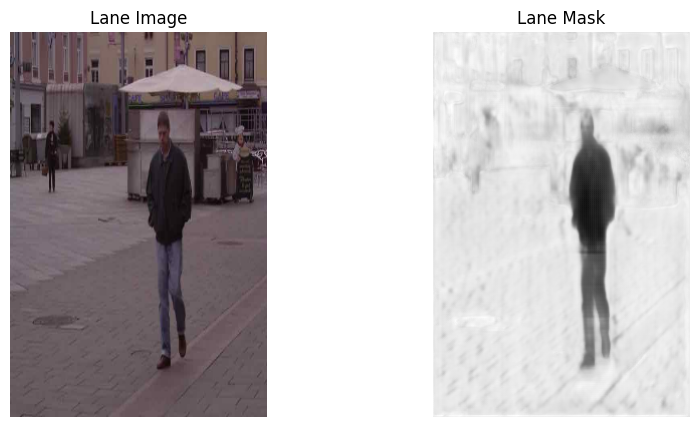

In [79]:

# Move tensors to CPU and detach
image = image.cpu().detach().squeeze(0).permute(1, 2, 0).numpy()  # (1, 3, H, W) → (H, W, 3)
mask = logits_mask.cpu().detach().squeeze().numpy()  # Remove extra dimensions (C, H, W) → (H, W)

# Convert multi-channel mask to grayscale (if needed)
if mask.ndim == 3 and mask.shape[0] in [1, 3]:  # If it's (C, H, W), take first channel
    mask = mask[0]  # Convert (C, H, W) → (H, W)

# Display the Image and Mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title("Lane Image")
ax[0].axis("off")

ax[1].imshow(mask, cmap="gray")  # Ensure mask is grayscale
ax[1].set_title("Lane Mask")
ax[1].axis("off")

plt.show()